In [1]:
import json
import os
import time
import ipyparallel as ipp

import matplotlib.pyplot as plt
import torch
import train_cluster_cifar_dfca_tf as DFCA
import pickle

import numpy as np

from util import *

2025-06-08 00:05:49.711783: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term


Reads Config file and prepares the arguments you can choose in the config_dfca.json/config_ifca.json

In [2]:
# theoretically irrelevant here because we initialize the model seed randomly (see find_good_initializer())
seeds = [11,12,13]
learning_rates = [0.25]

dfca_gi = []
ifca = []

Running the dfca-gi experiment

In [3]:
import json
import time
import torch
import numpy as np


with open("config.json", "r") as read_file:
    config = json.load(read_file)

for lr in learning_rates:
    config['lr'] = lr
    res_final = []

    for seed in seeds:
        print(f"---------------------------------DFCA-GI, lr: {lr}, seed: {seed}---------------------------------")
        start_time = time.time()
        config['data_seed'] = seed
        config['train_seed'] = config['data_seed']

        print("config:",config)

        exp = DFCA.TrainCIFARCluster(config)
        exp.setup()
        res = exp.run()
        res_final.append([[r['test']['loss'] for r in res], [r['test']['acc'] for r in res], [r['test']['cl_acc'] for r in res], [r['train']['loss'] for r in res]])
        del exp
        duration = (time.time() - start_time)
        print("---train cluster Ended in %0.2f hour (%.3f sec) " % (duration/float(3600), duration))

    res_mean = np.mean(res_final, axis=0).tolist()
    dfca_gi.append(res_mean)



---------------------------------DFCA-GI, lr: 0.25, seed: 11---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 400, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 11, 'train_seed': 11, 'project_dir': 'output'}


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


I0000 00:00:1749333953.939294 3688069 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled


finding good initializer from train data


2025-06-08 00:05:54.508413: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.671 a 0.119  clct[5, 55] ans[31, 29] cl_acc 0.600 3.852sec


2025-06-08 00:05:58.495538: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.102  clct[54, 6] ans[33, 27] cl_acc 0.517 4.081sec


2025-06-08 00:06:02.724400: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.103  clct[29, 31] ans[31, 29] cl_acc 0.633 3.987sec
found good initializer


Epoch -1 tr: l 4.675 a 0.104  clct[23, 37] ans[29, 31] cl_acc 0.633 3.915sec


Epoch -1 tst: l 4.675 a 0.106  clct[21, 19] ans[20, 20] cl_acc 0.675 2.269sec


Epoch 0 tr: l 4.578 a 0.131  clct[26, 34] ans[38, 22] lr 0.250000 cl_acc 0.633 43.077sec(train) 3.747sec(infer)


Epoch 0 tst: l 4.607 a 0.124  clct[19, 21] ans[20, 20] cl_acc 0.625 2.346sec
result written at output/results.pickle


Epoch 1 tr: l 4.457 a 0.159  clct[29, 31] ans[29, 31] lr 0.247500 cl_acc 0.667 43.143sec(train) 3.890sec(infer)


Epoch 1 tst: l 4.443 a 0.162  clct[16, 24] ans[20, 20] cl_acc 0.700 2.360sec


Epoch 2 tr: l 4.372 a 0.183  clct[28, 32] ans[30, 30] lr 0.245025 cl_acc 0.700 43.153sec(train) 3.768sec(infer)


Epoch 2 tst: l 4.368 a 0.177  clct[16, 24] ans[20, 20] cl_acc 0.800 2.334sec


Epoch 3 tr: l 4.256 a 0.202  clct[15, 45] ans[36, 24] lr 0.242575 cl_acc 0.683 42.903sec(train) 3.647sec(infer)


Epoch 3 tst: l 4.274 a 0.190  clct[16, 24] ans[20, 20] cl_acc 0.700 2.242sec


Epoch 4 tr: l 4.243 a 0.206  clct[21, 39] ans[32, 28] lr 0.240149 cl_acc 0.683 43.147sec(train) 3.638sec(infer)


Epoch 4 tst: l 4.186 a 0.204  clct[18, 22] ans[20, 20] cl_acc 0.650 2.276sec


Epoch 5 tr: l 4.133 a 0.225  clct[24, 36] ans[31, 29] lr 0.237748 cl_acc 0.717 43.341sec(train) 3.583sec(infer)


Epoch 5 tst: l 4.100 a 0.221  clct[18, 22] ans[20, 20] cl_acc 0.600 2.206sec


Epoch 6 tr: l 3.978 a 0.246  clct[24, 36] ans[37, 23] lr 0.235370 cl_acc 0.583 43.103sec(train) 3.593sec(infer)


Epoch 6 tst: l 4.045 a 0.227  clct[19, 21] ans[20, 20] cl_acc 0.575 2.254sec


Epoch 7 tr: l 3.908 a 0.262  clct[29, 31] ans[32, 28] lr 0.233016 cl_acc 0.550 43.213sec(train) 3.543sec(infer)


Epoch 7 tst: l 3.984 a 0.249  clct[18, 22] ans[20, 20] cl_acc 0.700 2.176sec


Epoch 8 tr: l 3.882 a 0.265  clct[27, 33] ans[27, 33] lr 0.230686 cl_acc 0.600 43.004sec(train) 3.659sec(infer)


Epoch 8 tst: l 3.874 a 0.263  clct[17, 23] ans[20, 20] cl_acc 0.575 2.257sec


Epoch 9 tr: l 3.890 a 0.255  clct[30, 30] ans[28, 32] lr 0.228379 cl_acc 0.700 42.999sec(train) 3.583sec(infer)


Epoch 9 tst: l 3.814 a 0.267  clct[19, 21] ans[20, 20] cl_acc 0.575 2.259sec


Epoch 10 tr: l 3.726 a 0.294  clct[27, 33] ans[29, 31] lr 0.226096 cl_acc 0.667 43.252sec(train) 3.629sec(infer)


Epoch 10 tst: l 3.708 a 0.282  clct[15, 25] ans[20, 20] cl_acc 0.575 2.300sec
result written at output/results.pickle


Epoch 11 tr: l 3.704 a 0.287  clct[28, 32] ans[29, 31] lr 0.223835 cl_acc 0.717 43.306sec(train) 3.792sec(infer)


Epoch 11 tst: l 3.606 a 0.302  clct[15, 25] ans[20, 20] cl_acc 0.625 2.307sec


Epoch 12 tr: l 3.602 a 0.302  clct[18, 42] ans[30, 30] lr 0.221596 cl_acc 0.667 43.298sec(train) 3.799sec(infer)


Epoch 12 tst: l 3.557 a 0.309  clct[13, 27] ans[20, 20] cl_acc 0.575 2.391sec


Epoch 13 tr: l 3.464 a 0.314  clct[25, 35] ans[21, 39] lr 0.219380 cl_acc 0.700 42.981sec(train) 3.809sec(infer)


Epoch 13 tst: l 3.502 a 0.312  clct[10, 30] ans[20, 20] cl_acc 0.500 2.383sec


Epoch 14 tr: l 3.452 a 0.314  clct[15, 45] ans[32, 28] lr 0.217186 cl_acc 0.717 43.327sec(train) 3.847sec(infer)


Epoch 14 tst: l 3.476 a 0.312  clct[11, 29] ans[20, 20] cl_acc 0.525 2.432sec


Epoch 15 tr: l 3.364 a 0.324  clct[21, 39] ans[34, 26] lr 0.215015 cl_acc 0.683 43.121sec(train) 3.824sec(infer)


Epoch 15 tst: l 3.410 a 0.328  clct[12, 28] ans[20, 20] cl_acc 0.600 2.417sec


Epoch 16 tr: l 3.337 a 0.332  clct[24, 36] ans[33, 27] lr 0.212864 cl_acc 0.750 43.547sec(train) 3.637sec(infer)


Epoch 16 tst: l 3.333 a 0.344  clct[13, 27] ans[20, 20] cl_acc 0.675 2.252sec


Epoch 17 tr: l 3.261 a 0.351  clct[23, 37] ans[37, 23] lr 0.210736 cl_acc 0.800 43.571sec(train) 3.855sec(infer)


Epoch 17 tst: l 3.295 a 0.355  clct[14, 26] ans[20, 20] cl_acc 0.750 2.430sec


Epoch 18 tr: l 3.181 a 0.357  clct[22, 38] ans[26, 34] lr 0.208628 cl_acc 0.667 43.468sec(train) 3.958sec(infer)


Epoch 18 tst: l 3.253 a 0.357  clct[13, 27] ans[20, 20] cl_acc 0.775 2.413sec


Epoch 19 tr: l 3.115 a 0.368  clct[23, 37] ans[26, 34] lr 0.206542 cl_acc 0.783 43.629sec(train) 3.925sec(infer)


Epoch 19 tst: l 3.215 a 0.357  clct[12, 28] ans[20, 20] cl_acc 0.800 2.372sec


Epoch 20 tr: l 3.060 a 0.370  clct[20, 40] ans[28, 32] lr 0.204477 cl_acc 0.767 43.255sec(train) 3.693sec(infer)


Epoch 20 tst: l 3.128 a 0.381  clct[16, 24] ans[20, 20] cl_acc 0.900 2.322sec
result written at output/results.pickle


Epoch 21 tr: l 3.046 a 0.372  clct[21, 39] ans[30, 30] lr 0.202432 cl_acc 0.850 43.561sec(train) 3.719sec(infer)


Epoch 21 tst: l 3.061 a 0.391  clct[16, 24] ans[20, 20] cl_acc 0.900 2.256sec


Epoch 22 tr: l 2.976 a 0.394  clct[23, 37] ans[30, 30] lr 0.200408 cl_acc 0.883 43.017sec(train) 3.647sec(infer)


Epoch 22 tst: l 2.995 a 0.403  clct[17, 23] ans[20, 20] cl_acc 0.925 2.269sec


Epoch 23 tr: l 2.930 a 0.396  clct[28, 32] ans[29, 31] lr 0.198404 cl_acc 0.917 43.554sec(train) 3.646sec(infer)


Epoch 23 tst: l 2.886 a 0.420  clct[19, 21] ans[20, 20] cl_acc 0.975 2.262sec


Epoch 24 tr: l 2.904 a 0.394  clct[27, 33] ans[32, 28] lr 0.196420 cl_acc 0.917 43.378sec(train) 3.742sec(infer)


Epoch 24 tst: l 2.844 a 0.426  clct[20, 20] ans[20, 20] cl_acc 1.000 2.277sec


Epoch 25 tr: l 2.842 a 0.415  clct[29, 31] ans[30, 30] lr 0.194455 cl_acc 0.950 43.119sec(train) 3.595sec(infer)


Epoch 25 tst: l 2.835 a 0.422  clct[21, 19] ans[20, 20] cl_acc 0.975 2.279sec


Epoch 26 tr: l 2.822 a 0.414  clct[30, 30] ans[30, 30] lr 0.192511 cl_acc 1.000 43.283sec(train) 4.025sec(infer)


Epoch 26 tst: l 2.805 a 0.421  clct[21, 19] ans[20, 20] cl_acc 0.975 2.518sec


Epoch 27 tr: l 2.722 a 0.432  clct[32, 28] ans[26, 34] lr 0.190586 cl_acc 0.967 42.947sec(train) 3.744sec(infer)


Epoch 27 tst: l 2.762 a 0.426  clct[21, 19] ans[20, 20] cl_acc 0.975 2.325sec


Epoch 28 tr: l 2.717 a 0.433  clct[31, 29] ans[27, 33] lr 0.188680 cl_acc 0.967 43.462sec(train) 3.677sec(infer)


Epoch 28 tst: l 2.727 a 0.432  clct[21, 19] ans[20, 20] cl_acc 0.975 2.250sec


Epoch 29 tr: l 2.693 a 0.426  clct[35, 25] ans[25, 35] lr 0.186793 cl_acc 0.967 42.780sec(train) 3.854sec(infer)


Epoch 29 tst: l 2.704 a 0.434  clct[21, 19] ans[20, 20] cl_acc 0.975 2.424sec


Epoch 30 tr: l 2.616 a 0.445  clct[24, 36] ans[35, 25] lr 0.184925 cl_acc 0.983 43.479sec(train) 3.914sec(infer)


Epoch 30 tst: l 2.650 a 0.445  clct[20, 20] ans[20, 20] cl_acc 1.000 2.517sec
result written at output/results.pickle


Epoch 31 tr: l 2.596 a 0.443  clct[28, 32] ans[31, 29] lr 0.183076 cl_acc 0.983 42.791sec(train) 3.698sec(infer)


Epoch 31 tst: l 2.600 a 0.456  clct[20, 20] ans[20, 20] cl_acc 1.000 2.418sec


Epoch 32 tr: l 2.578 a 0.446  clct[29, 31] ans[31, 29] lr 0.181245 cl_acc 1.000 42.889sec(train) 3.740sec(infer)


Epoch 32 tst: l 2.557 a 0.466  clct[20, 20] ans[20, 20] cl_acc 1.000 2.327sec


Epoch 33 tr: l 2.493 a 0.465  clct[35, 25] ans[25, 35] lr 0.179433 cl_acc 1.000 43.355sec(train) 3.982sec(infer)


Epoch 33 tst: l 2.501 a 0.471  clct[20, 20] ans[20, 20] cl_acc 1.000 2.528sec


Epoch 34 tr: l 2.462 a 0.467  clct[32, 28] ans[27, 33] lr 0.177638 cl_acc 0.983 43.391sec(train) 4.038sec(infer)


Epoch 34 tst: l 2.461 a 0.477  clct[20, 20] ans[20, 20] cl_acc 1.000 2.477sec


Epoch 35 tr: l 2.447 a 0.475  clct[35, 25] ans[25, 35] lr 0.175862 cl_acc 1.000 43.246sec(train) 3.854sec(infer)


Epoch 35 tst: l 2.424 a 0.484  clct[20, 20] ans[20, 20] cl_acc 1.000 2.430sec


Epoch 36 tr: l 2.394 a 0.486  clct[30, 30] ans[30, 30] lr 0.174103 cl_acc 1.000 43.513sec(train) 3.760sec(infer)


Epoch 36 tst: l 2.393 a 0.487  clct[20, 20] ans[20, 20] cl_acc 1.000 2.287sec


Epoch 37 tr: l 2.363 a 0.487  clct[24, 36] ans[35, 25] lr 0.172362 cl_acc 0.983 42.865sec(train) 3.703sec(infer)


Epoch 37 tst: l 2.349 a 0.495  clct[20, 20] ans[20, 20] cl_acc 1.000 2.316sec


Epoch 38 tr: l 2.364 a 0.484  clct[28, 32] ans[32, 28] lr 0.170639 cl_acc 1.000 43.259sec(train) 3.876sec(infer)


Epoch 38 tst: l 2.331 a 0.491  clct[20, 20] ans[20, 20] cl_acc 1.000 2.432sec


Epoch 39 tr: l 2.309 a 0.494  clct[29, 31] ans[31, 29] lr 0.168932 cl_acc 1.000 42.937sec(train) 3.636sec(infer)


Epoch 39 tst: l 2.312 a 0.495  clct[20, 20] ans[20, 20] cl_acc 1.000 2.236sec


Epoch 40 tr: l 2.299 a 0.493  clct[28, 32] ans[32, 28] lr 0.167243 cl_acc 1.000 42.898sec(train) 3.909sec(infer)


Epoch 40 tst: l 2.296 a 0.498  clct[20, 20] ans[20, 20] cl_acc 1.000 2.362sec
result written at output/results.pickle


Epoch 41 tr: l 2.251 a 0.503  clct[26, 34] ans[34, 26] lr 0.165571 cl_acc 1.000 43.099sec(train) 3.700sec(infer)


Epoch 41 tst: l 2.273 a 0.501  clct[20, 20] ans[20, 20] cl_acc 1.000 2.329sec


Epoch 42 tr: l 2.215 a 0.516  clct[30, 30] ans[30, 30] lr 0.163915 cl_acc 1.000 43.326sec(train) 3.905sec(infer)


Epoch 42 tst: l 2.239 a 0.507  clct[20, 20] ans[20, 20] cl_acc 1.000 2.459sec


Epoch 43 tr: l 2.205 a 0.519  clct[29, 31] ans[31, 29] lr 0.162276 cl_acc 1.000 43.200sec(train) 3.998sec(infer)


Epoch 43 tst: l 2.218 a 0.508  clct[20, 20] ans[20, 20] cl_acc 1.000 2.414sec


Epoch 44 tr: l 2.191 a 0.519  clct[28, 32] ans[32, 28] lr 0.160653 cl_acc 1.000 42.979sec(train) 3.682sec(infer)


Epoch 44 tst: l 2.193 a 0.512  clct[20, 20] ans[20, 20] cl_acc 1.000 2.302sec


Epoch 45 tr: l 2.168 a 0.514  clct[28, 32] ans[32, 28] lr 0.159046 cl_acc 1.000 43.554sec(train) 3.745sec(infer)


Epoch 45 tst: l 2.154 a 0.520  clct[20, 20] ans[20, 20] cl_acc 1.000 2.364sec


Epoch 46 tr: l 2.157 a 0.517  clct[27, 33] ans[33, 27] lr 0.157456 cl_acc 1.000 43.528sec(train) 3.822sec(infer)


Epoch 46 tst: l 2.144 a 0.520  clct[20, 20] ans[20, 20] cl_acc 1.000 2.300sec


Epoch 47 tr: l 2.114 a 0.525  clct[26, 34] ans[34, 26] lr 0.155881 cl_acc 1.000 43.342sec(train) 3.730sec(infer)


Epoch 47 tst: l 2.137 a 0.519  clct[20, 20] ans[20, 20] cl_acc 1.000 2.441sec


Epoch 48 tr: l 2.105 a 0.527  clct[31, 29] ans[29, 31] lr 0.154323 cl_acc 1.000 43.502sec(train) 3.715sec(infer)


Epoch 48 tst: l 2.109 a 0.525  clct[20, 20] ans[20, 20] cl_acc 1.000 2.346sec


Epoch 49 tr: l 2.093 a 0.521  clct[31, 29] ans[29, 31] lr 0.152779 cl_acc 1.000 43.455sec(train) 3.905sec(infer)


Epoch 49 tst: l 2.088 a 0.529  clct[20, 20] ans[20, 20] cl_acc 1.000 2.388sec


Epoch 50 tr: l 2.064 a 0.532  clct[29, 31] ans[31, 29] lr 0.151252 cl_acc 1.000 43.308sec(train) 3.841sec(infer)


Epoch 50 tst: l 2.082 a 0.530  clct[20, 20] ans[20, 20] cl_acc 1.000 2.382sec
result written at output/results.pickle


Epoch 51 tr: l 2.054 a 0.538  clct[30, 30] ans[30, 30] lr 0.149739 cl_acc 1.000 43.331sec(train) 3.954sec(infer)


Epoch 51 tst: l 2.045 a 0.536  clct[20, 20] ans[20, 20] cl_acc 1.000 2.416sec


Epoch 52 tr: l 2.000 a 0.549  clct[30, 30] ans[30, 30] lr 0.148242 cl_acc 1.000 43.462sec(train) 3.686sec(infer)


Epoch 52 tst: l 2.042 a 0.537  clct[20, 20] ans[20, 20] cl_acc 1.000 2.359sec


Epoch 53 tr: l 1.994 a 0.548  clct[35, 25] ans[25, 35] lr 0.146759 cl_acc 1.000 43.335sec(train) 3.758sec(infer)


Epoch 53 tst: l 2.034 a 0.535  clct[20, 20] ans[20, 20] cl_acc 1.000 2.293sec


Epoch 54 tr: l 1.955 a 0.555  clct[28, 32] ans[32, 28] lr 0.145292 cl_acc 1.000 42.860sec(train) 3.895sec(infer)


Epoch 54 tst: l 2.017 a 0.539  clct[20, 20] ans[20, 20] cl_acc 1.000 2.405sec


Epoch 55 tr: l 1.964 a 0.549  clct[30, 30] ans[30, 30] lr 0.143839 cl_acc 1.000 43.058sec(train) 3.670sec(infer)


Epoch 55 tst: l 1.986 a 0.545  clct[20, 20] ans[20, 20] cl_acc 1.000 2.431sec


Epoch 56 tr: l 1.869 a 0.580  clct[32, 28] ans[28, 32] lr 0.142400 cl_acc 1.000 43.410sec(train) 3.851sec(infer)


Epoch 56 tst: l 1.959 a 0.553  clct[20, 20] ans[20, 20] cl_acc 1.000 2.379sec


Epoch 57 tr: l 1.898 a 0.567  clct[23, 37] ans[37, 23] lr 0.140976 cl_acc 1.000 43.050sec(train) 3.766sec(infer)


Epoch 57 tst: l 1.960 a 0.551  clct[20, 20] ans[20, 20] cl_acc 1.000 2.414sec


Epoch 58 tr: l 1.888 a 0.572  clct[21, 39] ans[39, 21] lr 0.139567 cl_acc 1.000 43.417sec(train) 3.790sec(infer)


Epoch 58 tst: l 1.941 a 0.554  clct[20, 20] ans[20, 20] cl_acc 1.000 2.383sec


Epoch 59 tr: l 1.857 a 0.576  clct[27, 33] ans[33, 27] lr 0.138171 cl_acc 1.000 43.310sec(train) 4.006sec(infer)


Epoch 59 tst: l 1.906 a 0.559  clct[20, 20] ans[20, 20] cl_acc 1.000 2.519sec


Epoch 60 tr: l 1.830 a 0.584  clct[31, 29] ans[29, 31] lr 0.136789 cl_acc 1.000 43.416sec(train) 3.891sec(infer)


Epoch 60 tst: l 1.905 a 0.559  clct[20, 20] ans[20, 20] cl_acc 1.000 2.486sec
result written at output/results.pickle


Epoch 61 tr: l 1.847 a 0.580  clct[32, 28] ans[28, 32] lr 0.135421 cl_acc 1.000 43.395sec(train) 3.772sec(infer)


Epoch 61 tst: l 1.881 a 0.564  clct[20, 20] ans[20, 20] cl_acc 1.000 2.495sec


Epoch 62 tr: l 1.810 a 0.587  clct[28, 32] ans[32, 28] lr 0.134067 cl_acc 1.000 42.960sec(train) 3.675sec(infer)


Epoch 62 tst: l 1.860 a 0.569  clct[20, 20] ans[20, 20] cl_acc 1.000 2.370sec


Epoch 63 tr: l 1.805 a 0.582  clct[29, 31] ans[31, 29] lr 0.132726 cl_acc 1.000 43.509sec(train) 3.895sec(infer)


Epoch 63 tst: l 1.840 a 0.574  clct[20, 20] ans[20, 20] cl_acc 1.000 2.414sec


Epoch 64 tr: l 1.792 a 0.589  clct[23, 37] ans[37, 23] lr 0.131399 cl_acc 1.000 43.426sec(train) 3.827sec(infer)


Epoch 64 tst: l 1.815 a 0.579  clct[20, 20] ans[20, 20] cl_acc 1.000 2.390sec


Epoch 65 tr: l 1.737 a 0.604  clct[25, 35] ans[35, 25] lr 0.130085 cl_acc 1.000 43.346sec(train) 3.869sec(infer)


Epoch 65 tst: l 1.804 a 0.582  clct[20, 20] ans[20, 20] cl_acc 1.000 2.457sec


Epoch 66 tr: l 1.713 a 0.611  clct[36, 24] ans[24, 36] lr 0.128784 cl_acc 1.000 42.664sec(train) 3.935sec(infer)


Epoch 66 tst: l 1.782 a 0.586  clct[20, 20] ans[20, 20] cl_acc 1.000 2.424sec


Epoch 67 tr: l 1.713 a 0.609  clct[31, 29] ans[29, 31] lr 0.127496 cl_acc 1.000 43.395sec(train) 3.778sec(infer)


Epoch 67 tst: l 1.775 a 0.587  clct[20, 20] ans[20, 20] cl_acc 1.000 2.312sec


Epoch 68 tr: l 1.712 a 0.605  clct[28, 32] ans[32, 28] lr 0.126221 cl_acc 1.000 42.674sec(train) 3.717sec(infer)


Epoch 68 tst: l 1.753 a 0.592  clct[20, 20] ans[20, 20] cl_acc 1.000 2.424sec


Epoch 69 tr: l 1.702 a 0.605  clct[26, 34] ans[34, 26] lr 0.124959 cl_acc 1.000 43.101sec(train) 3.771sec(infer)


Epoch 69 tst: l 1.744 a 0.593  clct[20, 20] ans[20, 20] cl_acc 1.000 2.370sec


Epoch 70 tr: l 1.689 a 0.604  clct[29, 31] ans[31, 29] lr 0.123710 cl_acc 1.000 43.405sec(train) 3.679sec(infer)


Epoch 70 tst: l 1.722 a 0.595  clct[20, 20] ans[20, 20] cl_acc 1.000 2.407sec
result written at output/results.pickle


Epoch 71 tr: l 1.673 a 0.613  clct[34, 26] ans[26, 34] lr 0.122473 cl_acc 1.000 42.908sec(train) 3.731sec(infer)


Epoch 71 tst: l 1.705 a 0.598  clct[20, 20] ans[20, 20] cl_acc 1.000 2.383sec


Epoch 72 tr: l 1.617 a 0.635  clct[28, 32] ans[32, 28] lr 0.121248 cl_acc 1.000 42.986sec(train) 3.887sec(infer)


Epoch 72 tst: l 1.696 a 0.603  clct[20, 20] ans[20, 20] cl_acc 1.000 2.364sec


Epoch 73 tr: l 1.608 a 0.633  clct[31, 29] ans[29, 31] lr 0.120035 cl_acc 1.000 42.843sec(train) 3.671sec(infer)


Epoch 73 tst: l 1.687 a 0.602  clct[20, 20] ans[20, 20] cl_acc 1.000 2.232sec


Epoch 74 tr: l 1.635 a 0.619  clct[28, 32] ans[32, 28] lr 0.118835 cl_acc 1.000 43.130sec(train) 3.711sec(infer)


Epoch 74 tst: l 1.675 a 0.605  clct[20, 20] ans[20, 20] cl_acc 1.000 2.293sec


Epoch 75 tr: l 1.566 a 0.641  clct[27, 33] ans[33, 27] lr 0.117647 cl_acc 1.000 43.112sec(train) 3.701sec(infer)


Epoch 75 tst: l 1.662 a 0.609  clct[20, 20] ans[20, 20] cl_acc 1.000 2.368sec


Epoch 76 tr: l 1.592 a 0.637  clct[30, 30] ans[30, 30] lr 0.116470 cl_acc 1.000 43.552sec(train) 3.758sec(infer)


Epoch 76 tst: l 1.645 a 0.613  clct[20, 20] ans[20, 20] cl_acc 1.000 2.356sec


Epoch 77 tr: l 1.591 a 0.628  clct[28, 32] ans[32, 28] lr 0.115305 cl_acc 1.000 43.209sec(train) 3.637sec(infer)


Epoch 77 tst: l 1.631 a 0.617  clct[20, 20] ans[20, 20] cl_acc 1.000 2.345sec


Epoch 78 tr: l 1.556 a 0.644  clct[34, 26] ans[26, 34] lr 0.114152 cl_acc 1.000 43.353sec(train) 3.880sec(infer)


Epoch 78 tst: l 1.623 a 0.618  clct[20, 20] ans[20, 20] cl_acc 1.000 2.400sec


Epoch 79 tr: l 1.579 a 0.628  clct[27, 33] ans[33, 27] lr 0.113011 cl_acc 1.000 43.247sec(train) 3.784sec(infer)


Epoch 79 tst: l 1.612 a 0.620  clct[20, 20] ans[20, 20] cl_acc 1.000 2.434sec


Epoch 80 tr: l 1.525 a 0.648  clct[31, 29] ans[29, 31] lr 0.111881 cl_acc 1.000 43.347sec(train) 3.842sec(infer)


Epoch 80 tst: l 1.602 a 0.621  clct[20, 20] ans[20, 20] cl_acc 1.000 2.408sec
result written at output/results.pickle


Epoch 81 tr: l 1.501 a 0.658  clct[28, 32] ans[32, 28] lr 0.110762 cl_acc 1.000 43.172sec(train) 3.762sec(infer)


Epoch 81 tst: l 1.608 a 0.617  clct[20, 20] ans[20, 20] cl_acc 1.000 2.337sec


Epoch 82 tr: l 1.479 a 0.661  clct[27, 33] ans[33, 27] lr 0.109654 cl_acc 1.000 42.890sec(train) 3.848sec(infer)


Epoch 82 tst: l 1.605 a 0.614  clct[20, 20] ans[20, 20] cl_acc 1.000 2.429sec


Epoch 83 tr: l 1.486 a 0.654  clct[22, 38] ans[38, 22] lr 0.108558 cl_acc 1.000 43.088sec(train) 3.759sec(infer)


Epoch 83 tst: l 1.575 a 0.620  clct[20, 20] ans[20, 20] cl_acc 1.000 2.412sec


Epoch 84 tr: l 1.519 a 0.638  clct[27, 33] ans[33, 27] lr 0.107472 cl_acc 1.000 43.288sec(train) 3.884sec(infer)


Epoch 84 tst: l 1.559 a 0.625  clct[20, 20] ans[20, 20] cl_acc 1.000 2.408sec


Epoch 85 tr: l 1.485 a 0.650  clct[30, 30] ans[30, 30] lr 0.106398 cl_acc 1.000 43.340sec(train) 3.857sec(infer)


Epoch 85 tst: l 1.555 a 0.627  clct[20, 20] ans[20, 20] cl_acc 1.000 2.395sec


Epoch 86 tr: l 1.469 a 0.658  clct[26, 34] ans[34, 26] lr 0.105334 cl_acc 1.000 42.762sec(train) 3.838sec(infer)


Epoch 86 tst: l 1.542 a 0.630  clct[20, 20] ans[20, 20] cl_acc 1.000 2.450sec


Epoch 87 tr: l 1.455 a 0.663  clct[29, 31] ans[31, 29] lr 0.104280 cl_acc 1.000 42.760sec(train) 4.050sec(infer)


Epoch 87 tst: l 1.536 a 0.632  clct[20, 20] ans[20, 20] cl_acc 1.000 2.611sec


Epoch 88 tr: l 1.471 a 0.652  clct[30, 30] ans[30, 30] lr 0.103237 cl_acc 1.000 43.263sec(train) 3.944sec(infer)


Epoch 88 tst: l 1.523 a 0.634  clct[20, 20] ans[20, 20] cl_acc 1.000 2.419sec


Epoch 89 tr: l 1.397 a 0.676  clct[29, 31] ans[31, 29] lr 0.102205 cl_acc 1.000 42.904sec(train) 3.959sec(infer)


Epoch 89 tst: l 1.521 a 0.633  clct[20, 20] ans[20, 20] cl_acc 1.000 2.553sec


Epoch 90 tr: l 1.425 a 0.665  clct[24, 36] ans[36, 24] lr 0.101183 cl_acc 1.000 43.041sec(train) 3.968sec(infer)


Epoch 90 tst: l 1.522 a 0.633  clct[20, 20] ans[20, 20] cl_acc 1.000 2.507sec
result written at output/results.pickle


Epoch 91 tr: l 1.435 a 0.667  clct[38, 22] ans[22, 38] lr 0.100171 cl_acc 1.000 43.163sec(train) 3.918sec(infer)


Epoch 91 tst: l 1.503 a 0.637  clct[20, 20] ans[20, 20] cl_acc 1.000 2.435sec


Epoch 92 tr: l 1.398 a 0.673  clct[26, 34] ans[34, 26] lr 0.099169 cl_acc 1.000 42.753sec(train) 3.923sec(infer)


Epoch 92 tst: l 1.481 a 0.644  clct[20, 20] ans[20, 20] cl_acc 1.000 2.410sec


Epoch 93 tr: l 1.384 a 0.679  clct[25, 35] ans[35, 25] lr 0.098178 cl_acc 1.000 42.920sec(train) 3.893sec(infer)


Epoch 93 tst: l 1.478 a 0.644  clct[20, 20] ans[20, 20] cl_acc 1.000 2.420sec


Epoch 94 tr: l 1.397 a 0.670  clct[23, 37] ans[37, 23] lr 0.097196 cl_acc 1.000 43.080sec(train) 3.827sec(infer)


Epoch 94 tst: l 1.472 a 0.646  clct[20, 20] ans[20, 20] cl_acc 1.000 2.430sec


Epoch 95 tr: l 1.408 a 0.664  clct[33, 27] ans[27, 33] lr 0.096224 cl_acc 1.000 43.031sec(train) 3.845sec(infer)


Epoch 95 tst: l 1.462 a 0.650  clct[20, 20] ans[20, 20] cl_acc 1.000 2.463sec


Epoch 96 tr: l 1.340 a 0.692  clct[30, 30] ans[30, 30] lr 0.095262 cl_acc 1.000 43.418sec(train) 3.987sec(infer)


Epoch 96 tst: l 1.452 a 0.650  clct[20, 20] ans[20, 20] cl_acc 1.000 2.486sec


Epoch 97 tr: l 1.330 a 0.689  clct[29, 31] ans[31, 29] lr 0.094309 cl_acc 1.000 42.808sec(train) 3.926sec(infer)


Epoch 97 tst: l 1.441 a 0.652  clct[20, 20] ans[20, 20] cl_acc 1.000 2.585sec


Epoch 98 tr: l 1.347 a 0.685  clct[33, 27] ans[27, 33] lr 0.093366 cl_acc 1.000 43.094sec(train) 3.924sec(infer)


Epoch 98 tst: l 1.431 a 0.656  clct[20, 20] ans[20, 20] cl_acc 1.000 2.449sec


Epoch 99 tr: l 1.343 a 0.685  clct[36, 24] ans[24, 36] lr 0.092432 cl_acc 1.000 42.839sec(train) 3.956sec(infer)


Epoch 99 tst: l 1.425 a 0.655  clct[20, 20] ans[20, 20] cl_acc 1.000 2.575sec


Epoch 100 tr: l 1.311 a 0.695  clct[30, 30] ans[30, 30] lr 0.091508 cl_acc 1.000 42.973sec(train) 3.997sec(infer)


Epoch 100 tst: l 1.425 a 0.652  clct[20, 20] ans[20, 20] cl_acc 1.000 2.559sec
result written at output/results.pickle


Epoch 101 tr: l 1.318 a 0.691  clct[32, 28] ans[28, 32] lr 0.090593 cl_acc 1.000 43.070sec(train) 3.972sec(infer)


Epoch 101 tst: l 1.424 a 0.651  clct[20, 20] ans[20, 20] cl_acc 1.000 2.407sec


Epoch 102 tr: l 1.311 a 0.693  clct[31, 29] ans[29, 31] lr 0.089687 cl_acc 1.000 43.440sec(train) 3.952sec(infer)


Epoch 102 tst: l 1.422 a 0.651  clct[20, 20] ans[20, 20] cl_acc 1.000 2.493sec


Epoch 103 tr: l 1.319 a 0.687  clct[31, 29] ans[29, 31] lr 0.088790 cl_acc 1.000 43.406sec(train) 4.020sec(infer)


Epoch 103 tst: l 1.412 a 0.654  clct[20, 20] ans[20, 20] cl_acc 1.000 2.482sec


Epoch 104 tr: l 1.255 a 0.708  clct[29, 31] ans[31, 29] lr 0.087902 cl_acc 1.000 43.414sec(train) 3.998sec(infer)


Epoch 104 tst: l 1.418 a 0.649  clct[20, 20] ans[20, 20] cl_acc 1.000 2.429sec


Epoch 105 tr: l 1.286 a 0.697  clct[31, 29] ans[29, 31] lr 0.087023 cl_acc 1.000 43.475sec(train) 3.960sec(infer)


Epoch 105 tst: l 1.425 a 0.646  clct[20, 20] ans[20, 20] cl_acc 1.000 2.498sec


Epoch 106 tr: l 1.243 a 0.709  clct[27, 33] ans[33, 27] lr 0.086153 cl_acc 1.000 43.328sec(train) 3.920sec(infer)


Epoch 106 tst: l 1.392 a 0.656  clct[20, 20] ans[20, 20] cl_acc 1.000 2.424sec


Epoch 107 tr: l 1.254 a 0.708  clct[27, 33] ans[33, 27] lr 0.085292 cl_acc 1.000 42.861sec(train) 3.931sec(infer)


Epoch 107 tst: l 1.385 a 0.658  clct[20, 20] ans[20, 20] cl_acc 1.000 2.481sec


Epoch 108 tr: l 1.247 a 0.710  clct[32, 28] ans[28, 32] lr 0.084439 cl_acc 1.000 43.266sec(train) 3.614sec(infer)


Epoch 108 tst: l 1.368 a 0.661  clct[20, 20] ans[20, 20] cl_acc 1.000 2.270sec


Epoch 109 tr: l 1.240 a 0.712  clct[34, 26] ans[26, 34] lr 0.083594 cl_acc 1.000 43.547sec(train) 3.578sec(infer)


Epoch 109 tst: l 1.369 a 0.662  clct[20, 20] ans[20, 20] cl_acc 1.000 2.270sec


Epoch 110 tr: l 1.229 a 0.711  clct[33, 27] ans[27, 33] lr 0.082758 cl_acc 1.000 43.437sec(train) 3.942sec(infer)


Epoch 110 tst: l 1.360 a 0.664  clct[20, 20] ans[20, 20] cl_acc 1.000 2.499sec
result written at output/results.pickle


Epoch 111 tr: l 1.220 a 0.716  clct[32, 28] ans[28, 32] lr 0.081931 cl_acc 1.000 43.390sec(train) 3.619sec(infer)


Epoch 111 tst: l 1.358 a 0.664  clct[20, 20] ans[20, 20] cl_acc 1.000 2.234sec


Epoch 112 tr: l 1.244 a 0.704  clct[29, 31] ans[31, 29] lr 0.081111 cl_acc 1.000 42.738sec(train) 3.651sec(infer)


Epoch 112 tst: l 1.352 a 0.666  clct[20, 20] ans[20, 20] cl_acc 1.000 2.274sec


Epoch 113 tr: l 1.208 a 0.719  clct[27, 33] ans[33, 27] lr 0.080300 cl_acc 1.000 42.738sec(train) 3.888sec(infer)


Epoch 113 tst: l 1.347 a 0.667  clct[20, 20] ans[20, 20] cl_acc 1.000 2.413sec


Epoch 114 tr: l 1.204 a 0.715  clct[29, 31] ans[31, 29] lr 0.079497 cl_acc 1.000 42.723sec(train) 3.959sec(infer)


Epoch 114 tst: l 1.343 a 0.668  clct[20, 20] ans[20, 20] cl_acc 1.000 2.417sec


Epoch 115 tr: l 1.208 a 0.716  clct[29, 31] ans[31, 29] lr 0.078702 cl_acc 1.000 43.203sec(train) 3.857sec(infer)


Epoch 115 tst: l 1.350 a 0.665  clct[20, 20] ans[20, 20] cl_acc 1.000 2.512sec


Epoch 116 tr: l 1.203 a 0.715  clct[34, 26] ans[26, 34] lr 0.077915 cl_acc 1.000 42.767sec(train) 3.755sec(infer)


Epoch 116 tst: l 1.343 a 0.670  clct[20, 20] ans[20, 20] cl_acc 1.000 2.254sec


Epoch 117 tr: l 1.202 a 0.713  clct[26, 34] ans[34, 26] lr 0.077136 cl_acc 1.000 42.985sec(train) 3.735sec(infer)


Epoch 117 tst: l 1.326 a 0.672  clct[20, 20] ans[20, 20] cl_acc 1.000 2.382sec


Epoch 118 tr: l 1.185 a 0.721  clct[32, 28] ans[28, 32] lr 0.076365 cl_acc 1.000 42.714sec(train) 3.868sec(infer)


Epoch 118 tst: l 1.328 a 0.671  clct[20, 20] ans[20, 20] cl_acc 1.000 2.428sec


Epoch 119 tr: l 1.218 a 0.711  clct[34, 26] ans[26, 34] lr 0.075601 cl_acc 1.000 42.752sec(train) 3.795sec(infer)


Epoch 119 tst: l 1.331 a 0.669  clct[20, 20] ans[20, 20] cl_acc 1.000 2.439sec


Epoch 120 tr: l 1.216 a 0.707  clct[27, 33] ans[33, 27] lr 0.074845 cl_acc 1.000 42.647sec(train) 3.877sec(infer)


Epoch 120 tst: l 1.336 a 0.668  clct[20, 20] ans[20, 20] cl_acc 1.000 2.471sec
result written at output/results.pickle


Epoch 121 tr: l 1.171 a 0.723  clct[25, 35] ans[35, 25] lr 0.074097 cl_acc 1.000 42.925sec(train) 3.972sec(infer)


Epoch 121 tst: l 1.323 a 0.670  clct[20, 20] ans[20, 20] cl_acc 1.000 2.469sec


Epoch 122 tr: l 1.131 a 0.738  clct[30, 30] ans[30, 30] lr 0.073356 cl_acc 1.000 43.569sec(train) 3.879sec(infer)


Epoch 122 tst: l 1.317 a 0.672  clct[20, 20] ans[20, 20] cl_acc 1.000 2.476sec


Epoch 123 tr: l 1.157 a 0.725  clct[24, 36] ans[36, 24] lr 0.072622 cl_acc 1.000 43.424sec(train) 3.938sec(infer)


Epoch 123 tst: l 1.316 a 0.672  clct[20, 20] ans[20, 20] cl_acc 1.000 2.423sec


Epoch 124 tr: l 1.138 a 0.734  clct[30, 30] ans[30, 30] lr 0.071896 cl_acc 1.000 43.413sec(train) 3.956sec(infer)


Epoch 124 tst: l 1.298 a 0.675  clct[20, 20] ans[20, 20] cl_acc 1.000 2.429sec


Epoch 125 tr: l 1.069 a 0.756  clct[21, 39] ans[39, 21] lr 0.071177 cl_acc 1.000 43.402sec(train) 3.944sec(infer)


Epoch 125 tst: l 1.294 a 0.678  clct[20, 20] ans[20, 20] cl_acc 1.000 2.391sec


Epoch 126 tr: l 1.157 a 0.725  clct[27, 33] ans[33, 27] lr 0.070465 cl_acc 1.000 43.526sec(train) 3.934sec(infer)


Epoch 126 tst: l 1.285 a 0.678  clct[20, 20] ans[20, 20] cl_acc 1.000 2.412sec


Epoch 127 tr: l 1.157 a 0.724  clct[35, 25] ans[25, 35] lr 0.069761 cl_acc 1.000 43.108sec(train) 3.851sec(infer)


Epoch 127 tst: l 1.281 a 0.680  clct[20, 20] ans[20, 20] cl_acc 1.000 2.453sec


Epoch 128 tr: l 1.115 a 0.740  clct[27, 33] ans[33, 27] lr 0.069063 cl_acc 1.000 43.192sec(train) 3.909sec(infer)


Epoch 128 tst: l 1.294 a 0.675  clct[20, 20] ans[20, 20] cl_acc 1.000 2.393sec


Epoch 129 tr: l 1.130 a 0.730  clct[32, 28] ans[28, 32] lr 0.068372 cl_acc 1.000 43.221sec(train) 3.890sec(infer)


Epoch 129 tst: l 1.288 a 0.677  clct[20, 20] ans[20, 20] cl_acc 1.000 2.447sec


Epoch 130 tr: l 1.115 a 0.734  clct[25, 35] ans[35, 25] lr 0.067689 cl_acc 1.000 43.098sec(train) 3.909sec(infer)


Epoch 130 tst: l 1.274 a 0.683  clct[20, 20] ans[20, 20] cl_acc 1.000 2.447sec
result written at output/results.pickle


Epoch 131 tr: l 1.073 a 0.753  clct[35, 25] ans[25, 35] lr 0.067012 cl_acc 1.000 43.304sec(train) 3.922sec(infer)


Epoch 131 tst: l 1.263 a 0.683  clct[20, 20] ans[20, 20] cl_acc 1.000 2.465sec


Epoch 132 tr: l 1.109 a 0.735  clct[32, 28] ans[28, 32] lr 0.066342 cl_acc 1.000 43.137sec(train) 3.812sec(infer)


Epoch 132 tst: l 1.256 a 0.685  clct[20, 20] ans[20, 20] cl_acc 1.000 2.306sec


Epoch 133 tr: l 1.078 a 0.746  clct[28, 32] ans[32, 28] lr 0.065678 cl_acc 1.000 42.915sec(train) 3.953sec(infer)


Epoch 133 tst: l 1.253 a 0.685  clct[20, 20] ans[20, 20] cl_acc 1.000 2.468sec


Epoch 134 tr: l 1.068 a 0.751  clct[28, 32] ans[32, 28] lr 0.065021 cl_acc 1.000 43.173sec(train) 3.957sec(infer)


Epoch 134 tst: l 1.246 a 0.689  clct[20, 20] ans[20, 20] cl_acc 1.000 2.499sec


Epoch 135 tr: l 1.101 a 0.734  clct[31, 29] ans[29, 31] lr 0.064371 cl_acc 1.000 43.454sec(train) 4.015sec(infer)


Epoch 135 tst: l 1.250 a 0.686  clct[20, 20] ans[20, 20] cl_acc 1.000 2.531sec


Epoch 136 tr: l 1.070 a 0.749  clct[34, 26] ans[26, 34] lr 0.063727 cl_acc 1.000 43.394sec(train) 3.968sec(infer)


Epoch 136 tst: l 1.251 a 0.686  clct[20, 20] ans[20, 20] cl_acc 1.000 2.525sec


Epoch 137 tr: l 1.070 a 0.745  clct[24, 36] ans[36, 24] lr 0.063090 cl_acc 1.000 43.408sec(train) 4.061sec(infer)


Epoch 137 tst: l 1.247 a 0.686  clct[20, 20] ans[20, 20] cl_acc 1.000 2.445sec


Epoch 138 tr: l 1.073 a 0.747  clct[33, 27] ans[27, 33] lr 0.062459 cl_acc 1.000 43.536sec(train) 3.879sec(infer)


Epoch 138 tst: l 1.239 a 0.689  clct[20, 20] ans[20, 20] cl_acc 1.000 2.449sec


Epoch 139 tr: l 1.083 a 0.743  clct[30, 30] ans[30, 30] lr 0.061835 cl_acc 1.000 42.803sec(train) 3.888sec(infer)


Epoch 139 tst: l 1.227 a 0.693  clct[20, 20] ans[20, 20] cl_acc 1.000 2.511sec


Epoch 140 tr: l 1.038 a 0.756  clct[27, 33] ans[33, 27] lr 0.061216 cl_acc 1.000 42.996sec(train) 4.016sec(infer)


Epoch 140 tst: l 1.235 a 0.690  clct[20, 20] ans[20, 20] cl_acc 1.000 2.440sec
result written at output/results.pickle


Epoch 141 tr: l 1.075 a 0.743  clct[31, 29] ans[29, 31] lr 0.060604 cl_acc 1.000 43.040sec(train) 4.054sec(infer)


Epoch 141 tst: l 1.229 a 0.690  clct[20, 20] ans[20, 20] cl_acc 1.000 2.440sec


Epoch 142 tr: l 1.079 a 0.744  clct[29, 31] ans[31, 29] lr 0.059998 cl_acc 1.000 43.440sec(train) 3.900sec(infer)


Epoch 142 tst: l 1.213 a 0.694  clct[20, 20] ans[20, 20] cl_acc 1.000 2.360sec


Epoch 143 tr: l 1.044 a 0.751  clct[31, 29] ans[29, 31] lr 0.059398 cl_acc 1.000 42.842sec(train) 3.882sec(infer)


Epoch 143 tst: l 1.218 a 0.692  clct[20, 20] ans[20, 20] cl_acc 1.000 2.476sec


Epoch 144 tr: l 1.060 a 0.743  clct[26, 34] ans[34, 26] lr 0.058804 cl_acc 1.000 43.268sec(train) 3.823sec(infer)


Epoch 144 tst: l 1.202 a 0.696  clct[20, 20] ans[20, 20] cl_acc 1.000 2.453sec


Epoch 145 tr: l 1.012 a 0.763  clct[24, 36] ans[36, 24] lr 0.058216 cl_acc 1.000 42.679sec(train) 3.726sec(infer)


Epoch 145 tst: l 1.195 a 0.699  clct[20, 20] ans[20, 20] cl_acc 1.000 2.346sec


Epoch 146 tr: l 1.079 a 0.738  clct[25, 35] ans[35, 25] lr 0.057634 cl_acc 1.000 43.046sec(train) 3.651sec(infer)


Epoch 146 tst: l 1.185 a 0.699  clct[20, 20] ans[20, 20] cl_acc 1.000 2.270sec


Epoch 147 tr: l 1.046 a 0.752  clct[29, 31] ans[31, 29] lr 0.057058 cl_acc 1.000 43.378sec(train) 3.729sec(infer)


Epoch 147 tst: l 1.188 a 0.699  clct[20, 20] ans[20, 20] cl_acc 1.000 2.263sec


Epoch 148 tr: l 1.042 a 0.752  clct[29, 31] ans[31, 29] lr 0.056487 cl_acc 1.000 43.404sec(train) 3.696sec(infer)


Epoch 148 tst: l 1.182 a 0.700  clct[20, 20] ans[20, 20] cl_acc 1.000 2.332sec


Epoch 149 tr: l 1.048 a 0.749  clct[33, 27] ans[27, 33] lr 0.055922 cl_acc 1.000 43.381sec(train) 3.858sec(infer)


Epoch 149 tst: l 1.182 a 0.701  clct[20, 20] ans[20, 20] cl_acc 1.000 2.497sec


Epoch 150 tr: l 1.048 a 0.750  clct[29, 31] ans[31, 29] lr 0.055363 cl_acc 1.000 42.823sec(train) 3.798sec(infer)


Epoch 150 tst: l 1.188 a 0.699  clct[20, 20] ans[20, 20] cl_acc 1.000 2.555sec
result written at output/results.pickle


Epoch 151 tr: l 0.997 a 0.766  clct[29, 31] ans[31, 29] lr 0.054809 cl_acc 1.000 43.368sec(train) 3.999sec(infer)


Epoch 151 tst: l 1.193 a 0.698  clct[20, 20] ans[20, 20] cl_acc 1.000 2.448sec


Epoch 152 tr: l 1.004 a 0.761  clct[28, 32] ans[32, 28] lr 0.054261 cl_acc 1.000 43.214sec(train) 3.881sec(infer)


Epoch 152 tst: l 1.198 a 0.696  clct[20, 20] ans[20, 20] cl_acc 1.000 2.437sec


Epoch 153 tr: l 1.033 a 0.752  clct[32, 28] ans[28, 32] lr 0.053719 cl_acc 1.000 43.503sec(train) 3.904sec(infer)


Epoch 153 tst: l 1.208 a 0.693  clct[20, 20] ans[20, 20] cl_acc 1.000 2.464sec


Epoch 154 tr: l 0.992 a 0.768  clct[31, 29] ans[29, 31] lr 0.053181 cl_acc 1.000 43.493sec(train) 3.832sec(infer)


Epoch 154 tst: l 1.189 a 0.700  clct[20, 20] ans[20, 20] cl_acc 1.000 2.294sec


Epoch 155 tr: l 1.019 a 0.754  clct[25, 35] ans[35, 25] lr 0.052650 cl_acc 1.000 42.971sec(train) 3.998sec(infer)


Epoch 155 tst: l 1.183 a 0.700  clct[20, 20] ans[20, 20] cl_acc 1.000 2.469sec


Epoch 156 tr: l 1.015 a 0.758  clct[28, 32] ans[32, 28] lr 0.052123 cl_acc 1.000 43.585sec(train) 3.842sec(infer)


Epoch 156 tst: l 1.182 a 0.699  clct[20, 20] ans[20, 20] cl_acc 1.000 2.434sec


Epoch 157 tr: l 1.003 a 0.761  clct[29, 31] ans[31, 29] lr 0.051602 cl_acc 1.000 43.464sec(train) 3.731sec(infer)


Epoch 157 tst: l 1.182 a 0.700  clct[20, 20] ans[20, 20] cl_acc 1.000 2.393sec


Epoch 158 tr: l 1.018 a 0.753  clct[21, 39] ans[39, 21] lr 0.051086 cl_acc 1.000 43.499sec(train) 4.028sec(infer)


Epoch 158 tst: l 1.183 a 0.701  clct[20, 20] ans[20, 20] cl_acc 1.000 2.555sec


Epoch 159 tr: l 1.007 a 0.756  clct[34, 26] ans[26, 34] lr 0.050575 cl_acc 1.000 43.492sec(train) 3.939sec(infer)


Epoch 159 tst: l 1.172 a 0.704  clct[20, 20] ans[20, 20] cl_acc 1.000 2.414sec


Epoch 160 tr: l 1.001 a 0.759  clct[27, 33] ans[33, 27] lr 0.050069 cl_acc 1.000 43.457sec(train) 3.872sec(infer)


Epoch 160 tst: l 1.174 a 0.701  clct[20, 20] ans[20, 20] cl_acc 1.000 2.482sec
result written at output/results.pickle


Epoch 161 tr: l 0.983 a 0.765  clct[32, 28] ans[28, 32] lr 0.049569 cl_acc 1.000 42.859sec(train) 3.880sec(infer)


Epoch 161 tst: l 1.162 a 0.705  clct[20, 20] ans[20, 20] cl_acc 1.000 2.412sec


Epoch 162 tr: l 0.960 a 0.776  clct[29, 31] ans[31, 29] lr 0.049073 cl_acc 1.000 42.956sec(train) 3.674sec(infer)


Epoch 162 tst: l 1.151 a 0.707  clct[20, 20] ans[20, 20] cl_acc 1.000 2.246sec


Epoch 163 tr: l 0.980 a 0.763  clct[27, 33] ans[33, 27] lr 0.048582 cl_acc 1.000 43.529sec(train) 3.653sec(infer)


Epoch 163 tst: l 1.169 a 0.701  clct[20, 20] ans[20, 20] cl_acc 1.000 2.272sec


Epoch 164 tr: l 0.979 a 0.767  clct[33, 27] ans[27, 33] lr 0.048096 cl_acc 1.000 43.662sec(train) 3.886sec(infer)


Epoch 164 tst: l 1.163 a 0.701  clct[20, 20] ans[20, 20] cl_acc 1.000 2.448sec


Epoch 165 tr: l 0.972 a 0.768  clct[29, 31] ans[31, 29] lr 0.047615 cl_acc 1.000 43.530sec(train) 3.862sec(infer)


Epoch 165 tst: l 1.164 a 0.702  clct[20, 20] ans[20, 20] cl_acc 1.000 2.459sec


Epoch 166 tr: l 0.998 a 0.758  clct[32, 28] ans[28, 32] lr 0.047139 cl_acc 1.000 43.409sec(train) 3.921sec(infer)


Epoch 166 tst: l 1.157 a 0.703  clct[20, 20] ans[20, 20] cl_acc 1.000 2.444sec


Epoch 167 tr: l 0.929 a 0.784  clct[29, 31] ans[31, 29] lr 0.046668 cl_acc 1.000 43.486sec(train) 3.803sec(infer)


Epoch 167 tst: l 1.152 a 0.705  clct[20, 20] ans[20, 20] cl_acc 1.000 2.390sec


Epoch 168 tr: l 0.963 a 0.768  clct[34, 26] ans[26, 34] lr 0.046201 cl_acc 1.000 43.574sec(train) 3.875sec(infer)


Epoch 168 tst: l 1.149 a 0.708  clct[20, 20] ans[20, 20] cl_acc 1.000 2.467sec


Epoch 169 tr: l 0.971 a 0.766  clct[28, 32] ans[32, 28] lr 0.045739 cl_acc 1.000 42.959sec(train) 3.942sec(infer)


Epoch 169 tst: l 1.155 a 0.706  clct[20, 20] ans[20, 20] cl_acc 1.000 2.524sec


Epoch 170 tr: l 0.950 a 0.774  clct[29, 31] ans[31, 29] lr 0.045282 cl_acc 1.000 42.949sec(train) 3.907sec(infer)


Epoch 170 tst: l 1.147 a 0.708  clct[20, 20] ans[20, 20] cl_acc 1.000 2.632sec
result written at output/results.pickle


Epoch 171 tr: l 0.977 a 0.766  clct[27, 33] ans[33, 27] lr 0.044829 cl_acc 1.000 42.734sec(train) 3.924sec(infer)


Epoch 171 tst: l 1.141 a 0.709  clct[20, 20] ans[20, 20] cl_acc 1.000 2.457sec


Epoch 172 tr: l 0.946 a 0.777  clct[31, 29] ans[29, 31] lr 0.044381 cl_acc 1.000 42.929sec(train) 3.908sec(infer)


Epoch 172 tst: l 1.128 a 0.714  clct[20, 20] ans[20, 20] cl_acc 1.000 2.340sec


Epoch 173 tr: l 0.956 a 0.771  clct[27, 33] ans[33, 27] lr 0.043937 cl_acc 1.000 43.408sec(train) 3.980sec(infer)


Epoch 173 tst: l 1.130 a 0.713  clct[20, 20] ans[20, 20] cl_acc 1.000 2.547sec


Epoch 174 tr: l 0.957 a 0.769  clct[29, 31] ans[31, 29] lr 0.043497 cl_acc 1.000 43.272sec(train) 4.126sec(infer)


Epoch 174 tst: l 1.137 a 0.710  clct[20, 20] ans[20, 20] cl_acc 1.000 2.445sec


Epoch 175 tr: l 0.970 a 0.765  clct[29, 31] ans[31, 29] lr 0.043062 cl_acc 1.000 43.541sec(train) 4.001sec(infer)


Epoch 175 tst: l 1.134 a 0.712  clct[20, 20] ans[20, 20] cl_acc 1.000 2.636sec


Epoch 176 tr: l 0.913 a 0.784  clct[25, 35] ans[35, 25] lr 0.042632 cl_acc 1.000 43.508sec(train) 3.813sec(infer)


Epoch 176 tst: l 1.123 a 0.713  clct[20, 20] ans[20, 20] cl_acc 1.000 2.329sec


Epoch 177 tr: l 0.924 a 0.781  clct[31, 29] ans[29, 31] lr 0.042206 cl_acc 1.000 43.423sec(train) 4.039sec(infer)


Epoch 177 tst: l 1.121 a 0.713  clct[20, 20] ans[20, 20] cl_acc 1.000 2.563sec


Epoch 178 tr: l 0.938 a 0.775  clct[22, 38] ans[38, 22] lr 0.041783 cl_acc 1.000 43.533sec(train) 3.677sec(infer)


Epoch 178 tst: l 1.118 a 0.715  clct[20, 20] ans[20, 20] cl_acc 1.000 2.334sec


Epoch 179 tr: l 0.922 a 0.781  clct[34, 26] ans[26, 34] lr 0.041366 cl_acc 1.000 43.581sec(train) 3.848sec(infer)


Epoch 179 tst: l 1.115 a 0.716  clct[20, 20] ans[20, 20] cl_acc 1.000 2.464sec


Epoch 180 tr: l 0.917 a 0.780  clct[32, 28] ans[28, 32] lr 0.040952 cl_acc 1.000 43.587sec(train) 3.798sec(infer)


Epoch 180 tst: l 1.108 a 0.718  clct[20, 20] ans[20, 20] cl_acc 1.000 2.445sec
result written at output/results.pickle


Epoch 181 tr: l 0.898 a 0.788  clct[30, 30] ans[30, 30] lr 0.040542 cl_acc 1.000 43.444sec(train) 3.590sec(infer)


Epoch 181 tst: l 1.109 a 0.716  clct[20, 20] ans[20, 20] cl_acc 1.000 2.280sec


Epoch 182 tr: l 0.938 a 0.776  clct[35, 25] ans[25, 35] lr 0.040137 cl_acc 1.000 43.552sec(train) 3.850sec(infer)


Epoch 182 tst: l 1.103 a 0.718  clct[20, 20] ans[20, 20] cl_acc 1.000 2.373sec


Epoch 183 tr: l 0.980 a 0.757  clct[29, 31] ans[31, 29] lr 0.039736 cl_acc 1.000 43.523sec(train) 3.893sec(infer)


Epoch 183 tst: l 1.102 a 0.718  clct[20, 20] ans[20, 20] cl_acc 1.000 2.498sec


Epoch 184 tr: l 0.898 a 0.789  clct[28, 32] ans[32, 28] lr 0.039338 cl_acc 1.000 43.578sec(train) 3.862sec(infer)


Epoch 184 tst: l 1.100 a 0.719  clct[20, 20] ans[20, 20] cl_acc 1.000 2.434sec


Epoch 185 tr: l 0.914 a 0.783  clct[31, 29] ans[29, 31] lr 0.038945 cl_acc 1.000 43.450sec(train) 3.903sec(infer)


Epoch 185 tst: l 1.107 a 0.718  clct[20, 20] ans[20, 20] cl_acc 1.000 2.462sec


Epoch 186 tr: l 0.935 a 0.771  clct[33, 27] ans[27, 33] lr 0.038555 cl_acc 1.000 43.509sec(train) 3.892sec(infer)


Epoch 186 tst: l 1.107 a 0.716  clct[20, 20] ans[20, 20] cl_acc 1.000 2.432sec


Epoch 187 tr: l 0.941 a 0.773  clct[36, 24] ans[24, 36] lr 0.038170 cl_acc 1.000 43.424sec(train) 3.610sec(infer)


Epoch 187 tst: l 1.116 a 0.714  clct[20, 20] ans[20, 20] cl_acc 1.000 2.229sec


Epoch 188 tr: l 0.902 a 0.787  clct[30, 30] ans[30, 30] lr 0.037788 cl_acc 1.000 43.489sec(train) 3.848sec(infer)


Epoch 188 tst: l 1.118 a 0.714  clct[20, 20] ans[20, 20] cl_acc 1.000 2.338sec


Epoch 189 tr: l 0.871 a 0.794  clct[28, 32] ans[32, 28] lr 0.037410 cl_acc 1.000 43.305sec(train) 3.842sec(infer)


Epoch 189 tst: l 1.112 a 0.716  clct[20, 20] ans[20, 20] cl_acc 1.000 2.403sec


Epoch 190 tr: l 0.904 a 0.786  clct[37, 23] ans[23, 37] lr 0.037036 cl_acc 1.000 43.370sec(train) 3.836sec(infer)


Epoch 190 tst: l 1.098 a 0.720  clct[20, 20] ans[20, 20] cl_acc 1.000 2.449sec
result written at output/results.pickle


Epoch 191 tr: l 0.910 a 0.779  clct[30, 30] ans[30, 30] lr 0.036666 cl_acc 1.000 43.384sec(train) 3.917sec(infer)


Epoch 191 tst: l 1.095 a 0.721  clct[20, 20] ans[20, 20] cl_acc 1.000 2.429sec


Epoch 192 tr: l 0.904 a 0.786  clct[30, 30] ans[30, 30] lr 0.036299 cl_acc 1.000 42.762sec(train) 3.849sec(infer)


Epoch 192 tst: l 1.107 a 0.718  clct[20, 20] ans[20, 20] cl_acc 1.000 2.372sec


Epoch 193 tr: l 0.942 a 0.772  clct[35, 25] ans[25, 35] lr 0.035936 cl_acc 1.000 42.910sec(train) 3.776sec(infer)


Epoch 193 tst: l 1.090 a 0.721  clct[20, 20] ans[20, 20] cl_acc 1.000 2.444sec


Epoch 194 tr: l 0.916 a 0.778  clct[34, 26] ans[26, 34] lr 0.035577 cl_acc 1.000 42.848sec(train) 3.763sec(infer)


Epoch 194 tst: l 1.085 a 0.721  clct[20, 20] ans[20, 20] cl_acc 1.000 2.381sec


Epoch 195 tr: l 0.914 a 0.778  clct[27, 33] ans[33, 27] lr 0.035221 cl_acc 1.000 42.896sec(train) 3.946sec(infer)


Epoch 195 tst: l 1.100 a 0.718  clct[20, 20] ans[20, 20] cl_acc 1.000 2.454sec


Epoch 196 tr: l 0.889 a 0.787  clct[37, 23] ans[23, 37] lr 0.034869 cl_acc 1.000 43.348sec(train) 3.822sec(infer)


Epoch 196 tst: l 1.093 a 0.721  clct[20, 20] ans[20, 20] cl_acc 1.000 2.377sec


Epoch 197 tr: l 0.895 a 0.786  clct[28, 32] ans[32, 28] lr 0.034520 cl_acc 1.000 42.784sec(train) 4.054sec(infer)


Epoch 197 tst: l 1.090 a 0.722  clct[20, 20] ans[20, 20] cl_acc 1.000 2.489sec


Epoch 198 tr: l 0.902 a 0.782  clct[29, 31] ans[31, 29] lr 0.034175 cl_acc 1.000 42.798sec(train) 3.938sec(infer)


Epoch 198 tst: l 1.091 a 0.721  clct[20, 20] ans[20, 20] cl_acc 1.000 2.495sec


Epoch 199 tr: l 0.881 a 0.790  clct[30, 30] ans[30, 30] lr 0.033833 cl_acc 1.000 42.752sec(train) 3.786sec(infer)


Epoch 199 tst: l 1.090 a 0.722  clct[20, 20] ans[20, 20] cl_acc 1.000 2.520sec


Epoch 200 tr: l 0.891 a 0.785  clct[36, 24] ans[24, 36] lr 0.033495 cl_acc 1.000 43.187sec(train) 3.980sec(infer)


Epoch 200 tst: l 1.104 a 0.718  clct[20, 20] ans[20, 20] cl_acc 1.000 2.626sec
result written at output/results.pickle


Epoch 201 tr: l 0.831 a 0.808  clct[29, 31] ans[31, 29] lr 0.033160 cl_acc 1.000 43.402sec(train) 3.992sec(infer)


Epoch 201 tst: l 1.107 a 0.716  clct[20, 20] ans[20, 20] cl_acc 1.000 2.643sec


Epoch 202 tr: l 0.868 a 0.793  clct[36, 24] ans[24, 36] lr 0.032828 cl_acc 1.000 43.324sec(train) 3.994sec(infer)


Epoch 202 tst: l 1.078 a 0.723  clct[20, 20] ans[20, 20] cl_acc 1.000 2.549sec


Epoch 203 tr: l 0.908 a 0.776  clct[30, 30] ans[30, 30] lr 0.032500 cl_acc 1.000 43.428sec(train) 4.027sec(infer)


Epoch 203 tst: l 1.073 a 0.724  clct[20, 20] ans[20, 20] cl_acc 1.000 2.494sec


Epoch 204 tr: l 0.936 a 0.766  clct[31, 29] ans[29, 31] lr 0.032175 cl_acc 1.000 43.416sec(train) 3.952sec(infer)


Epoch 204 tst: l 1.071 a 0.724  clct[20, 20] ans[20, 20] cl_acc 1.000 2.492sec


Epoch 205 tr: l 0.889 a 0.784  clct[31, 29] ans[29, 31] lr 0.031853 cl_acc 1.000 43.465sec(train) 3.874sec(infer)


Epoch 205 tst: l 1.076 a 0.722  clct[20, 20] ans[20, 20] cl_acc 1.000 2.424sec


Epoch 206 tr: l 0.867 a 0.793  clct[34, 26] ans[26, 34] lr 0.031535 cl_acc 1.000 43.306sec(train) 3.801sec(infer)


Epoch 206 tst: l 1.069 a 0.724  clct[20, 20] ans[20, 20] cl_acc 1.000 2.358sec


Epoch 207 tr: l 0.877 a 0.789  clct[34, 26] ans[26, 34] lr 0.031219 cl_acc 1.000 43.441sec(train) 3.760sec(infer)


Epoch 207 tst: l 1.075 a 0.722  clct[20, 20] ans[20, 20] cl_acc 1.000 2.314sec


Epoch 208 tr: l 0.867 a 0.791  clct[32, 28] ans[28, 32] lr 0.030907 cl_acc 1.000 43.032sec(train) 4.014sec(infer)


Epoch 208 tst: l 1.070 a 0.723  clct[20, 20] ans[20, 20] cl_acc 1.000 2.550sec


Epoch 209 tr: l 0.881 a 0.787  clct[31, 29] ans[29, 31] lr 0.030598 cl_acc 1.000 43.267sec(train) 3.778sec(infer)


Epoch 209 tst: l 1.069 a 0.723  clct[20, 20] ans[20, 20] cl_acc 1.000 2.465sec


Epoch 210 tr: l 0.852 a 0.796  clct[29, 31] ans[31, 29] lr 0.030292 cl_acc 1.000 42.941sec(train) 3.890sec(infer)


Epoch 210 tst: l 1.074 a 0.721  clct[20, 20] ans[20, 20] cl_acc 1.000 2.511sec
result written at output/results.pickle


Epoch 211 tr: l 0.910 a 0.778  clct[32, 28] ans[28, 32] lr 0.029989 cl_acc 1.000 43.385sec(train) 3.854sec(infer)


Epoch 211 tst: l 1.072 a 0.722  clct[20, 20] ans[20, 20] cl_acc 1.000 2.474sec


Epoch 212 tr: l 0.864 a 0.791  clct[26, 34] ans[34, 26] lr 0.029689 cl_acc 1.000 43.413sec(train) 3.634sec(infer)


Epoch 212 tst: l 1.073 a 0.722  clct[20, 20] ans[20, 20] cl_acc 1.000 2.240sec


Epoch 213 tr: l 0.874 a 0.786  clct[38, 22] ans[22, 38] lr 0.029392 cl_acc 1.000 42.845sec(train) 3.944sec(infer)


Epoch 213 tst: l 1.055 a 0.728  clct[20, 20] ans[20, 20] cl_acc 1.000 2.464sec


Epoch 214 tr: l 0.890 a 0.783  clct[33, 27] ans[27, 33] lr 0.029099 cl_acc 1.000 42.850sec(train) 4.190sec(infer)


Epoch 214 tst: l 1.059 a 0.727  clct[20, 20] ans[20, 20] cl_acc 1.000 2.481sec


Epoch 215 tr: l 0.836 a 0.800  clct[26, 34] ans[34, 26] lr 0.028808 cl_acc 1.000 42.839sec(train) 4.144sec(infer)


Epoch 215 tst: l 1.065 a 0.725  clct[20, 20] ans[20, 20] cl_acc 1.000 2.581sec


Epoch 216 tr: l 0.877 a 0.784  clct[25, 35] ans[35, 25] lr 0.028520 cl_acc 1.000 42.983sec(train) 4.131sec(infer)


Epoch 216 tst: l 1.057 a 0.728  clct[20, 20] ans[20, 20] cl_acc 1.000 2.637sec


Epoch 217 tr: l 0.853 a 0.795  clct[32, 28] ans[28, 32] lr 0.028234 cl_acc 1.000 42.771sec(train) 3.925sec(infer)


Epoch 217 tst: l 1.054 a 0.729  clct[20, 20] ans[20, 20] cl_acc 1.000 2.531sec


Epoch 218 tr: l 0.884 a 0.782  clct[34, 26] ans[26, 34] lr 0.027952 cl_acc 1.000 43.061sec(train) 3.903sec(infer)


Epoch 218 tst: l 1.048 a 0.730  clct[20, 20] ans[20, 20] cl_acc 1.000 2.615sec


Epoch 219 tr: l 0.835 a 0.799  clct[35, 25] ans[25, 35] lr 0.027672 cl_acc 1.000 43.460sec(train) 3.970sec(infer)


Epoch 219 tst: l 1.052 a 0.729  clct[20, 20] ans[20, 20] cl_acc 1.000 2.761sec


Epoch 220 tr: l 0.813 a 0.809  clct[30, 30] ans[30, 30] lr 0.027396 cl_acc 1.000 43.520sec(train) 3.694sec(infer)


Epoch 220 tst: l 1.057 a 0.728  clct[20, 20] ans[20, 20] cl_acc 1.000 2.554sec
result written at output/results.pickle


Epoch 221 tr: l 0.833 a 0.801  clct[29, 31] ans[31, 29] lr 0.027122 cl_acc 1.000 42.844sec(train) 3.790sec(infer)


Epoch 221 tst: l 1.059 a 0.728  clct[20, 20] ans[20, 20] cl_acc 1.000 2.350sec


Epoch 222 tr: l 0.850 a 0.796  clct[31, 29] ans[29, 31] lr 0.026851 cl_acc 1.000 43.467sec(train) 3.899sec(infer)


Epoch 222 tst: l 1.068 a 0.726  clct[20, 20] ans[20, 20] cl_acc 1.000 2.470sec


Epoch 223 tr: l 0.828 a 0.802  clct[34, 26] ans[26, 34] lr 0.026582 cl_acc 1.000 43.183sec(train) 3.882sec(infer)


Epoch 223 tst: l 1.058 a 0.727  clct[20, 20] ans[20, 20] cl_acc 1.000 2.519sec


Epoch 224 tr: l 0.870 a 0.786  clct[27, 33] ans[33, 27] lr 0.026316 cl_acc 1.000 42.762sec(train) 3.841sec(infer)


Epoch 224 tst: l 1.051 a 0.729  clct[20, 20] ans[20, 20] cl_acc 1.000 2.450sec


Epoch 225 tr: l 0.834 a 0.800  clct[26, 34] ans[34, 26] lr 0.026053 cl_acc 1.000 43.186sec(train) 3.872sec(infer)


Epoch 225 tst: l 1.043 a 0.730  clct[20, 20] ans[20, 20] cl_acc 1.000 2.456sec


Epoch 226 tr: l 0.872 a 0.787  clct[28, 32] ans[32, 28] lr 0.025793 cl_acc 1.000 42.793sec(train) 4.141sec(infer)


Epoch 226 tst: l 1.036 a 0.732  clct[20, 20] ans[20, 20] cl_acc 1.000 2.592sec


Epoch 227 tr: l 0.844 a 0.797  clct[23, 37] ans[37, 23] lr 0.025535 cl_acc 1.000 43.429sec(train) 4.045sec(infer)


Epoch 227 tst: l 1.034 a 0.733  clct[20, 20] ans[20, 20] cl_acc 1.000 2.590sec


Epoch 228 tr: l 0.833 a 0.798  clct[29, 31] ans[31, 29] lr 0.025279 cl_acc 1.000 43.455sec(train) 3.880sec(infer)


Epoch 228 tst: l 1.033 a 0.733  clct[20, 20] ans[20, 20] cl_acc 1.000 2.416sec


Epoch 229 tr: l 0.818 a 0.805  clct[29, 31] ans[31, 29] lr 0.025026 cl_acc 1.000 43.563sec(train) 3.615sec(infer)


Epoch 229 tst: l 1.032 a 0.733  clct[20, 20] ans[20, 20] cl_acc 1.000 2.267sec


Epoch 230 tr: l 0.804 a 0.812  clct[29, 31] ans[31, 29] lr 0.024776 cl_acc 1.000 43.525sec(train) 3.915sec(infer)


Epoch 230 tst: l 1.026 a 0.736  clct[20, 20] ans[20, 20] cl_acc 1.000 2.358sec
result written at output/results.pickle


Epoch 231 tr: l 0.831 a 0.797  clct[25, 35] ans[35, 25] lr 0.024528 cl_acc 1.000 43.619sec(train) 4.121sec(infer)


Epoch 231 tst: l 1.025 a 0.737  clct[20, 20] ans[20, 20] cl_acc 1.000 2.565sec


Epoch 232 tr: l 0.844 a 0.793  clct[35, 25] ans[25, 35] lr 0.024283 cl_acc 1.000 43.393sec(train) 3.787sec(infer)


Epoch 232 tst: l 1.025 a 0.736  clct[20, 20] ans[20, 20] cl_acc 1.000 2.526sec


Epoch 233 tr: l 0.849 a 0.791  clct[31, 29] ans[29, 31] lr 0.024040 cl_acc 1.000 43.338sec(train) 3.870sec(infer)


Epoch 233 tst: l 1.026 a 0.735  clct[20, 20] ans[20, 20] cl_acc 1.000 2.368sec


Epoch 234 tr: l 0.801 a 0.810  clct[35, 25] ans[25, 35] lr 0.023800 cl_acc 1.000 42.822sec(train) 3.970sec(infer)


Epoch 234 tst: l 1.032 a 0.733  clct[20, 20] ans[20, 20] cl_acc 1.000 2.422sec


Epoch 235 tr: l 0.831 a 0.798  clct[28, 32] ans[32, 28] lr 0.023562 cl_acc 1.000 43.056sec(train) 3.858sec(infer)


Epoch 235 tst: l 1.037 a 0.730  clct[20, 20] ans[20, 20] cl_acc 1.000 2.469sec


Epoch 236 tr: l 0.818 a 0.803  clct[31, 29] ans[29, 31] lr 0.023326 cl_acc 1.000 42.836sec(train) 3.683sec(infer)


Epoch 236 tst: l 1.035 a 0.731  clct[20, 20] ans[20, 20] cl_acc 1.000 2.270sec


Epoch 237 tr: l 0.824 a 0.799  clct[32, 28] ans[28, 32] lr 0.023093 cl_acc 1.000 42.881sec(train) 3.675sec(infer)


Epoch 237 tst: l 1.025 a 0.735  clct[20, 20] ans[20, 20] cl_acc 1.000 2.276sec


Epoch 238 tr: l 0.800 a 0.812  clct[35, 25] ans[25, 35] lr 0.022862 cl_acc 1.000 43.585sec(train) 4.015sec(infer)


Epoch 238 tst: l 1.023 a 0.734  clct[20, 20] ans[20, 20] cl_acc 1.000 2.567sec


Epoch 239 tr: l 0.849 a 0.790  clct[29, 31] ans[31, 29] lr 0.022633 cl_acc 1.000 43.612sec(train) 3.692sec(infer)


Epoch 239 tst: l 1.019 a 0.736  clct[20, 20] ans[20, 20] cl_acc 1.000 2.454sec


Epoch 240 tr: l 0.833 a 0.797  clct[30, 30] ans[30, 30] lr 0.022407 cl_acc 1.000 42.897sec(train) 3.907sec(infer)


Epoch 240 tst: l 1.019 a 0.736  clct[20, 20] ans[20, 20] cl_acc 1.000 2.370sec
result written at output/results.pickle


Epoch 241 tr: l 0.806 a 0.807  clct[25, 35] ans[35, 25] lr 0.022183 cl_acc 1.000 42.750sec(train) 3.855sec(infer)


Epoch 241 tst: l 1.018 a 0.737  clct[20, 20] ans[20, 20] cl_acc 1.000 2.441sec


Epoch 242 tr: l 0.794 a 0.810  clct[30, 30] ans[30, 30] lr 0.021961 cl_acc 1.000 43.316sec(train) 3.886sec(infer)


Epoch 242 tst: l 1.024 a 0.735  clct[20, 20] ans[20, 20] cl_acc 1.000 2.411sec


Epoch 243 tr: l 0.850 a 0.787  clct[27, 33] ans[33, 27] lr 0.021742 cl_acc 1.000 43.014sec(train) 3.948sec(infer)


Epoch 243 tst: l 1.021 a 0.735  clct[20, 20] ans[20, 20] cl_acc 1.000 2.534sec


Epoch 244 tr: l 0.856 a 0.785  clct[32, 28] ans[28, 32] lr 0.021524 cl_acc 1.000 42.759sec(train) 3.555sec(infer)


Epoch 244 tst: l 1.018 a 0.736  clct[20, 20] ans[20, 20] cl_acc 1.000 2.250sec


Epoch 245 tr: l 0.814 a 0.803  clct[31, 29] ans[29, 31] lr 0.021309 cl_acc 1.000 42.795sec(train) 3.807sec(infer)


Epoch 245 tst: l 1.026 a 0.734  clct[20, 20] ans[20, 20] cl_acc 1.000 2.406sec


Epoch 246 tr: l 0.856 a 0.788  clct[27, 33] ans[33, 27] lr 0.021096 cl_acc 1.000 42.785sec(train) 3.638sec(infer)


Epoch 246 tst: l 1.018 a 0.736  clct[20, 20] ans[20, 20] cl_acc 1.000 2.249sec


Epoch 247 tr: l 0.754 a 0.824  clct[30, 30] ans[30, 30] lr 0.020885 cl_acc 1.000 43.479sec(train) 3.627sec(infer)


Epoch 247 tst: l 1.017 a 0.736  clct[20, 20] ans[20, 20] cl_acc 1.000 2.281sec


Epoch 248 tr: l 0.808 a 0.803  clct[33, 27] ans[27, 33] lr 0.020676 cl_acc 1.000 42.794sec(train) 3.823sec(infer)


Epoch 248 tst: l 1.024 a 0.732  clct[20, 20] ans[20, 20] cl_acc 1.000 2.418sec


Epoch 249 tr: l 0.846 a 0.791  clct[29, 31] ans[31, 29] lr 0.020469 cl_acc 1.000 43.053sec(train) 3.753sec(infer)


Epoch 249 tst: l 1.018 a 0.734  clct[20, 20] ans[20, 20] cl_acc 1.000 2.396sec


Epoch 250 tr: l 0.812 a 0.803  clct[33, 27] ans[27, 33] lr 0.020265 cl_acc 1.000 43.527sec(train) 3.568sec(infer)


Epoch 250 tst: l 1.018 a 0.736  clct[20, 20] ans[20, 20] cl_acc 1.000 2.230sec
result written at output/results.pickle


Epoch 251 tr: l 0.797 a 0.809  clct[29, 31] ans[31, 29] lr 0.020062 cl_acc 1.000 43.069sec(train) 3.571sec(infer)


Epoch 251 tst: l 1.018 a 0.736  clct[20, 20] ans[20, 20] cl_acc 1.000 2.266sec


Epoch 252 tr: l 0.826 a 0.798  clct[28, 32] ans[32, 28] lr 0.019861 cl_acc 1.000 42.877sec(train) 3.754sec(infer)


Epoch 252 tst: l 1.022 a 0.734  clct[20, 20] ans[20, 20] cl_acc 1.000 2.361sec


Epoch 253 tr: l 0.808 a 0.803  clct[35, 25] ans[25, 35] lr 0.019663 cl_acc 1.000 43.534sec(train) 3.646sec(infer)


Epoch 253 tst: l 1.021 a 0.732  clct[20, 20] ans[20, 20] cl_acc 1.000 2.302sec


Epoch 254 tr: l 0.764 a 0.820  clct[30, 30] ans[30, 30] lr 0.019466 cl_acc 1.000 43.540sec(train) 3.957sec(infer)


Epoch 254 tst: l 1.023 a 0.734  clct[20, 20] ans[20, 20] cl_acc 1.000 2.346sec


Epoch 255 tr: l 0.818 a 0.801  clct[29, 31] ans[31, 29] lr 0.019271 cl_acc 1.000 43.430sec(train) 3.781sec(infer)


Epoch 255 tst: l 1.013 a 0.737  clct[20, 20] ans[20, 20] cl_acc 1.000 2.339sec


Epoch 256 tr: l 0.785 a 0.812  clct[29, 31] ans[31, 29] lr 0.019079 cl_acc 1.000 43.482sec(train) 3.870sec(infer)


Epoch 256 tst: l 1.010 a 0.738  clct[20, 20] ans[20, 20] cl_acc 1.000 2.382sec


Epoch 257 tr: l 0.827 a 0.793  clct[29, 31] ans[31, 29] lr 0.018888 cl_acc 1.000 43.574sec(train) 3.747sec(infer)


Epoch 257 tst: l 1.017 a 0.736  clct[20, 20] ans[20, 20] cl_acc 1.000 2.381sec


Epoch 258 tr: l 0.800 a 0.803  clct[30, 30] ans[30, 30] lr 0.018699 cl_acc 1.000 43.531sec(train) 3.958sec(infer)


Epoch 258 tst: l 1.023 a 0.735  clct[20, 20] ans[20, 20] cl_acc 1.000 2.516sec


Epoch 259 tr: l 0.814 a 0.800  clct[31, 29] ans[29, 31] lr 0.018512 cl_acc 1.000 42.896sec(train) 3.763sec(infer)


Epoch 259 tst: l 1.014 a 0.736  clct[20, 20] ans[20, 20] cl_acc 1.000 2.385sec


Epoch 260 tr: l 0.857 a 0.783  clct[31, 29] ans[29, 31] lr 0.018327 cl_acc 1.000 42.857sec(train) 3.887sec(infer)


Epoch 260 tst: l 1.012 a 0.736  clct[20, 20] ans[20, 20] cl_acc 1.000 2.428sec
result written at output/results.pickle


Epoch 261 tr: l 0.818 a 0.798  clct[26, 34] ans[34, 26] lr 0.018144 cl_acc 1.000 42.696sec(train) 3.796sec(infer)


Epoch 261 tst: l 1.017 a 0.734  clct[20, 20] ans[20, 20] cl_acc 1.000 2.431sec


Epoch 262 tr: l 0.834 a 0.793  clct[31, 29] ans[29, 31] lr 0.017962 cl_acc 1.000 42.893sec(train) 3.795sec(infer)


Epoch 262 tst: l 1.017 a 0.734  clct[20, 20] ans[20, 20] cl_acc 1.000 2.403sec


Epoch 263 tr: l 0.772 a 0.815  clct[29, 31] ans[31, 29] lr 0.017783 cl_acc 1.000 43.591sec(train) 3.850sec(infer)


Epoch 263 tst: l 1.021 a 0.732  clct[20, 20] ans[20, 20] cl_acc 1.000 2.437sec


Epoch 264 tr: l 0.792 a 0.807  clct[34, 26] ans[26, 34] lr 0.017605 cl_acc 1.000 43.501sec(train) 3.752sec(infer)


Epoch 264 tst: l 1.013 a 0.735  clct[20, 20] ans[20, 20] cl_acc 1.000 2.420sec


Epoch 265 tr: l 0.817 a 0.799  clct[30, 30] ans[30, 30] lr 0.017429 cl_acc 1.000 43.610sec(train) 3.767sec(infer)


Epoch 265 tst: l 1.011 a 0.736  clct[20, 20] ans[20, 20] cl_acc 1.000 2.443sec


Epoch 266 tr: l 0.798 a 0.807  clct[24, 36] ans[36, 24] lr 0.017254 cl_acc 1.000 43.568sec(train) 3.867sec(infer)


Epoch 266 tst: l 1.012 a 0.735  clct[20, 20] ans[20, 20] cl_acc 1.000 2.427sec


Epoch 267 tr: l 0.794 a 0.808  clct[31, 29] ans[29, 31] lr 0.017082 cl_acc 1.000 43.548sec(train) 3.860sec(infer)


Epoch 267 tst: l 1.011 a 0.737  clct[20, 20] ans[20, 20] cl_acc 1.000 2.483sec


Epoch 268 tr: l 0.808 a 0.800  clct[30, 30] ans[30, 30] lr 0.016911 cl_acc 1.000 43.519sec(train) 3.957sec(infer)


Epoch 268 tst: l 1.005 a 0.739  clct[20, 20] ans[20, 20] cl_acc 1.000 2.465sec


Epoch 269 tr: l 0.774 a 0.812  clct[34, 26] ans[26, 34] lr 0.016742 cl_acc 1.000 43.562sec(train) 3.872sec(infer)


Epoch 269 tst: l 1.011 a 0.738  clct[20, 20] ans[20, 20] cl_acc 1.000 2.447sec


Epoch 270 tr: l 0.776 a 0.815  clct[31, 29] ans[29, 31] lr 0.016575 cl_acc 1.000 43.551sec(train) 3.779sec(infer)


Epoch 270 tst: l 1.009 a 0.738  clct[20, 20] ans[20, 20] cl_acc 1.000 2.436sec
result written at output/results.pickle


Epoch 271 tr: l 0.770 a 0.813  clct[30, 30] ans[30, 30] lr 0.016409 cl_acc 1.000 43.478sec(train) 3.913sec(infer)


Epoch 271 tst: l 1.001 a 0.739  clct[20, 20] ans[20, 20] cl_acc 1.000 2.514sec


Epoch 272 tr: l 0.801 a 0.803  clct[29, 31] ans[31, 29] lr 0.016245 cl_acc 1.000 43.516sec(train) 3.752sec(infer)


Epoch 272 tst: l 1.000 a 0.737  clct[20, 20] ans[20, 20] cl_acc 1.000 2.369sec


Epoch 273 tr: l 0.753 a 0.820  clct[22, 38] ans[38, 22] lr 0.016082 cl_acc 1.000 43.597sec(train) 3.738sec(infer)


Epoch 273 tst: l 0.994 a 0.739  clct[20, 20] ans[20, 20] cl_acc 1.000 2.434sec


Epoch 274 tr: l 0.803 a 0.800  clct[32, 28] ans[28, 32] lr 0.015921 cl_acc 1.000 43.590sec(train) 3.757sec(infer)


Epoch 274 tst: l 0.993 a 0.739  clct[20, 20] ans[20, 20] cl_acc 1.000 2.383sec


Epoch 275 tr: l 0.784 a 0.806  clct[29, 31] ans[31, 29] lr 0.015762 cl_acc 1.000 43.600sec(train) 3.880sec(infer)


Epoch 275 tst: l 0.994 a 0.739  clct[20, 20] ans[20, 20] cl_acc 1.000 2.350sec


Epoch 276 tr: l 0.790 a 0.805  clct[35, 25] ans[25, 35] lr 0.015605 cl_acc 1.000 43.538sec(train) 3.980sec(infer)


Epoch 276 tst: l 0.999 a 0.738  clct[20, 20] ans[20, 20] cl_acc 1.000 2.463sec


Epoch 277 tr: l 0.801 a 0.801  clct[28, 32] ans[32, 28] lr 0.015449 cl_acc 1.000 43.561sec(train) 3.915sec(infer)


Epoch 277 tst: l 1.004 a 0.736  clct[20, 20] ans[20, 20] cl_acc 1.000 2.474sec


Epoch 278 tr: l 0.792 a 0.805  clct[23, 37] ans[37, 23] lr 0.015294 cl_acc 1.000 43.573sec(train) 3.889sec(infer)


Epoch 278 tst: l 0.996 a 0.738  clct[20, 20] ans[20, 20] cl_acc 1.000 2.460sec


Epoch 279 tr: l 0.757 a 0.817  clct[26, 34] ans[34, 26] lr 0.015141 cl_acc 1.000 43.523sec(train) 3.705sec(infer)


Epoch 279 tst: l 0.991 a 0.740  clct[20, 20] ans[20, 20] cl_acc 1.000 2.389sec


Epoch 280 tr: l 0.759 a 0.818  clct[30, 30] ans[30, 30] lr 0.014990 cl_acc 1.000 43.555sec(train) 3.676sec(infer)


Epoch 280 tst: l 0.990 a 0.739  clct[20, 20] ans[20, 20] cl_acc 1.000 2.296sec
result written at output/results.pickle


Epoch 281 tr: l 0.765 a 0.814  clct[30, 30] ans[30, 30] lr 0.014840 cl_acc 1.000 43.565sec(train) 3.691sec(infer)


Epoch 281 tst: l 0.994 a 0.738  clct[20, 20] ans[20, 20] cl_acc 1.000 2.348sec


Epoch 282 tr: l 0.734 a 0.824  clct[34, 26] ans[26, 34] lr 0.014691 cl_acc 1.000 43.579sec(train) 3.622sec(infer)


Epoch 282 tst: l 0.984 a 0.741  clct[20, 20] ans[20, 20] cl_acc 1.000 2.333sec


Epoch 283 tr: l 0.785 a 0.805  clct[29, 31] ans[31, 29] lr 0.014545 cl_acc 1.000 43.629sec(train) 3.693sec(infer)


Epoch 283 tst: l 0.988 a 0.741  clct[20, 20] ans[20, 20] cl_acc 1.000 2.331sec


Epoch 284 tr: l 0.747 a 0.821  clct[31, 29] ans[29, 31] lr 0.014399 cl_acc 1.000 43.640sec(train) 3.924sec(infer)


Epoch 284 tst: l 0.995 a 0.740  clct[20, 20] ans[20, 20] cl_acc 1.000 2.383sec


Epoch 285 tr: l 0.784 a 0.810  clct[32, 28] ans[28, 32] lr 0.014255 cl_acc 1.000 43.561sec(train) 3.790sec(infer)


Epoch 285 tst: l 0.991 a 0.743  clct[20, 20] ans[20, 20] cl_acc 1.000 2.343sec


Epoch 286 tr: l 0.807 a 0.799  clct[27, 33] ans[33, 27] lr 0.014113 cl_acc 1.000 43.363sec(train) 3.659sec(infer)


Epoch 286 tst: l 0.990 a 0.745  clct[20, 20] ans[20, 20] cl_acc 1.000 2.375sec


Epoch 287 tr: l 0.732 a 0.825  clct[35, 25] ans[25, 35] lr 0.013971 cl_acc 1.000 43.566sec(train) 3.749sec(infer)


Epoch 287 tst: l 0.990 a 0.743  clct[20, 20] ans[20, 20] cl_acc 1.000 2.294sec


Epoch 288 tr: l 0.755 a 0.819  clct[34, 26] ans[26, 34] lr 0.013832 cl_acc 1.000 43.631sec(train) 3.774sec(infer)


Epoch 288 tst: l 0.985 a 0.745  clct[20, 20] ans[20, 20] cl_acc 1.000 2.395sec


Epoch 289 tr: l 0.765 a 0.814  clct[29, 31] ans[31, 29] lr 0.013693 cl_acc 1.000 42.858sec(train) 3.721sec(infer)


Epoch 289 tst: l 0.982 a 0.746  clct[20, 20] ans[20, 20] cl_acc 1.000 2.372sec


Epoch 290 tr: l 0.761 a 0.812  clct[29, 31] ans[31, 29] lr 0.013556 cl_acc 1.000 42.922sec(train) 3.733sec(infer)


Epoch 290 tst: l 0.979 a 0.747  clct[20, 20] ans[20, 20] cl_acc 1.000 2.353sec
result written at output/results.pickle


Epoch 291 tr: l 0.733 a 0.825  clct[35, 25] ans[25, 35] lr 0.013421 cl_acc 1.000 42.991sec(train) 3.809sec(infer)


Epoch 291 tst: l 0.980 a 0.745  clct[20, 20] ans[20, 20] cl_acc 1.000 2.351sec


Epoch 292 tr: l 0.775 a 0.811  clct[28, 32] ans[32, 28] lr 0.013287 cl_acc 1.000 42.981sec(train) 3.759sec(infer)


Epoch 292 tst: l 0.978 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.349sec


Epoch 293 tr: l 0.777 a 0.810  clct[30, 30] ans[30, 30] lr 0.013154 cl_acc 1.000 42.924sec(train) 3.735sec(infer)


Epoch 293 tst: l 0.980 a 0.747  clct[20, 20] ans[20, 20] cl_acc 1.000 2.249sec


Epoch 294 tr: l 0.798 a 0.801  clct[30, 30] ans[30, 30] lr 0.013022 cl_acc 1.000 42.783sec(train) 3.765sec(infer)


Epoch 294 tst: l 0.978 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.333sec


Epoch 295 tr: l 0.783 a 0.807  clct[30, 30] ans[30, 30] lr 0.012892 cl_acc 1.000 42.903sec(train) 3.630sec(infer)


Epoch 295 tst: l 0.972 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.252sec


Epoch 296 tr: l 0.760 a 0.817  clct[30, 30] ans[30, 30] lr 0.012763 cl_acc 1.000 42.828sec(train) 3.696sec(infer)


Epoch 296 tst: l 0.979 a 0.747  clct[20, 20] ans[20, 20] cl_acc 1.000 2.310sec


Epoch 297 tr: l 0.802 a 0.798  clct[31, 29] ans[29, 31] lr 0.012636 cl_acc 1.000 42.865sec(train) 3.628sec(infer)


Epoch 297 tst: l 0.976 a 0.746  clct[20, 20] ans[20, 20] cl_acc 1.000 2.252sec


Epoch 298 tr: l 0.767 a 0.812  clct[30, 30] ans[30, 30] lr 0.012509 cl_acc 1.000 42.831sec(train) 3.692sec(infer)


Epoch 298 tst: l 0.971 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.261sec


Epoch 299 tr: l 0.742 a 0.822  clct[29, 31] ans[31, 29] lr 0.012384 cl_acc 1.000 42.904sec(train) 3.644sec(infer)


Epoch 299 tst: l 0.969 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.280sec


Epoch 300 tr: l 0.767 a 0.811  clct[30, 30] ans[30, 30] lr 0.012260 cl_acc 1.000 42.826sec(train) 3.587sec(infer)


Epoch 300 tst: l 0.970 a 0.750  clct[20, 20] ans[20, 20] cl_acc 1.000 2.269sec
result written at output/results.pickle


Epoch 301 tr: l 0.803 a 0.800  clct[32, 28] ans[28, 32] lr 0.012138 cl_acc 1.000 42.792sec(train) 3.629sec(infer)


Epoch 301 tst: l 0.972 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.305sec


Epoch 302 tr: l 0.759 a 0.815  clct[28, 32] ans[32, 28] lr 0.012016 cl_acc 1.000 42.800sec(train) 3.600sec(infer)


Epoch 302 tst: l 0.968 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.225sec


Epoch 303 tr: l 0.743 a 0.821  clct[31, 29] ans[29, 31] lr 0.011896 cl_acc 1.000 42.950sec(train) 3.610sec(infer)


Epoch 303 tst: l 0.972 a 0.747  clct[20, 20] ans[20, 20] cl_acc 1.000 2.240sec


Epoch 304 tr: l 0.754 a 0.817  clct[22, 38] ans[38, 22] lr 0.011777 cl_acc 1.000 42.847sec(train) 3.585sec(infer)


Epoch 304 tst: l 0.973 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.302sec


Epoch 305 tr: l 0.777 a 0.810  clct[35, 25] ans[25, 35] lr 0.011659 cl_acc 1.000 42.818sec(train) 3.641sec(infer)


Epoch 305 tst: l 0.977 a 0.746  clct[20, 20] ans[20, 20] cl_acc 1.000 2.280sec


Epoch 306 tr: l 0.750 a 0.818  clct[33, 27] ans[27, 33] lr 0.011543 cl_acc 1.000 43.026sec(train) 3.613sec(infer)


Epoch 306 tst: l 0.972 a 0.746  clct[20, 20] ans[20, 20] cl_acc 1.000 2.249sec


Epoch 307 tr: l 0.758 a 0.817  clct[32, 28] ans[28, 32] lr 0.011427 cl_acc 1.000 43.551sec(train) 3.610sec(infer)


Epoch 307 tst: l 0.967 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.282sec


Epoch 308 tr: l 0.804 a 0.795  clct[32, 28] ans[28, 32] lr 0.011313 cl_acc 1.000 43.542sec(train) 3.660sec(infer)


Epoch 308 tst: l 0.967 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.282sec


Epoch 309 tr: l 0.775 a 0.805  clct[32, 28] ans[28, 32] lr 0.011200 cl_acc 1.000 43.634sec(train) 3.780sec(infer)


Epoch 309 tst: l 0.973 a 0.747  clct[20, 20] ans[20, 20] cl_acc 1.000 2.334sec


Epoch 310 tr: l 0.767 a 0.810  clct[27, 33] ans[33, 27] lr 0.011088 cl_acc 1.000 43.621sec(train) 3.614sec(infer)


Epoch 310 tst: l 0.971 a 0.746  clct[20, 20] ans[20, 20] cl_acc 1.000 2.367sec
result written at output/results.pickle


Epoch 311 tr: l 0.773 a 0.808  clct[34, 26] ans[26, 34] lr 0.010977 cl_acc 1.000 43.640sec(train) 3.755sec(infer)


Epoch 311 tst: l 0.965 a 0.750  clct[20, 20] ans[20, 20] cl_acc 1.000 2.315sec


Epoch 312 tr: l 0.744 a 0.819  clct[23, 37] ans[37, 23] lr 0.010867 cl_acc 1.000 43.361sec(train) 3.748sec(infer)


Epoch 312 tst: l 0.971 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.365sec


Epoch 313 tr: l 0.750 a 0.816  clct[32, 28] ans[28, 32] lr 0.010759 cl_acc 1.000 43.661sec(train) 3.708sec(infer)


Epoch 313 tst: l 0.975 a 0.746  clct[20, 20] ans[20, 20] cl_acc 1.000 2.294sec


Epoch 314 tr: l 0.761 a 0.811  clct[27, 33] ans[33, 27] lr 0.010651 cl_acc 1.000 43.613sec(train) 3.762sec(infer)


Epoch 314 tst: l 0.972 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.324sec


Epoch 315 tr: l 0.778 a 0.807  clct[27, 33] ans[33, 27] lr 0.010545 cl_acc 1.000 43.637sec(train) 3.547sec(infer)


Epoch 315 tst: l 0.968 a 0.750  clct[20, 20] ans[20, 20] cl_acc 1.000 2.195sec


Epoch 316 tr: l 0.762 a 0.813  clct[31, 29] ans[29, 31] lr 0.010439 cl_acc 1.000 43.606sec(train) 3.581sec(infer)


Epoch 316 tst: l 0.968 a 0.750  clct[20, 20] ans[20, 20] cl_acc 1.000 2.246sec


Epoch 317 tr: l 0.752 a 0.812  clct[33, 27] ans[27, 33] lr 0.010335 cl_acc 1.000 43.621sec(train) 3.663sec(infer)


Epoch 317 tst: l 0.974 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.318sec


Epoch 318 tr: l 0.812 a 0.794  clct[35, 25] ans[25, 35] lr 0.010231 cl_acc 1.000 43.014sec(train) 3.594sec(infer)


Epoch 318 tst: l 0.972 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.266sec


Epoch 319 tr: l 0.732 a 0.822  clct[29, 31] ans[31, 29] lr 0.010129 cl_acc 1.000 42.863sec(train) 3.676sec(infer)


Epoch 319 tst: l 0.970 a 0.750  clct[20, 20] ans[20, 20] cl_acc 1.000 2.275sec


Epoch 320 tr: l 0.755 a 0.812  clct[23, 37] ans[37, 23] lr 0.010028 cl_acc 1.000 42.965sec(train) 3.582sec(infer)


Epoch 320 tst: l 0.968 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.272sec
result written at output/results.pickle


Epoch 321 tr: l 0.793 a 0.801  clct[32, 28] ans[28, 32] lr 0.009927 cl_acc 1.000 42.747sec(train) 3.640sec(infer)


Epoch 321 tst: l 0.961 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.284sec


Epoch 322 tr: l 0.725 a 0.823  clct[26, 34] ans[34, 26] lr 0.009828 cl_acc 1.000 42.828sec(train) 3.596sec(infer)


Epoch 322 tst: l 0.971 a 0.750  clct[20, 20] ans[20, 20] cl_acc 1.000 2.291sec


Epoch 323 tr: l 0.746 a 0.819  clct[25, 35] ans[35, 25] lr 0.009730 cl_acc 1.000 43.634sec(train) 3.627sec(infer)


Epoch 323 tst: l 0.965 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.272sec


Epoch 324 tr: l 0.738 a 0.821  clct[36, 24] ans[24, 36] lr 0.009633 cl_acc 1.000 43.597sec(train) 3.610sec(infer)


Epoch 324 tst: l 0.962 a 0.750  clct[20, 20] ans[20, 20] cl_acc 1.000 2.288sec


Epoch 325 tr: l 0.773 a 0.808  clct[31, 29] ans[29, 31] lr 0.009536 cl_acc 1.000 43.614sec(train) 3.605sec(infer)


Epoch 325 tst: l 0.959 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.231sec


Epoch 326 tr: l 0.764 a 0.813  clct[32, 28] ans[28, 32] lr 0.009441 cl_acc 1.000 43.605sec(train) 3.565sec(infer)


Epoch 326 tst: l 0.962 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.242sec


Epoch 327 tr: l 0.737 a 0.823  clct[38, 22] ans[22, 38] lr 0.009346 cl_acc 1.000 43.578sec(train) 3.641sec(infer)


Epoch 327 tst: l 0.960 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.292sec


Epoch 328 tr: l 0.756 a 0.814  clct[33, 27] ans[27, 33] lr 0.009253 cl_acc 1.000 43.660sec(train) 3.642sec(infer)


Epoch 328 tst: l 0.961 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.250sec


Epoch 329 tr: l 0.752 a 0.815  clct[28, 32] ans[32, 28] lr 0.009160 cl_acc 1.000 43.438sec(train) 3.633sec(infer)


Epoch 329 tst: l 0.960 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.298sec


Epoch 330 tr: l 0.736 a 0.821  clct[29, 31] ans[31, 29] lr 0.009069 cl_acc 1.000 43.649sec(train) 3.549sec(infer)


Epoch 330 tst: l 0.959 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.247sec
result written at output/results.pickle


Epoch 331 tr: l 0.743 a 0.819  clct[29, 31] ans[31, 29] lr 0.008978 cl_acc 1.000 43.068sec(train) 3.658sec(infer)


Epoch 331 tst: l 0.961 a 0.750  clct[20, 20] ans[20, 20] cl_acc 1.000 2.274sec


Epoch 332 tr: l 0.749 a 0.817  clct[27, 33] ans[33, 27] lr 0.008888 cl_acc 1.000 42.857sec(train) 3.612sec(infer)


Epoch 332 tst: l 0.959 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.232sec


Epoch 333 tr: l 0.731 a 0.824  clct[27, 33] ans[33, 27] lr 0.008800 cl_acc 1.000 43.114sec(train) 3.559sec(infer)


Epoch 333 tst: l 0.960 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.287sec


Epoch 334 tr: l 0.788 a 0.801  clct[31, 29] ans[29, 31] lr 0.008712 cl_acc 1.000 42.920sec(train) 3.591sec(infer)


Epoch 334 tst: l 0.957 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.257sec


Epoch 335 tr: l 0.758 a 0.814  clct[32, 28] ans[28, 32] lr 0.008624 cl_acc 1.000 42.835sec(train) 3.583sec(infer)


Epoch 335 tst: l 0.962 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.236sec


Epoch 336 tr: l 0.741 a 0.818  clct[32, 28] ans[28, 32] lr 0.008538 cl_acc 1.000 42.827sec(train) 3.628sec(infer)


Epoch 336 tst: l 0.956 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.233sec


Epoch 337 tr: l 0.753 a 0.811  clct[33, 27] ans[27, 33] lr 0.008453 cl_acc 1.000 42.921sec(train) 3.596sec(infer)


Epoch 337 tst: l 0.952 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.247sec


Epoch 338 tr: l 0.780 a 0.805  clct[35, 25] ans[25, 35] lr 0.008368 cl_acc 1.000 42.881sec(train) 3.667sec(infer)


Epoch 338 tst: l 0.953 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.269sec


Epoch 339 tr: l 0.775 a 0.809  clct[34, 26] ans[26, 34] lr 0.008285 cl_acc 1.000 42.900sec(train) 3.621sec(infer)


Epoch 339 tst: l 0.952 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.254sec


Epoch 340 tr: l 0.770 a 0.804  clct[24, 36] ans[36, 24] lr 0.008202 cl_acc 1.000 42.793sec(train) 3.580sec(infer)


Epoch 340 tst: l 0.951 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.273sec
result written at output/results.pickle


Epoch 341 tr: l 0.760 a 0.815  clct[29, 31] ans[31, 29] lr 0.008120 cl_acc 1.000 42.808sec(train) 3.559sec(infer)


Epoch 341 tst: l 0.953 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.242sec


Epoch 342 tr: l 0.808 a 0.794  clct[31, 29] ans[29, 31] lr 0.008039 cl_acc 1.000 42.980sec(train) 3.644sec(infer)


Epoch 342 tst: l 0.952 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.231sec


Epoch 343 tr: l 0.737 a 0.818  clct[29, 31] ans[31, 29] lr 0.007958 cl_acc 1.000 43.318sec(train) 3.598sec(infer)


Epoch 343 tst: l 0.952 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.201sec


Epoch 344 tr: l 0.773 a 0.806  clct[33, 27] ans[27, 33] lr 0.007879 cl_acc 1.000 43.580sec(train) 3.519sec(infer)


Epoch 344 tst: l 0.948 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.252sec


Epoch 345 tr: l 0.801 a 0.796  clct[22, 38] ans[38, 22] lr 0.007800 cl_acc 1.000 43.034sec(train) 3.525sec(infer)


Epoch 345 tst: l 0.946 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.195sec


Epoch 346 tr: l 0.747 a 0.818  clct[27, 33] ans[33, 27] lr 0.007722 cl_acc 1.000 42.873sec(train) 3.626sec(infer)


Epoch 346 tst: l 0.950 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.253sec


Epoch 347 tr: l 0.741 a 0.817  clct[35, 25] ans[25, 35] lr 0.007645 cl_acc 1.000 43.282sec(train) 3.629sec(infer)


Epoch 347 tst: l 0.947 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.237sec


Epoch 348 tr: l 0.745 a 0.814  clct[28, 32] ans[32, 28] lr 0.007568 cl_acc 1.000 42.942sec(train) 3.580sec(infer)


Epoch 348 tst: l 0.948 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.292sec


Epoch 349 tr: l 0.757 a 0.812  clct[27, 33] ans[33, 27] lr 0.007492 cl_acc 1.000 42.912sec(train) 3.587sec(infer)


Epoch 349 tst: l 0.944 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.237sec


Epoch 350 tr: l 0.757 a 0.813  clct[28, 32] ans[32, 28] lr 0.007418 cl_acc 1.000 43.344sec(train) 3.565sec(infer)


Epoch 350 tst: l 0.945 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.309sec
result written at output/results.pickle


Epoch 351 tr: l 0.732 a 0.821  clct[23, 37] ans[37, 23] lr 0.007343 cl_acc 1.000 43.507sec(train) 3.615sec(infer)


Epoch 351 tst: l 0.944 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.250sec


Epoch 352 tr: l 0.775 a 0.807  clct[26, 34] ans[34, 26] lr 0.007270 cl_acc 1.000 43.438sec(train) 3.629sec(infer)


Epoch 352 tst: l 0.947 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.219sec


Epoch 353 tr: l 0.766 a 0.808  clct[34, 26] ans[26, 34] lr 0.007197 cl_acc 1.000 43.550sec(train) 3.681sec(infer)


Epoch 353 tst: l 0.945 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.271sec


Epoch 354 tr: l 0.761 a 0.810  clct[27, 33] ans[33, 27] lr 0.007125 cl_acc 1.000 43.551sec(train) 3.487sec(infer)


Epoch 354 tst: l 0.947 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.296sec


Epoch 355 tr: l 0.764 a 0.810  clct[32, 28] ans[28, 32] lr 0.007054 cl_acc 1.000 43.525sec(train) 3.576sec(infer)


Epoch 355 tst: l 0.945 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.294sec


Epoch 356 tr: l 0.764 a 0.810  clct[31, 29] ans[29, 31] lr 0.006983 cl_acc 1.000 43.150sec(train) 3.576sec(infer)


Epoch 356 tst: l 0.946 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.270sec


Epoch 357 tr: l 0.766 a 0.806  clct[35, 25] ans[25, 35] lr 0.006914 cl_acc 1.000 42.819sec(train) 3.598sec(infer)


Epoch 357 tst: l 0.944 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.207sec


Epoch 358 tr: l 0.753 a 0.813  clct[28, 32] ans[32, 28] lr 0.006844 cl_acc 1.000 42.843sec(train) 3.601sec(infer)


Epoch 358 tst: l 0.944 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.249sec


Epoch 359 tr: l 0.758 a 0.810  clct[24, 36] ans[36, 24] lr 0.006776 cl_acc 1.000 42.814sec(train) 3.813sec(infer)


Epoch 359 tst: l 0.939 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.444sec


Epoch 360 tr: l 0.793 a 0.799  clct[31, 29] ans[29, 31] lr 0.006708 cl_acc 1.000 42.936sec(train) 3.554sec(infer)


Epoch 360 tst: l 0.939 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.275sec
result written at output/results.pickle


Epoch 361 tr: l 0.758 a 0.811  clct[30, 30] ans[30, 30] lr 0.006641 cl_acc 1.000 42.895sec(train) 3.608sec(infer)


Epoch 361 tst: l 0.933 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.292sec


Epoch 362 tr: l 0.769 a 0.807  clct[27, 33] ans[33, 27] lr 0.006575 cl_acc 1.000 43.146sec(train) 3.585sec(infer)


Epoch 362 tst: l 0.939 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.254sec


Epoch 363 tr: l 0.747 a 0.812  clct[33, 27] ans[27, 33] lr 0.006509 cl_acc 1.000 43.573sec(train) 3.648sec(infer)


Epoch 363 tst: l 0.940 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.273sec


Epoch 364 tr: l 0.780 a 0.801  clct[31, 29] ans[29, 31] lr 0.006444 cl_acc 1.000 43.611sec(train) 3.612sec(infer)


Epoch 364 tst: l 0.940 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.268sec


Epoch 365 tr: l 0.748 a 0.815  clct[36, 24] ans[24, 36] lr 0.006379 cl_acc 1.000 43.084sec(train) 3.595sec(infer)


Epoch 365 tst: l 0.939 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.245sec


Epoch 366 tr: l 0.748 a 0.816  clct[31, 29] ans[29, 31] lr 0.006316 cl_acc 1.000 43.535sec(train) 3.607sec(infer)


Epoch 366 tst: l 0.938 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.258sec


Epoch 367 tr: l 0.762 a 0.807  clct[30, 30] ans[30, 30] lr 0.006253 cl_acc 1.000 42.887sec(train) 3.605sec(infer)


Epoch 367 tst: l 0.938 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.219sec


Epoch 368 tr: l 0.779 a 0.800  clct[32, 28] ans[28, 32] lr 0.006190 cl_acc 1.000 43.606sec(train) 3.658sec(infer)


Epoch 368 tst: l 0.937 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.229sec


Epoch 369 tr: l 0.753 a 0.812  clct[24, 36] ans[36, 24] lr 0.006128 cl_acc 1.000 42.901sec(train) 3.569sec(infer)


Epoch 369 tst: l 0.940 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.253sec


Epoch 370 tr: l 0.765 a 0.804  clct[22, 38] ans[38, 22] lr 0.006067 cl_acc 1.000 43.612sec(train) 3.669sec(infer)


Epoch 370 tst: l 0.940 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.257sec
result written at output/results.pickle


Epoch 371 tr: l 0.787 a 0.801  clct[32, 28] ans[28, 32] lr 0.006006 cl_acc 1.000 43.598sec(train) 3.557sec(infer)


Epoch 371 tst: l 0.934 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.232sec


Epoch 372 tr: l 0.763 a 0.810  clct[27, 33] ans[33, 27] lr 0.005946 cl_acc 1.000 43.665sec(train) 3.709sec(infer)


Epoch 372 tst: l 0.931 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.392sec


Epoch 373 tr: l 0.761 a 0.811  clct[32, 28] ans[28, 32] lr 0.005887 cl_acc 1.000 43.093sec(train) 3.728sec(infer)


Epoch 373 tst: l 0.933 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.380sec


Epoch 374 tr: l 0.731 a 0.817  clct[28, 32] ans[32, 28] lr 0.005828 cl_acc 1.000 43.567sec(train) 3.847sec(infer)


Epoch 374 tst: l 0.933 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.395sec


Epoch 375 tr: l 0.785 a 0.799  clct[29, 31] ans[31, 29] lr 0.005769 cl_acc 1.000 42.885sec(train) 3.729sec(infer)


Epoch 375 tst: l 0.933 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.401sec


Epoch 376 tr: l 0.770 a 0.804  clct[31, 29] ans[29, 31] lr 0.005712 cl_acc 1.000 43.614sec(train) 3.870sec(infer)


Epoch 376 tst: l 0.932 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.381sec


Epoch 377 tr: l 0.732 a 0.821  clct[34, 26] ans[26, 34] lr 0.005655 cl_acc 1.000 43.059sec(train) 3.756sec(infer)


Epoch 377 tst: l 0.938 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.310sec


Epoch 378 tr: l 0.722 a 0.826  clct[32, 28] ans[28, 32] lr 0.005598 cl_acc 1.000 43.630sec(train) 3.788sec(infer)


Epoch 378 tst: l 0.941 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.318sec


Epoch 379 tr: l 0.732 a 0.819  clct[29, 31] ans[31, 29] lr 0.005542 cl_acc 1.000 42.726sec(train) 3.882sec(infer)


Epoch 379 tst: l 0.941 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.520sec


Epoch 380 tr: l 0.774 a 0.804  clct[36, 24] ans[24, 36] lr 0.005487 cl_acc 1.000 42.840sec(train) 3.673sec(infer)


Epoch 380 tst: l 0.937 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.305sec
result written at output/results.pickle


Epoch 381 tr: l 0.745 a 0.815  clct[32, 28] ans[28, 32] lr 0.005432 cl_acc 1.000 43.631sec(train) 3.711sec(infer)


Epoch 381 tst: l 0.935 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.385sec


Epoch 382 tr: l 0.739 a 0.815  clct[34, 26] ans[26, 34] lr 0.005378 cl_acc 1.000 43.760sec(train) 3.801sec(infer)


Epoch 382 tst: l 0.934 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.401sec


Epoch 383 tr: l 0.753 a 0.811  clct[27, 33] ans[33, 27] lr 0.005324 cl_acc 1.000 43.391sec(train) 3.903sec(infer)


Epoch 383 tst: l 0.937 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.427sec


Epoch 384 tr: l 0.743 a 0.815  clct[33, 27] ans[27, 33] lr 0.005271 cl_acc 1.000 43.226sec(train) 3.636sec(infer)


Epoch 384 tst: l 0.938 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.295sec


Epoch 385 tr: l 0.787 a 0.801  clct[31, 29] ans[29, 31] lr 0.005218 cl_acc 1.000 43.541sec(train) 3.598sec(infer)


Epoch 385 tst: l 0.936 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.317sec


Epoch 386 tr: l 0.720 a 0.822  clct[32, 28] ans[28, 32] lr 0.005166 cl_acc 1.000 43.610sec(train) 3.695sec(infer)


Epoch 386 tst: l 0.935 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.286sec


Epoch 387 tr: l 0.758 a 0.810  clct[25, 35] ans[35, 25] lr 0.005114 cl_acc 1.000 43.233sec(train) 3.665sec(infer)


Epoch 387 tst: l 0.934 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.272sec


Epoch 388 tr: l 0.739 a 0.816  clct[30, 30] ans[30, 30] lr 0.005063 cl_acc 1.000 43.607sec(train) 3.658sec(infer)


Epoch 388 tst: l 0.936 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.248sec


Epoch 389 tr: l 0.748 a 0.814  clct[32, 28] ans[28, 32] lr 0.005012 cl_acc 1.000 43.616sec(train) 3.679sec(infer)


Epoch 389 tst: l 0.936 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.253sec


Epoch 390 tr: l 0.754 a 0.810  clct[27, 33] ans[33, 27] lr 0.004962 cl_acc 1.000 43.655sec(train) 3.566sec(infer)


Epoch 390 tst: l 0.936 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.261sec
result written at output/results.pickle


Epoch 391 tr: l 0.771 a 0.805  clct[31, 29] ans[29, 31] lr 0.004912 cl_acc 1.000 43.508sec(train) 3.576sec(infer)


Epoch 391 tst: l 0.933 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.320sec


Epoch 392 tr: l 0.764 a 0.805  clct[32, 28] ans[28, 32] lr 0.004863 cl_acc 1.000 43.565sec(train) 3.582sec(infer)


Epoch 392 tst: l 0.935 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.289sec


Epoch 393 tr: l 0.738 a 0.814  clct[35, 25] ans[25, 35] lr 0.004815 cl_acc 1.000 43.522sec(train) 3.814sec(infer)


Epoch 393 tst: l 0.935 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.434sec


Epoch 394 tr: l 0.768 a 0.806  clct[33, 27] ans[27, 33] lr 0.004767 cl_acc 1.000 43.653sec(train) 3.608sec(infer)


Epoch 394 tst: l 0.933 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.302sec


Epoch 395 tr: l 0.730 a 0.817  clct[28, 32] ans[32, 28] lr 0.004719 cl_acc 1.000 42.898sec(train) 3.711sec(infer)


Epoch 395 tst: l 0.931 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.326sec


Epoch 396 tr: l 0.736 a 0.818  clct[28, 32] ans[32, 28] lr 0.004672 cl_acc 1.000 42.895sec(train) 3.682sec(infer)


Epoch 396 tst: l 0.933 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.296sec


Epoch 397 tr: l 0.749 a 0.812  clct[33, 27] ans[27, 33] lr 0.004625 cl_acc 1.000 42.867sec(train) 3.702sec(infer)


Epoch 397 tst: l 0.939 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.344sec


Epoch 398 tr: l 0.786 a 0.800  clct[30, 30] ans[30, 30] lr 0.004579 cl_acc 1.000 43.505sec(train) 3.684sec(infer)


Epoch 398 tst: l 0.934 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.279sec


Epoch 399 tr: l 0.764 a 0.802  clct[26, 34] ans[34, 26] lr 0.004533 cl_acc 1.000 43.514sec(train) 3.660sec(infer)


Epoch 399 tst: l 0.932 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.277sec
result written at output/results.pickle
---train cluster Ended in 5.49 hour (19779.417 sec) 
---------------------------------DFCA-GI, lr: 0.25, seed: 12---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 400, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 12, 'train_seed': 12, 'project_dir': 'output'}


finding good initializer from train data


2025-06-08 05:35:33.385190: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.097  clct[60, 0] ans[28, 32] cl_acc 0.533 3.960sec


2025-06-08 05:35:37.483120: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.104  clct[54, 6] ans[28, 32] cl_acc 0.500 3.899sec


2025-06-08 05:35:41.525597: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.114  clct[22, 38] ans[26, 34] cl_acc 0.567 3.959sec


2025-06-08 05:35:45.629034: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.098  clct[0, 60] ans[28, 32] cl_acc 0.533 3.838sec


2025-06-08 05:35:49.610464: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.104  clct[8, 52] ans[33, 27] cl_acc 0.517 4.010sec


2025-06-08 05:35:53.761965: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.669 a 0.100  clct[0, 60] ans[30, 30] cl_acc 0.500 3.996sec


2025-06-08 05:35:57.898880: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.107  clct[56, 4] ans[26, 34] cl_acc 0.500 3.770sec


2025-06-08 05:36:01.811983: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.089  clct[0, 60] ans[26, 34] cl_acc 0.567 3.777sec


2025-06-08 05:36:05.731294: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.107  clct[58, 2] ans[29, 31] cl_acc 0.517 3.960sec


2025-06-08 05:36:09.834507: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.095  clct[43, 17] ans[26, 34] cl_acc 0.617 3.856sec


2025-06-08 05:36:13.834326: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.104  clct[13, 47] ans[27, 33] cl_acc 0.567 4.021sec


2025-06-08 05:36:17.995112: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.099  clct[58, 2] ans[29, 31] cl_acc 0.550 4.056sec


2025-06-08 05:36:22.193460: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.098  clct[60, 0] ans[28, 32] cl_acc 0.533 3.671sec


2025-06-08 05:36:26.012099: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.102  clct[33, 27] ans[31, 29] cl_acc 0.667 3.839sec
found good initializer


Epoch -1 tr: l 4.674 a 0.098  clct[34, 26] ans[31, 29] cl_acc 0.717 3.919sec


Epoch -1 tst: l 4.674 a 0.097  clct[25, 15] ans[20, 20] cl_acc 0.625 2.379sec


Epoch 0 tr: l 4.581 a 0.119  clct[38, 22] ans[27, 33] lr 0.250000 cl_acc 0.683 43.741sec(train) 3.706sec(infer)


Epoch 0 tst: l 4.548 a 0.129  clct[22, 18] ans[20, 20] cl_acc 0.500 2.303sec
result written at output/results.pickle


Epoch 1 tr: l 4.516 a 0.144  clct[33, 27] ans[33, 27] lr 0.247500 cl_acc 0.633 43.572sec(train) 3.678sec(infer)


Epoch 1 tst: l 4.517 a 0.135  clct[24, 16] ans[20, 20] cl_acc 0.550 2.342sec


Epoch 2 tr: l 4.410 a 0.171  clct[30, 30] ans[34, 26] lr 0.245025 cl_acc 0.700 43.540sec(train) 3.892sec(infer)


Epoch 2 tst: l 4.442 a 0.153  clct[19, 21] ans[20, 20] cl_acc 0.575 2.508sec


Epoch 3 tr: l 4.314 a 0.190  clct[27, 33] ans[34, 26] lr 0.242575 cl_acc 0.650 43.573sec(train) 3.692sec(infer)


Epoch 3 tst: l 4.322 a 0.184  clct[20, 20] ans[20, 20] cl_acc 0.500 2.284sec


Epoch 4 tr: l 4.234 a 0.208  clct[26, 34] ans[28, 32] lr 0.240149 cl_acc 0.700 43.606sec(train) 3.658sec(infer)


Epoch 4 tst: l 4.223 a 0.210  clct[18, 22] ans[20, 20] cl_acc 0.500 2.328sec


Epoch 5 tr: l 4.168 a 0.223  clct[26, 34] ans[37, 23] lr 0.237748 cl_acc 0.717 43.912sec(train) 3.707sec(infer)


Epoch 5 tst: l 4.140 a 0.232  clct[17, 23] ans[20, 20] cl_acc 0.625 2.349sec


Epoch 6 tr: l 4.041 a 0.251  clct[30, 30] ans[30, 30] lr 0.235370 cl_acc 0.767 43.653sec(train) 3.723sec(infer)


Epoch 6 tst: l 3.994 a 0.252  clct[16, 24] ans[20, 20] cl_acc 0.600 2.291sec


Epoch 7 tr: l 3.977 a 0.253  clct[24, 36] ans[23, 37] lr 0.233016 cl_acc 0.617 43.822sec(train) 3.651sec(infer)


Epoch 7 tst: l 3.907 a 0.255  clct[11, 29] ans[20, 20] cl_acc 0.575 2.273sec


Epoch 8 tr: l 3.946 a 0.246  clct[23, 37] ans[32, 28] lr 0.230686 cl_acc 0.617 43.678sec(train) 3.683sec(infer)


Epoch 8 tst: l 3.861 a 0.266  clct[10, 30] ans[20, 20] cl_acc 0.600 2.305sec


Epoch 9 tr: l 3.757 a 0.278  clct[19, 41] ans[28, 32] lr 0.228379 cl_acc 0.617 43.553sec(train) 3.729sec(infer)


Epoch 9 tst: l 3.799 a 0.285  clct[10, 30] ans[20, 20] cl_acc 0.600 2.291sec


Epoch 10 tr: l 3.763 a 0.278  clct[19, 41] ans[30, 30] lr 0.226096 cl_acc 0.550 43.721sec(train) 3.689sec(infer)


Epoch 10 tst: l 3.687 a 0.289  clct[7, 33] ans[20, 20] cl_acc 0.575 2.304sec
result written at output/results.pickle


Epoch 11 tr: l 3.662 a 0.289  clct[17, 43] ans[30, 30] lr 0.223835 cl_acc 0.717 43.829sec(train) 3.625sec(infer)


Epoch 11 tst: l 3.653 a 0.289  clct[6, 34] ans[20, 20] cl_acc 0.550 2.279sec


Epoch 12 tr: l 3.552 a 0.309  clct[20, 40] ans[29, 31] lr 0.221596 cl_acc 0.717 43.621sec(train) 3.914sec(infer)


Epoch 12 tst: l 3.602 a 0.302  clct[5, 35] ans[20, 20] cl_acc 0.525 2.502sec


Epoch 13 tr: l 3.435 a 0.328  clct[20, 40] ans[31, 29] lr 0.219380 cl_acc 0.783 43.761sec(train) 3.853sec(infer)


Epoch 13 tst: l 3.531 a 0.315  clct[8, 32] ans[20, 20] cl_acc 0.650 2.431sec


Epoch 14 tr: l 3.408 a 0.324  clct[20, 40] ans[29, 31] lr 0.217186 cl_acc 0.717 43.521sec(train) 3.884sec(infer)


Epoch 14 tst: l 3.449 a 0.330  clct[11, 29] ans[20, 20] cl_acc 0.775 2.463sec


Epoch 15 tr: l 3.349 a 0.338  clct[23, 37] ans[26, 34] lr 0.215015 cl_acc 0.817 43.466sec(train) 3.863sec(infer)


Epoch 15 tst: l 3.399 a 0.335  clct[9, 31] ans[20, 20] cl_acc 0.725 2.388sec


Epoch 16 tr: l 3.269 a 0.354  clct[22, 38] ans[30, 30] lr 0.212864 cl_acc 0.867 43.300sec(train) 3.929sec(infer)


Epoch 16 tst: l 3.289 a 0.363  clct[13, 27] ans[20, 20] cl_acc 0.825 2.448sec


Epoch 17 tr: l 3.222 a 0.364  clct[17, 43] ans[34, 26] lr 0.210736 cl_acc 0.783 43.657sec(train) 3.932sec(infer)


Epoch 17 tst: l 3.218 a 0.382  clct[16, 24] ans[20, 20] cl_acc 0.900 2.462sec


Epoch 18 tr: l 3.236 a 0.359  clct[16, 44] ans[30, 30] lr 0.208628 cl_acc 0.767 43.443sec(train) 3.919sec(infer)


Epoch 18 tst: l 3.221 a 0.376  clct[14, 26] ans[20, 20] cl_acc 0.850 2.404sec


Epoch 19 tr: l 3.099 a 0.372  clct[19, 41] ans[32, 28] lr 0.206542 cl_acc 0.850 43.641sec(train) 3.931sec(infer)


Epoch 19 tst: l 3.124 a 0.388  clct[14, 26] ans[20, 20] cl_acc 0.850 2.444sec


Epoch 20 tr: l 3.103 a 0.376  clct[24, 36] ans[34, 26] lr 0.204477 cl_acc 0.933 43.295sec(train) 3.846sec(infer)


Epoch 20 tst: l 3.080 a 0.391  clct[15, 25] ans[20, 20] cl_acc 0.875 2.393sec
result written at output/results.pickle


Epoch 21 tr: l 3.029 a 0.378  clct[27, 33] ans[29, 31] lr 0.202432 cl_acc 0.933 43.162sec(train) 3.882sec(infer)


Epoch 21 tst: l 2.995 a 0.408  clct[18, 22] ans[20, 20] cl_acc 0.900 2.458sec


Epoch 22 tr: l 3.013 a 0.381  clct[27, 33] ans[30, 30] lr 0.200408 cl_acc 0.950 43.201sec(train) 3.993sec(infer)


Epoch 22 tst: l 2.936 a 0.419  clct[18, 22] ans[20, 20] cl_acc 0.900 2.539sec


Epoch 23 tr: l 2.934 a 0.395  clct[27, 33] ans[31, 29] lr 0.198404 cl_acc 0.967 43.341sec(train) 3.861sec(infer)


Epoch 23 tst: l 2.881 a 0.423  clct[18, 22] ans[20, 20] cl_acc 0.900 2.469sec


Epoch 24 tr: l 2.886 a 0.404  clct[29, 31] ans[27, 33] lr 0.196420 cl_acc 0.933 43.499sec(train) 3.885sec(infer)


Epoch 24 tst: l 2.872 a 0.415  clct[17, 23] ans[20, 20] cl_acc 0.875 2.440sec


Epoch 25 tr: l 2.800 a 0.422  clct[34, 26] ans[23, 37] lr 0.194455 cl_acc 0.950 43.918sec(train) 3.940sec(infer)


Epoch 25 tst: l 2.818 a 0.426  clct[18, 22] ans[20, 20] cl_acc 0.900 2.482sec


Epoch 26 tr: l 2.794 a 0.417  clct[27, 33] ans[33, 27] lr 0.192511 cl_acc 0.967 43.345sec(train) 3.881sec(infer)


Epoch 26 tst: l 2.785 a 0.432  clct[19, 21] ans[20, 20] cl_acc 0.925 2.411sec


Epoch 27 tr: l 2.720 a 0.429  clct[29, 31] ans[32, 28] lr 0.190586 cl_acc 0.983 43.152sec(train) 3.905sec(infer)


Epoch 27 tst: l 2.743 a 0.444  clct[20, 20] ans[20, 20] cl_acc 0.950 2.453sec


Epoch 28 tr: l 2.686 a 0.433  clct[31, 29] ans[29, 31] lr 0.188680 cl_acc 1.000 43.926sec(train) 3.906sec(infer)


Epoch 28 tst: l 2.673 a 0.460  clct[20, 20] ans[20, 20] cl_acc 1.000 2.441sec


Epoch 29 tr: l 2.645 a 0.451  clct[31, 29] ans[29, 31] lr 0.186793 cl_acc 1.000 43.175sec(train) 3.652sec(infer)


Epoch 29 tst: l 2.624 a 0.463  clct[21, 19] ans[20, 20] cl_acc 0.975 2.283sec


Epoch 30 tr: l 2.656 a 0.433  clct[24, 36] ans[35, 25] lr 0.184925 cl_acc 0.950 43.508sec(train) 3.653sec(infer)


Epoch 30 tst: l 2.600 a 0.463  clct[21, 19] ans[20, 20] cl_acc 0.975 2.284sec
result written at output/results.pickle


Epoch 31 tr: l 2.530 a 0.463  clct[32, 28] ans[28, 32] lr 0.183076 cl_acc 1.000 43.855sec(train) 3.656sec(infer)


Epoch 31 tst: l 2.572 a 0.464  clct[21, 19] ans[20, 20] cl_acc 0.975 2.274sec


Epoch 32 tr: l 2.578 a 0.448  clct[21, 39] ans[39, 21] lr 0.181245 cl_acc 1.000 43.189sec(train) 3.666sec(infer)


Epoch 32 tst: l 2.562 a 0.462  clct[21, 19] ans[20, 20] cl_acc 0.975 2.296sec


Epoch 33 tr: l 2.518 a 0.462  clct[31, 29] ans[28, 32] lr 0.179433 cl_acc 0.983 43.147sec(train) 3.716sec(infer)


Epoch 33 tst: l 2.505 a 0.471  clct[20, 20] ans[20, 20] cl_acc 1.000 2.285sec


Epoch 34 tr: l 2.504 a 0.473  clct[29, 31] ans[31, 29] lr 0.177638 cl_acc 1.000 43.535sec(train) 3.771sec(infer)


Epoch 34 tst: l 2.478 a 0.479  clct[20, 20] ans[20, 20] cl_acc 1.000 2.410sec


Epoch 35 tr: l 2.449 a 0.473  clct[30, 30] ans[30, 30] lr 0.175862 cl_acc 1.000 43.434sec(train) 3.639sec(infer)


Epoch 35 tst: l 2.423 a 0.489  clct[20, 20] ans[20, 20] cl_acc 1.000 2.274sec


Epoch 36 tr: l 2.411 a 0.484  clct[25, 35] ans[35, 25] lr 0.174103 cl_acc 1.000 43.723sec(train) 3.643sec(infer)


Epoch 36 tst: l 2.395 a 0.498  clct[20, 20] ans[20, 20] cl_acc 1.000 2.295sec


Epoch 37 tr: l 2.372 a 0.488  clct[33, 27] ans[27, 33] lr 0.172362 cl_acc 1.000 43.816sec(train) 3.688sec(infer)


Epoch 37 tst: l 2.359 a 0.504  clct[20, 20] ans[20, 20] cl_acc 1.000 2.276sec


Epoch 38 tr: l 2.347 a 0.493  clct[31, 29] ans[29, 31] lr 0.170639 cl_acc 1.000 43.814sec(train) 3.671sec(infer)


Epoch 38 tst: l 2.338 a 0.499  clct[20, 20] ans[20, 20] cl_acc 1.000 2.279sec


Epoch 39 tr: l 2.331 a 0.495  clct[27, 33] ans[33, 27] lr 0.168932 cl_acc 1.000 43.928sec(train) 3.699sec(infer)


Epoch 39 tst: l 2.312 a 0.498  clct[20, 20] ans[20, 20] cl_acc 1.000 2.275sec


Epoch 40 tr: l 2.299 a 0.495  clct[30, 30] ans[30, 30] lr 0.167243 cl_acc 1.000 43.836sec(train) 3.693sec(infer)


Epoch 40 tst: l 2.288 a 0.500  clct[20, 20] ans[20, 20] cl_acc 1.000 2.276sec
result written at output/results.pickle


Epoch 41 tr: l 2.280 a 0.495  clct[26, 34] ans[34, 26] lr 0.165571 cl_acc 1.000 43.644sec(train) 3.552sec(infer)


Epoch 41 tst: l 2.262 a 0.506  clct[20, 20] ans[20, 20] cl_acc 1.000 2.259sec


Epoch 42 tr: l 2.228 a 0.512  clct[27, 33] ans[33, 27] lr 0.163915 cl_acc 1.000 43.147sec(train) 3.796sec(infer)


Epoch 42 tst: l 2.208 a 0.517  clct[20, 20] ans[20, 20] cl_acc 1.000 2.332sec


Epoch 43 tr: l 2.197 a 0.519  clct[33, 27] ans[27, 33] lr 0.162276 cl_acc 1.000 43.371sec(train) 3.665sec(infer)


Epoch 43 tst: l 2.183 a 0.521  clct[20, 20] ans[20, 20] cl_acc 1.000 2.311sec


Epoch 44 tr: l 2.195 a 0.516  clct[33, 27] ans[27, 33] lr 0.160653 cl_acc 1.000 43.535sec(train) 3.700sec(infer)


Epoch 44 tst: l 2.172 a 0.522  clct[20, 20] ans[20, 20] cl_acc 1.000 2.297sec


Epoch 45 tr: l 2.154 a 0.518  clct[29, 31] ans[31, 29] lr 0.159046 cl_acc 1.000 43.308sec(train) 3.625sec(infer)


Epoch 45 tst: l 2.142 a 0.524  clct[20, 20] ans[20, 20] cl_acc 1.000 2.255sec


Epoch 46 tr: l 2.134 a 0.525  clct[35, 25] ans[25, 35] lr 0.157456 cl_acc 1.000 43.163sec(train) 3.694sec(infer)


Epoch 46 tst: l 2.117 a 0.527  clct[20, 20] ans[20, 20] cl_acc 1.000 2.269sec


Epoch 47 tr: l 2.061 a 0.551  clct[26, 34] ans[34, 26] lr 0.155881 cl_acc 1.000 43.276sec(train) 3.685sec(infer)


Epoch 47 tst: l 2.110 a 0.530  clct[20, 20] ans[20, 20] cl_acc 1.000 2.308sec


Epoch 48 tr: l 2.052 a 0.546  clct[35, 25] ans[25, 35] lr 0.154323 cl_acc 1.000 43.073sec(train) 3.631sec(infer)


Epoch 48 tst: l 2.084 a 0.536  clct[20, 20] ans[20, 20] cl_acc 1.000 2.343sec


Epoch 49 tr: l 2.088 a 0.531  clct[26, 34] ans[34, 26] lr 0.152779 cl_acc 1.000 43.258sec(train) 3.617sec(infer)


Epoch 49 tst: l 2.071 a 0.540  clct[20, 20] ans[20, 20] cl_acc 1.000 2.265sec


Epoch 50 tr: l 2.026 a 0.548  clct[30, 30] ans[30, 30] lr 0.151252 cl_acc 1.000 43.898sec(train) 3.697sec(infer)


Epoch 50 tst: l 2.059 a 0.538  clct[20, 20] ans[20, 20] cl_acc 1.000 2.302sec
result written at output/results.pickle


Epoch 51 tr: l 2.053 a 0.533  clct[34, 26] ans[26, 34] lr 0.149739 cl_acc 1.000 43.787sec(train) 3.684sec(infer)


Epoch 51 tst: l 2.048 a 0.538  clct[20, 20] ans[20, 20] cl_acc 1.000 2.300sec


Epoch 52 tr: l 1.990 a 0.557  clct[25, 35] ans[35, 25] lr 0.148242 cl_acc 1.000 43.961sec(train) 3.906sec(infer)


Epoch 52 tst: l 2.027 a 0.546  clct[20, 20] ans[20, 20] cl_acc 1.000 2.438sec


Epoch 53 tr: l 1.972 a 0.557  clct[29, 31] ans[31, 29] lr 0.146759 cl_acc 1.000 43.109sec(train) 3.870sec(infer)


Epoch 53 tst: l 2.012 a 0.548  clct[20, 20] ans[20, 20] cl_acc 1.000 2.380sec


Epoch 54 tr: l 1.961 a 0.559  clct[37, 23] ans[23, 37] lr 0.145292 cl_acc 1.000 43.559sec(train) 3.847sec(infer)


Epoch 54 tst: l 2.008 a 0.548  clct[20, 20] ans[20, 20] cl_acc 1.000 2.473sec


Epoch 55 tr: l 1.957 a 0.558  clct[37, 23] ans[23, 37] lr 0.143839 cl_acc 1.000 43.258sec(train) 3.855sec(infer)


Epoch 55 tst: l 1.969 a 0.559  clct[20, 20] ans[20, 20] cl_acc 1.000 2.444sec


Epoch 56 tr: l 1.920 a 0.564  clct[28, 32] ans[32, 28] lr 0.142400 cl_acc 1.000 43.917sec(train) 3.893sec(infer)


Epoch 56 tst: l 1.971 a 0.556  clct[20, 20] ans[20, 20] cl_acc 1.000 2.443sec


Epoch 57 tr: l 1.890 a 0.578  clct[34, 26] ans[26, 34] lr 0.140976 cl_acc 1.000 43.188sec(train) 3.889sec(infer)


Epoch 57 tst: l 1.959 a 0.557  clct[20, 20] ans[20, 20] cl_acc 1.000 2.423sec


Epoch 58 tr: l 1.856 a 0.585  clct[31, 29] ans[29, 31] lr 0.139567 cl_acc 1.000 43.810sec(train) 3.912sec(infer)


Epoch 58 tst: l 1.926 a 0.562  clct[20, 20] ans[20, 20] cl_acc 1.000 2.465sec


Epoch 59 tr: l 1.808 a 0.601  clct[29, 31] ans[31, 29] lr 0.138171 cl_acc 1.000 43.094sec(train) 3.908sec(infer)


Epoch 59 tst: l 1.906 a 0.566  clct[20, 20] ans[20, 20] cl_acc 1.000 2.445sec


Epoch 60 tr: l 1.810 a 0.593  clct[32, 28] ans[28, 32] lr 0.136789 cl_acc 1.000 43.757sec(train) 3.875sec(infer)


Epoch 60 tst: l 1.879 a 0.570  clct[20, 20] ans[20, 20] cl_acc 1.000 2.397sec
result written at output/results.pickle


Epoch 61 tr: l 1.840 a 0.578  clct[29, 31] ans[31, 29] lr 0.135421 cl_acc 1.000 43.183sec(train) 3.674sec(infer)


Epoch 61 tst: l 1.860 a 0.576  clct[20, 20] ans[20, 20] cl_acc 1.000 2.263sec


Epoch 62 tr: l 1.810 a 0.586  clct[24, 36] ans[36, 24] lr 0.134067 cl_acc 1.000 43.094sec(train) 3.691sec(infer)


Epoch 62 tst: l 1.838 a 0.579  clct[20, 20] ans[20, 20] cl_acc 1.000 2.283sec


Epoch 63 tr: l 1.788 a 0.596  clct[34, 26] ans[26, 34] lr 0.132726 cl_acc 1.000 43.903sec(train) 3.608sec(infer)


Epoch 63 tst: l 1.812 a 0.585  clct[20, 20] ans[20, 20] cl_acc 1.000 2.233sec


Epoch 64 tr: l 1.763 a 0.602  clct[31, 29] ans[29, 31] lr 0.131399 cl_acc 1.000 43.312sec(train) 3.644sec(infer)


Epoch 64 tst: l 1.812 a 0.584  clct[20, 20] ans[20, 20] cl_acc 1.000 2.249sec


Epoch 65 tr: l 1.750 a 0.603  clct[35, 25] ans[25, 35] lr 0.130085 cl_acc 1.000 43.202sec(train) 3.639sec(infer)


Epoch 65 tst: l 1.811 a 0.582  clct[20, 20] ans[20, 20] cl_acc 1.000 2.312sec


Epoch 66 tr: l 1.772 a 0.589  clct[33, 27] ans[27, 33] lr 0.128784 cl_acc 1.000 43.161sec(train) 3.696sec(infer)


Epoch 66 tst: l 1.783 a 0.588  clct[20, 20] ans[20, 20] cl_acc 1.000 2.319sec


Epoch 67 tr: l 1.694 a 0.614  clct[31, 29] ans[29, 31] lr 0.127496 cl_acc 1.000 43.174sec(train) 3.647sec(infer)


Epoch 67 tst: l 1.783 a 0.586  clct[20, 20] ans[20, 20] cl_acc 1.000 2.310sec


Epoch 68 tr: l 1.690 a 0.614  clct[31, 29] ans[29, 31] lr 0.126221 cl_acc 1.000 43.039sec(train) 3.628sec(infer)


Epoch 68 tst: l 1.774 a 0.587  clct[20, 20] ans[20, 20] cl_acc 1.000 2.273sec


Epoch 69 tr: l 1.687 a 0.613  clct[30, 30] ans[30, 30] lr 0.124959 cl_acc 1.000 43.704sec(train) 3.618sec(infer)


Epoch 69 tst: l 1.773 a 0.586  clct[20, 20] ans[20, 20] cl_acc 1.000 2.321sec


Epoch 70 tr: l 1.651 a 0.622  clct[30, 30] ans[30, 30] lr 0.123710 cl_acc 1.000 43.755sec(train) 3.709sec(infer)


Epoch 70 tst: l 1.737 a 0.595  clct[20, 20] ans[20, 20] cl_acc 1.000 2.228sec
result written at output/results.pickle


Epoch 71 tr: l 1.649 a 0.624  clct[30, 30] ans[30, 30] lr 0.122473 cl_acc 1.000 43.149sec(train) 3.653sec(infer)


Epoch 71 tst: l 1.732 a 0.596  clct[20, 20] ans[20, 20] cl_acc 1.000 2.326sec


Epoch 72 tr: l 1.617 a 0.631  clct[35, 25] ans[25, 35] lr 0.121248 cl_acc 1.000 43.576sec(train) 3.675sec(infer)


Epoch 72 tst: l 1.717 a 0.598  clct[20, 20] ans[20, 20] cl_acc 1.000 2.316sec


Epoch 73 tr: l 1.603 a 0.636  clct[37, 23] ans[23, 37] lr 0.120035 cl_acc 1.000 43.940sec(train) 3.708sec(infer)


Epoch 73 tst: l 1.706 a 0.598  clct[20, 20] ans[20, 20] cl_acc 1.000 2.276sec


Epoch 74 tr: l 1.593 a 0.639  clct[35, 25] ans[25, 35] lr 0.118835 cl_acc 1.000 43.984sec(train) 3.653sec(infer)


Epoch 74 tst: l 1.684 a 0.606  clct[20, 20] ans[20, 20] cl_acc 1.000 2.277sec


Epoch 75 tr: l 1.582 a 0.638  clct[24, 36] ans[36, 24] lr 0.117647 cl_acc 1.000 43.353sec(train) 3.634sec(infer)


Epoch 75 tst: l 1.700 a 0.600  clct[20, 20] ans[20, 20] cl_acc 1.000 2.272sec


Epoch 76 tr: l 1.540 a 0.651  clct[31, 29] ans[29, 31] lr 0.116470 cl_acc 1.000 43.172sec(train) 3.681sec(infer)


Epoch 76 tst: l 1.669 a 0.607  clct[20, 20] ans[20, 20] cl_acc 1.000 2.245sec


Epoch 77 tr: l 1.569 a 0.640  clct[25, 35] ans[35, 25] lr 0.115305 cl_acc 1.000 43.121sec(train) 3.637sec(infer)


Epoch 77 tst: l 1.656 a 0.610  clct[20, 20] ans[20, 20] cl_acc 1.000 2.292sec


Epoch 78 tr: l 1.536 a 0.645  clct[33, 27] ans[27, 33] lr 0.114152 cl_acc 1.000 43.313sec(train) 3.694sec(infer)


Epoch 78 tst: l 1.634 a 0.616  clct[20, 20] ans[20, 20] cl_acc 1.000 2.300sec


Epoch 79 tr: l 1.574 a 0.630  clct[33, 27] ans[27, 33] lr 0.113011 cl_acc 1.000 43.201sec(train) 3.613sec(infer)


Epoch 79 tst: l 1.624 a 0.617  clct[20, 20] ans[20, 20] cl_acc 1.000 2.247sec


Epoch 80 tr: l 1.514 a 0.653  clct[29, 31] ans[31, 29] lr 0.111881 cl_acc 1.000 43.246sec(train) 3.624sec(infer)


Epoch 80 tst: l 1.615 a 0.620  clct[20, 20] ans[20, 20] cl_acc 1.000 2.226sec
result written at output/results.pickle


Epoch 81 tr: l 1.550 a 0.635  clct[27, 33] ans[33, 27] lr 0.110762 cl_acc 1.000 43.720sec(train) 3.692sec(infer)


Epoch 81 tst: l 1.600 a 0.624  clct[20, 20] ans[20, 20] cl_acc 1.000 2.279sec


Epoch 82 tr: l 1.523 a 0.646  clct[34, 26] ans[26, 34] lr 0.109654 cl_acc 1.000 43.381sec(train) 3.674sec(infer)


Epoch 82 tst: l 1.590 a 0.625  clct[20, 20] ans[20, 20] cl_acc 1.000 2.292sec


Epoch 83 tr: l 1.505 a 0.645  clct[28, 32] ans[32, 28] lr 0.108558 cl_acc 1.000 43.515sec(train) 3.629sec(infer)


Epoch 83 tst: l 1.587 a 0.624  clct[20, 20] ans[20, 20] cl_acc 1.000 2.317sec


Epoch 84 tr: l 1.473 a 0.660  clct[28, 32] ans[32, 28] lr 0.107472 cl_acc 1.000 43.529sec(train) 3.648sec(infer)


Epoch 84 tst: l 1.558 a 0.631  clct[20, 20] ans[20, 20] cl_acc 1.000 2.348sec


Epoch 85 tr: l 1.471 a 0.660  clct[26, 34] ans[34, 26] lr 0.106398 cl_acc 1.000 43.245sec(train) 3.653sec(infer)


Epoch 85 tst: l 1.550 a 0.630  clct[20, 20] ans[20, 20] cl_acc 1.000 2.239sec


Epoch 86 tr: l 1.436 a 0.673  clct[31, 29] ans[29, 31] lr 0.105334 cl_acc 1.000 43.917sec(train) 3.764sec(infer)


Epoch 86 tst: l 1.543 a 0.630  clct[20, 20] ans[20, 20] cl_acc 1.000 2.328sec


Epoch 87 tr: l 1.473 a 0.653  clct[32, 28] ans[28, 32] lr 0.104280 cl_acc 1.000 43.291sec(train) 3.692sec(infer)


Epoch 87 tst: l 1.528 a 0.633  clct[20, 20] ans[20, 20] cl_acc 1.000 2.276sec


Epoch 88 tr: l 1.433 a 0.665  clct[33, 27] ans[27, 33] lr 0.103237 cl_acc 1.000 43.734sec(train) 3.716sec(infer)


Epoch 88 tst: l 1.522 a 0.634  clct[20, 20] ans[20, 20] cl_acc 1.000 2.287sec


Epoch 89 tr: l 1.408 a 0.678  clct[29, 31] ans[31, 29] lr 0.102205 cl_acc 1.000 42.967sec(train) 3.671sec(infer)


Epoch 89 tst: l 1.526 a 0.631  clct[20, 20] ans[20, 20] cl_acc 1.000 2.296sec


Epoch 90 tr: l 1.420 a 0.667  clct[26, 34] ans[34, 26] lr 0.101183 cl_acc 1.000 43.260sec(train) 3.677sec(infer)


Epoch 90 tst: l 1.503 a 0.638  clct[20, 20] ans[20, 20] cl_acc 1.000 2.259sec
result written at output/results.pickle


Epoch 91 tr: l 1.412 a 0.671  clct[29, 31] ans[31, 29] lr 0.100171 cl_acc 1.000 43.030sec(train) 3.761sec(infer)


Epoch 91 tst: l 1.490 a 0.642  clct[20, 20] ans[20, 20] cl_acc 1.000 2.369sec


Epoch 92 tr: l 1.390 a 0.680  clct[37, 23] ans[23, 37] lr 0.099169 cl_acc 1.000 43.167sec(train) 3.779sec(infer)


Epoch 92 tst: l 1.487 a 0.641  clct[20, 20] ans[20, 20] cl_acc 1.000 2.367sec


Epoch 93 tr: l 1.396 a 0.673  clct[36, 24] ans[24, 36] lr 0.098178 cl_acc 1.000 43.241sec(train) 3.742sec(infer)


Epoch 93 tst: l 1.475 a 0.644  clct[20, 20] ans[20, 20] cl_acc 1.000 2.308sec


Epoch 94 tr: l 1.397 a 0.674  clct[32, 28] ans[28, 32] lr 0.097196 cl_acc 1.000 42.971sec(train) 3.687sec(infer)


Epoch 94 tst: l 1.476 a 0.645  clct[20, 20] ans[20, 20] cl_acc 1.000 2.298sec


Epoch 95 tr: l 1.350 a 0.690  clct[30, 30] ans[30, 30] lr 0.096224 cl_acc 1.000 43.351sec(train) 3.670sec(infer)


Epoch 95 tst: l 1.459 a 0.648  clct[20, 20] ans[20, 20] cl_acc 1.000 2.313sec


Epoch 96 tr: l 1.338 a 0.690  clct[31, 29] ans[29, 31] lr 0.095262 cl_acc 1.000 43.699sec(train) 3.707sec(infer)


Epoch 96 tst: l 1.446 a 0.651  clct[20, 20] ans[20, 20] cl_acc 1.000 2.316sec


Epoch 97 tr: l 1.321 a 0.694  clct[27, 33] ans[33, 27] lr 0.094309 cl_acc 1.000 43.885sec(train) 3.706sec(infer)


Epoch 97 tst: l 1.459 a 0.648  clct[20, 20] ans[20, 20] cl_acc 1.000 2.351sec


Epoch 98 tr: l 1.357 a 0.675  clct[34, 26] ans[26, 34] lr 0.093366 cl_acc 1.000 43.330sec(train) 3.724sec(infer)


Epoch 98 tst: l 1.462 a 0.647  clct[20, 20] ans[20, 20] cl_acc 1.000 2.273sec


Epoch 99 tr: l 1.300 a 0.699  clct[33, 27] ans[27, 33] lr 0.092432 cl_acc 1.000 43.915sec(train) 3.986sec(infer)


Epoch 99 tst: l 1.458 a 0.646  clct[20, 20] ans[20, 20] cl_acc 1.000 2.438sec


Epoch 100 tr: l 1.300 a 0.699  clct[31, 29] ans[29, 31] lr 0.091508 cl_acc 1.000 43.823sec(train) 3.926sec(infer)


Epoch 100 tst: l 1.443 a 0.651  clct[20, 20] ans[20, 20] cl_acc 1.000 2.443sec
result written at output/results.pickle


Epoch 101 tr: l 1.348 a 0.681  clct[30, 30] ans[30, 30] lr 0.090593 cl_acc 1.000 43.843sec(train) 3.899sec(infer)


Epoch 101 tst: l 1.426 a 0.657  clct[20, 20] ans[20, 20] cl_acc 1.000 2.446sec


Epoch 102 tr: l 1.353 a 0.674  clct[29, 31] ans[31, 29] lr 0.089687 cl_acc 1.000 43.289sec(train) 3.904sec(infer)


Epoch 102 tst: l 1.419 a 0.657  clct[20, 20] ans[20, 20] cl_acc 1.000 2.456sec


Epoch 103 tr: l 1.300 a 0.691  clct[30, 30] ans[30, 30] lr 0.088790 cl_acc 1.000 43.057sec(train) 3.928sec(infer)


Epoch 103 tst: l 1.409 a 0.660  clct[20, 20] ans[20, 20] cl_acc 1.000 2.452sec


Epoch 104 tr: l 1.287 a 0.701  clct[34, 26] ans[26, 34] lr 0.087902 cl_acc 1.000 43.471sec(train) 3.923sec(infer)


Epoch 104 tst: l 1.386 a 0.667  clct[20, 20] ans[20, 20] cl_acc 1.000 2.466sec


Epoch 105 tr: l 1.291 a 0.697  clct[26, 34] ans[34, 26] lr 0.087023 cl_acc 1.000 43.764sec(train) 3.930sec(infer)


Epoch 105 tst: l 1.369 a 0.670  clct[20, 20] ans[20, 20] cl_acc 1.000 2.488sec


Epoch 106 tr: l 1.288 a 0.696  clct[30, 30] ans[30, 30] lr 0.086153 cl_acc 1.000 43.862sec(train) 3.699sec(infer)


Epoch 106 tst: l 1.367 a 0.669  clct[20, 20] ans[20, 20] cl_acc 1.000 2.288sec


Epoch 107 tr: l 1.266 a 0.699  clct[30, 30] ans[30, 30] lr 0.085292 cl_acc 1.000 43.634sec(train) 3.897sec(infer)


Epoch 107 tst: l 1.357 a 0.672  clct[20, 20] ans[20, 20] cl_acc 1.000 2.489sec


Epoch 108 tr: l 1.262 a 0.700  clct[28, 32] ans[32, 28] lr 0.084439 cl_acc 1.000 43.463sec(train) 3.890sec(infer)


Epoch 108 tst: l 1.356 a 0.672  clct[20, 20] ans[20, 20] cl_acc 1.000 2.445sec


Epoch 109 tr: l 1.225 a 0.716  clct[33, 27] ans[27, 33] lr 0.083594 cl_acc 1.000 43.519sec(train) 3.904sec(infer)


Epoch 109 tst: l 1.355 a 0.670  clct[20, 20] ans[20, 20] cl_acc 1.000 2.470sec


Epoch 110 tr: l 1.287 a 0.690  clct[27, 33] ans[33, 27] lr 0.082758 cl_acc 1.000 43.694sec(train) 3.876sec(infer)


Epoch 110 tst: l 1.355 a 0.671  clct[20, 20] ans[20, 20] cl_acc 1.000 2.451sec
result written at output/results.pickle


Epoch 111 tr: l 1.187 a 0.730  clct[36, 24] ans[24, 36] lr 0.081931 cl_acc 1.000 43.952sec(train) 3.877sec(infer)


Epoch 111 tst: l 1.340 a 0.676  clct[20, 20] ans[20, 20] cl_acc 1.000 2.475sec


Epoch 112 tr: l 1.220 a 0.715  clct[31, 29] ans[29, 31] lr 0.081111 cl_acc 1.000 43.276sec(train) 3.937sec(infer)


Epoch 112 tst: l 1.341 a 0.676  clct[20, 20] ans[20, 20] cl_acc 1.000 2.467sec


Epoch 113 tr: l 1.258 a 0.698  clct[27, 33] ans[33, 27] lr 0.080300 cl_acc 1.000 43.920sec(train) 3.922sec(infer)


Epoch 113 tst: l 1.339 a 0.675  clct[20, 20] ans[20, 20] cl_acc 1.000 2.503sec


Epoch 114 tr: l 1.212 a 0.716  clct[33, 27] ans[27, 33] lr 0.079497 cl_acc 1.000 43.708sec(train) 3.971sec(infer)


Epoch 114 tst: l 1.323 a 0.678  clct[20, 20] ans[20, 20] cl_acc 1.000 2.506sec


Epoch 115 tr: l 1.253 a 0.697  clct[36, 24] ans[24, 36] lr 0.078702 cl_acc 1.000 43.371sec(train) 3.896sec(infer)


Epoch 115 tst: l 1.340 a 0.674  clct[20, 20] ans[20, 20] cl_acc 1.000 2.437sec


Epoch 116 tr: l 1.172 a 0.727  clct[28, 32] ans[32, 28] lr 0.077915 cl_acc 1.000 43.338sec(train) 3.944sec(infer)


Epoch 116 tst: l 1.329 a 0.677  clct[20, 20] ans[20, 20] cl_acc 1.000 2.432sec


Epoch 117 tr: l 1.165 a 0.725  clct[34, 26] ans[26, 34] lr 0.077136 cl_acc 1.000 43.147sec(train) 3.895sec(infer)


Epoch 117 tst: l 1.320 a 0.679  clct[20, 20] ans[20, 20] cl_acc 1.000 2.489sec


Epoch 118 tr: l 1.180 a 0.722  clct[30, 30] ans[30, 30] lr 0.076365 cl_acc 1.000 43.068sec(train) 3.938sec(infer)


Epoch 118 tst: l 1.309 a 0.681  clct[20, 20] ans[20, 20] cl_acc 1.000 2.393sec


Epoch 119 tr: l 1.157 a 0.731  clct[32, 28] ans[28, 32] lr 0.075601 cl_acc 1.000 43.721sec(train) 3.923sec(infer)


Epoch 119 tst: l 1.310 a 0.680  clct[20, 20] ans[20, 20] cl_acc 1.000 2.472sec


Epoch 120 tr: l 1.196 a 0.717  clct[31, 29] ans[29, 31] lr 0.074845 cl_acc 1.000 43.718sec(train) 3.747sec(infer)


Epoch 120 tst: l 1.304 a 0.681  clct[20, 20] ans[20, 20] cl_acc 1.000 2.326sec
result written at output/results.pickle


Epoch 121 tr: l 1.182 a 0.715  clct[37, 23] ans[23, 37] lr 0.074097 cl_acc 1.000 43.797sec(train) 3.639sec(infer)


Epoch 121 tst: l 1.295 a 0.680  clct[20, 20] ans[20, 20] cl_acc 1.000 2.286sec


Epoch 122 tr: l 1.156 a 0.725  clct[36, 24] ans[24, 36] lr 0.073356 cl_acc 1.000 43.846sec(train) 3.755sec(infer)


Epoch 122 tst: l 1.289 a 0.680  clct[20, 20] ans[20, 20] cl_acc 1.000 2.288sec


Epoch 123 tr: l 1.135 a 0.734  clct[28, 32] ans[32, 28] lr 0.072622 cl_acc 1.000 43.443sec(train) 3.708sec(infer)


Epoch 123 tst: l 1.281 a 0.683  clct[20, 20] ans[20, 20] cl_acc 1.000 2.260sec


Epoch 124 tr: l 1.135 a 0.733  clct[29, 31] ans[31, 29] lr 0.071896 cl_acc 1.000 43.753sec(train) 3.685sec(infer)


Epoch 124 tst: l 1.277 a 0.685  clct[20, 20] ans[20, 20] cl_acc 1.000 2.264sec


Epoch 125 tr: l 1.124 a 0.736  clct[29, 31] ans[31, 29] lr 0.071177 cl_acc 1.000 43.632sec(train) 3.633sec(infer)


Epoch 125 tst: l 1.266 a 0.689  clct[20, 20] ans[20, 20] cl_acc 1.000 2.313sec


Epoch 126 tr: l 1.162 a 0.723  clct[26, 34] ans[34, 26] lr 0.070465 cl_acc 1.000 43.663sec(train) 3.725sec(infer)


Epoch 126 tst: l 1.273 a 0.688  clct[20, 20] ans[20, 20] cl_acc 1.000 2.310sec


Epoch 127 tr: l 1.097 a 0.746  clct[28, 32] ans[32, 28] lr 0.069761 cl_acc 1.000 43.560sec(train) 3.639sec(infer)


Epoch 127 tst: l 1.261 a 0.689  clct[20, 20] ans[20, 20] cl_acc 1.000 2.296sec


Epoch 128 tr: l 1.096 a 0.746  clct[28, 32] ans[32, 28] lr 0.069063 cl_acc 1.000 43.714sec(train) 3.725sec(infer)


Epoch 128 tst: l 1.260 a 0.689  clct[20, 20] ans[20, 20] cl_acc 1.000 2.361sec


Epoch 129 tr: l 1.161 a 0.719  clct[27, 33] ans[33, 27] lr 0.068372 cl_acc 1.000 43.285sec(train) 3.746sec(infer)


Epoch 129 tst: l 1.252 a 0.692  clct[20, 20] ans[20, 20] cl_acc 1.000 2.343sec


Epoch 130 tr: l 1.090 a 0.745  clct[32, 28] ans[28, 32] lr 0.067689 cl_acc 1.000 43.329sec(train) 3.814sec(infer)


Epoch 130 tst: l 1.245 a 0.693  clct[20, 20] ans[20, 20] cl_acc 1.000 2.313sec
result written at output/results.pickle


Epoch 131 tr: l 1.112 a 0.738  clct[33, 27] ans[27, 33] lr 0.067012 cl_acc 1.000 43.355sec(train) 3.676sec(infer)


Epoch 131 tst: l 1.243 a 0.692  clct[20, 20] ans[20, 20] cl_acc 1.000 2.274sec


Epoch 132 tr: l 1.134 a 0.727  clct[29, 31] ans[31, 29] lr 0.066342 cl_acc 1.000 43.334sec(train) 3.783sec(infer)


Epoch 132 tst: l 1.237 a 0.695  clct[20, 20] ans[20, 20] cl_acc 1.000 2.333sec


Epoch 133 tr: l 1.090 a 0.745  clct[28, 32] ans[32, 28] lr 0.065678 cl_acc 1.000 43.197sec(train) 3.739sec(infer)


Epoch 133 tst: l 1.249 a 0.690  clct[20, 20] ans[20, 20] cl_acc 1.000 2.306sec


Epoch 134 tr: l 1.091 a 0.742  clct[30, 30] ans[30, 30] lr 0.065021 cl_acc 1.000 43.739sec(train) 3.768sec(infer)


Epoch 134 tst: l 1.243 a 0.691  clct[20, 20] ans[20, 20] cl_acc 1.000 2.318sec


Epoch 135 tr: l 1.039 a 0.760  clct[31, 29] ans[29, 31] lr 0.064371 cl_acc 1.000 43.210sec(train) 3.668sec(infer)


Epoch 135 tst: l 1.283 a 0.680  clct[20, 20] ans[20, 20] cl_acc 1.000 2.376sec


Epoch 136 tr: l 1.078 a 0.747  clct[26, 34] ans[34, 26] lr 0.063727 cl_acc 1.000 43.830sec(train) 3.730sec(infer)


Epoch 136 tst: l 1.282 a 0.680  clct[20, 20] ans[20, 20] cl_acc 1.000 2.306sec


Epoch 137 tr: l 1.058 a 0.751  clct[26, 34] ans[34, 26] lr 0.063090 cl_acc 1.000 43.657sec(train) 3.672sec(infer)


Epoch 137 tst: l 1.291 a 0.679  clct[20, 20] ans[20, 20] cl_acc 1.000 2.267sec


Epoch 138 tr: l 1.051 a 0.754  clct[32, 28] ans[28, 32] lr 0.062459 cl_acc 1.000 43.726sec(train) 3.677sec(infer)


Epoch 138 tst: l 1.255 a 0.689  clct[20, 20] ans[20, 20] cl_acc 1.000 2.282sec


Epoch 139 tr: l 1.065 a 0.749  clct[31, 29] ans[29, 31] lr 0.061835 cl_acc 1.000 43.095sec(train) 3.723sec(infer)


Epoch 139 tst: l 1.240 a 0.692  clct[20, 20] ans[20, 20] cl_acc 1.000 2.285sec


Epoch 140 tr: l 1.061 a 0.749  clct[23, 37] ans[37, 23] lr 0.061216 cl_acc 1.000 43.863sec(train) 3.694sec(infer)


Epoch 140 tst: l 1.234 a 0.693  clct[20, 20] ans[20, 20] cl_acc 1.000 2.312sec
result written at output/results.pickle


Epoch 141 tr: l 1.089 a 0.735  clct[34, 26] ans[26, 34] lr 0.060604 cl_acc 1.000 43.597sec(train) 3.898sec(infer)


Epoch 141 tst: l 1.238 a 0.693  clct[20, 20] ans[20, 20] cl_acc 1.000 2.453sec


Epoch 142 tr: l 1.087 a 0.737  clct[31, 29] ans[29, 31] lr 0.059998 cl_acc 1.000 43.765sec(train) 3.930sec(infer)


Epoch 142 tst: l 1.232 a 0.696  clct[20, 20] ans[20, 20] cl_acc 1.000 2.433sec


Epoch 143 tr: l 1.046 a 0.753  clct[28, 32] ans[32, 28] lr 0.059398 cl_acc 1.000 43.870sec(train) 3.927sec(infer)


Epoch 143 tst: l 1.221 a 0.697  clct[20, 20] ans[20, 20] cl_acc 1.000 2.465sec


Epoch 144 tr: l 1.024 a 0.759  clct[29, 31] ans[31, 29] lr 0.058804 cl_acc 1.000 43.893sec(train) 3.897sec(infer)


Epoch 144 tst: l 1.238 a 0.690  clct[20, 20] ans[20, 20] cl_acc 1.000 2.440sec


Epoch 145 tr: l 1.060 a 0.747  clct[24, 36] ans[36, 24] lr 0.058216 cl_acc 1.000 43.109sec(train) 3.948sec(infer)


Epoch 145 tst: l 1.205 a 0.701  clct[20, 20] ans[20, 20] cl_acc 1.000 2.463sec


Epoch 146 tr: l 1.002 a 0.769  clct[29, 31] ans[31, 29] lr 0.057634 cl_acc 1.000 43.067sec(train) 3.849sec(infer)


Epoch 146 tst: l 1.203 a 0.701  clct[20, 20] ans[20, 20] cl_acc 1.000 2.456sec


Epoch 147 tr: l 1.040 a 0.754  clct[32, 28] ans[28, 32] lr 0.057058 cl_acc 1.000 43.059sec(train) 3.680sec(infer)


Epoch 147 tst: l 1.197 a 0.700  clct[20, 20] ans[20, 20] cl_acc 1.000 2.273sec


Epoch 148 tr: l 1.034 a 0.755  clct[29, 31] ans[31, 29] lr 0.056487 cl_acc 1.000 43.714sec(train) 3.873sec(infer)


Epoch 148 tst: l 1.193 a 0.701  clct[20, 20] ans[20, 20] cl_acc 1.000 2.434sec


Epoch 149 tr: l 0.997 a 0.766  clct[30, 30] ans[30, 30] lr 0.055922 cl_acc 1.000 43.733sec(train) 3.954sec(infer)


Epoch 149 tst: l 1.184 a 0.703  clct[20, 20] ans[20, 20] cl_acc 1.000 2.457sec


Epoch 150 tr: l 1.009 a 0.761  clct[34, 26] ans[26, 34] lr 0.055363 cl_acc 1.000 43.641sec(train) 3.950sec(infer)


Epoch 150 tst: l 1.179 a 0.703  clct[20, 20] ans[20, 20] cl_acc 1.000 2.452sec
result written at output/results.pickle


Epoch 151 tr: l 1.019 a 0.759  clct[32, 28] ans[28, 32] lr 0.054809 cl_acc 1.000 43.138sec(train) 3.900sec(infer)


Epoch 151 tst: l 1.189 a 0.702  clct[20, 20] ans[20, 20] cl_acc 1.000 2.454sec


Epoch 152 tr: l 1.032 a 0.752  clct[31, 29] ans[29, 31] lr 0.054261 cl_acc 1.000 43.144sec(train) 3.691sec(infer)


Epoch 152 tst: l 1.186 a 0.704  clct[20, 20] ans[20, 20] cl_acc 1.000 2.341sec


Epoch 153 tr: l 1.005 a 0.762  clct[24, 36] ans[36, 24] lr 0.053719 cl_acc 1.000 43.941sec(train) 3.691sec(infer)


Epoch 153 tst: l 1.193 a 0.704  clct[20, 20] ans[20, 20] cl_acc 1.000 2.316sec


Epoch 154 tr: l 1.060 a 0.740  clct[31, 29] ans[29, 31] lr 0.053181 cl_acc 1.000 43.808sec(train) 3.683sec(infer)


Epoch 154 tst: l 1.188 a 0.703  clct[20, 20] ans[20, 20] cl_acc 1.000 2.295sec


Epoch 155 tr: l 1.015 a 0.755  clct[29, 31] ans[31, 29] lr 0.052650 cl_acc 1.000 43.911sec(train) 3.664sec(infer)


Epoch 155 tst: l 1.183 a 0.705  clct[20, 20] ans[20, 20] cl_acc 1.000 2.275sec


Epoch 156 tr: l 0.963 a 0.777  clct[29, 31] ans[31, 29] lr 0.052123 cl_acc 1.000 43.907sec(train) 3.646sec(infer)


Epoch 156 tst: l 1.171 a 0.706  clct[20, 20] ans[20, 20] cl_acc 1.000 2.305sec


Epoch 157 tr: l 1.007 a 0.759  clct[33, 27] ans[27, 33] lr 0.051602 cl_acc 1.000 43.619sec(train) 3.685sec(infer)


Epoch 157 tst: l 1.157 a 0.708  clct[20, 20] ans[20, 20] cl_acc 1.000 2.284sec


Epoch 158 tr: l 0.992 a 0.763  clct[28, 32] ans[32, 28] lr 0.051086 cl_acc 1.000 43.209sec(train) 3.653sec(infer)


Epoch 158 tst: l 1.151 a 0.709  clct[20, 20] ans[20, 20] cl_acc 1.000 2.290sec


Epoch 159 tr: l 1.024 a 0.751  clct[36, 24] ans[24, 36] lr 0.050575 cl_acc 1.000 43.813sec(train) 3.672sec(infer)


Epoch 159 tst: l 1.161 a 0.707  clct[20, 20] ans[20, 20] cl_acc 1.000 2.264sec


Epoch 160 tr: l 1.027 a 0.753  clct[35, 25] ans[25, 35] lr 0.050069 cl_acc 1.000 43.787sec(train) 3.674sec(infer)


Epoch 160 tst: l 1.154 a 0.709  clct[20, 20] ans[20, 20] cl_acc 1.000 2.312sec
result written at output/results.pickle


Epoch 161 tr: l 0.991 a 0.762  clct[36, 24] ans[24, 36] lr 0.049569 cl_acc 1.000 43.813sec(train) 3.670sec(infer)


Epoch 161 tst: l 1.150 a 0.711  clct[20, 20] ans[20, 20] cl_acc 1.000 2.264sec


Epoch 162 tr: l 0.951 a 0.776  clct[27, 33] ans[33, 27] lr 0.049073 cl_acc 1.000 43.917sec(train) 3.719sec(infer)


Epoch 162 tst: l 1.153 a 0.709  clct[20, 20] ans[20, 20] cl_acc 1.000 2.295sec


Epoch 163 tr: l 1.011 a 0.755  clct[33, 27] ans[27, 33] lr 0.048582 cl_acc 1.000 43.916sec(train) 3.661sec(infer)


Epoch 163 tst: l 1.142 a 0.712  clct[20, 20] ans[20, 20] cl_acc 1.000 2.290sec


Epoch 164 tr: l 0.952 a 0.776  clct[29, 31] ans[31, 29] lr 0.048096 cl_acc 1.000 43.804sec(train) 3.639sec(infer)


Epoch 164 tst: l 1.143 a 0.711  clct[20, 20] ans[20, 20] cl_acc 1.000 2.258sec


Epoch 165 tr: l 1.000 a 0.756  clct[34, 26] ans[26, 34] lr 0.047615 cl_acc 1.000 43.904sec(train) 3.716sec(infer)


Epoch 165 tst: l 1.141 a 0.712  clct[20, 20] ans[20, 20] cl_acc 1.000 2.282sec


Epoch 166 tr: l 0.980 a 0.765  clct[26, 34] ans[34, 26] lr 0.047139 cl_acc 1.000 43.847sec(train) 3.631sec(infer)


Epoch 166 tst: l 1.145 a 0.711  clct[20, 20] ans[20, 20] cl_acc 1.000 2.300sec


Epoch 167 tr: l 0.937 a 0.781  clct[30, 30] ans[30, 30] lr 0.046668 cl_acc 1.000 43.414sec(train) 3.681sec(infer)


Epoch 167 tst: l 1.141 a 0.712  clct[20, 20] ans[20, 20] cl_acc 1.000 2.338sec


Epoch 168 tr: l 0.932 a 0.782  clct[29, 31] ans[31, 29] lr 0.046201 cl_acc 1.000 43.538sec(train) 3.633sec(infer)


Epoch 168 tst: l 1.136 a 0.714  clct[20, 20] ans[20, 20] cl_acc 1.000 2.261sec


Epoch 169 tr: l 0.957 a 0.774  clct[29, 31] ans[31, 29] lr 0.045739 cl_acc 1.000 43.606sec(train) 3.691sec(infer)


Epoch 169 tst: l 1.127 a 0.716  clct[20, 20] ans[20, 20] cl_acc 1.000 2.297sec


Epoch 170 tr: l 0.959 a 0.770  clct[35, 25] ans[25, 35] lr 0.045282 cl_acc 1.000 43.438sec(train) 3.655sec(infer)


Epoch 170 tst: l 1.127 a 0.716  clct[20, 20] ans[20, 20] cl_acc 1.000 2.311sec
result written at output/results.pickle


Epoch 171 tr: l 0.947 a 0.773  clct[35, 25] ans[25, 35] lr 0.044829 cl_acc 1.000 43.618sec(train) 3.710sec(infer)


Epoch 171 tst: l 1.117 a 0.719  clct[20, 20] ans[20, 20] cl_acc 1.000 2.321sec


Epoch 172 tr: l 0.961 a 0.769  clct[34, 26] ans[26, 34] lr 0.044381 cl_acc 1.000 43.600sec(train) 3.801sec(infer)


Epoch 172 tst: l 1.113 a 0.719  clct[20, 20] ans[20, 20] cl_acc 1.000 2.394sec


Epoch 173 tr: l 0.970 a 0.767  clct[27, 33] ans[33, 27] lr 0.043937 cl_acc 1.000 43.683sec(train) 3.694sec(infer)


Epoch 173 tst: l 1.114 a 0.718  clct[20, 20] ans[20, 20] cl_acc 1.000 2.312sec


Epoch 174 tr: l 0.948 a 0.774  clct[25, 35] ans[35, 25] lr 0.043497 cl_acc 1.000 43.544sec(train) 3.677sec(infer)


Epoch 174 tst: l 1.114 a 0.719  clct[20, 20] ans[20, 20] cl_acc 1.000 2.284sec


Epoch 175 tr: l 0.908 a 0.785  clct[33, 27] ans[27, 33] lr 0.043062 cl_acc 1.000 43.351sec(train) 3.622sec(infer)


Epoch 175 tst: l 1.121 a 0.719  clct[20, 20] ans[20, 20] cl_acc 1.000 2.309sec


Epoch 176 tr: l 0.887 a 0.798  clct[30, 30] ans[30, 30] lr 0.042632 cl_acc 1.000 43.915sec(train) 3.661sec(infer)


Epoch 176 tst: l 1.112 a 0.719  clct[20, 20] ans[20, 20] cl_acc 1.000 2.321sec


Epoch 177 tr: l 0.982 a 0.758  clct[27, 33] ans[33, 27] lr 0.042206 cl_acc 1.000 43.993sec(train) 3.757sec(infer)


Epoch 177 tst: l 1.109 a 0.719  clct[20, 20] ans[20, 20] cl_acc 1.000 2.335sec


Epoch 178 tr: l 0.931 a 0.776  clct[36, 24] ans[24, 36] lr 0.041783 cl_acc 1.000 43.768sec(train) 3.691sec(infer)


Epoch 178 tst: l 1.109 a 0.718  clct[20, 20] ans[20, 20] cl_acc 1.000 2.297sec


Epoch 179 tr: l 0.942 a 0.773  clct[26, 34] ans[34, 26] lr 0.041366 cl_acc 1.000 43.801sec(train) 3.666sec(infer)


Epoch 179 tst: l 1.103 a 0.721  clct[20, 20] ans[20, 20] cl_acc 1.000 2.355sec


Epoch 180 tr: l 0.915 a 0.781  clct[33, 27] ans[27, 33] lr 0.040952 cl_acc 1.000 44.000sec(train) 3.682sec(infer)


Epoch 180 tst: l 1.100 a 0.721  clct[20, 20] ans[20, 20] cl_acc 1.000 2.290sec
result written at output/results.pickle


Epoch 181 tr: l 0.942 a 0.769  clct[32, 28] ans[28, 32] lr 0.040542 cl_acc 1.000 43.874sec(train) 3.649sec(infer)


Epoch 181 tst: l 1.099 a 0.721  clct[20, 20] ans[20, 20] cl_acc 1.000 2.316sec


Epoch 182 tr: l 0.943 a 0.769  clct[27, 33] ans[33, 27] lr 0.040137 cl_acc 1.000 43.848sec(train) 3.607sec(infer)


Epoch 182 tst: l 1.095 a 0.721  clct[20, 20] ans[20, 20] cl_acc 1.000 2.309sec


Epoch 183 tr: l 0.939 a 0.771  clct[33, 27] ans[27, 33] lr 0.039736 cl_acc 1.000 43.500sec(train) 3.739sec(infer)


Epoch 183 tst: l 1.096 a 0.722  clct[20, 20] ans[20, 20] cl_acc 1.000 2.297sec


Epoch 184 tr: l 0.960 a 0.768  clct[24, 36] ans[36, 24] lr 0.039338 cl_acc 1.000 43.871sec(train) 3.627sec(infer)


Epoch 184 tst: l 1.095 a 0.722  clct[20, 20] ans[20, 20] cl_acc 1.000 2.285sec


Epoch 185 tr: l 0.932 a 0.778  clct[36, 24] ans[24, 36] lr 0.038945 cl_acc 1.000 43.826sec(train) 3.691sec(infer)


Epoch 185 tst: l 1.098 a 0.720  clct[20, 20] ans[20, 20] cl_acc 1.000 2.260sec


Epoch 186 tr: l 0.909 a 0.783  clct[27, 33] ans[33, 27] lr 0.038555 cl_acc 1.000 43.897sec(train) 3.766sec(infer)


Epoch 186 tst: l 1.098 a 0.720  clct[20, 20] ans[20, 20] cl_acc 1.000 2.267sec


Epoch 187 tr: l 0.900 a 0.784  clct[28, 32] ans[32, 28] lr 0.038170 cl_acc 1.000 43.806sec(train) 3.699sec(infer)


Epoch 187 tst: l 1.093 a 0.719  clct[20, 20] ans[20, 20] cl_acc 1.000 2.318sec


Epoch 188 tr: l 0.899 a 0.785  clct[33, 27] ans[27, 33] lr 0.037788 cl_acc 1.000 43.785sec(train) 3.676sec(infer)


Epoch 188 tst: l 1.094 a 0.720  clct[20, 20] ans[20, 20] cl_acc 1.000 2.294sec


Epoch 189 tr: l 0.890 a 0.790  clct[30, 30] ans[30, 30] lr 0.037410 cl_acc 1.000 43.854sec(train) 3.663sec(infer)


Epoch 189 tst: l 1.089 a 0.722  clct[20, 20] ans[20, 20] cl_acc 1.000 2.294sec


Epoch 190 tr: l 0.920 a 0.776  clct[27, 33] ans[33, 27] lr 0.037036 cl_acc 1.000 43.955sec(train) 3.690sec(infer)


Epoch 190 tst: l 1.093 a 0.722  clct[20, 20] ans[20, 20] cl_acc 1.000 2.359sec
result written at output/results.pickle


Epoch 191 tr: l 0.836 a 0.809  clct[28, 32] ans[32, 28] lr 0.036666 cl_acc 1.000 43.909sec(train) 3.717sec(infer)


Epoch 191 tst: l 1.095 a 0.722  clct[20, 20] ans[20, 20] cl_acc 1.000 2.363sec


Epoch 192 tr: l 0.877 a 0.795  clct[34, 26] ans[26, 34] lr 0.036299 cl_acc 1.000 43.961sec(train) 3.692sec(infer)


Epoch 192 tst: l 1.093 a 0.723  clct[20, 20] ans[20, 20] cl_acc 1.000 2.333sec


Epoch 193 tr: l 0.893 a 0.788  clct[33, 27] ans[27, 33] lr 0.035936 cl_acc 1.000 43.884sec(train) 3.712sec(infer)


Epoch 193 tst: l 1.098 a 0.722  clct[20, 20] ans[20, 20] cl_acc 1.000 2.314sec


Epoch 194 tr: l 0.907 a 0.780  clct[31, 29] ans[29, 31] lr 0.035577 cl_acc 1.000 43.829sec(train) 3.704sec(infer)


Epoch 194 tst: l 1.104 a 0.721  clct[20, 20] ans[20, 20] cl_acc 1.000 2.305sec


Epoch 195 tr: l 0.882 a 0.786  clct[22, 38] ans[38, 22] lr 0.035221 cl_acc 1.000 43.286sec(train) 3.684sec(infer)


Epoch 195 tst: l 1.093 a 0.723  clct[20, 20] ans[20, 20] cl_acc 1.000 2.310sec


Epoch 196 tr: l 0.845 a 0.802  clct[30, 30] ans[30, 30] lr 0.034869 cl_acc 1.000 43.917sec(train) 3.702sec(infer)


Epoch 196 tst: l 1.089 a 0.723  clct[20, 20] ans[20, 20] cl_acc 1.000 2.284sec


Epoch 197 tr: l 0.894 a 0.785  clct[31, 29] ans[29, 31] lr 0.034520 cl_acc 1.000 43.873sec(train) 3.656sec(infer)


Epoch 197 tst: l 1.078 a 0.727  clct[20, 20] ans[20, 20] cl_acc 1.000 2.259sec


Epoch 198 tr: l 0.830 a 0.806  clct[34, 26] ans[26, 34] lr 0.034175 cl_acc 1.000 43.744sec(train) 3.741sec(infer)


Epoch 198 tst: l 1.077 a 0.727  clct[20, 20] ans[20, 20] cl_acc 1.000 2.307sec


Epoch 199 tr: l 0.862 a 0.795  clct[33, 27] ans[27, 33] lr 0.033833 cl_acc 1.000 43.929sec(train) 3.718sec(infer)


Epoch 199 tst: l 1.071 a 0.729  clct[20, 20] ans[20, 20] cl_acc 1.000 2.294sec


Epoch 200 tr: l 0.853 a 0.800  clct[30, 30] ans[30, 30] lr 0.033495 cl_acc 1.000 43.815sec(train) 3.663sec(infer)


Epoch 200 tst: l 1.089 a 0.724  clct[20, 20] ans[20, 20] cl_acc 1.000 2.318sec
result written at output/results.pickle


Epoch 201 tr: l 0.885 a 0.787  clct[34, 26] ans[26, 34] lr 0.033160 cl_acc 1.000 43.875sec(train) 3.885sec(infer)


Epoch 201 tst: l 1.089 a 0.724  clct[20, 20] ans[20, 20] cl_acc 1.000 2.431sec


Epoch 202 tr: l 0.851 a 0.798  clct[27, 33] ans[33, 27] lr 0.032828 cl_acc 1.000 43.998sec(train) 3.917sec(infer)


Epoch 202 tst: l 1.086 a 0.724  clct[20, 20] ans[20, 20] cl_acc 1.000 2.415sec


Epoch 203 tr: l 0.882 a 0.789  clct[28, 32] ans[32, 28] lr 0.032500 cl_acc 1.000 43.864sec(train) 3.955sec(infer)


Epoch 203 tst: l 1.077 a 0.727  clct[20, 20] ans[20, 20] cl_acc 1.000 2.493sec


Epoch 204 tr: l 0.875 a 0.791  clct[37, 23] ans[23, 37] lr 0.032175 cl_acc 1.000 43.735sec(train) 3.750sec(infer)


Epoch 204 tst: l 1.071 a 0.729  clct[20, 20] ans[20, 20] cl_acc 1.000 2.326sec


Epoch 205 tr: l 0.843 a 0.802  clct[27, 33] ans[33, 27] lr 0.031853 cl_acc 1.000 43.743sec(train) 3.674sec(infer)


Epoch 205 tst: l 1.077 a 0.726  clct[20, 20] ans[20, 20] cl_acc 1.000 2.291sec


Epoch 206 tr: l 0.955 a 0.761  clct[30, 30] ans[30, 30] lr 0.031535 cl_acc 1.000 43.913sec(train) 3.683sec(infer)


Epoch 206 tst: l 1.070 a 0.725  clct[20, 20] ans[20, 20] cl_acc 1.000 2.291sec


Epoch 207 tr: l 0.870 a 0.790  clct[25, 35] ans[35, 25] lr 0.031219 cl_acc 1.000 43.988sec(train) 3.713sec(infer)


Epoch 207 tst: l 1.070 a 0.725  clct[20, 20] ans[20, 20] cl_acc 1.000 2.262sec


Epoch 208 tr: l 0.907 a 0.773  clct[25, 35] ans[35, 25] lr 0.030907 cl_acc 1.000 43.839sec(train) 3.665sec(infer)


Epoch 208 tst: l 1.072 a 0.727  clct[20, 20] ans[20, 20] cl_acc 1.000 2.346sec


Epoch 209 tr: l 0.853 a 0.793  clct[30, 30] ans[30, 30] lr 0.030598 cl_acc 1.000 43.941sec(train) 3.684sec(infer)


Epoch 209 tst: l 1.068 a 0.727  clct[20, 20] ans[20, 20] cl_acc 1.000 2.331sec


Epoch 210 tr: l 0.853 a 0.797  clct[34, 26] ans[26, 34] lr 0.030292 cl_acc 1.000 43.843sec(train) 3.680sec(infer)


Epoch 210 tst: l 1.063 a 0.729  clct[20, 20] ans[20, 20] cl_acc 1.000 2.296sec
result written at output/results.pickle


Epoch 211 tr: l 0.835 a 0.802  clct[27, 33] ans[33, 27] lr 0.029989 cl_acc 1.000 43.843sec(train) 3.609sec(infer)


Epoch 211 tst: l 1.056 a 0.730  clct[20, 20] ans[20, 20] cl_acc 1.000 2.283sec


Epoch 212 tr: l 0.880 a 0.783  clct[27, 33] ans[33, 27] lr 0.029689 cl_acc 1.000 43.824sec(train) 3.687sec(infer)


Epoch 212 tst: l 1.043 a 0.733  clct[20, 20] ans[20, 20] cl_acc 1.000 2.292sec


Epoch 213 tr: l 0.865 a 0.792  clct[32, 28] ans[28, 32] lr 0.029392 cl_acc 1.000 43.960sec(train) 3.694sec(infer)


Epoch 213 tst: l 1.046 a 0.733  clct[20, 20] ans[20, 20] cl_acc 1.000 2.280sec


Epoch 214 tr: l 0.887 a 0.783  clct[28, 32] ans[32, 28] lr 0.029099 cl_acc 1.000 43.829sec(train) 3.663sec(infer)


Epoch 214 tst: l 1.057 a 0.731  clct[20, 20] ans[20, 20] cl_acc 1.000 2.271sec


Epoch 215 tr: l 0.878 a 0.786  clct[34, 26] ans[26, 34] lr 0.028808 cl_acc 1.000 43.821sec(train) 3.686sec(infer)


Epoch 215 tst: l 1.055 a 0.731  clct[20, 20] ans[20, 20] cl_acc 1.000 2.296sec


Epoch 216 tr: l 0.855 a 0.792  clct[21, 39] ans[39, 21] lr 0.028520 cl_acc 1.000 43.779sec(train) 3.656sec(infer)


Epoch 216 tst: l 1.051 a 0.732  clct[20, 20] ans[20, 20] cl_acc 1.000 2.265sec


Epoch 217 tr: l 0.878 a 0.786  clct[32, 28] ans[28, 32] lr 0.028234 cl_acc 1.000 43.778sec(train) 3.658sec(infer)


Epoch 217 tst: l 1.050 a 0.732  clct[20, 20] ans[20, 20] cl_acc 1.000 2.324sec


Epoch 218 tr: l 0.843 a 0.796  clct[33, 27] ans[27, 33] lr 0.027952 cl_acc 1.000 43.787sec(train) 3.676sec(infer)


Epoch 218 tst: l 1.047 a 0.732  clct[20, 20] ans[20, 20] cl_acc 1.000 2.329sec


Epoch 219 tr: l 0.879 a 0.783  clct[32, 28] ans[28, 32] lr 0.027672 cl_acc 1.000 43.857sec(train) 3.611sec(infer)


Epoch 219 tst: l 1.058 a 0.730  clct[20, 20] ans[20, 20] cl_acc 1.000 2.281sec


Epoch 220 tr: l 0.900 a 0.777  clct[32, 28] ans[28, 32] lr 0.027396 cl_acc 1.000 43.848sec(train) 3.698sec(infer)


Epoch 220 tst: l 1.052 a 0.733  clct[20, 20] ans[20, 20] cl_acc 1.000 2.299sec
result written at output/results.pickle


Epoch 221 tr: l 0.829 a 0.801  clct[26, 34] ans[34, 26] lr 0.027122 cl_acc 1.000 43.912sec(train) 3.658sec(infer)


Epoch 221 tst: l 1.037 a 0.735  clct[20, 20] ans[20, 20] cl_acc 1.000 2.312sec


Epoch 222 tr: l 0.842 a 0.797  clct[27, 33] ans[33, 27] lr 0.026851 cl_acc 1.000 43.943sec(train) 3.701sec(infer)


Epoch 222 tst: l 1.038 a 0.734  clct[20, 20] ans[20, 20] cl_acc 1.000 2.298sec


Epoch 223 tr: l 0.879 a 0.786  clct[24, 36] ans[36, 24] lr 0.026582 cl_acc 1.000 43.995sec(train) 3.672sec(infer)


Epoch 223 tst: l 1.040 a 0.734  clct[20, 20] ans[20, 20] cl_acc 1.000 2.263sec


Epoch 224 tr: l 0.861 a 0.789  clct[31, 29] ans[29, 31] lr 0.026316 cl_acc 1.000 43.911sec(train) 3.709sec(infer)


Epoch 224 tst: l 1.040 a 0.734  clct[20, 20] ans[20, 20] cl_acc 1.000 2.262sec


Epoch 225 tr: l 0.820 a 0.804  clct[27, 33] ans[33, 27] lr 0.026053 cl_acc 1.000 43.827sec(train) 3.665sec(infer)


Epoch 225 tst: l 1.030 a 0.737  clct[20, 20] ans[20, 20] cl_acc 1.000 2.323sec


Epoch 226 tr: l 0.816 a 0.806  clct[30, 30] ans[30, 30] lr 0.025793 cl_acc 1.000 43.452sec(train) 3.685sec(infer)


Epoch 226 tst: l 1.034 a 0.734  clct[20, 20] ans[20, 20] cl_acc 1.000 2.303sec


Epoch 227 tr: l 0.846 a 0.790  clct[31, 29] ans[29, 31] lr 0.025535 cl_acc 1.000 43.963sec(train) 3.689sec(infer)


Epoch 227 tst: l 1.036 a 0.735  clct[20, 20] ans[20, 20] cl_acc 1.000 2.267sec


Epoch 228 tr: l 0.850 a 0.793  clct[33, 27] ans[27, 33] lr 0.025279 cl_acc 1.000 43.766sec(train) 3.683sec(infer)


Epoch 228 tst: l 1.037 a 0.736  clct[20, 20] ans[20, 20] cl_acc 1.000 2.299sec


Epoch 229 tr: l 0.812 a 0.806  clct[28, 32] ans[32, 28] lr 0.025026 cl_acc 1.000 43.830sec(train) 3.647sec(infer)


Epoch 229 tst: l 1.033 a 0.736  clct[20, 20] ans[20, 20] cl_acc 1.000 2.372sec


Epoch 230 tr: l 0.800 a 0.810  clct[26, 34] ans[34, 26] lr 0.024776 cl_acc 1.000 43.703sec(train) 3.680sec(infer)


Epoch 230 tst: l 1.034 a 0.737  clct[20, 20] ans[20, 20] cl_acc 1.000 2.264sec
result written at output/results.pickle


Epoch 231 tr: l 0.768 a 0.823  clct[32, 28] ans[28, 32] lr 0.024528 cl_acc 1.000 43.903sec(train) 3.715sec(infer)


Epoch 231 tst: l 1.029 a 0.739  clct[20, 20] ans[20, 20] cl_acc 1.000 2.303sec


Epoch 232 tr: l 0.828 a 0.799  clct[36, 24] ans[24, 36] lr 0.024283 cl_acc 1.000 43.831sec(train) 3.761sec(infer)


Epoch 232 tst: l 1.029 a 0.737  clct[20, 20] ans[20, 20] cl_acc 1.000 2.299sec


Epoch 233 tr: l 0.844 a 0.791  clct[30, 30] ans[30, 30] lr 0.024040 cl_acc 1.000 43.983sec(train) 3.712sec(infer)


Epoch 233 tst: l 1.021 a 0.739  clct[20, 20] ans[20, 20] cl_acc 1.000 2.366sec


Epoch 234 tr: l 0.828 a 0.800  clct[28, 32] ans[32, 28] lr 0.023800 cl_acc 1.000 43.920sec(train) 3.666sec(infer)


Epoch 234 tst: l 1.023 a 0.739  clct[20, 20] ans[20, 20] cl_acc 1.000 2.339sec


Epoch 235 tr: l 0.859 a 0.788  clct[26, 34] ans[34, 26] lr 0.023562 cl_acc 1.000 43.891sec(train) 3.716sec(infer)


Epoch 235 tst: l 1.019 a 0.739  clct[20, 20] ans[20, 20] cl_acc 1.000 2.264sec


Epoch 236 tr: l 0.825 a 0.800  clct[29, 31] ans[31, 29] lr 0.023326 cl_acc 1.000 43.820sec(train) 3.691sec(infer)


Epoch 236 tst: l 1.020 a 0.739  clct[20, 20] ans[20, 20] cl_acc 1.000 2.296sec


Epoch 237 tr: l 0.849 a 0.791  clct[27, 33] ans[33, 27] lr 0.023093 cl_acc 1.000 43.897sec(train) 3.724sec(infer)


Epoch 237 tst: l 1.015 a 0.742  clct[20, 20] ans[20, 20] cl_acc 1.000 2.354sec


Epoch 238 tr: l 0.821 a 0.802  clct[27, 33] ans[33, 27] lr 0.022862 cl_acc 1.000 43.999sec(train) 3.691sec(infer)


Epoch 238 tst: l 1.011 a 0.742  clct[20, 20] ans[20, 20] cl_acc 1.000 2.337sec


Epoch 239 tr: l 0.807 a 0.807  clct[29, 31] ans[31, 29] lr 0.022633 cl_acc 1.000 43.982sec(train) 3.667sec(infer)


Epoch 239 tst: l 1.019 a 0.739  clct[20, 20] ans[20, 20] cl_acc 1.000 2.293sec


Epoch 240 tr: l 0.826 a 0.798  clct[28, 32] ans[32, 28] lr 0.022407 cl_acc 1.000 43.947sec(train) 3.686sec(infer)


Epoch 240 tst: l 1.021 a 0.740  clct[20, 20] ans[20, 20] cl_acc 1.000 2.305sec
result written at output/results.pickle


Epoch 241 tr: l 0.842 a 0.794  clct[33, 27] ans[27, 33] lr 0.022183 cl_acc 1.000 43.450sec(train) 3.902sec(infer)


Epoch 241 tst: l 1.011 a 0.741  clct[20, 20] ans[20, 20] cl_acc 1.000 2.444sec


Epoch 242 tr: l 0.791 a 0.810  clct[31, 29] ans[29, 31] lr 0.021961 cl_acc 1.000 43.685sec(train) 3.897sec(infer)


Epoch 242 tst: l 1.011 a 0.741  clct[20, 20] ans[20, 20] cl_acc 1.000 2.461sec


Epoch 243 tr: l 0.811 a 0.803  clct[33, 27] ans[27, 33] lr 0.021742 cl_acc 1.000 43.122sec(train) 3.878sec(infer)


Epoch 243 tst: l 1.021 a 0.739  clct[20, 20] ans[20, 20] cl_acc 1.000 2.412sec


Epoch 244 tr: l 0.796 a 0.809  clct[28, 32] ans[32, 28] lr 0.021524 cl_acc 1.000 43.792sec(train) 4.037sec(infer)


Epoch 244 tst: l 1.012 a 0.741  clct[20, 20] ans[20, 20] cl_acc 1.000 2.535sec


Epoch 245 tr: l 0.869 a 0.781  clct[30, 30] ans[30, 30] lr 0.021309 cl_acc 1.000 44.051sec(train) 3.879sec(infer)


Epoch 245 tst: l 1.007 a 0.741  clct[20, 20] ans[20, 20] cl_acc 1.000 2.408sec


Epoch 246 tr: l 0.773 a 0.818  clct[33, 27] ans[27, 33] lr 0.021096 cl_acc 1.000 43.333sec(train) 3.856sec(infer)


Epoch 246 tst: l 1.006 a 0.742  clct[20, 20] ans[20, 20] cl_acc 1.000 2.456sec


Epoch 247 tr: l 0.820 a 0.795  clct[29, 31] ans[31, 29] lr 0.020885 cl_acc 1.000 43.936sec(train) 3.912sec(infer)


Epoch 247 tst: l 1.002 a 0.744  clct[20, 20] ans[20, 20] cl_acc 1.000 2.450sec


Epoch 248 tr: l 0.779 a 0.815  clct[27, 33] ans[33, 27] lr 0.020676 cl_acc 1.000 43.609sec(train) 3.900sec(infer)


Epoch 248 tst: l 1.008 a 0.743  clct[20, 20] ans[20, 20] cl_acc 1.000 2.433sec


Epoch 249 tr: l 0.825 a 0.800  clct[27, 33] ans[33, 27] lr 0.020469 cl_acc 1.000 43.912sec(train) 3.865sec(infer)


Epoch 249 tst: l 1.012 a 0.742  clct[20, 20] ans[20, 20] cl_acc 1.000 2.429sec


Epoch 250 tr: l 0.821 a 0.796  clct[30, 30] ans[30, 30] lr 0.020265 cl_acc 1.000 43.916sec(train) 3.686sec(infer)


Epoch 250 tst: l 1.013 a 0.742  clct[20, 20] ans[20, 20] cl_acc 1.000 2.314sec
result written at output/results.pickle


Epoch 251 tr: l 0.818 a 0.800  clct[32, 28] ans[28, 32] lr 0.020062 cl_acc 1.000 44.141sec(train) 3.682sec(infer)


Epoch 251 tst: l 1.011 a 0.741  clct[20, 20] ans[20, 20] cl_acc 1.000 2.293sec


Epoch 252 tr: l 0.791 a 0.809  clct[32, 28] ans[28, 32] lr 0.019861 cl_acc 1.000 43.827sec(train) 3.641sec(infer)


Epoch 252 tst: l 1.013 a 0.740  clct[20, 20] ans[20, 20] cl_acc 1.000 2.263sec


Epoch 253 tr: l 0.789 a 0.811  clct[28, 32] ans[32, 28] lr 0.019663 cl_acc 1.000 43.984sec(train) 3.739sec(infer)


Epoch 253 tst: l 1.005 a 0.741  clct[20, 20] ans[20, 20] cl_acc 1.000 2.288sec


Epoch 254 tr: l 0.772 a 0.818  clct[28, 32] ans[32, 28] lr 0.019466 cl_acc 1.000 43.212sec(train) 3.669sec(infer)


Epoch 254 tst: l 1.008 a 0.740  clct[20, 20] ans[20, 20] cl_acc 1.000 2.326sec


Epoch 255 tr: l 0.797 a 0.805  clct[33, 27] ans[27, 33] lr 0.019271 cl_acc 1.000 43.206sec(train) 3.682sec(infer)


Epoch 255 tst: l 1.006 a 0.740  clct[20, 20] ans[20, 20] cl_acc 1.000 2.252sec


Epoch 256 tr: l 0.754 a 0.823  clct[31, 29] ans[29, 31] lr 0.019079 cl_acc 1.000 43.056sec(train) 3.693sec(infer)


Epoch 256 tst: l 1.007 a 0.741  clct[20, 20] ans[20, 20] cl_acc 1.000 2.260sec


Epoch 257 tr: l 0.833 a 0.793  clct[32, 28] ans[28, 32] lr 0.018888 cl_acc 1.000 43.079sec(train) 3.688sec(infer)


Epoch 257 tst: l 1.001 a 0.742  clct[20, 20] ans[20, 20] cl_acc 1.000 2.304sec


Epoch 258 tr: l 0.835 a 0.791  clct[34, 26] ans[26, 34] lr 0.018699 cl_acc 1.000 43.014sec(train) 3.643sec(infer)


Epoch 258 tst: l 1.000 a 0.743  clct[20, 20] ans[20, 20] cl_acc 1.000 2.217sec


Epoch 259 tr: l 0.768 a 0.819  clct[28, 32] ans[32, 28] lr 0.018512 cl_acc 1.000 43.774sec(train) 3.619sec(infer)


Epoch 259 tst: l 1.002 a 0.744  clct[20, 20] ans[20, 20] cl_acc 1.000 2.260sec


Epoch 260 tr: l 0.844 a 0.791  clct[33, 27] ans[27, 33] lr 0.018327 cl_acc 1.000 43.683sec(train) 3.658sec(infer)


Epoch 260 tst: l 0.998 a 0.744  clct[20, 20] ans[20, 20] cl_acc 1.000 2.279sec
result written at output/results.pickle


Epoch 261 tr: l 0.826 a 0.794  clct[22, 38] ans[38, 22] lr 0.018144 cl_acc 1.000 43.926sec(train) 3.689sec(infer)


Epoch 261 tst: l 0.996 a 0.745  clct[20, 20] ans[20, 20] cl_acc 1.000 2.305sec


Epoch 262 tr: l 0.807 a 0.802  clct[32, 28] ans[28, 32] lr 0.017962 cl_acc 1.000 43.642sec(train) 3.672sec(infer)


Epoch 262 tst: l 0.990 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.303sec


Epoch 263 tr: l 0.802 a 0.801  clct[33, 27] ans[27, 33] lr 0.017783 cl_acc 1.000 43.906sec(train) 3.696sec(infer)


Epoch 263 tst: l 0.997 a 0.746  clct[20, 20] ans[20, 20] cl_acc 1.000 2.302sec


Epoch 264 tr: l 0.821 a 0.797  clct[31, 29] ans[29, 31] lr 0.017605 cl_acc 1.000 43.893sec(train) 3.674sec(infer)


Epoch 264 tst: l 0.994 a 0.746  clct[20, 20] ans[20, 20] cl_acc 1.000 2.312sec


Epoch 265 tr: l 0.804 a 0.802  clct[27, 33] ans[33, 27] lr 0.017429 cl_acc 1.000 43.947sec(train) 3.710sec(infer)


Epoch 265 tst: l 1.001 a 0.743  clct[20, 20] ans[20, 20] cl_acc 1.000 2.297sec


Epoch 266 tr: l 0.796 a 0.805  clct[22, 38] ans[38, 22] lr 0.017254 cl_acc 1.000 43.778sec(train) 3.609sec(infer)


Epoch 266 tst: l 1.001 a 0.743  clct[20, 20] ans[20, 20] cl_acc 1.000 2.280sec


Epoch 267 tr: l 0.790 a 0.806  clct[32, 28] ans[28, 32] lr 0.017082 cl_acc 1.000 43.776sec(train) 3.669sec(infer)


Epoch 267 tst: l 0.991 a 0.747  clct[20, 20] ans[20, 20] cl_acc 1.000 2.280sec


Epoch 268 tr: l 0.770 a 0.812  clct[34, 26] ans[26, 34] lr 0.016911 cl_acc 1.000 43.900sec(train) 3.643sec(infer)


Epoch 268 tst: l 0.987 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.291sec


Epoch 269 tr: l 0.817 a 0.798  clct[32, 28] ans[28, 32] lr 0.016742 cl_acc 1.000 43.901sec(train) 3.638sec(infer)


Epoch 269 tst: l 0.989 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.274sec


Epoch 270 tr: l 0.767 a 0.816  clct[30, 30] ans[30, 30] lr 0.016575 cl_acc 1.000 43.789sec(train) 3.655sec(infer)


Epoch 270 tst: l 0.985 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.251sec
result written at output/results.pickle


Epoch 271 tr: l 0.781 a 0.811  clct[27, 33] ans[33, 27] lr 0.016409 cl_acc 1.000 43.853sec(train) 3.603sec(infer)


Epoch 271 tst: l 0.981 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.276sec


Epoch 272 tr: l 0.805 a 0.804  clct[27, 33] ans[33, 27] lr 0.016245 cl_acc 1.000 43.874sec(train) 3.639sec(infer)


Epoch 272 tst: l 0.984 a 0.747  clct[20, 20] ans[20, 20] cl_acc 1.000 2.281sec


Epoch 273 tr: l 0.829 a 0.795  clct[25, 35] ans[35, 25] lr 0.016082 cl_acc 1.000 43.924sec(train) 3.644sec(infer)


Epoch 273 tst: l 0.978 a 0.750  clct[20, 20] ans[20, 20] cl_acc 1.000 2.269sec


Epoch 274 tr: l 0.790 a 0.807  clct[25, 35] ans[35, 25] lr 0.015921 cl_acc 1.000 43.847sec(train) 3.633sec(infer)


Epoch 274 tst: l 0.978 a 0.750  clct[20, 20] ans[20, 20] cl_acc 1.000 2.297sec


Epoch 275 tr: l 0.806 a 0.800  clct[25, 35] ans[35, 25] lr 0.015762 cl_acc 1.000 43.830sec(train) 3.675sec(infer)


Epoch 275 tst: l 0.985 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.284sec


Epoch 276 tr: l 0.773 a 0.812  clct[27, 33] ans[33, 27] lr 0.015605 cl_acc 1.000 43.786sec(train) 3.621sec(infer)


Epoch 276 tst: l 0.974 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.277sec


Epoch 277 tr: l 0.801 a 0.803  clct[29, 31] ans[31, 29] lr 0.015449 cl_acc 1.000 43.909sec(train) 3.626sec(infer)


Epoch 277 tst: l 0.973 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.301sec


Epoch 278 tr: l 0.779 a 0.809  clct[29, 31] ans[31, 29] lr 0.015294 cl_acc 1.000 43.929sec(train) 3.648sec(infer)


Epoch 278 tst: l 0.976 a 0.750  clct[20, 20] ans[20, 20] cl_acc 1.000 2.279sec


Epoch 279 tr: l 0.770 a 0.815  clct[26, 34] ans[34, 26] lr 0.015141 cl_acc 1.000 43.920sec(train) 3.602sec(infer)


Epoch 279 tst: l 0.981 a 0.747  clct[20, 20] ans[20, 20] cl_acc 1.000 2.243sec


Epoch 280 tr: l 0.794 a 0.805  clct[35, 25] ans[25, 35] lr 0.014990 cl_acc 1.000 43.507sec(train) 3.684sec(infer)


Epoch 280 tst: l 0.978 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.313sec
result written at output/results.pickle


Epoch 281 tr: l 0.790 a 0.807  clct[29, 31] ans[31, 29] lr 0.014840 cl_acc 1.000 43.537sec(train) 3.723sec(infer)


Epoch 281 tst: l 0.984 a 0.747  clct[20, 20] ans[20, 20] cl_acc 1.000 2.315sec


Epoch 282 tr: l 0.757 a 0.816  clct[26, 34] ans[34, 26] lr 0.014691 cl_acc 1.000 43.763sec(train) 3.642sec(infer)


Epoch 282 tst: l 0.982 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.284sec


Epoch 283 tr: l 0.750 a 0.823  clct[31, 29] ans[29, 31] lr 0.014545 cl_acc 1.000 43.131sec(train) 3.741sec(infer)


Epoch 283 tst: l 0.972 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.312sec


Epoch 284 tr: l 0.785 a 0.806  clct[28, 32] ans[32, 28] lr 0.014399 cl_acc 1.000 43.697sec(train) 3.726sec(infer)


Epoch 284 tst: l 0.970 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.300sec


Epoch 285 tr: l 0.763 a 0.818  clct[29, 31] ans[31, 29] lr 0.014255 cl_acc 1.000 43.977sec(train) 3.678sec(infer)


Epoch 285 tst: l 0.971 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.287sec


Epoch 286 tr: l 0.767 a 0.814  clct[31, 29] ans[29, 31] lr 0.014113 cl_acc 1.000 43.858sec(train) 3.713sec(infer)


Epoch 286 tst: l 0.976 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.317sec


Epoch 287 tr: l 0.777 a 0.807  clct[29, 31] ans[31, 29] lr 0.013971 cl_acc 1.000 43.770sec(train) 3.638sec(infer)


Epoch 287 tst: l 0.977 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.311sec


Epoch 288 tr: l 0.781 a 0.806  clct[29, 31] ans[31, 29] lr 0.013832 cl_acc 1.000 43.788sec(train) 3.695sec(infer)


Epoch 288 tst: l 0.974 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.323sec


Epoch 289 tr: l 0.778 a 0.807  clct[32, 28] ans[28, 32] lr 0.013693 cl_acc 1.000 43.947sec(train) 3.694sec(infer)


Epoch 289 tst: l 0.973 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.323sec


Epoch 290 tr: l 0.807 a 0.798  clct[36, 24] ans[24, 36] lr 0.013556 cl_acc 1.000 43.503sec(train) 3.698sec(infer)


Epoch 290 tst: l 0.973 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.293sec
result written at output/results.pickle


Epoch 291 tr: l 0.733 a 0.827  clct[33, 27] ans[27, 33] lr 0.013421 cl_acc 1.000 43.094sec(train) 3.708sec(infer)


Epoch 291 tst: l 0.976 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.306sec


Epoch 292 tr: l 0.783 a 0.807  clct[26, 34] ans[34, 26] lr 0.013287 cl_acc 1.000 43.156sec(train) 3.663sec(infer)


Epoch 292 tst: l 0.974 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.291sec


Epoch 293 tr: l 0.757 a 0.815  clct[30, 30] ans[30, 30] lr 0.013154 cl_acc 1.000 43.798sec(train) 3.677sec(infer)


Epoch 293 tst: l 0.969 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.273sec


Epoch 294 tr: l 0.776 a 0.807  clct[35, 25] ans[25, 35] lr 0.013022 cl_acc 1.000 43.884sec(train) 3.687sec(infer)


Epoch 294 tst: l 0.968 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.292sec


Epoch 295 tr: l 0.779 a 0.806  clct[31, 29] ans[29, 31] lr 0.012892 cl_acc 1.000 43.985sec(train) 3.736sec(infer)


Epoch 295 tst: l 0.965 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.312sec


Epoch 296 tr: l 0.750 a 0.818  clct[30, 30] ans[30, 30] lr 0.012763 cl_acc 1.000 43.320sec(train) 3.674sec(infer)


Epoch 296 tst: l 0.965 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.309sec


Epoch 297 tr: l 0.772 a 0.811  clct[32, 28] ans[28, 32] lr 0.012636 cl_acc 1.000 43.222sec(train) 3.709sec(infer)


Epoch 297 tst: l 0.959 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.298sec


Epoch 298 tr: l 0.762 a 0.812  clct[29, 31] ans[31, 29] lr 0.012509 cl_acc 1.000 43.999sec(train) 3.706sec(infer)


Epoch 298 tst: l 0.964 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.324sec


Epoch 299 tr: l 0.754 a 0.819  clct[29, 31] ans[31, 29] lr 0.012384 cl_acc 1.000 43.923sec(train) 3.665sec(infer)


Epoch 299 tst: l 0.963 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.314sec


Epoch 300 tr: l 0.753 a 0.818  clct[27, 33] ans[33, 27] lr 0.012260 cl_acc 1.000 43.890sec(train) 3.668sec(infer)


Epoch 300 tst: l 0.970 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.339sec
result written at output/results.pickle


Epoch 301 tr: l 0.770 a 0.811  clct[30, 30] ans[30, 30] lr 0.012138 cl_acc 1.000 44.140sec(train) 3.738sec(infer)


Epoch 301 tst: l 0.967 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.328sec


Epoch 302 tr: l 0.775 a 0.811  clct[35, 25] ans[25, 35] lr 0.012016 cl_acc 1.000 44.022sec(train) 3.799sec(infer)


Epoch 302 tst: l 0.969 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.363sec


Epoch 303 tr: l 0.778 a 0.809  clct[29, 31] ans[31, 29] lr 0.011896 cl_acc 1.000 44.001sec(train) 3.725sec(infer)


Epoch 303 tst: l 0.971 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.313sec


Epoch 304 tr: l 0.793 a 0.800  clct[28, 32] ans[32, 28] lr 0.011777 cl_acc 1.000 43.931sec(train) 3.698sec(infer)


Epoch 304 tst: l 0.968 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.274sec


Epoch 305 tr: l 0.761 a 0.816  clct[34, 26] ans[26, 34] lr 0.011659 cl_acc 1.000 43.951sec(train) 3.685sec(infer)


Epoch 305 tst: l 0.972 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.365sec


Epoch 306 tr: l 0.769 a 0.809  clct[31, 29] ans[29, 31] lr 0.011543 cl_acc 1.000 43.979sec(train) 3.773sec(infer)


Epoch 306 tst: l 0.980 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.378sec


Epoch 307 tr: l 0.733 a 0.822  clct[31, 29] ans[29, 31] lr 0.011427 cl_acc 1.000 43.856sec(train) 3.766sec(infer)


Epoch 307 tst: l 0.980 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.347sec


Epoch 308 tr: l 0.723 a 0.825  clct[32, 28] ans[28, 32] lr 0.011313 cl_acc 1.000 43.881sec(train) 3.712sec(infer)


Epoch 308 tst: l 0.970 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.364sec


Epoch 309 tr: l 0.725 a 0.825  clct[30, 30] ans[30, 30] lr 0.011200 cl_acc 1.000 43.957sec(train) 3.680sec(infer)


Epoch 309 tst: l 0.963 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.310sec


Epoch 310 tr: l 0.776 a 0.807  clct[28, 32] ans[32, 28] lr 0.011088 cl_acc 1.000 43.840sec(train) 3.717sec(infer)


Epoch 310 tst: l 0.957 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.341sec
result written at output/results.pickle


Epoch 311 tr: l 0.748 a 0.820  clct[32, 28] ans[28, 32] lr 0.010977 cl_acc 1.000 43.863sec(train) 3.682sec(infer)


Epoch 311 tst: l 0.958 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.321sec


Epoch 312 tr: l 0.775 a 0.808  clct[28, 32] ans[32, 28] lr 0.010867 cl_acc 1.000 43.881sec(train) 3.706sec(infer)


Epoch 312 tst: l 0.964 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.321sec


Epoch 313 tr: l 0.761 a 0.816  clct[36, 24] ans[24, 36] lr 0.010759 cl_acc 1.000 43.787sec(train) 3.734sec(infer)


Epoch 313 tst: l 0.964 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.301sec


Epoch 314 tr: l 0.763 a 0.811  clct[32, 28] ans[28, 32] lr 0.010651 cl_acc 1.000 43.910sec(train) 3.731sec(infer)


Epoch 314 tst: l 0.967 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.355sec


Epoch 315 tr: l 0.753 a 0.813  clct[30, 30] ans[30, 30] lr 0.010545 cl_acc 1.000 43.263sec(train) 3.747sec(infer)


Epoch 315 tst: l 0.960 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.314sec


Epoch 316 tr: l 0.794 a 0.805  clct[33, 27] ans[27, 33] lr 0.010439 cl_acc 1.000 43.989sec(train) 3.735sec(infer)


Epoch 316 tst: l 0.964 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.294sec


Epoch 317 tr: l 0.765 a 0.812  clct[35, 25] ans[25, 35] lr 0.010335 cl_acc 1.000 43.893sec(train) 3.723sec(infer)


Epoch 317 tst: l 0.968 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.362sec


Epoch 318 tr: l 0.756 a 0.817  clct[32, 28] ans[28, 32] lr 0.010231 cl_acc 1.000 43.752sec(train) 3.691sec(infer)


Epoch 318 tst: l 0.972 a 0.750  clct[20, 20] ans[20, 20] cl_acc 1.000 2.316sec


Epoch 319 tr: l 0.745 a 0.818  clct[34, 26] ans[26, 34] lr 0.010129 cl_acc 1.000 43.630sec(train) 3.751sec(infer)


Epoch 319 tst: l 0.964 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.332sec


Epoch 320 tr: l 0.731 a 0.824  clct[28, 32] ans[32, 28] lr 0.010028 cl_acc 1.000 44.011sec(train) 3.736sec(infer)


Epoch 320 tst: l 0.962 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.337sec
result written at output/results.pickle


Epoch 321 tr: l 0.758 a 0.815  clct[28, 32] ans[32, 28] lr 0.009927 cl_acc 1.000 43.832sec(train) 3.742sec(infer)


Epoch 321 tst: l 0.959 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.364sec


Epoch 322 tr: l 0.754 a 0.817  clct[33, 27] ans[27, 33] lr 0.009828 cl_acc 1.000 43.828sec(train) 3.716sec(infer)


Epoch 322 tst: l 0.957 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.339sec


Epoch 323 tr: l 0.721 a 0.826  clct[30, 30] ans[30, 30] lr 0.009730 cl_acc 1.000 43.233sec(train) 3.740sec(infer)


Epoch 323 tst: l 0.961 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.280sec


Epoch 324 tr: l 0.720 a 0.828  clct[32, 28] ans[28, 32] lr 0.009633 cl_acc 1.000 43.320sec(train) 3.711sec(infer)


Epoch 324 tst: l 0.957 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.358sec


Epoch 325 tr: l 0.760 a 0.813  clct[39, 21] ans[21, 39] lr 0.009536 cl_acc 1.000 43.747sec(train) 3.802sec(infer)


Epoch 325 tst: l 0.955 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.349sec


Epoch 326 tr: l 0.759 a 0.814  clct[31, 29] ans[29, 31] lr 0.009441 cl_acc 1.000 43.921sec(train) 3.748sec(infer)


Epoch 326 tst: l 0.956 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.383sec


Epoch 327 tr: l 0.787 a 0.803  clct[30, 30] ans[30, 30] lr 0.009346 cl_acc 1.000 43.748sec(train) 3.670sec(infer)


Epoch 327 tst: l 0.955 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.295sec


Epoch 328 tr: l 0.718 a 0.829  clct[26, 34] ans[34, 26] lr 0.009253 cl_acc 1.000 43.796sec(train) 3.716sec(infer)


Epoch 328 tst: l 0.965 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.311sec


Epoch 329 tr: l 0.745 a 0.819  clct[35, 25] ans[25, 35] lr 0.009160 cl_acc 1.000 43.955sec(train) 3.719sec(infer)


Epoch 329 tst: l 0.959 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.288sec


Epoch 330 tr: l 0.730 a 0.823  clct[36, 24] ans[24, 36] lr 0.009069 cl_acc 1.000 43.978sec(train) 3.707sec(infer)


Epoch 330 tst: l 0.954 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.306sec
result written at output/results.pickle


Epoch 331 tr: l 0.781 a 0.805  clct[31, 29] ans[29, 31] lr 0.008978 cl_acc 1.000 43.894sec(train) 3.716sec(infer)


Epoch 331 tst: l 0.957 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.338sec


Epoch 332 tr: l 0.735 a 0.821  clct[23, 37] ans[37, 23] lr 0.008888 cl_acc 1.000 43.786sec(train) 3.670sec(infer)


Epoch 332 tst: l 0.950 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.348sec


Epoch 333 tr: l 0.780 a 0.804  clct[31, 29] ans[29, 31] lr 0.008800 cl_acc 1.000 43.947sec(train) 3.698sec(infer)


Epoch 333 tst: l 0.950 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.349sec


Epoch 334 tr: l 0.788 a 0.804  clct[33, 27] ans[27, 33] lr 0.008712 cl_acc 1.000 43.820sec(train) 3.731sec(infer)


Epoch 334 tst: l 0.952 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.345sec


Epoch 335 tr: l 0.751 a 0.815  clct[30, 30] ans[30, 30] lr 0.008624 cl_acc 1.000 43.824sec(train) 3.714sec(infer)


Epoch 335 tst: l 0.949 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.358sec


Epoch 336 tr: l 0.777 a 0.806  clct[34, 26] ans[26, 34] lr 0.008538 cl_acc 1.000 43.935sec(train) 3.732sec(infer)


Epoch 336 tst: l 0.944 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.337sec


Epoch 337 tr: l 0.736 a 0.821  clct[29, 31] ans[31, 29] lr 0.008453 cl_acc 1.000 43.974sec(train) 3.793sec(infer)


Epoch 337 tst: l 0.944 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.313sec


Epoch 338 tr: l 0.751 a 0.814  clct[33, 27] ans[27, 33] lr 0.008368 cl_acc 1.000 44.353sec(train) 3.779sec(infer)


Epoch 338 tst: l 0.944 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.338sec


Epoch 339 tr: l 0.748 a 0.814  clct[32, 28] ans[28, 32] lr 0.008285 cl_acc 1.000 44.005sec(train) 3.733sec(infer)


Epoch 339 tst: l 0.946 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.328sec


Epoch 340 tr: l 0.759 a 0.813  clct[31, 29] ans[29, 31] lr 0.008202 cl_acc 1.000 44.042sec(train) 3.683sec(infer)


Epoch 340 tst: l 0.946 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.352sec
result written at output/results.pickle


Epoch 341 tr: l 0.748 a 0.815  clct[32, 28] ans[28, 32] lr 0.008120 cl_acc 1.000 44.052sec(train) 3.705sec(infer)


Epoch 341 tst: l 0.943 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.306sec


Epoch 342 tr: l 0.764 a 0.810  clct[31, 29] ans[29, 31] lr 0.008039 cl_acc 1.000 43.902sec(train) 3.789sec(infer)


Epoch 342 tst: l 0.945 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.417sec


Epoch 343 tr: l 0.716 a 0.826  clct[36, 24] ans[24, 36] lr 0.007958 cl_acc 1.000 43.400sec(train) 3.730sec(infer)


Epoch 343 tst: l 0.944 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.315sec


Epoch 344 tr: l 0.743 a 0.816  clct[36, 24] ans[24, 36] lr 0.007879 cl_acc 1.000 43.767sec(train) 3.716sec(infer)


Epoch 344 tst: l 0.941 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.312sec


Epoch 345 tr: l 0.731 a 0.820  clct[34, 26] ans[26, 34] lr 0.007800 cl_acc 1.000 43.964sec(train) 3.765sec(infer)


Epoch 345 tst: l 0.945 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.318sec


Epoch 346 tr: l 0.701 a 0.830  clct[33, 27] ans[27, 33] lr 0.007722 cl_acc 1.000 43.835sec(train) 3.814sec(infer)


Epoch 346 tst: l 0.949 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.444sec


Epoch 347 tr: l 0.749 a 0.816  clct[27, 33] ans[33, 27] lr 0.007645 cl_acc 1.000 43.324sec(train) 3.708sec(infer)


Epoch 347 tst: l 0.946 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.347sec


Epoch 348 tr: l 0.760 a 0.808  clct[29, 31] ans[31, 29] lr 0.007568 cl_acc 1.000 43.868sec(train) 3.732sec(infer)


Epoch 348 tst: l 0.948 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.310sec


Epoch 349 tr: l 0.762 a 0.811  clct[30, 30] ans[30, 30] lr 0.007492 cl_acc 1.000 43.909sec(train) 3.740sec(infer)


Epoch 349 tst: l 0.943 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.342sec


Epoch 350 tr: l 0.738 a 0.818  clct[28, 32] ans[32, 28] lr 0.007418 cl_acc 1.000 44.003sec(train) 3.702sec(infer)


Epoch 350 tst: l 0.943 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.333sec
result written at output/results.pickle


Epoch 351 tr: l 0.736 a 0.822  clct[30, 30] ans[30, 30] lr 0.007343 cl_acc 1.000 44.094sec(train) 3.730sec(infer)


Epoch 351 tst: l 0.944 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.347sec


Epoch 352 tr: l 0.762 a 0.809  clct[26, 34] ans[34, 26] lr 0.007270 cl_acc 1.000 44.040sec(train) 3.753sec(infer)


Epoch 352 tst: l 0.944 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.355sec


Epoch 353 tr: l 0.780 a 0.805  clct[26, 34] ans[34, 26] lr 0.007197 cl_acc 1.000 43.940sec(train) 3.742sec(infer)


Epoch 353 tst: l 0.941 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.329sec


Epoch 354 tr: l 0.764 a 0.807  clct[26, 34] ans[34, 26] lr 0.007125 cl_acc 1.000 43.907sec(train) 3.706sec(infer)


Epoch 354 tst: l 0.941 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.342sec


Epoch 355 tr: l 0.759 a 0.809  clct[28, 32] ans[32, 28] lr 0.007054 cl_acc 1.000 43.890sec(train) 3.749sec(infer)


Epoch 355 tst: l 0.943 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.330sec


Epoch 356 tr: l 0.729 a 0.820  clct[29, 31] ans[31, 29] lr 0.006983 cl_acc 1.000 43.937sec(train) 3.662sec(infer)


Epoch 356 tst: l 0.939 a 0.759  clct[20, 20] ans[20, 20] cl_acc 1.000 2.304sec


Epoch 357 tr: l 0.749 a 0.815  clct[34, 26] ans[26, 34] lr 0.006914 cl_acc 1.000 43.916sec(train) 3.661sec(infer)


Epoch 357 tst: l 0.938 a 0.759  clct[20, 20] ans[20, 20] cl_acc 1.000 2.322sec


Epoch 358 tr: l 0.741 a 0.819  clct[33, 27] ans[27, 33] lr 0.006844 cl_acc 1.000 43.966sec(train) 3.688sec(infer)


Epoch 358 tst: l 0.937 a 0.759  clct[20, 20] ans[20, 20] cl_acc 1.000 2.305sec


Epoch 359 tr: l 0.788 a 0.797  clct[22, 38] ans[38, 22] lr 0.006776 cl_acc 1.000 43.792sec(train) 3.654sec(infer)


Epoch 359 tst: l 0.937 a 0.759  clct[20, 20] ans[20, 20] cl_acc 1.000 2.341sec


Epoch 360 tr: l 0.751 a 0.811  clct[34, 26] ans[26, 34] lr 0.006708 cl_acc 1.000 43.960sec(train) 3.676sec(infer)


Epoch 360 tst: l 0.937 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.303sec
result written at output/results.pickle


Epoch 361 tr: l 0.757 a 0.812  clct[31, 29] ans[29, 31] lr 0.006641 cl_acc 1.000 43.876sec(train) 3.723sec(infer)


Epoch 361 tst: l 0.940 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.314sec


Epoch 362 tr: l 0.777 a 0.804  clct[22, 38] ans[38, 22] lr 0.006575 cl_acc 1.000 43.801sec(train) 3.691sec(infer)


Epoch 362 tst: l 0.933 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.274sec


Epoch 363 tr: l 0.744 a 0.816  clct[34, 26] ans[26, 34] lr 0.006509 cl_acc 1.000 43.858sec(train) 3.649sec(infer)


Epoch 363 tst: l 0.929 a 0.759  clct[20, 20] ans[20, 20] cl_acc 1.000 2.331sec


Epoch 364 tr: l 0.738 a 0.817  clct[32, 28] ans[28, 32] lr 0.006444 cl_acc 1.000 43.813sec(train) 3.677sec(infer)


Epoch 364 tst: l 0.928 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.287sec


Epoch 365 tr: l 0.742 a 0.816  clct[29, 31] ans[31, 29] lr 0.006379 cl_acc 1.000 43.962sec(train) 3.742sec(infer)


Epoch 365 tst: l 0.926 a 0.759  clct[20, 20] ans[20, 20] cl_acc 1.000 2.288sec


Epoch 366 tr: l 0.742 a 0.816  clct[33, 27] ans[27, 33] lr 0.006316 cl_acc 1.000 43.907sec(train) 3.676sec(infer)


Epoch 366 tst: l 0.926 a 0.759  clct[20, 20] ans[20, 20] cl_acc 1.000 2.337sec


Epoch 367 tr: l 0.747 a 0.815  clct[30, 30] ans[30, 30] lr 0.006253 cl_acc 1.000 43.920sec(train) 3.722sec(infer)


Epoch 367 tst: l 0.931 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.320sec


Epoch 368 tr: l 0.756 a 0.812  clct[32, 28] ans[28, 32] lr 0.006190 cl_acc 1.000 43.947sec(train) 3.727sec(infer)


Epoch 368 tst: l 0.933 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.350sec


Epoch 369 tr: l 0.730 a 0.821  clct[30, 30] ans[30, 30] lr 0.006128 cl_acc 1.000 43.847sec(train) 3.689sec(infer)


Epoch 369 tst: l 0.936 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.333sec


Epoch 370 tr: l 0.762 a 0.807  clct[31, 29] ans[29, 31] lr 0.006067 cl_acc 1.000 43.930sec(train) 3.757sec(infer)


Epoch 370 tst: l 0.938 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.384sec
result written at output/results.pickle


Epoch 371 tr: l 0.746 a 0.817  clct[31, 29] ans[29, 31] lr 0.006006 cl_acc 1.000 44.045sec(train) 3.728sec(infer)


Epoch 371 tst: l 0.938 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.337sec


Epoch 372 tr: l 0.778 a 0.801  clct[33, 27] ans[27, 33] lr 0.005946 cl_acc 1.000 43.959sec(train) 3.725sec(infer)


Epoch 372 tst: l 0.935 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.323sec


Epoch 373 tr: l 0.768 a 0.805  clct[25, 35] ans[35, 25] lr 0.005887 cl_acc 1.000 43.849sec(train) 3.715sec(infer)


Epoch 373 tst: l 0.932 a 0.760  clct[20, 20] ans[20, 20] cl_acc 1.000 2.310sec


Epoch 374 tr: l 0.758 a 0.812  clct[30, 30] ans[30, 30] lr 0.005828 cl_acc 1.000 43.765sec(train) 3.678sec(infer)


Epoch 374 tst: l 0.929 a 0.760  clct[20, 20] ans[20, 20] cl_acc 1.000 2.327sec


Epoch 375 tr: l 0.724 a 0.821  clct[28, 32] ans[32, 28] lr 0.005769 cl_acc 1.000 43.860sec(train) 3.722sec(infer)


Epoch 375 tst: l 0.925 a 0.760  clct[20, 20] ans[20, 20] cl_acc 1.000 2.319sec


Epoch 376 tr: l 0.760 a 0.807  clct[30, 30] ans[30, 30] lr 0.005712 cl_acc 1.000 43.906sec(train) 3.706sec(infer)


Epoch 376 tst: l 0.926 a 0.760  clct[20, 20] ans[20, 20] cl_acc 1.000 2.293sec


Epoch 377 tr: l 0.735 a 0.818  clct[31, 29] ans[29, 31] lr 0.005655 cl_acc 1.000 43.785sec(train) 3.719sec(infer)


Epoch 377 tst: l 0.930 a 0.759  clct[20, 20] ans[20, 20] cl_acc 1.000 2.296sec


Epoch 378 tr: l 0.777 a 0.803  clct[36, 24] ans[24, 36] lr 0.005598 cl_acc 1.000 43.469sec(train) 3.701sec(infer)


Epoch 378 tst: l 0.932 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.296sec


Epoch 379 tr: l 0.693 a 0.833  clct[36, 24] ans[24, 36] lr 0.005542 cl_acc 1.000 43.932sec(train) 3.647sec(infer)


Epoch 379 tst: l 0.932 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.316sec


Epoch 380 tr: l 0.716 a 0.827  clct[32, 28] ans[28, 32] lr 0.005487 cl_acc 1.000 43.924sec(train) 3.686sec(infer)


Epoch 380 tst: l 0.935 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.278sec
result written at output/results.pickle


Epoch 381 tr: l 0.750 a 0.814  clct[34, 26] ans[26, 34] lr 0.005432 cl_acc 1.000 43.997sec(train) 3.675sec(infer)


Epoch 381 tst: l 0.932 a 0.760  clct[20, 20] ans[20, 20] cl_acc 1.000 2.304sec


Epoch 382 tr: l 0.744 a 0.815  clct[31, 29] ans[29, 31] lr 0.005378 cl_acc 1.000 44.064sec(train) 3.674sec(infer)


Epoch 382 tst: l 0.933 a 0.759  clct[20, 20] ans[20, 20] cl_acc 1.000 2.293sec


Epoch 383 tr: l 0.766 a 0.807  clct[32, 28] ans[28, 32] lr 0.005324 cl_acc 1.000 44.077sec(train) 3.690sec(infer)


Epoch 383 tst: l 0.924 a 0.760  clct[20, 20] ans[20, 20] cl_acc 1.000 2.322sec


Epoch 384 tr: l 0.705 a 0.828  clct[29, 31] ans[31, 29] lr 0.005271 cl_acc 1.000 43.845sec(train) 3.641sec(infer)


Epoch 384 tst: l 0.921 a 0.761  clct[20, 20] ans[20, 20] cl_acc 1.000 2.369sec


Epoch 385 tr: l 0.761 a 0.810  clct[31, 29] ans[29, 31] lr 0.005218 cl_acc 1.000 43.860sec(train) 3.689sec(infer)


Epoch 385 tst: l 0.921 a 0.760  clct[20, 20] ans[20, 20] cl_acc 1.000 2.344sec


Epoch 386 tr: l 0.722 a 0.824  clct[26, 34] ans[34, 26] lr 0.005166 cl_acc 1.000 43.124sec(train) 3.723sec(infer)


Epoch 386 tst: l 0.921 a 0.761  clct[20, 20] ans[20, 20] cl_acc 1.000 2.308sec


Epoch 387 tr: l 0.728 a 0.820  clct[34, 26] ans[26, 34] lr 0.005114 cl_acc 1.000 43.191sec(train) 3.759sec(infer)


Epoch 387 tst: l 0.921 a 0.760  clct[20, 20] ans[20, 20] cl_acc 1.000 2.303sec


Epoch 388 tr: l 0.761 a 0.806  clct[28, 32] ans[32, 28] lr 0.005063 cl_acc 1.000 43.155sec(train) 3.700sec(infer)


Epoch 388 tst: l 0.922 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.359sec


Epoch 389 tr: l 0.714 a 0.826  clct[27, 33] ans[33, 27] lr 0.005012 cl_acc 1.000 43.103sec(train) 3.715sec(infer)


Epoch 389 tst: l 0.923 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.308sec


Epoch 390 tr: l 0.750 a 0.810  clct[30, 30] ans[30, 30] lr 0.004962 cl_acc 1.000 43.072sec(train) 3.685sec(infer)


Epoch 390 tst: l 0.926 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.315sec
result written at output/results.pickle


Epoch 391 tr: l 0.725 a 0.819  clct[29, 31] ans[31, 29] lr 0.004912 cl_acc 1.000 43.205sec(train) 3.681sec(infer)


Epoch 391 tst: l 0.927 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.299sec


Epoch 392 tr: l 0.749 a 0.812  clct[28, 32] ans[32, 28] lr 0.004863 cl_acc 1.000 43.187sec(train) 3.665sec(infer)


Epoch 392 tst: l 0.925 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.344sec


Epoch 393 tr: l 0.747 a 0.814  clct[35, 25] ans[25, 35] lr 0.004815 cl_acc 1.000 43.201sec(train) 3.649sec(infer)


Epoch 393 tst: l 0.923 a 0.760  clct[20, 20] ans[20, 20] cl_acc 1.000 2.323sec


Epoch 394 tr: l 0.760 a 0.807  clct[36, 24] ans[24, 36] lr 0.004767 cl_acc 1.000 43.843sec(train) 3.747sec(infer)


Epoch 394 tst: l 0.922 a 0.760  clct[20, 20] ans[20, 20] cl_acc 1.000 2.353sec


Epoch 395 tr: l 0.746 a 0.812  clct[30, 30] ans[30, 30] lr 0.004719 cl_acc 1.000 43.169sec(train) 3.669sec(infer)


Epoch 395 tst: l 0.924 a 0.760  clct[20, 20] ans[20, 20] cl_acc 1.000 2.330sec


Epoch 396 tr: l 0.745 a 0.812  clct[28, 32] ans[32, 28] lr 0.004672 cl_acc 1.000 43.102sec(train) 3.680sec(infer)


Epoch 396 tst: l 0.923 a 0.759  clct[20, 20] ans[20, 20] cl_acc 1.000 2.325sec


Epoch 397 tr: l 0.760 a 0.809  clct[29, 31] ans[31, 29] lr 0.004625 cl_acc 1.000 43.206sec(train) 3.703sec(infer)


Epoch 397 tst: l 0.923 a 0.759  clct[20, 20] ans[20, 20] cl_acc 1.000 2.294sec


Epoch 398 tr: l 0.755 a 0.811  clct[32, 28] ans[28, 32] lr 0.004579 cl_acc 1.000 43.776sec(train) 3.702sec(infer)


Epoch 398 tst: l 0.918 a 0.761  clct[20, 20] ans[20, 20] cl_acc 1.000 2.303sec


Epoch 399 tr: l 0.722 a 0.819  clct[27, 33] ans[33, 27] lr 0.004533 cl_acc 1.000 43.027sec(train) 3.629sec(infer)


Epoch 399 tst: l 0.924 a 0.760  clct[20, 20] ans[20, 20] cl_acc 1.000 2.310sec
result written at output/results.pickle
---train cluster Ended in 5.54 hour (19957.597 sec) 
---------------------------------DFCA-GI, lr: 0.25, seed: 13---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 400, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 13, 'train_seed': 13, 'project_dir': 'output'}


finding good initializer from train data


2025-06-08 11:08:11.482649: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.101  clct[60, 0] ans[25, 35] cl_acc 0.583 3.985sec


2025-06-08 11:08:15.604826: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.086  clct[1, 59] ans[33, 27] cl_acc 0.567 3.975sec


2025-06-08 11:08:19.730768: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.678 a 0.096  clct[1, 59] ans[32, 28] cl_acc 0.550 4.071sec


2025-06-08 11:08:23.948622: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.103  clct[59, 1] ans[29, 31] cl_acc 0.500 3.818sec


2025-06-08 11:08:27.908074: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.107  clct[44, 16] ans[28, 32] cl_acc 0.533 3.706sec


2025-06-08 11:08:31.763565: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.110  clct[60, 0] ans[34, 26] cl_acc 0.567 3.987sec


2025-06-08 11:08:35.892559: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.108  clct[56, 4] ans[35, 25] cl_acc 0.583 3.762sec


2025-06-08 11:08:39.795610: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.110  clct[38, 22] ans[28, 32] cl_acc 0.533 3.843sec


2025-06-08 11:08:43.776849: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.087  clct[0, 60] ans[27, 33] cl_acc 0.550 3.652sec


2025-06-08 11:08:47.570136: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.102  clct[59, 1] ans[30, 30] cl_acc 0.517 3.797sec


2025-06-08 11:08:51.508869: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.100  clct[35, 25] ans[33, 27] cl_acc 0.667 3.790sec
found good initializer


Epoch -1 tr: l 4.674 a 0.100  clct[39, 21] ans[29, 31] cl_acc 0.533 3.878sec


Epoch -1 tst: l 4.674 a 0.104  clct[25, 15] ans[20, 20] cl_acc 0.575 2.276sec


Epoch 0 tr: l 4.579 a 0.128  clct[39, 21] ans[26, 34] lr 0.250000 cl_acc 0.583 43.374sec(train) 3.758sec(infer)


Epoch 0 tst: l 4.605 a 0.118  clct[25, 15] ans[20, 20] cl_acc 0.525 2.384sec
result written at output/results.pickle


Epoch 1 tr: l 4.511 a 0.141  clct[35, 25] ans[34, 26] lr 0.247500 cl_acc 0.517 43.478sec(train) 3.971sec(infer)


Epoch 1 tst: l 4.530 a 0.136  clct[25, 15] ans[20, 20] cl_acc 0.625 2.435sec


Epoch 2 tr: l 4.373 a 0.177  clct[32, 28] ans[31, 29] lr 0.245025 cl_acc 0.550 43.566sec(train) 4.125sec(infer)


Epoch 2 tst: l 4.399 a 0.167  clct[22, 18] ans[20, 20] cl_acc 0.700 2.477sec


Epoch 3 tr: l 4.345 a 0.192  clct[27, 33] ans[29, 31] lr 0.242575 cl_acc 0.700 43.535sec(train) 4.101sec(infer)


Epoch 3 tst: l 4.326 a 0.181  clct[20, 20] ans[20, 20] cl_acc 0.700 2.500sec


Epoch 4 tr: l 4.241 a 0.201  clct[30, 30] ans[33, 27] lr 0.240149 cl_acc 0.583 43.316sec(train) 4.080sec(infer)


Epoch 4 tst: l 4.242 a 0.193  clct[16, 24] ans[20, 20] cl_acc 0.600 2.640sec


Epoch 5 tr: l 4.140 a 0.218  clct[24, 36] ans[32, 28] lr 0.237748 cl_acc 0.567 43.442sec(train) 4.264sec(infer)


Epoch 5 tst: l 4.186 a 0.212  clct[14, 26] ans[20, 20] cl_acc 0.600 2.584sec


Epoch 6 tr: l 4.047 a 0.238  clct[18, 42] ans[34, 26] lr 0.235370 cl_acc 0.667 43.594sec(train) 4.083sec(infer)


Epoch 6 tst: l 4.096 a 0.231  clct[11, 29] ans[20, 20] cl_acc 0.675 2.526sec


Epoch 7 tr: l 3.973 a 0.249  clct[13, 47] ans[29, 31] lr 0.233016 cl_acc 0.533 43.577sec(train) 4.202sec(infer)


Epoch 7 tst: l 4.012 a 0.239  clct[11, 29] ans[20, 20] cl_acc 0.675 2.600sec


Epoch 8 tr: l 3.864 a 0.276  clct[18, 42] ans[32, 28] lr 0.230686 cl_acc 0.567 43.466sec(train) 4.100sec(infer)


Epoch 8 tst: l 3.895 a 0.274  clct[5, 35] ans[20, 20] cl_acc 0.575 2.432sec


Epoch 9 tr: l 3.834 a 0.263  clct[14, 46] ans[26, 34] lr 0.228379 cl_acc 0.567 42.993sec(train) 4.109sec(infer)


Epoch 9 tst: l 3.803 a 0.286  clct[4, 36] ans[20, 20] cl_acc 0.550 2.447sec


Epoch 10 tr: l 3.655 a 0.308  clct[10, 50] ans[31, 29] lr 0.226096 cl_acc 0.583 43.450sec(train) 3.972sec(infer)


Epoch 10 tst: l 3.719 a 0.291  clct[3, 37] ans[20, 20] cl_acc 0.525 2.395sec
result written at output/results.pickle


Epoch 11 tr: l 3.597 a 0.311  clct[11, 49] ans[29, 31] lr 0.223835 cl_acc 0.533 43.352sec(train) 4.092sec(infer)


Epoch 11 tst: l 3.685 a 0.300  clct[3, 37] ans[20, 20] cl_acc 0.525 2.719sec


Epoch 12 tr: l 3.537 a 0.312  clct[6, 54] ans[31, 29] lr 0.221596 cl_acc 0.583 43.464sec(train) 4.231sec(infer)


Epoch 12 tst: l 3.594 a 0.314  clct[2, 38] ans[20, 20] cl_acc 0.550 2.616sec


Epoch 13 tr: l 3.483 a 0.327  clct[4, 56] ans[35, 25] lr 0.219380 cl_acc 0.550 43.575sec(train) 4.206sec(infer)


Epoch 13 tst: l 3.485 a 0.331  clct[1, 39] ans[20, 20] cl_acc 0.525 2.681sec


Epoch 14 tr: l 3.402 a 0.329  clct[3, 57] ans[29, 31] lr 0.217186 cl_acc 0.533 43.463sec(train) 4.077sec(infer)


Epoch 14 tst: l 3.420 a 0.339  clct[1, 39] ans[20, 20] cl_acc 0.525 2.551sec


Epoch 15 tr: l 3.348 a 0.335  clct[2, 58] ans[27, 33] lr 0.215015 cl_acc 0.517 43.527sec(train) 4.174sec(infer)


Epoch 15 tst: l 3.362 a 0.349  clct[1, 39] ans[20, 20] cl_acc 0.525 2.572sec


Epoch 16 tr: l 3.284 a 0.348  clct[2, 58] ans[28, 32] lr 0.212864 cl_acc 0.500 43.640sec(train) 3.861sec(infer)


Epoch 16 tst: l 3.269 a 0.356  clct[0, 40] ans[20, 20] cl_acc 0.500 2.599sec


Epoch 17 tr: l 3.244 a 0.343  clct[3, 57] ans[28, 32] lr 0.210736 cl_acc 0.517 43.611sec(train) 4.149sec(infer)


Epoch 17 tst: l 3.200 a 0.367  clct[0, 40] ans[20, 20] cl_acc 0.500 2.657sec


Epoch 18 tr: l 3.206 a 0.350  clct[1, 59] ans[33, 27] lr 0.208628 cl_acc 0.567 43.026sec(train) 4.082sec(infer)


Epoch 18 tst: l 3.156 a 0.363  clct[0, 40] ans[20, 20] cl_acc 0.500 2.489sec


Epoch 19 tr: l 3.125 a 0.368  clct[4, 56] ans[32, 28] lr 0.206542 cl_acc 0.567 43.362sec(train) 4.129sec(infer)


Epoch 19 tst: l 3.124 a 0.367  clct[0, 40] ans[20, 20] cl_acc 0.500 2.629sec


Epoch 20 tr: l 3.096 a 0.357  clct[1, 59] ans[27, 33] lr 0.204477 cl_acc 0.533 43.372sec(train) 4.072sec(infer)


Epoch 20 tst: l 3.068 a 0.375  clct[0, 40] ans[20, 20] cl_acc 0.500 2.658sec
result written at output/results.pickle


Epoch 21 tr: l 3.050 a 0.365  clct[3, 57] ans[27, 33] lr 0.202432 cl_acc 0.500 43.555sec(train) 3.982sec(infer)


Epoch 21 tst: l 2.988 a 0.389  clct[0, 40] ans[20, 20] cl_acc 0.500 2.473sec


Epoch 22 tr: l 2.977 a 0.380  clct[4, 56] ans[32, 28] lr 0.200408 cl_acc 0.600 43.267sec(train) 4.109sec(infer)


Epoch 22 tst: l 2.956 a 0.390  clct[0, 40] ans[20, 20] cl_acc 0.500 2.530sec


Epoch 23 tr: l 2.927 a 0.385  clct[2, 58] ans[31, 29] lr 0.198404 cl_acc 0.550 43.081sec(train) 4.149sec(infer)


Epoch 23 tst: l 2.925 a 0.390  clct[1, 39] ans[20, 20] cl_acc 0.525 2.594sec


Epoch 24 tr: l 2.915 a 0.384  clct[3, 57] ans[29, 31] lr 0.196420 cl_acc 0.533 42.945sec(train) 4.037sec(infer)


Epoch 24 tst: l 2.902 a 0.394  clct[1, 39] ans[20, 20] cl_acc 0.525 2.545sec


Epoch 25 tr: l 2.848 a 0.395  clct[1, 59] ans[28, 32] lr 0.194455 cl_acc 0.517 42.901sec(train) 4.064sec(infer)


Epoch 25 tst: l 2.868 a 0.400  clct[1, 39] ans[20, 20] cl_acc 0.525 2.562sec


Epoch 26 tr: l 2.835 a 0.385  clct[3, 57] ans[32, 28] lr 0.192511 cl_acc 0.583 43.261sec(train) 4.113sec(infer)


Epoch 26 tst: l 2.818 a 0.410  clct[1, 39] ans[20, 20] cl_acc 0.525 2.666sec


Epoch 27 tr: l 2.759 a 0.411  clct[3, 57] ans[26, 34] lr 0.190586 cl_acc 0.517 43.579sec(train) 3.993sec(infer)


Epoch 27 tst: l 2.760 a 0.419  clct[1, 39] ans[20, 20] cl_acc 0.525 2.530sec


Epoch 28 tr: l 2.740 a 0.407  clct[2, 58] ans[28, 32] lr 0.188680 cl_acc 0.500 43.431sec(train) 4.282sec(infer)


Epoch 28 tst: l 2.735 a 0.416  clct[0, 40] ans[20, 20] cl_acc 0.500 2.742sec


Epoch 29 tr: l 2.719 a 0.408  clct[1, 59] ans[31, 29] lr 0.186793 cl_acc 0.533 43.002sec(train) 4.382sec(infer)


Epoch 29 tst: l 2.702 a 0.419  clct[0, 40] ans[20, 20] cl_acc 0.500 2.734sec


Epoch 30 tr: l 2.729 a 0.394  clct[1, 59] ans[28, 32] lr 0.184925 cl_acc 0.517 43.266sec(train) 4.132sec(infer)


Epoch 30 tst: l 2.655 a 0.422  clct[0, 40] ans[20, 20] cl_acc 0.500 2.655sec
result written at output/results.pickle


Epoch 31 tr: l 2.660 a 0.410  clct[2, 58] ans[25, 35] lr 0.183076 cl_acc 0.550 43.642sec(train) 4.075sec(infer)


Epoch 31 tst: l 2.619 a 0.426  clct[0, 40] ans[20, 20] cl_acc 0.500 2.540sec


Epoch 32 tr: l 2.634 a 0.410  clct[2, 58] ans[34, 26] lr 0.181245 cl_acc 0.600 43.608sec(train) 3.879sec(infer)


Epoch 32 tst: l 2.598 a 0.430  clct[0, 40] ans[20, 20] cl_acc 0.500 2.481sec


Epoch 33 tr: l 2.580 a 0.419  clct[3, 57] ans[33, 27] lr 0.179433 cl_acc 0.600 43.644sec(train) 3.915sec(infer)


Epoch 33 tst: l 2.580 a 0.432  clct[0, 40] ans[20, 20] cl_acc 0.500 2.392sec


Epoch 34 tr: l 2.568 a 0.428  clct[4, 56] ans[28, 32] lr 0.177638 cl_acc 0.533 43.575sec(train) 4.145sec(infer)


Epoch 34 tst: l 2.535 a 0.436  clct[0, 40] ans[20, 20] cl_acc 0.500 2.500sec


Epoch 35 tr: l 2.543 a 0.421  clct[1, 59] ans[31, 29] lr 0.175862 cl_acc 0.533 43.244sec(train) 4.089sec(infer)


Epoch 35 tst: l 2.490 a 0.445  clct[0, 40] ans[20, 20] cl_acc 0.500 2.671sec


Epoch 36 tr: l 2.511 a 0.428  clct[1, 59] ans[30, 30] lr 0.174103 cl_acc 0.517 42.948sec(train) 4.024sec(infer)


Epoch 36 tst: l 2.452 a 0.450  clct[1, 39] ans[20, 20] cl_acc 0.525 2.564sec


Epoch 37 tr: l 2.482 a 0.434  clct[1, 59] ans[25, 35] lr 0.172362 cl_acc 0.567 43.330sec(train) 4.043sec(infer)


Epoch 37 tst: l 2.448 a 0.443  clct[1, 39] ans[20, 20] cl_acc 0.525 2.553sec


Epoch 38 tr: l 2.434 a 0.443  clct[3, 57] ans[33, 27] lr 0.170639 cl_acc 0.600 43.086sec(train) 4.016sec(infer)


Epoch 38 tst: l 2.426 a 0.446  clct[1, 39] ans[20, 20] cl_acc 0.525 2.620sec


Epoch 39 tr: l 2.425 a 0.449  clct[4, 56] ans[33, 27] lr 0.168932 cl_acc 0.617 43.691sec(train) 3.953sec(infer)


Epoch 39 tst: l 2.409 a 0.447  clct[2, 38] ans[20, 20] cl_acc 0.550 2.566sec


Epoch 40 tr: l 2.410 a 0.452  clct[4, 56] ans[31, 29] lr 0.167243 cl_acc 0.583 42.993sec(train) 4.071sec(infer)


Epoch 40 tst: l 2.383 a 0.452  clct[2, 38] ans[20, 20] cl_acc 0.550 2.447sec
result written at output/results.pickle


Epoch 41 tr: l 2.359 a 0.457  clct[7, 53] ans[27, 33] lr 0.165571 cl_acc 0.567 43.438sec(train) 4.116sec(infer)


Epoch 41 tst: l 2.355 a 0.456  clct[2, 38] ans[20, 20] cl_acc 0.550 2.647sec


Epoch 42 tr: l 2.315 a 0.462  clct[5, 55] ans[23, 37] lr 0.163915 cl_acc 0.533 43.086sec(train) 4.199sec(infer)


Epoch 42 tst: l 2.337 a 0.459  clct[3, 37] ans[20, 20] cl_acc 0.575 2.561sec


Epoch 43 tr: l 2.328 a 0.461  clct[4, 56] ans[28, 32] lr 0.162276 cl_acc 0.533 43.424sec(train) 4.051sec(infer)


Epoch 43 tst: l 2.324 a 0.463  clct[3, 37] ans[20, 20] cl_acc 0.575 2.537sec


Epoch 44 tr: l 2.308 a 0.466  clct[3, 57] ans[31, 29] lr 0.160653 cl_acc 0.567 43.531sec(train) 3.955sec(infer)


Epoch 44 tst: l 2.315 a 0.456  clct[2, 38] ans[20, 20] cl_acc 0.550 2.418sec


Epoch 45 tr: l 2.284 a 0.464  clct[3, 57] ans[26, 34] lr 0.159046 cl_acc 0.517 43.473sec(train) 4.184sec(infer)


Epoch 45 tst: l 2.285 a 0.465  clct[2, 38] ans[20, 20] cl_acc 0.550 2.501sec


Epoch 46 tr: l 2.200 a 0.494  clct[6, 54] ans[31, 29] lr 0.157456 cl_acc 0.617 42.918sec(train) 4.202sec(infer)


Epoch 46 tst: l 2.265 a 0.471  clct[2, 38] ans[20, 20] cl_acc 0.550 2.596sec


Epoch 47 tr: l 2.203 a 0.485  clct[7, 53] ans[32, 28] lr 0.155881 cl_acc 0.650 43.403sec(train) 3.856sec(infer)


Epoch 47 tst: l 2.254 a 0.474  clct[2, 38] ans[20, 20] cl_acc 0.550 2.440sec


Epoch 48 tr: l 2.213 a 0.474  clct[4, 56] ans[27, 33] lr 0.154323 cl_acc 0.517 43.159sec(train) 4.182sec(infer)


Epoch 48 tst: l 2.219 a 0.482  clct[5, 35] ans[20, 20] cl_acc 0.625 2.535sec


Epoch 49 tr: l 2.206 a 0.477  clct[7, 53] ans[36, 24] lr 0.152779 cl_acc 0.717 42.911sec(train) 4.192sec(infer)


Epoch 49 tst: l 2.200 a 0.483  clct[5, 35] ans[20, 20] cl_acc 0.625 2.585sec


Epoch 50 tr: l 2.116 a 0.506  clct[10, 50] ans[24, 36] lr 0.151252 cl_acc 0.567 43.458sec(train) 3.927sec(infer)


Epoch 50 tst: l 2.180 a 0.488  clct[7, 33] ans[20, 20] cl_acc 0.675 2.549sec
result written at output/results.pickle


Epoch 51 tr: l 2.163 a 0.494  clct[8, 52] ans[34, 26] lr 0.149739 cl_acc 0.700 43.226sec(train) 4.173sec(infer)


Epoch 51 tst: l 2.171 a 0.487  clct[7, 33] ans[20, 20] cl_acc 0.675 2.585sec


Epoch 52 tr: l 2.133 a 0.498  clct[10, 50] ans[30, 30] lr 0.148242 cl_acc 0.667 43.059sec(train) 3.717sec(infer)


Epoch 52 tst: l 2.136 a 0.497  clct[8, 32] ans[20, 20] cl_acc 0.700 2.344sec


Epoch 53 tr: l 2.078 a 0.508  clct[12, 48] ans[34, 26] lr 0.146759 cl_acc 0.767 43.610sec(train) 3.695sec(infer)


Epoch 53 tst: l 2.114 a 0.498  clct[7, 33] ans[20, 20] cl_acc 0.675 2.365sec


Epoch 54 tr: l 2.078 a 0.512  clct[13, 47] ans[24, 36] lr 0.145292 cl_acc 0.617 43.605sec(train) 3.749sec(infer)


Epoch 54 tst: l 2.104 a 0.500  clct[8, 32] ans[20, 20] cl_acc 0.700 2.323sec


Epoch 55 tr: l 2.023 a 0.529  clct[13, 47] ans[32, 28] lr 0.143839 cl_acc 0.750 43.600sec(train) 4.111sec(infer)


Epoch 55 tst: l 2.086 a 0.504  clct[10, 30] ans[20, 20] cl_acc 0.750 2.580sec


Epoch 56 tr: l 2.015 a 0.529  clct[20, 40] ans[25, 35] lr 0.142400 cl_acc 0.750 43.481sec(train) 4.270sec(infer)


Epoch 56 tst: l 2.072 a 0.508  clct[11, 29] ans[20, 20] cl_acc 0.775 2.638sec


Epoch 57 tr: l 1.951 a 0.548  clct[16, 44] ans[27, 33] lr 0.140976 cl_acc 0.717 43.453sec(train) 4.280sec(infer)


Epoch 57 tst: l 2.044 a 0.519  clct[14, 26] ans[20, 20] cl_acc 0.850 2.718sec


Epoch 58 tr: l 1.945 a 0.547  clct[20, 40] ans[27, 33] lr 0.139567 cl_acc 0.783 43.729sec(train) 4.174sec(infer)


Epoch 58 tst: l 2.023 a 0.521  clct[15, 25] ans[20, 20] cl_acc 0.875 2.702sec


Epoch 59 tr: l 2.004 a 0.518  clct[26, 34] ans[24, 36] lr 0.138171 cl_acc 0.833 43.617sec(train) 4.318sec(infer)


Epoch 59 tst: l 2.012 a 0.526  clct[16, 24] ans[20, 20] cl_acc 0.900 2.686sec


Epoch 60 tr: l 1.920 a 0.547  clct[28, 32] ans[27, 33] lr 0.136789 cl_acc 0.917 43.396sec(train) 4.200sec(infer)


Epoch 60 tst: l 1.999 a 0.528  clct[16, 24] ans[20, 20] cl_acc 0.900 2.618sec
result written at output/results.pickle


Epoch 61 tr: l 1.903 a 0.554  clct[23, 37] ans[29, 31] lr 0.135421 cl_acc 0.867 43.537sec(train) 4.071sec(infer)


Epoch 61 tst: l 1.961 a 0.540  clct[17, 23] ans[20, 20] cl_acc 0.925 2.624sec


Epoch 62 tr: l 1.880 a 0.565  clct[23, 37] ans[32, 28] lr 0.134067 cl_acc 0.917 42.952sec(train) 4.167sec(infer)


Epoch 62 tst: l 1.942 a 0.543  clct[18, 22] ans[20, 20] cl_acc 0.950 2.632sec


Epoch 63 tr: l 1.891 a 0.552  clct[27, 33] ans[29, 31] lr 0.132726 cl_acc 0.933 43.506sec(train) 4.146sec(infer)


Epoch 63 tst: l 1.927 a 0.544  clct[19, 21] ans[20, 20] cl_acc 0.975 2.578sec


Epoch 64 tr: l 1.866 a 0.556  clct[22, 38] ans[35, 25] lr 0.131399 cl_acc 0.950 43.219sec(train) 4.019sec(infer)


Epoch 64 tst: l 1.896 a 0.553  clct[19, 21] ans[20, 20] cl_acc 0.975 2.652sec


Epoch 65 tr: l 1.793 a 0.587  clct[21, 39] ans[37, 23] lr 0.130085 cl_acc 0.967 43.658sec(train) 4.267sec(infer)


Epoch 65 tst: l 1.871 a 0.556  clct[19, 21] ans[20, 20] cl_acc 0.975 2.659sec


Epoch 66 tr: l 1.790 a 0.581  clct[27, 33] ans[30, 30] lr 0.128784 cl_acc 0.950 43.642sec(train) 4.268sec(infer)


Epoch 66 tst: l 1.859 a 0.557  clct[19, 21] ans[20, 20] cl_acc 0.975 2.780sec


Epoch 67 tr: l 1.786 a 0.580  clct[27, 33] ans[32, 28] lr 0.127496 cl_acc 0.983 43.041sec(train) 4.325sec(infer)


Epoch 67 tst: l 1.829 a 0.567  clct[19, 21] ans[20, 20] cl_acc 0.975 2.728sec


Epoch 68 tr: l 1.746 a 0.594  clct[27, 33] ans[33, 27] lr 0.126221 cl_acc 1.000 43.091sec(train) 4.075sec(infer)


Epoch 68 tst: l 1.826 a 0.564  clct[19, 21] ans[20, 20] cl_acc 0.975 2.693sec


Epoch 69 tr: l 1.719 a 0.602  clct[33, 27] ans[27, 33] lr 0.124959 cl_acc 1.000 43.788sec(train) 4.327sec(infer)


Epoch 69 tst: l 1.808 a 0.565  clct[19, 21] ans[20, 20] cl_acc 0.975 2.616sec


Epoch 70 tr: l 1.702 a 0.605  clct[24, 36] ans[33, 27] lr 0.123710 cl_acc 0.950 43.791sec(train) 4.211sec(infer)


Epoch 70 tst: l 1.808 a 0.564  clct[20, 20] ans[20, 20] cl_acc 1.000 2.499sec
result written at output/results.pickle


Epoch 71 tr: l 1.690 a 0.607  clct[29, 31] ans[31, 29] lr 0.122473 cl_acc 1.000 43.765sec(train) 4.207sec(infer)


Epoch 71 tst: l 1.791 a 0.569  clct[20, 20] ans[20, 20] cl_acc 1.000 2.630sec


Epoch 72 tr: l 1.630 a 0.625  clct[35, 25] ans[25, 35] lr 0.121248 cl_acc 1.000 43.508sec(train) 4.131sec(infer)


Epoch 72 tst: l 1.775 a 0.573  clct[20, 20] ans[20, 20] cl_acc 1.000 2.700sec


Epoch 73 tr: l 1.655 a 0.615  clct[29, 31] ans[31, 29] lr 0.120035 cl_acc 1.000 43.289sec(train) 4.273sec(infer)


Epoch 73 tst: l 1.740 a 0.584  clct[20, 20] ans[20, 20] cl_acc 1.000 2.569sec


Epoch 74 tr: l 1.652 a 0.616  clct[28, 32] ans[31, 29] lr 0.118835 cl_acc 0.983 43.751sec(train) 4.297sec(infer)


Epoch 74 tst: l 1.727 a 0.587  clct[20, 20] ans[20, 20] cl_acc 1.000 2.797sec


Epoch 75 tr: l 1.634 a 0.615  clct[28, 32] ans[32, 28] lr 0.117647 cl_acc 1.000 43.786sec(train) 4.352sec(infer)


Epoch 75 tst: l 1.713 a 0.587  clct[20, 20] ans[20, 20] cl_acc 1.000 2.753sec


Epoch 76 tr: l 1.629 a 0.617  clct[32, 28] ans[27, 33] lr 0.116470 cl_acc 0.983 43.717sec(train) 4.382sec(infer)


Epoch 76 tst: l 1.678 a 0.597  clct[20, 20] ans[20, 20] cl_acc 1.000 2.728sec


Epoch 77 tr: l 1.579 a 0.633  clct[30, 30] ans[30, 30] lr 0.115305 cl_acc 1.000 43.693sec(train) 4.194sec(infer)


Epoch 77 tst: l 1.670 a 0.598  clct[20, 20] ans[20, 20] cl_acc 1.000 2.744sec


Epoch 78 tr: l 1.592 a 0.628  clct[31, 29] ans[29, 31] lr 0.114152 cl_acc 1.000 43.605sec(train) 4.085sec(infer)


Epoch 78 tst: l 1.670 a 0.600  clct[20, 20] ans[20, 20] cl_acc 1.000 2.545sec


Epoch 79 tr: l 1.604 a 0.618  clct[31, 29] ans[29, 31] lr 0.113011 cl_acc 1.000 43.670sec(train) 3.979sec(infer)


Epoch 79 tst: l 1.661 a 0.600  clct[20, 20] ans[20, 20] cl_acc 1.000 2.556sec


Epoch 80 tr: l 1.568 a 0.628  clct[30, 30] ans[30, 30] lr 0.111881 cl_acc 1.000 43.629sec(train) 4.129sec(infer)


Epoch 80 tst: l 1.658 a 0.598  clct[20, 20] ans[20, 20] cl_acc 1.000 2.591sec
result written at output/results.pickle


Epoch 81 tr: l 1.556 a 0.632  clct[28, 32] ans[31, 29] lr 0.110762 cl_acc 0.983 43.906sec(train) 4.239sec(infer)


Epoch 81 tst: l 1.637 a 0.602  clct[20, 20] ans[20, 20] cl_acc 1.000 2.630sec


Epoch 82 tr: l 1.490 a 0.655  clct[33, 27] ans[27, 33] lr 0.109654 cl_acc 1.000 43.807sec(train) 3.881sec(infer)


Epoch 82 tst: l 1.634 a 0.601  clct[20, 20] ans[20, 20] cl_acc 1.000 2.478sec


Epoch 83 tr: l 1.540 a 0.638  clct[36, 24] ans[24, 36] lr 0.108558 cl_acc 1.000 43.748sec(train) 4.133sec(infer)


Epoch 83 tst: l 1.617 a 0.605  clct[20, 20] ans[20, 20] cl_acc 1.000 2.581sec


Epoch 84 tr: l 1.480 a 0.660  clct[29, 31] ans[31, 29] lr 0.107472 cl_acc 1.000 43.799sec(train) 4.108sec(infer)


Epoch 84 tst: l 1.586 a 0.615  clct[20, 20] ans[20, 20] cl_acc 1.000 2.492sec


Epoch 85 tr: l 1.486 a 0.654  clct[28, 32] ans[32, 28] lr 0.106398 cl_acc 1.000 43.649sec(train) 4.044sec(infer)


Epoch 85 tst: l 1.576 a 0.615  clct[20, 20] ans[20, 20] cl_acc 1.000 2.516sec


Epoch 86 tr: l 1.476 a 0.655  clct[26, 34] ans[34, 26] lr 0.105334 cl_acc 1.000 43.791sec(train) 4.006sec(infer)


Epoch 86 tst: l 1.561 a 0.617  clct[20, 20] ans[20, 20] cl_acc 1.000 2.420sec


Epoch 87 tr: l 1.516 a 0.637  clct[21, 39] ans[39, 21] lr 0.104280 cl_acc 1.000 43.080sec(train) 3.947sec(infer)


Epoch 87 tst: l 1.547 a 0.625  clct[20, 20] ans[20, 20] cl_acc 1.000 2.586sec


Epoch 88 tr: l 1.447 a 0.660  clct[33, 27] ans[27, 33] lr 0.103237 cl_acc 1.000 43.120sec(train) 4.143sec(infer)


Epoch 88 tst: l 1.533 a 0.628  clct[20, 20] ans[20, 20] cl_acc 1.000 2.499sec


Epoch 89 tr: l 1.496 a 0.642  clct[28, 32] ans[32, 28] lr 0.102205 cl_acc 1.000 43.259sec(train) 4.095sec(infer)


Epoch 89 tst: l 1.525 a 0.630  clct[20, 20] ans[20, 20] cl_acc 1.000 2.613sec


Epoch 90 tr: l 1.456 a 0.654  clct[27, 33] ans[33, 27] lr 0.101183 cl_acc 1.000 43.110sec(train) 4.090sec(infer)


Epoch 90 tst: l 1.528 a 0.628  clct[20, 20] ans[20, 20] cl_acc 1.000 2.522sec
result written at output/results.pickle


Epoch 91 tr: l 1.454 a 0.654  clct[29, 31] ans[31, 29] lr 0.100171 cl_acc 1.000 43.238sec(train) 3.988sec(infer)


Epoch 91 tst: l 1.514 a 0.632  clct[20, 20] ans[20, 20] cl_acc 1.000 2.518sec


Epoch 92 tr: l 1.435 a 0.657  clct[29, 31] ans[31, 29] lr 0.099169 cl_acc 1.000 43.699sec(train) 4.201sec(infer)


Epoch 92 tst: l 1.499 a 0.635  clct[20, 20] ans[20, 20] cl_acc 1.000 2.663sec


Epoch 93 tr: l 1.366 a 0.687  clct[33, 27] ans[27, 33] lr 0.098178 cl_acc 1.000 43.631sec(train) 4.051sec(infer)


Epoch 93 tst: l 1.485 a 0.640  clct[20, 20] ans[20, 20] cl_acc 1.000 2.556sec


Epoch 94 tr: l 1.445 a 0.654  clct[30, 30] ans[30, 30] lr 0.097196 cl_acc 1.000 43.696sec(train) 3.906sec(infer)


Epoch 94 tst: l 1.490 a 0.639  clct[20, 20] ans[20, 20] cl_acc 1.000 2.563sec


Epoch 95 tr: l 1.373 a 0.678  clct[32, 28] ans[28, 32] lr 0.096224 cl_acc 1.000 43.772sec(train) 4.265sec(infer)


Epoch 95 tst: l 1.490 a 0.637  clct[20, 20] ans[20, 20] cl_acc 1.000 2.648sec


Epoch 96 tr: l 1.349 a 0.687  clct[30, 30] ans[30, 30] lr 0.095262 cl_acc 1.000 43.241sec(train) 4.234sec(infer)


Epoch 96 tst: l 1.487 a 0.637  clct[20, 20] ans[20, 20] cl_acc 1.000 2.629sec


Epoch 97 tr: l 1.336 a 0.692  clct[31, 29] ans[29, 31] lr 0.094309 cl_acc 1.000 43.431sec(train) 4.011sec(infer)


Epoch 97 tst: l 1.495 a 0.634  clct[20, 20] ans[20, 20] cl_acc 1.000 2.471sec


Epoch 98 tr: l 1.312 a 0.699  clct[34, 26] ans[26, 34] lr 0.093366 cl_acc 1.000 43.078sec(train) 3.963sec(infer)


Epoch 98 tst: l 1.496 a 0.634  clct[20, 20] ans[20, 20] cl_acc 1.000 2.464sec


Epoch 99 tr: l 1.335 a 0.690  clct[35, 25] ans[25, 35] lr 0.092432 cl_acc 1.000 43.619sec(train) 4.093sec(infer)


Epoch 99 tst: l 1.488 a 0.636  clct[20, 20] ans[20, 20] cl_acc 1.000 2.541sec


Epoch 100 tr: l 1.342 a 0.681  clct[27, 33] ans[33, 27] lr 0.091508 cl_acc 1.000 43.186sec(train) 4.080sec(infer)


Epoch 100 tst: l 1.480 a 0.637  clct[20, 20] ans[20, 20] cl_acc 1.000 2.579sec
result written at output/results.pickle


Epoch 101 tr: l 1.332 a 0.684  clct[32, 28] ans[28, 32] lr 0.090593 cl_acc 1.000 43.688sec(train) 4.164sec(infer)


Epoch 101 tst: l 1.455 a 0.641  clct[20, 20] ans[20, 20] cl_acc 1.000 2.642sec


Epoch 102 tr: l 1.273 a 0.709  clct[26, 34] ans[34, 26] lr 0.089687 cl_acc 1.000 43.135sec(train) 4.144sec(infer)


Epoch 102 tst: l 1.444 a 0.644  clct[20, 20] ans[20, 20] cl_acc 1.000 2.529sec


Epoch 103 tr: l 1.275 a 0.706  clct[33, 27] ans[27, 33] lr 0.088790 cl_acc 1.000 43.489sec(train) 4.137sec(infer)


Epoch 103 tst: l 1.421 a 0.650  clct[20, 20] ans[20, 20] cl_acc 1.000 2.599sec


Epoch 104 tr: l 1.341 a 0.678  clct[32, 28] ans[28, 32] lr 0.087902 cl_acc 1.000 43.505sec(train) 4.027sec(infer)


Epoch 104 tst: l 1.434 a 0.646  clct[20, 20] ans[20, 20] cl_acc 1.000 2.492sec


Epoch 105 tr: l 1.271 a 0.701  clct[34, 26] ans[26, 34] lr 0.087023 cl_acc 1.000 43.183sec(train) 4.163sec(infer)


Epoch 105 tst: l 1.423 a 0.647  clct[20, 20] ans[20, 20] cl_acc 1.000 2.597sec


Epoch 106 tr: l 1.316 a 0.685  clct[29, 31] ans[31, 29] lr 0.086153 cl_acc 1.000 43.133sec(train) 3.896sec(infer)


Epoch 106 tst: l 1.404 a 0.652  clct[20, 20] ans[20, 20] cl_acc 1.000 2.500sec


Epoch 107 tr: l 1.296 a 0.691  clct[30, 30] ans[30, 30] lr 0.085292 cl_acc 1.000 43.182sec(train) 4.042sec(infer)


Epoch 107 tst: l 1.410 a 0.651  clct[20, 20] ans[20, 20] cl_acc 1.000 2.501sec


Epoch 108 tr: l 1.254 a 0.701  clct[32, 28] ans[28, 32] lr 0.084439 cl_acc 1.000 43.232sec(train) 4.158sec(infer)


Epoch 108 tst: l 1.396 a 0.656  clct[20, 20] ans[20, 20] cl_acc 1.000 2.569sec


Epoch 109 tr: l 1.272 a 0.698  clct[30, 30] ans[30, 30] lr 0.083594 cl_acc 1.000 43.457sec(train) 3.891sec(infer)


Epoch 109 tst: l 1.390 a 0.656  clct[20, 20] ans[20, 20] cl_acc 1.000 2.515sec


Epoch 110 tr: l 1.296 a 0.688  clct[31, 29] ans[29, 31] lr 0.082758 cl_acc 1.000 43.651sec(train) 4.117sec(infer)


Epoch 110 tst: l 1.385 a 0.654  clct[20, 20] ans[20, 20] cl_acc 1.000 2.527sec
result written at output/results.pickle


Epoch 111 tr: l 1.241 a 0.707  clct[29, 31] ans[31, 29] lr 0.081931 cl_acc 1.000 43.547sec(train) 4.152sec(infer)


Epoch 111 tst: l 1.387 a 0.656  clct[20, 20] ans[20, 20] cl_acc 1.000 2.668sec


Epoch 112 tr: l 1.203 a 0.721  clct[26, 34] ans[34, 26] lr 0.081111 cl_acc 1.000 43.621sec(train) 3.979sec(infer)


Epoch 112 tst: l 1.374 a 0.659  clct[20, 20] ans[20, 20] cl_acc 1.000 2.578sec


Epoch 113 tr: l 1.204 a 0.719  clct[29, 31] ans[31, 29] lr 0.080300 cl_acc 1.000 43.758sec(train) 4.084sec(infer)


Epoch 113 tst: l 1.372 a 0.659  clct[20, 20] ans[20, 20] cl_acc 1.000 2.589sec


Epoch 114 tr: l 1.208 a 0.719  clct[31, 29] ans[29, 31] lr 0.079497 cl_acc 1.000 43.494sec(train) 4.076sec(infer)


Epoch 114 tst: l 1.349 a 0.665  clct[20, 20] ans[20, 20] cl_acc 1.000 2.570sec


Epoch 115 tr: l 1.225 a 0.708  clct[31, 29] ans[29, 31] lr 0.078702 cl_acc 1.000 43.652sec(train) 4.172sec(infer)


Epoch 115 tst: l 1.341 a 0.667  clct[20, 20] ans[20, 20] cl_acc 1.000 2.538sec


Epoch 116 tr: l 1.226 a 0.704  clct[28, 32] ans[32, 28] lr 0.077915 cl_acc 1.000 43.472sec(train) 3.991sec(infer)


Epoch 116 tst: l 1.334 a 0.669  clct[20, 20] ans[20, 20] cl_acc 1.000 2.487sec


Epoch 117 tr: l 1.174 a 0.728  clct[34, 26] ans[26, 34] lr 0.077136 cl_acc 1.000 43.823sec(train) 4.002sec(infer)


Epoch 117 tst: l 1.329 a 0.669  clct[20, 20] ans[20, 20] cl_acc 1.000 2.501sec


Epoch 118 tr: l 1.194 a 0.718  clct[27, 33] ans[33, 27] lr 0.076365 cl_acc 1.000 43.366sec(train) 4.199sec(infer)


Epoch 118 tst: l 1.325 a 0.670  clct[20, 20] ans[20, 20] cl_acc 1.000 2.690sec


Epoch 119 tr: l 1.181 a 0.721  clct[27, 33] ans[33, 27] lr 0.075601 cl_acc 1.000 43.740sec(train) 4.030sec(infer)


Epoch 119 tst: l 1.318 a 0.673  clct[20, 20] ans[20, 20] cl_acc 1.000 2.507sec


Epoch 120 tr: l 1.176 a 0.722  clct[28, 32] ans[32, 28] lr 0.074845 cl_acc 1.000 43.711sec(train) 4.150sec(infer)


Epoch 120 tst: l 1.306 a 0.674  clct[20, 20] ans[20, 20] cl_acc 1.000 2.608sec
result written at output/results.pickle


Epoch 121 tr: l 1.198 a 0.708  clct[30, 30] ans[30, 30] lr 0.074097 cl_acc 1.000 43.788sec(train) 3.899sec(infer)


Epoch 121 tst: l 1.304 a 0.675  clct[20, 20] ans[20, 20] cl_acc 1.000 2.512sec


Epoch 122 tr: l 1.192 a 0.714  clct[35, 25] ans[25, 35] lr 0.073356 cl_acc 1.000 43.767sec(train) 4.252sec(infer)


Epoch 122 tst: l 1.306 a 0.674  clct[20, 20] ans[20, 20] cl_acc 1.000 2.613sec


Epoch 123 tr: l 1.133 a 0.734  clct[29, 31] ans[31, 29] lr 0.072622 cl_acc 1.000 43.660sec(train) 4.248sec(infer)


Epoch 123 tst: l 1.295 a 0.678  clct[20, 20] ans[20, 20] cl_acc 1.000 2.619sec


Epoch 124 tr: l 1.168 a 0.719  clct[32, 28] ans[28, 32] lr 0.071896 cl_acc 1.000 43.788sec(train) 4.124sec(infer)


Epoch 124 tst: l 1.303 a 0.678  clct[20, 20] ans[20, 20] cl_acc 1.000 2.571sec


Epoch 125 tr: l 1.176 a 0.717  clct[29, 31] ans[31, 29] lr 0.071177 cl_acc 1.000 43.322sec(train) 4.036sec(infer)


Epoch 125 tst: l 1.302 a 0.677  clct[20, 20] ans[20, 20] cl_acc 1.000 2.491sec


Epoch 126 tr: l 1.109 a 0.742  clct[29, 31] ans[31, 29] lr 0.070465 cl_acc 1.000 43.642sec(train) 4.146sec(infer)


Epoch 126 tst: l 1.314 a 0.673  clct[20, 20] ans[20, 20] cl_acc 1.000 2.494sec


Epoch 127 tr: l 1.155 a 0.722  clct[29, 31] ans[31, 29] lr 0.069761 cl_acc 1.000 43.801sec(train) 4.101sec(infer)


Epoch 127 tst: l 1.307 a 0.675  clct[20, 20] ans[20, 20] cl_acc 1.000 2.588sec


Epoch 128 tr: l 1.133 a 0.730  clct[28, 32] ans[32, 28] lr 0.069063 cl_acc 1.000 43.808sec(train) 4.045sec(infer)


Epoch 128 tst: l 1.291 a 0.679  clct[20, 20] ans[20, 20] cl_acc 1.000 2.543sec


Epoch 129 tr: l 1.093 a 0.743  clct[33, 27] ans[27, 33] lr 0.068372 cl_acc 1.000 43.700sec(train) 3.925sec(infer)


Epoch 129 tst: l 1.293 a 0.678  clct[20, 20] ans[20, 20] cl_acc 1.000 2.457sec


Epoch 130 tr: l 1.157 a 0.720  clct[34, 26] ans[26, 34] lr 0.067689 cl_acc 1.000 43.837sec(train) 4.081sec(infer)


Epoch 130 tst: l 1.271 a 0.682  clct[20, 20] ans[20, 20] cl_acc 1.000 2.472sec
result written at output/results.pickle


Epoch 131 tr: l 1.127 a 0.729  clct[33, 27] ans[27, 33] lr 0.067012 cl_acc 1.000 43.745sec(train) 4.077sec(infer)


Epoch 131 tst: l 1.268 a 0.684  clct[20, 20] ans[20, 20] cl_acc 1.000 2.495sec


Epoch 132 tr: l 1.132 a 0.728  clct[29, 31] ans[31, 29] lr 0.066342 cl_acc 1.000 43.465sec(train) 4.258sec(infer)


Epoch 132 tst: l 1.269 a 0.682  clct[20, 20] ans[20, 20] cl_acc 1.000 2.710sec


Epoch 133 tr: l 1.120 a 0.732  clct[31, 29] ans[29, 31] lr 0.065678 cl_acc 1.000 43.129sec(train) 3.971sec(infer)


Epoch 133 tst: l 1.266 a 0.683  clct[20, 20] ans[20, 20] cl_acc 1.000 2.547sec


Epoch 134 tr: l 1.147 a 0.721  clct[28, 32] ans[32, 28] lr 0.065021 cl_acc 1.000 43.090sec(train) 4.128sec(infer)


Epoch 134 tst: l 1.261 a 0.684  clct[20, 20] ans[20, 20] cl_acc 1.000 2.531sec


Epoch 135 tr: l 1.083 a 0.744  clct[28, 32] ans[32, 28] lr 0.064371 cl_acc 1.000 43.236sec(train) 4.079sec(infer)


Epoch 135 tst: l 1.262 a 0.682  clct[20, 20] ans[20, 20] cl_acc 1.000 2.530sec


Epoch 136 tr: l 1.108 a 0.734  clct[34, 26] ans[26, 34] lr 0.063727 cl_acc 1.000 43.189sec(train) 4.039sec(infer)


Epoch 136 tst: l 1.246 a 0.686  clct[20, 20] ans[20, 20] cl_acc 1.000 2.599sec


Epoch 137 tr: l 1.034 a 0.757  clct[22, 38] ans[38, 22] lr 0.063090 cl_acc 1.000 43.057sec(train) 4.371sec(infer)


Epoch 137 tst: l 1.242 a 0.686  clct[20, 20] ans[20, 20] cl_acc 1.000 2.722sec


Epoch 138 tr: l 1.117 a 0.728  clct[28, 32] ans[32, 28] lr 0.062459 cl_acc 1.000 43.070sec(train) 4.261sec(infer)


Epoch 138 tst: l 1.227 a 0.690  clct[20, 20] ans[20, 20] cl_acc 1.000 2.776sec


Epoch 139 tr: l 1.078 a 0.741  clct[35, 25] ans[25, 35] lr 0.061835 cl_acc 1.000 43.097sec(train) 4.377sec(infer)


Epoch 139 tst: l 1.228 a 0.690  clct[20, 20] ans[20, 20] cl_acc 1.000 2.612sec


Epoch 140 tr: l 1.081 a 0.741  clct[26, 34] ans[34, 26] lr 0.061216 cl_acc 1.000 43.182sec(train) 4.238sec(infer)


Epoch 140 tst: l 1.226 a 0.692  clct[20, 20] ans[20, 20] cl_acc 1.000 2.655sec
result written at output/results.pickle


Epoch 141 tr: l 1.075 a 0.742  clct[29, 31] ans[31, 29] lr 0.060604 cl_acc 1.000 43.235sec(train) 4.262sec(infer)


Epoch 141 tst: l 1.226 a 0.693  clct[20, 20] ans[20, 20] cl_acc 1.000 2.680sec


Epoch 142 tr: l 1.021 a 0.761  clct[33, 27] ans[27, 33] lr 0.059998 cl_acc 1.000 43.116sec(train) 4.244sec(infer)


Epoch 142 tst: l 1.218 a 0.693  clct[20, 20] ans[20, 20] cl_acc 1.000 2.703sec


Epoch 143 tr: l 1.050 a 0.751  clct[30, 30] ans[30, 30] lr 0.059398 cl_acc 1.000 43.631sec(train) 4.251sec(infer)


Epoch 143 tst: l 1.211 a 0.695  clct[20, 20] ans[20, 20] cl_acc 1.000 2.718sec


Epoch 144 tr: l 1.031 a 0.758  clct[33, 27] ans[27, 33] lr 0.058804 cl_acc 1.000 43.296sec(train) 4.293sec(infer)


Epoch 144 tst: l 1.202 a 0.699  clct[20, 20] ans[20, 20] cl_acc 1.000 2.599sec


Epoch 145 tr: l 1.060 a 0.745  clct[33, 27] ans[27, 33] lr 0.058216 cl_acc 1.000 43.870sec(train) 4.217sec(infer)


Epoch 145 tst: l 1.195 a 0.701  clct[20, 20] ans[20, 20] cl_acc 1.000 2.697sec


Epoch 146 tr: l 1.047 a 0.749  clct[32, 28] ans[28, 32] lr 0.057634 cl_acc 1.000 43.372sec(train) 4.315sec(infer)


Epoch 146 tst: l 1.228 a 0.693  clct[20, 20] ans[20, 20] cl_acc 1.000 2.800sec


Epoch 147 tr: l 1.035 a 0.754  clct[38, 22] ans[22, 38] lr 0.057058 cl_acc 1.000 43.780sec(train) 4.306sec(infer)


Epoch 147 tst: l 1.218 a 0.694  clct[20, 20] ans[20, 20] cl_acc 1.000 2.658sec


Epoch 148 tr: l 1.027 a 0.757  clct[27, 33] ans[33, 27] lr 0.056487 cl_acc 1.000 43.886sec(train) 4.264sec(infer)


Epoch 148 tst: l 1.204 a 0.698  clct[20, 20] ans[20, 20] cl_acc 1.000 2.726sec


Epoch 149 tr: l 1.041 a 0.750  clct[27, 33] ans[33, 27] lr 0.055922 cl_acc 1.000 43.186sec(train) 4.267sec(infer)


Epoch 149 tst: l 1.215 a 0.696  clct[20, 20] ans[20, 20] cl_acc 1.000 2.655sec


Epoch 150 tr: l 1.045 a 0.747  clct[30, 30] ans[30, 30] lr 0.055363 cl_acc 1.000 43.268sec(train) 4.300sec(infer)


Epoch 150 tst: l 1.207 a 0.697  clct[20, 20] ans[20, 20] cl_acc 1.000 2.703sec
result written at output/results.pickle


Epoch 151 tr: l 1.052 a 0.746  clct[29, 31] ans[31, 29] lr 0.054809 cl_acc 1.000 43.204sec(train) 3.786sec(infer)


Epoch 151 tst: l 1.200 a 0.697  clct[20, 20] ans[20, 20] cl_acc 1.000 2.364sec


Epoch 152 tr: l 1.012 a 0.759  clct[34, 26] ans[26, 34] lr 0.054261 cl_acc 1.000 43.443sec(train) 3.766sec(infer)


Epoch 152 tst: l 1.194 a 0.698  clct[20, 20] ans[20, 20] cl_acc 1.000 2.351sec


Epoch 153 tr: l 1.035 a 0.751  clct[29, 31] ans[31, 29] lr 0.053719 cl_acc 1.000 43.676sec(train) 3.828sec(infer)


Epoch 153 tst: l 1.199 a 0.696  clct[20, 20] ans[20, 20] cl_acc 1.000 2.343sec


Epoch 154 tr: l 0.973 a 0.776  clct[32, 28] ans[28, 32] lr 0.053181 cl_acc 1.000 43.824sec(train) 3.795sec(infer)


Epoch 154 tst: l 1.201 a 0.697  clct[20, 20] ans[20, 20] cl_acc 1.000 2.344sec


Epoch 155 tr: l 1.032 a 0.750  clct[36, 24] ans[24, 36] lr 0.052650 cl_acc 1.000 43.783sec(train) 3.790sec(infer)


Epoch 155 tst: l 1.213 a 0.693  clct[20, 20] ans[20, 20] cl_acc 1.000 2.344sec


Epoch 156 tr: l 0.968 a 0.776  clct[28, 32] ans[32, 28] lr 0.052123 cl_acc 1.000 43.425sec(train) 3.727sec(infer)


Epoch 156 tst: l 1.208 a 0.693  clct[20, 20] ans[20, 20] cl_acc 1.000 2.288sec


Epoch 157 tr: l 0.994 a 0.764  clct[25, 35] ans[35, 25] lr 0.051602 cl_acc 1.000 43.696sec(train) 3.804sec(infer)


Epoch 157 tst: l 1.205 a 0.694  clct[20, 20] ans[20, 20] cl_acc 1.000 2.365sec


Epoch 158 tr: l 0.948 a 0.778  clct[36, 24] ans[24, 36] lr 0.051086 cl_acc 1.000 43.737sec(train) 3.744sec(infer)


Epoch 158 tst: l 1.191 a 0.699  clct[20, 20] ans[20, 20] cl_acc 1.000 2.261sec


Epoch 159 tr: l 0.984 a 0.765  clct[23, 37] ans[37, 23] lr 0.050575 cl_acc 1.000 43.744sec(train) 3.770sec(infer)


Epoch 159 tst: l 1.185 a 0.699  clct[20, 20] ans[20, 20] cl_acc 1.000 2.318sec


Epoch 160 tr: l 1.017 a 0.754  clct[24, 36] ans[36, 24] lr 0.050069 cl_acc 1.000 43.823sec(train) 3.746sec(infer)


Epoch 160 tst: l 1.183 a 0.702  clct[20, 20] ans[20, 20] cl_acc 1.000 2.357sec
result written at output/results.pickle


Epoch 161 tr: l 0.959 a 0.775  clct[31, 29] ans[29, 31] lr 0.049569 cl_acc 1.000 43.835sec(train) 3.776sec(infer)


Epoch 161 tst: l 1.176 a 0.703  clct[20, 20] ans[20, 20] cl_acc 1.000 2.329sec


Epoch 162 tr: l 1.043 a 0.743  clct[29, 31] ans[31, 29] lr 0.049073 cl_acc 1.000 43.820sec(train) 3.822sec(infer)


Epoch 162 tst: l 1.181 a 0.700  clct[20, 20] ans[20, 20] cl_acc 1.000 2.375sec


Epoch 163 tr: l 1.005 a 0.752  clct[31, 29] ans[29, 31] lr 0.048582 cl_acc 1.000 43.848sec(train) 3.744sec(infer)


Epoch 163 tst: l 1.176 a 0.702  clct[20, 20] ans[20, 20] cl_acc 1.000 2.361sec


Epoch 164 tr: l 0.981 a 0.765  clct[37, 23] ans[23, 37] lr 0.048096 cl_acc 1.000 43.624sec(train) 3.782sec(infer)


Epoch 164 tst: l 1.177 a 0.701  clct[20, 20] ans[20, 20] cl_acc 1.000 2.329sec


Epoch 165 tr: l 0.959 a 0.776  clct[27, 33] ans[33, 27] lr 0.047615 cl_acc 1.000 43.871sec(train) 3.752sec(infer)


Epoch 165 tst: l 1.171 a 0.702  clct[20, 20] ans[20, 20] cl_acc 1.000 2.369sec


Epoch 166 tr: l 0.998 a 0.758  clct[31, 29] ans[29, 31] lr 0.047139 cl_acc 1.000 43.726sec(train) 3.790sec(infer)


Epoch 166 tst: l 1.169 a 0.704  clct[20, 20] ans[20, 20] cl_acc 1.000 2.321sec


Epoch 167 tr: l 0.973 a 0.766  clct[29, 31] ans[31, 29] lr 0.046668 cl_acc 1.000 43.747sec(train) 3.769sec(infer)


Epoch 167 tst: l 1.167 a 0.705  clct[20, 20] ans[20, 20] cl_acc 1.000 2.320sec


Epoch 168 tr: l 0.938 a 0.778  clct[31, 29] ans[29, 31] lr 0.046201 cl_acc 1.000 43.736sec(train) 3.782sec(infer)


Epoch 168 tst: l 1.165 a 0.705  clct[20, 20] ans[20, 20] cl_acc 1.000 2.332sec


Epoch 169 tr: l 0.937 a 0.777  clct[33, 27] ans[27, 33] lr 0.045739 cl_acc 1.000 43.590sec(train) 3.718sec(infer)


Epoch 169 tst: l 1.154 a 0.709  clct[20, 20] ans[20, 20] cl_acc 1.000 2.316sec


Epoch 170 tr: l 0.963 a 0.771  clct[29, 31] ans[31, 29] lr 0.045282 cl_acc 1.000 43.817sec(train) 3.778sec(infer)


Epoch 170 tst: l 1.156 a 0.708  clct[20, 20] ans[20, 20] cl_acc 1.000 2.354sec
result written at output/results.pickle


Epoch 171 tr: l 0.967 a 0.766  clct[31, 29] ans[29, 31] lr 0.044829 cl_acc 1.000 43.917sec(train) 3.723sec(infer)


Epoch 171 tst: l 1.143 a 0.710  clct[20, 20] ans[20, 20] cl_acc 1.000 2.327sec


Epoch 172 tr: l 0.976 a 0.764  clct[34, 26] ans[26, 34] lr 0.044381 cl_acc 1.000 43.196sec(train) 3.790sec(infer)


Epoch 172 tst: l 1.138 a 0.710  clct[20, 20] ans[20, 20] cl_acc 1.000 2.357sec


Epoch 173 tr: l 0.912 a 0.785  clct[30, 30] ans[30, 30] lr 0.043937 cl_acc 1.000 43.873sec(train) 3.776sec(infer)


Epoch 173 tst: l 1.141 a 0.710  clct[20, 20] ans[20, 20] cl_acc 1.000 2.323sec


Epoch 174 tr: l 0.949 a 0.770  clct[29, 31] ans[31, 29] lr 0.043497 cl_acc 1.000 43.824sec(train) 3.771sec(infer)


Epoch 174 tst: l 1.134 a 0.711  clct[20, 20] ans[20, 20] cl_acc 1.000 2.335sec


Epoch 175 tr: l 0.906 a 0.789  clct[31, 29] ans[29, 31] lr 0.043062 cl_acc 1.000 43.989sec(train) 3.715sec(infer)


Epoch 175 tst: l 1.128 a 0.714  clct[20, 20] ans[20, 20] cl_acc 1.000 2.334sec


Epoch 176 tr: l 0.941 a 0.775  clct[33, 27] ans[27, 33] lr 0.042632 cl_acc 1.000 43.770sec(train) 3.782sec(infer)


Epoch 176 tst: l 1.122 a 0.715  clct[20, 20] ans[20, 20] cl_acc 1.000 2.356sec


Epoch 177 tr: l 0.951 a 0.770  clct[28, 32] ans[32, 28] lr 0.042206 cl_acc 1.000 43.815sec(train) 3.865sec(infer)


Epoch 177 tst: l 1.122 a 0.716  clct[20, 20] ans[20, 20] cl_acc 1.000 2.321sec


Epoch 178 tr: l 0.925 a 0.781  clct[28, 32] ans[32, 28] lr 0.041783 cl_acc 1.000 43.798sec(train) 3.721sec(infer)


Epoch 178 tst: l 1.127 a 0.714  clct[20, 20] ans[20, 20] cl_acc 1.000 2.331sec


Epoch 179 tr: l 0.976 a 0.758  clct[25, 35] ans[35, 25] lr 0.041366 cl_acc 1.000 43.742sec(train) 3.727sec(infer)


Epoch 179 tst: l 1.140 a 0.711  clct[20, 20] ans[20, 20] cl_acc 1.000 2.305sec


Epoch 180 tr: l 0.955 a 0.766  clct[31, 29] ans[29, 31] lr 0.040952 cl_acc 1.000 43.794sec(train) 3.803sec(infer)


Epoch 180 tst: l 1.126 a 0.715  clct[20, 20] ans[20, 20] cl_acc 1.000 2.384sec
result written at output/results.pickle


Epoch 181 tr: l 0.928 a 0.778  clct[29, 31] ans[31, 29] lr 0.040542 cl_acc 1.000 43.842sec(train) 3.745sec(infer)


Epoch 181 tst: l 1.122 a 0.715  clct[20, 20] ans[20, 20] cl_acc 1.000 2.329sec


Epoch 182 tr: l 0.932 a 0.776  clct[25, 35] ans[35, 25] lr 0.040137 cl_acc 1.000 43.365sec(train) 3.886sec(infer)


Epoch 182 tst: l 1.116 a 0.717  clct[20, 20] ans[20, 20] cl_acc 1.000 2.371sec


Epoch 183 tr: l 0.940 a 0.772  clct[28, 32] ans[32, 28] lr 0.039736 cl_acc 1.000 43.546sec(train) 3.798sec(infer)


Epoch 183 tst: l 1.129 a 0.714  clct[20, 20] ans[20, 20] cl_acc 1.000 2.374sec


Epoch 184 tr: l 0.874 a 0.796  clct[29, 31] ans[31, 29] lr 0.039338 cl_acc 1.000 43.749sec(train) 3.789sec(infer)


Epoch 184 tst: l 1.120 a 0.714  clct[20, 20] ans[20, 20] cl_acc 1.000 2.345sec


Epoch 185 tr: l 0.899 a 0.789  clct[30, 30] ans[30, 30] lr 0.038945 cl_acc 1.000 43.864sec(train) 3.787sec(infer)


Epoch 185 tst: l 1.104 a 0.718  clct[20, 20] ans[20, 20] cl_acc 1.000 2.355sec


Epoch 186 tr: l 0.908 a 0.784  clct[28, 32] ans[32, 28] lr 0.038555 cl_acc 1.000 43.878sec(train) 3.773sec(infer)


Epoch 186 tst: l 1.102 a 0.720  clct[20, 20] ans[20, 20] cl_acc 1.000 2.356sec


Epoch 187 tr: l 0.917 a 0.780  clct[24, 36] ans[36, 24] lr 0.038170 cl_acc 1.000 43.890sec(train) 3.753sec(infer)


Epoch 187 tst: l 1.099 a 0.721  clct[20, 20] ans[20, 20] cl_acc 1.000 2.328sec


Epoch 188 tr: l 0.963 a 0.764  clct[28, 32] ans[32, 28] lr 0.037788 cl_acc 1.000 43.870sec(train) 3.767sec(infer)


Epoch 188 tst: l 1.101 a 0.719  clct[20, 20] ans[20, 20] cl_acc 1.000 2.354sec


Epoch 189 tr: l 0.894 a 0.789  clct[30, 30] ans[30, 30] lr 0.037410 cl_acc 1.000 43.772sec(train) 3.710sec(infer)


Epoch 189 tst: l 1.091 a 0.722  clct[20, 20] ans[20, 20] cl_acc 1.000 2.338sec


Epoch 190 tr: l 0.911 a 0.779  clct[32, 28] ans[28, 32] lr 0.037036 cl_acc 1.000 43.721sec(train) 3.741sec(infer)


Epoch 190 tst: l 1.085 a 0.723  clct[20, 20] ans[20, 20] cl_acc 1.000 2.333sec
result written at output/results.pickle


Epoch 191 tr: l 0.943 a 0.769  clct[25, 35] ans[35, 25] lr 0.036666 cl_acc 1.000 43.788sec(train) 3.858sec(infer)


Epoch 191 tst: l 1.093 a 0.721  clct[20, 20] ans[20, 20] cl_acc 1.000 2.432sec


Epoch 192 tr: l 0.894 a 0.785  clct[31, 29] ans[29, 31] lr 0.036299 cl_acc 1.000 43.825sec(train) 3.734sec(infer)


Epoch 192 tst: l 1.096 a 0.718  clct[20, 20] ans[20, 20] cl_acc 1.000 2.348sec


Epoch 193 tr: l 0.861 a 0.798  clct[29, 31] ans[31, 29] lr 0.035936 cl_acc 1.000 43.504sec(train) 3.773sec(infer)


Epoch 193 tst: l 1.104 a 0.717  clct[20, 20] ans[20, 20] cl_acc 1.000 2.379sec


Epoch 194 tr: l 0.889 a 0.789  clct[24, 36] ans[36, 24] lr 0.035577 cl_acc 1.000 43.647sec(train) 3.746sec(infer)


Epoch 194 tst: l 1.091 a 0.720  clct[20, 20] ans[20, 20] cl_acc 1.000 2.389sec


Epoch 195 tr: l 0.892 a 0.786  clct[34, 26] ans[26, 34] lr 0.035221 cl_acc 1.000 43.857sec(train) 3.759sec(infer)


Epoch 195 tst: l 1.086 a 0.721  clct[20, 20] ans[20, 20] cl_acc 1.000 2.364sec


Epoch 196 tr: l 0.921 a 0.775  clct[33, 27] ans[27, 33] lr 0.034869 cl_acc 1.000 43.851sec(train) 3.753sec(infer)


Epoch 196 tst: l 1.084 a 0.722  clct[20, 20] ans[20, 20] cl_acc 1.000 2.291sec


Epoch 197 tr: l 0.896 a 0.783  clct[28, 32] ans[32, 28] lr 0.034520 cl_acc 1.000 43.844sec(train) 3.765sec(infer)


Epoch 197 tst: l 1.084 a 0.721  clct[20, 20] ans[20, 20] cl_acc 1.000 2.349sec


Epoch 198 tr: l 0.874 a 0.791  clct[33, 27] ans[27, 33] lr 0.034175 cl_acc 1.000 43.542sec(train) 3.789sec(infer)


Epoch 198 tst: l 1.082 a 0.720  clct[20, 20] ans[20, 20] cl_acc 1.000 2.347sec


Epoch 199 tr: l 0.883 a 0.788  clct[30, 30] ans[30, 30] lr 0.033833 cl_acc 1.000 43.784sec(train) 3.762sec(infer)


Epoch 199 tst: l 1.084 a 0.722  clct[20, 20] ans[20, 20] cl_acc 1.000 2.341sec


Epoch 200 tr: l 0.928 a 0.775  clct[32, 28] ans[28, 32] lr 0.033495 cl_acc 1.000 43.817sec(train) 3.718sec(infer)


Epoch 200 tst: l 1.062 a 0.727  clct[20, 20] ans[20, 20] cl_acc 1.000 2.299sec
result written at output/results.pickle


Epoch 201 tr: l 0.880 a 0.789  clct[32, 28] ans[28, 32] lr 0.033160 cl_acc 1.000 43.801sec(train) 3.741sec(infer)


Epoch 201 tst: l 1.060 a 0.727  clct[20, 20] ans[20, 20] cl_acc 1.000 2.318sec


Epoch 202 tr: l 0.902 a 0.782  clct[26, 34] ans[34, 26] lr 0.032828 cl_acc 1.000 43.805sec(train) 3.764sec(infer)


Epoch 202 tst: l 1.064 a 0.726  clct[20, 20] ans[20, 20] cl_acc 1.000 2.313sec


Epoch 203 tr: l 0.920 a 0.772  clct[34, 26] ans[26, 34] lr 0.032500 cl_acc 1.000 43.834sec(train) 3.771sec(infer)


Epoch 203 tst: l 1.063 a 0.726  clct[20, 20] ans[20, 20] cl_acc 1.000 2.344sec


Epoch 204 tr: l 0.892 a 0.784  clct[32, 28] ans[28, 32] lr 0.032175 cl_acc 1.000 43.669sec(train) 3.756sec(infer)


Epoch 204 tst: l 1.070 a 0.726  clct[20, 20] ans[20, 20] cl_acc 1.000 2.360sec


Epoch 205 tr: l 0.849 a 0.797  clct[32, 28] ans[28, 32] lr 0.031853 cl_acc 1.000 43.665sec(train) 3.707sec(infer)


Epoch 205 tst: l 1.072 a 0.723  clct[20, 20] ans[20, 20] cl_acc 1.000 2.349sec


Epoch 206 tr: l 0.867 a 0.794  clct[30, 30] ans[30, 30] lr 0.031535 cl_acc 1.000 43.745sec(train) 3.727sec(infer)


Epoch 206 tst: l 1.077 a 0.722  clct[20, 20] ans[20, 20] cl_acc 1.000 2.367sec


Epoch 207 tr: l 0.902 a 0.778  clct[26, 34] ans[34, 26] lr 0.031219 cl_acc 1.000 43.859sec(train) 3.824sec(infer)


Epoch 207 tst: l 1.074 a 0.723  clct[20, 20] ans[20, 20] cl_acc 1.000 2.360sec


Epoch 208 tr: l 0.914 a 0.775  clct[28, 32] ans[32, 28] lr 0.030907 cl_acc 1.000 43.831sec(train) 3.807sec(infer)


Epoch 208 tst: l 1.062 a 0.727  clct[20, 20] ans[20, 20] cl_acc 1.000 2.379sec


Epoch 209 tr: l 0.850 a 0.794  clct[28, 32] ans[32, 28] lr 0.030598 cl_acc 1.000 43.730sec(train) 3.750sec(infer)


Epoch 209 tst: l 1.061 a 0.728  clct[20, 20] ans[20, 20] cl_acc 1.000 2.386sec


Epoch 210 tr: l 0.859 a 0.795  clct[30, 30] ans[30, 30] lr 0.030292 cl_acc 1.000 43.164sec(train) 3.760sec(infer)


Epoch 210 tst: l 1.057 a 0.727  clct[20, 20] ans[20, 20] cl_acc 1.000 2.382sec
result written at output/results.pickle


Epoch 211 tr: l 0.921 a 0.772  clct[25, 35] ans[35, 25] lr 0.029989 cl_acc 1.000 43.690sec(train) 3.745sec(infer)


Epoch 211 tst: l 1.064 a 0.727  clct[20, 20] ans[20, 20] cl_acc 1.000 2.347sec


Epoch 212 tr: l 0.836 a 0.803  clct[30, 30] ans[30, 30] lr 0.029689 cl_acc 1.000 43.102sec(train) 3.770sec(infer)


Epoch 212 tst: l 1.057 a 0.729  clct[20, 20] ans[20, 20] cl_acc 1.000 2.358sec


Epoch 213 tr: l 0.884 a 0.785  clct[29, 31] ans[31, 29] lr 0.029392 cl_acc 1.000 43.632sec(train) 3.803sec(infer)


Epoch 213 tst: l 1.057 a 0.728  clct[20, 20] ans[20, 20] cl_acc 1.000 2.373sec


Epoch 214 tr: l 0.874 a 0.790  clct[30, 30] ans[30, 30] lr 0.029099 cl_acc 1.000 43.706sec(train) 3.746sec(infer)


Epoch 214 tst: l 1.059 a 0.726  clct[20, 20] ans[20, 20] cl_acc 1.000 2.376sec


Epoch 215 tr: l 0.885 a 0.781  clct[29, 31] ans[31, 29] lr 0.028808 cl_acc 1.000 43.803sec(train) 3.857sec(infer)


Epoch 215 tst: l 1.057 a 0.728  clct[20, 20] ans[20, 20] cl_acc 1.000 2.345sec


Epoch 216 tr: l 0.843 a 0.796  clct[26, 34] ans[34, 26] lr 0.028520 cl_acc 1.000 44.501sec(train) 3.785sec(infer)


Epoch 216 tst: l 1.049 a 0.728  clct[20, 20] ans[20, 20] cl_acc 1.000 2.358sec


Epoch 217 tr: l 0.919 a 0.769  clct[36, 24] ans[24, 36] lr 0.028234 cl_acc 1.000 44.557sec(train) 3.742sec(infer)


Epoch 217 tst: l 1.054 a 0.728  clct[20, 20] ans[20, 20] cl_acc 1.000 2.303sec


Epoch 218 tr: l 0.873 a 0.787  clct[29, 31] ans[31, 29] lr 0.027952 cl_acc 1.000 43.776sec(train) 3.745sec(infer)


Epoch 218 tst: l 1.052 a 0.730  clct[20, 20] ans[20, 20] cl_acc 1.000 2.336sec


Epoch 219 tr: l 0.836 a 0.798  clct[28, 32] ans[32, 28] lr 0.027672 cl_acc 1.000 43.739sec(train) 3.812sec(infer)


Epoch 219 tst: l 1.047 a 0.731  clct[20, 20] ans[20, 20] cl_acc 1.000 2.336sec


Epoch 220 tr: l 0.823 a 0.805  clct[29, 31] ans[31, 29] lr 0.027396 cl_acc 1.000 43.206sec(train) 3.744sec(infer)


Epoch 220 tst: l 1.042 a 0.734  clct[20, 20] ans[20, 20] cl_acc 1.000 2.346sec
result written at output/results.pickle


Epoch 221 tr: l 0.872 a 0.786  clct[28, 32] ans[32, 28] lr 0.027122 cl_acc 1.000 43.754sec(train) 3.763sec(infer)


Epoch 221 tst: l 1.040 a 0.734  clct[20, 20] ans[20, 20] cl_acc 1.000 2.331sec


Epoch 222 tr: l 0.870 a 0.787  clct[29, 31] ans[31, 29] lr 0.026851 cl_acc 1.000 43.487sec(train) 3.734sec(infer)


Epoch 222 tst: l 1.043 a 0.732  clct[20, 20] ans[20, 20] cl_acc 1.000 2.307sec


Epoch 223 tr: l 0.845 a 0.793  clct[30, 30] ans[30, 30] lr 0.026582 cl_acc 1.000 43.131sec(train) 3.682sec(infer)


Epoch 223 tst: l 1.041 a 0.733  clct[20, 20] ans[20, 20] cl_acc 1.000 2.367sec


Epoch 224 tr: l 0.851 a 0.793  clct[29, 31] ans[31, 29] lr 0.026316 cl_acc 1.000 43.785sec(train) 3.753sec(infer)


Epoch 224 tst: l 1.040 a 0.733  clct[20, 20] ans[20, 20] cl_acc 1.000 2.331sec


Epoch 225 tr: l 0.843 a 0.796  clct[27, 33] ans[33, 27] lr 0.026053 cl_acc 1.000 43.755sec(train) 3.811sec(infer)


Epoch 225 tst: l 1.045 a 0.731  clct[20, 20] ans[20, 20] cl_acc 1.000 2.335sec


Epoch 226 tr: l 0.831 a 0.800  clct[31, 29] ans[29, 31] lr 0.025793 cl_acc 1.000 43.798sec(train) 3.739sec(infer)


Epoch 226 tst: l 1.035 a 0.733  clct[20, 20] ans[20, 20] cl_acc 1.000 2.370sec


Epoch 227 tr: l 0.840 a 0.796  clct[31, 29] ans[29, 31] lr 0.025535 cl_acc 1.000 43.826sec(train) 3.778sec(infer)


Epoch 227 tst: l 1.038 a 0.732  clct[20, 20] ans[20, 20] cl_acc 1.000 2.341sec


Epoch 228 tr: l 0.853 a 0.790  clct[29, 31] ans[31, 29] lr 0.025279 cl_acc 1.000 43.759sec(train) 3.737sec(infer)


Epoch 228 tst: l 1.040 a 0.731  clct[20, 20] ans[20, 20] cl_acc 1.000 2.350sec


Epoch 229 tr: l 0.815 a 0.804  clct[31, 29] ans[29, 31] lr 0.025026 cl_acc 1.000 43.785sec(train) 3.747sec(infer)


Epoch 229 tst: l 1.045 a 0.730  clct[20, 20] ans[20, 20] cl_acc 1.000 2.352sec


Epoch 230 tr: l 0.851 a 0.794  clct[25, 35] ans[35, 25] lr 0.024776 cl_acc 1.000 43.851sec(train) 3.775sec(infer)


Epoch 230 tst: l 1.041 a 0.729  clct[20, 20] ans[20, 20] cl_acc 1.000 2.329sec
result written at output/results.pickle


Epoch 231 tr: l 0.835 a 0.798  clct[32, 28] ans[28, 32] lr 0.024528 cl_acc 1.000 43.291sec(train) 3.789sec(infer)


Epoch 231 tst: l 1.038 a 0.732  clct[20, 20] ans[20, 20] cl_acc 1.000 2.383sec


Epoch 232 tr: l 0.825 a 0.801  clct[31, 29] ans[29, 31] lr 0.024283 cl_acc 1.000 43.306sec(train) 3.730sec(infer)


Epoch 232 tst: l 1.037 a 0.732  clct[20, 20] ans[20, 20] cl_acc 1.000 2.343sec


Epoch 233 tr: l 0.792 a 0.812  clct[29, 31] ans[31, 29] lr 0.024040 cl_acc 1.000 43.191sec(train) 3.725sec(infer)


Epoch 233 tst: l 1.044 a 0.730  clct[20, 20] ans[20, 20] cl_acc 1.000 2.341sec


Epoch 234 tr: l 0.778 a 0.820  clct[34, 26] ans[26, 34] lr 0.023800 cl_acc 1.000 43.196sec(train) 3.728sec(infer)


Epoch 234 tst: l 1.047 a 0.730  clct[20, 20] ans[20, 20] cl_acc 1.000 2.311sec


Epoch 235 tr: l 0.873 a 0.783  clct[28, 32] ans[32, 28] lr 0.023562 cl_acc 1.000 43.816sec(train) 3.771sec(infer)


Epoch 235 tst: l 1.048 a 0.731  clct[20, 20] ans[20, 20] cl_acc 1.000 2.358sec


Epoch 236 tr: l 0.812 a 0.803  clct[29, 31] ans[31, 29] lr 0.023326 cl_acc 1.000 43.835sec(train) 3.739sec(infer)


Epoch 236 tst: l 1.048 a 0.731  clct[20, 20] ans[20, 20] cl_acc 1.000 2.325sec


Epoch 237 tr: l 0.805 a 0.809  clct[27, 33] ans[33, 27] lr 0.023093 cl_acc 1.000 43.771sec(train) 3.731sec(infer)


Epoch 237 tst: l 1.035 a 0.734  clct[20, 20] ans[20, 20] cl_acc 1.000 2.304sec


Epoch 238 tr: l 0.852 a 0.787  clct[29, 31] ans[31, 29] lr 0.022862 cl_acc 1.000 43.773sec(train) 3.748sec(infer)


Epoch 238 tst: l 1.036 a 0.733  clct[20, 20] ans[20, 20] cl_acc 1.000 2.350sec


Epoch 239 tr: l 0.839 a 0.793  clct[28, 32] ans[32, 28] lr 0.022633 cl_acc 1.000 43.874sec(train) 3.744sec(infer)


Epoch 239 tst: l 1.031 a 0.734  clct[20, 20] ans[20, 20] cl_acc 1.000 2.361sec


Epoch 240 tr: l 0.844 a 0.794  clct[31, 29] ans[29, 31] lr 0.022407 cl_acc 1.000 43.802sec(train) 3.797sec(infer)


Epoch 240 tst: l 1.034 a 0.731  clct[20, 20] ans[20, 20] cl_acc 1.000 2.336sec
result written at output/results.pickle


Epoch 241 tr: l 0.821 a 0.801  clct[35, 25] ans[25, 35] lr 0.022183 cl_acc 1.000 43.856sec(train) 3.783sec(infer)


Epoch 241 tst: l 1.026 a 0.735  clct[20, 20] ans[20, 20] cl_acc 1.000 2.373sec


Epoch 242 tr: l 0.769 a 0.820  clct[29, 31] ans[31, 29] lr 0.021961 cl_acc 1.000 43.185sec(train) 3.763sec(infer)


Epoch 242 tst: l 1.018 a 0.737  clct[20, 20] ans[20, 20] cl_acc 1.000 2.339sec


Epoch 243 tr: l 0.810 a 0.802  clct[28, 32] ans[32, 28] lr 0.021742 cl_acc 1.000 43.136sec(train) 3.758sec(infer)


Epoch 243 tst: l 1.017 a 0.738  clct[20, 20] ans[20, 20] cl_acc 1.000 2.317sec


Epoch 244 tr: l 0.814 a 0.804  clct[23, 37] ans[37, 23] lr 0.021524 cl_acc 1.000 43.329sec(train) 3.741sec(infer)


Epoch 244 tst: l 1.016 a 0.739  clct[20, 20] ans[20, 20] cl_acc 1.000 2.324sec


Epoch 245 tr: l 0.805 a 0.808  clct[28, 32] ans[32, 28] lr 0.021309 cl_acc 1.000 43.848sec(train) 3.718sec(infer)


Epoch 245 tst: l 1.012 a 0.739  clct[20, 20] ans[20, 20] cl_acc 1.000 2.374sec


Epoch 246 tr: l 0.797 a 0.809  clct[30, 30] ans[30, 30] lr 0.021096 cl_acc 1.000 43.991sec(train) 3.744sec(infer)


Epoch 246 tst: l 1.013 a 0.740  clct[20, 20] ans[20, 20] cl_acc 1.000 2.383sec


Epoch 247 tr: l 0.846 a 0.790  clct[30, 30] ans[30, 30] lr 0.020885 cl_acc 1.000 43.838sec(train) 3.784sec(infer)


Epoch 247 tst: l 1.015 a 0.739  clct[20, 20] ans[20, 20] cl_acc 1.000 2.360sec


Epoch 248 tr: l 0.799 a 0.808  clct[28, 32] ans[32, 28] lr 0.020676 cl_acc 1.000 43.912sec(train) 3.746sec(infer)


Epoch 248 tst: l 1.013 a 0.739  clct[20, 20] ans[20, 20] cl_acc 1.000 2.327sec


Epoch 249 tr: l 0.782 a 0.814  clct[32, 28] ans[28, 32] lr 0.020469 cl_acc 1.000 43.821sec(train) 3.699sec(infer)


Epoch 249 tst: l 1.009 a 0.742  clct[20, 20] ans[20, 20] cl_acc 1.000 2.336sec


Epoch 250 tr: l 0.783 a 0.816  clct[32, 28] ans[28, 32] lr 0.020265 cl_acc 1.000 43.806sec(train) 3.823sec(infer)


Epoch 250 tst: l 1.009 a 0.742  clct[20, 20] ans[20, 20] cl_acc 1.000 2.405sec
result written at output/results.pickle


Epoch 251 tr: l 0.794 a 0.807  clct[25, 35] ans[35, 25] lr 0.020062 cl_acc 1.000 43.958sec(train) 3.781sec(infer)


Epoch 251 tst: l 1.006 a 0.743  clct[20, 20] ans[20, 20] cl_acc 1.000 2.339sec


Epoch 252 tr: l 0.810 a 0.803  clct[29, 31] ans[31, 29] lr 0.019861 cl_acc 1.000 43.770sec(train) 3.721sec(infer)


Epoch 252 tst: l 1.009 a 0.741  clct[20, 20] ans[20, 20] cl_acc 1.000 2.352sec


Epoch 253 tr: l 0.825 a 0.798  clct[25, 35] ans[35, 25] lr 0.019663 cl_acc 1.000 43.827sec(train) 3.814sec(infer)


Epoch 253 tst: l 1.007 a 0.742  clct[20, 20] ans[20, 20] cl_acc 1.000 2.323sec


Epoch 254 tr: l 0.808 a 0.804  clct[37, 23] ans[23, 37] lr 0.019466 cl_acc 1.000 43.354sec(train) 3.752sec(infer)


Epoch 254 tst: l 1.008 a 0.740  clct[20, 20] ans[20, 20] cl_acc 1.000 2.318sec


Epoch 255 tr: l 0.816 a 0.804  clct[28, 32] ans[32, 28] lr 0.019271 cl_acc 1.000 43.802sec(train) 3.815sec(infer)


Epoch 255 tst: l 1.015 a 0.739  clct[20, 20] ans[20, 20] cl_acc 1.000 2.379sec


Epoch 256 tr: l 0.834 a 0.792  clct[28, 32] ans[32, 28] lr 0.019079 cl_acc 1.000 43.686sec(train) 3.761sec(infer)


Epoch 256 tst: l 1.014 a 0.738  clct[20, 20] ans[20, 20] cl_acc 1.000 2.337sec


Epoch 257 tr: l 0.868 a 0.781  clct[28, 32] ans[32, 28] lr 0.018888 cl_acc 1.000 43.815sec(train) 3.752sec(infer)


Epoch 257 tst: l 1.014 a 0.739  clct[20, 20] ans[20, 20] cl_acc 1.000 2.336sec


Epoch 258 tr: l 0.817 a 0.799  clct[30, 30] ans[30, 30] lr 0.018699 cl_acc 1.000 43.787sec(train) 3.714sec(infer)


Epoch 258 tst: l 1.011 a 0.740  clct[20, 20] ans[20, 20] cl_acc 1.000 2.371sec


Epoch 259 tr: l 0.831 a 0.792  clct[26, 34] ans[34, 26] lr 0.018512 cl_acc 1.000 43.708sec(train) 3.705sec(infer)


Epoch 259 tst: l 1.017 a 0.736  clct[20, 20] ans[20, 20] cl_acc 1.000 2.303sec


Epoch 260 tr: l 0.774 a 0.818  clct[29, 31] ans[31, 29] lr 0.018327 cl_acc 1.000 43.608sec(train) 3.777sec(infer)


Epoch 260 tst: l 1.016 a 0.736  clct[20, 20] ans[20, 20] cl_acc 1.000 2.327sec
result written at output/results.pickle


Epoch 261 tr: l 0.799 a 0.807  clct[33, 27] ans[27, 33] lr 0.018144 cl_acc 1.000 43.177sec(train) 3.733sec(infer)


Epoch 261 tst: l 1.009 a 0.738  clct[20, 20] ans[20, 20] cl_acc 1.000 2.354sec


Epoch 262 tr: l 0.751 a 0.823  clct[32, 28] ans[28, 32] lr 0.017962 cl_acc 1.000 43.836sec(train) 3.732sec(infer)


Epoch 262 tst: l 1.003 a 0.741  clct[20, 20] ans[20, 20] cl_acc 1.000 2.339sec


Epoch 263 tr: l 0.771 a 0.815  clct[25, 35] ans[35, 25] lr 0.017783 cl_acc 1.000 43.379sec(train) 3.704sec(infer)


Epoch 263 tst: l 0.987 a 0.746  clct[20, 20] ans[20, 20] cl_acc 1.000 2.356sec


Epoch 264 tr: l 0.786 a 0.814  clct[34, 26] ans[26, 34] lr 0.017605 cl_acc 1.000 43.869sec(train) 3.766sec(infer)


Epoch 264 tst: l 0.986 a 0.746  clct[20, 20] ans[20, 20] cl_acc 1.000 2.333sec


Epoch 265 tr: l 0.822 a 0.798  clct[28, 32] ans[32, 28] lr 0.017429 cl_acc 1.000 43.853sec(train) 3.762sec(infer)


Epoch 265 tst: l 0.985 a 0.745  clct[20, 20] ans[20, 20] cl_acc 1.000 2.344sec


Epoch 266 tr: l 0.841 a 0.785  clct[29, 31] ans[31, 29] lr 0.017254 cl_acc 1.000 43.924sec(train) 3.718sec(infer)


Epoch 266 tst: l 0.993 a 0.743  clct[20, 20] ans[20, 20] cl_acc 1.000 2.352sec


Epoch 267 tr: l 0.799 a 0.802  clct[28, 32] ans[32, 28] lr 0.017082 cl_acc 1.000 43.759sec(train) 3.762sec(infer)


Epoch 267 tst: l 0.997 a 0.742  clct[20, 20] ans[20, 20] cl_acc 1.000 2.365sec


Epoch 268 tr: l 0.794 a 0.809  clct[27, 33] ans[33, 27] lr 0.016911 cl_acc 1.000 43.565sec(train) 3.786sec(infer)


Epoch 268 tst: l 0.987 a 0.744  clct[20, 20] ans[20, 20] cl_acc 1.000 2.371sec


Epoch 269 tr: l 0.761 a 0.819  clct[33, 27] ans[27, 33] lr 0.016742 cl_acc 1.000 52.592sec(train) 6.516sec(infer)


Epoch 269 tst: l 0.990 a 0.744  clct[20, 20] ans[20, 20] cl_acc 1.000 4.310sec


Epoch 270 tr: l 0.823 a 0.795  clct[30, 30] ans[30, 30] lr 0.016575 cl_acc 1.000 68.790sec(train) 6.908sec(infer)


Epoch 270 tst: l 0.990 a 0.745  clct[20, 20] ans[20, 20] cl_acc 1.000 4.300sec
result written at output/results.pickle


Epoch 271 tr: l 0.801 a 0.803  clct[28, 32] ans[32, 28] lr 0.016409 cl_acc 1.000 69.060sec(train) 7.061sec(infer)


Epoch 271 tst: l 0.993 a 0.744  clct[20, 20] ans[20, 20] cl_acc 1.000 4.465sec


Epoch 272 tr: l 0.803 a 0.803  clct[24, 36] ans[36, 24] lr 0.016245 cl_acc 1.000 69.381sec(train) 9.454sec(infer)


Epoch 272 tst: l 0.995 a 0.743  clct[20, 20] ans[20, 20] cl_acc 1.000 5.658sec


Epoch 273 tr: l 0.788 a 0.808  clct[34, 26] ans[26, 34] lr 0.016082 cl_acc 1.000 59.352sec(train) 4.352sec(infer)


Epoch 273 tst: l 0.993 a 0.743  clct[20, 20] ans[20, 20] cl_acc 1.000 2.760sec


Epoch 274 tr: l 0.781 a 0.810  clct[30, 30] ans[30, 30] lr 0.015921 cl_acc 1.000 43.848sec(train) 4.397sec(infer)


Epoch 274 tst: l 0.991 a 0.743  clct[20, 20] ans[20, 20] cl_acc 1.000 2.760sec


Epoch 275 tr: l 0.756 a 0.818  clct[31, 29] ans[29, 31] lr 0.015762 cl_acc 1.000 43.411sec(train) 4.437sec(infer)


Epoch 275 tst: l 0.994 a 0.743  clct[20, 20] ans[20, 20] cl_acc 1.000 2.808sec


Epoch 276 tr: l 0.794 a 0.804  clct[31, 29] ans[29, 31] lr 0.015605 cl_acc 1.000 51.045sec(train) 9.261sec(infer)


Epoch 276 tst: l 0.986 a 0.743  clct[20, 20] ans[20, 20] cl_acc 1.000 5.588sec


Epoch 277 tr: l 0.782 a 0.808  clct[30, 30] ans[30, 30] lr 0.015449 cl_acc 1.000 73.174sec(train) 4.400sec(infer)


Epoch 277 tst: l 0.991 a 0.743  clct[20, 20] ans[20, 20] cl_acc 1.000 2.791sec


Epoch 278 tr: l 0.781 a 0.809  clct[31, 29] ans[29, 31] lr 0.015294 cl_acc 1.000 44.085sec(train) 4.412sec(infer)


Epoch 278 tst: l 0.982 a 0.745  clct[20, 20] ans[20, 20] cl_acc 1.000 2.807sec


Epoch 279 tr: l 0.837 a 0.789  clct[30, 30] ans[30, 30] lr 0.015141 cl_acc 1.000 44.069sec(train) 4.564sec(infer)


Epoch 279 tst: l 0.983 a 0.745  clct[20, 20] ans[20, 20] cl_acc 1.000 2.813sec


Epoch 280 tr: l 0.778 a 0.809  clct[31, 29] ans[29, 31] lr 0.014990 cl_acc 1.000 43.388sec(train) 4.463sec(infer)


Epoch 280 tst: l 0.993 a 0.742  clct[20, 20] ans[20, 20] cl_acc 1.000 2.838sec
result written at output/results.pickle


Epoch 281 tr: l 0.794 a 0.805  clct[33, 27] ans[27, 33] lr 0.014840 cl_acc 1.000 43.430sec(train) 4.456sec(infer)


Epoch 281 tst: l 0.987 a 0.742  clct[20, 20] ans[20, 20] cl_acc 1.000 2.787sec


Epoch 282 tr: l 0.782 a 0.809  clct[33, 27] ans[27, 33] lr 0.014691 cl_acc 1.000 44.004sec(train) 4.384sec(infer)


Epoch 282 tst: l 0.991 a 0.741  clct[20, 20] ans[20, 20] cl_acc 1.000 2.759sec


Epoch 283 tr: l 0.781 a 0.808  clct[29, 31] ans[31, 29] lr 0.014545 cl_acc 1.000 44.043sec(train) 3.747sec(infer)


Epoch 283 tst: l 0.991 a 0.742  clct[20, 20] ans[20, 20] cl_acc 1.000 2.405sec


Epoch 284 tr: l 0.759 a 0.819  clct[31, 29] ans[29, 31] lr 0.014399 cl_acc 1.000 43.607sec(train) 3.740sec(infer)


Epoch 284 tst: l 0.984 a 0.744  clct[20, 20] ans[20, 20] cl_acc 1.000 2.392sec


Epoch 285 tr: l 0.761 a 0.813  clct[29, 31] ans[31, 29] lr 0.014255 cl_acc 1.000 43.786sec(train) 3.709sec(infer)


Epoch 285 tst: l 0.980 a 0.745  clct[20, 20] ans[20, 20] cl_acc 1.000 2.301sec


Epoch 286 tr: l 0.820 a 0.793  clct[25, 35] ans[35, 25] lr 0.014113 cl_acc 1.000 43.958sec(train) 3.747sec(infer)


Epoch 286 tst: l 0.979 a 0.747  clct[20, 20] ans[20, 20] cl_acc 1.000 2.320sec


Epoch 287 tr: l 0.755 a 0.818  clct[26, 34] ans[34, 26] lr 0.013971 cl_acc 1.000 43.896sec(train) 3.725sec(infer)


Epoch 287 tst: l 0.981 a 0.746  clct[20, 20] ans[20, 20] cl_acc 1.000 2.343sec


Epoch 288 tr: l 0.782 a 0.808  clct[36, 24] ans[24, 36] lr 0.013832 cl_acc 1.000 43.669sec(train) 3.700sec(infer)


Epoch 288 tst: l 0.977 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.299sec


Epoch 289 tr: l 0.738 a 0.823  clct[29, 31] ans[31, 29] lr 0.013693 cl_acc 1.000 43.860sec(train) 3.711sec(infer)


Epoch 289 tst: l 0.980 a 0.747  clct[20, 20] ans[20, 20] cl_acc 1.000 2.368sec


Epoch 290 tr: l 0.786 a 0.806  clct[28, 32] ans[32, 28] lr 0.013556 cl_acc 1.000 43.711sec(train) 3.762sec(infer)


Epoch 290 tst: l 0.989 a 0.743  clct[20, 20] ans[20, 20] cl_acc 1.000 2.413sec
result written at output/results.pickle


Epoch 291 tr: l 0.800 a 0.801  clct[30, 30] ans[30, 30] lr 0.013421 cl_acc 1.000 43.808sec(train) 3.775sec(infer)


Epoch 291 tst: l 0.991 a 0.742  clct[20, 20] ans[20, 20] cl_acc 1.000 2.396sec


Epoch 292 tr: l 0.783 a 0.807  clct[27, 33] ans[33, 27] lr 0.013287 cl_acc 1.000 43.771sec(train) 3.715sec(infer)


Epoch 292 tst: l 0.993 a 0.741  clct[20, 20] ans[20, 20] cl_acc 1.000 2.301sec


Epoch 293 tr: l 0.777 a 0.810  clct[30, 30] ans[30, 30] lr 0.013154 cl_acc 1.000 44.024sec(train) 3.749sec(infer)


Epoch 293 tst: l 0.989 a 0.742  clct[20, 20] ans[20, 20] cl_acc 1.000 2.344sec


Epoch 294 tr: l 0.760 a 0.814  clct[25, 35] ans[35, 25] lr 0.013022 cl_acc 1.000 43.868sec(train) 3.826sec(infer)


Epoch 294 tst: l 0.984 a 0.745  clct[20, 20] ans[20, 20] cl_acc 1.000 2.386sec


Epoch 295 tr: l 0.799 a 0.797  clct[27, 33] ans[33, 27] lr 0.012892 cl_acc 1.000 43.849sec(train) 3.780sec(infer)


Epoch 295 tst: l 0.978 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.365sec


Epoch 296 tr: l 0.825 a 0.789  clct[29, 31] ans[31, 29] lr 0.012763 cl_acc 1.000 43.810sec(train) 3.782sec(infer)


Epoch 296 tst: l 0.975 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.366sec


Epoch 297 tr: l 0.800 a 0.801  clct[29, 31] ans[31, 29] lr 0.012636 cl_acc 1.000 43.337sec(train) 3.754sec(infer)


Epoch 297 tst: l 0.974 a 0.747  clct[20, 20] ans[20, 20] cl_acc 1.000 2.252sec


Epoch 298 tr: l 0.813 a 0.795  clct[35, 25] ans[25, 35] lr 0.012509 cl_acc 1.000 43.634sec(train) 3.750sec(infer)


Epoch 298 tst: l 0.979 a 0.746  clct[20, 20] ans[20, 20] cl_acc 1.000 2.316sec


Epoch 299 tr: l 0.780 a 0.807  clct[32, 28] ans[28, 32] lr 0.012384 cl_acc 1.000 43.862sec(train) 3.727sec(infer)


Epoch 299 tst: l 0.979 a 0.747  clct[20, 20] ans[20, 20] cl_acc 1.000 2.326sec


Epoch 300 tr: l 0.765 a 0.812  clct[30, 30] ans[30, 30] lr 0.012260 cl_acc 1.000 43.756sec(train) 3.777sec(infer)


Epoch 300 tst: l 0.978 a 0.747  clct[20, 20] ans[20, 20] cl_acc 1.000 2.322sec
result written at output/results.pickle


Epoch 301 tr: l 0.759 a 0.815  clct[28, 32] ans[32, 28] lr 0.012138 cl_acc 1.000 43.269sec(train) 3.752sec(infer)


Epoch 301 tst: l 0.975 a 0.747  clct[20, 20] ans[20, 20] cl_acc 1.000 2.366sec


Epoch 302 tr: l 0.773 a 0.809  clct[25, 35] ans[35, 25] lr 0.012016 cl_acc 1.000 43.176sec(train) 3.720sec(infer)


Epoch 302 tst: l 0.972 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.293sec


Epoch 303 tr: l 0.790 a 0.805  clct[29, 31] ans[31, 29] lr 0.011896 cl_acc 1.000 43.232sec(train) 3.710sec(infer)


Epoch 303 tst: l 0.972 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.336sec


Epoch 304 tr: l 0.779 a 0.807  clct[32, 28] ans[28, 32] lr 0.011777 cl_acc 1.000 43.353sec(train) 3.715sec(infer)


Epoch 304 tst: l 0.971 a 0.750  clct[20, 20] ans[20, 20] cl_acc 1.000 2.376sec


Epoch 305 tr: l 0.793 a 0.803  clct[33, 27] ans[27, 33] lr 0.011659 cl_acc 1.000 43.271sec(train) 3.820sec(infer)


Epoch 305 tst: l 0.973 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.343sec


Epoch 306 tr: l 0.760 a 0.813  clct[29, 31] ans[31, 29] lr 0.011543 cl_acc 1.000 43.312sec(train) 3.796sec(infer)


Epoch 306 tst: l 0.973 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.360sec


Epoch 307 tr: l 0.791 a 0.801  clct[29, 31] ans[31, 29] lr 0.011427 cl_acc 1.000 43.912sec(train) 3.802sec(infer)


Epoch 307 tst: l 0.968 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.340sec


Epoch 308 tr: l 0.804 a 0.796  clct[31, 29] ans[29, 31] lr 0.011313 cl_acc 1.000 43.205sec(train) 3.749sec(infer)


Epoch 308 tst: l 0.969 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.335sec


Epoch 309 tr: l 0.775 a 0.806  clct[25, 35] ans[35, 25] lr 0.011200 cl_acc 1.000 43.172sec(train) 3.687sec(infer)


Epoch 309 tst: l 0.969 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.313sec


Epoch 310 tr: l 0.771 a 0.809  clct[34, 26] ans[26, 34] lr 0.011088 cl_acc 1.000 43.745sec(train) 3.776sec(infer)


Epoch 310 tst: l 0.971 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.337sec
result written at output/results.pickle


Epoch 311 tr: l 0.771 a 0.810  clct[31, 29] ans[29, 31] lr 0.010977 cl_acc 1.000 43.843sec(train) 3.776sec(infer)


Epoch 311 tst: l 0.970 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.346sec


Epoch 312 tr: l 0.767 a 0.810  clct[32, 28] ans[28, 32] lr 0.010867 cl_acc 1.000 43.831sec(train) 3.701sec(infer)


Epoch 312 tst: l 0.965 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.364sec


Epoch 313 tr: l 0.744 a 0.821  clct[32, 28] ans[28, 32] lr 0.010759 cl_acc 1.000 43.840sec(train) 3.693sec(infer)


Epoch 313 tst: l 0.967 a 0.750  clct[20, 20] ans[20, 20] cl_acc 1.000 2.362sec


Epoch 314 tr: l 0.779 a 0.807  clct[33, 27] ans[27, 33] lr 0.010651 cl_acc 1.000 43.743sec(train) 3.758sec(infer)


Epoch 314 tst: l 0.968 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.316sec


Epoch 315 tr: l 0.771 a 0.809  clct[36, 24] ans[24, 36] lr 0.010545 cl_acc 1.000 43.634sec(train) 3.786sec(infer)


Epoch 315 tst: l 0.977 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.337sec


Epoch 316 tr: l 0.751 a 0.817  clct[30, 30] ans[30, 30] lr 0.010439 cl_acc 1.000 43.851sec(train) 3.734sec(infer)


Epoch 316 tst: l 0.972 a 0.750  clct[20, 20] ans[20, 20] cl_acc 1.000 2.314sec


Epoch 317 tr: l 0.769 a 0.811  clct[32, 28] ans[28, 32] lr 0.010335 cl_acc 1.000 43.263sec(train) 3.753sec(infer)


Epoch 317 tst: l 0.969 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.320sec


Epoch 318 tr: l 0.789 a 0.804  clct[30, 30] ans[30, 30] lr 0.010231 cl_acc 1.000 43.800sec(train) 3.747sec(infer)


Epoch 318 tst: l 0.971 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.328sec


Epoch 319 tr: l 0.781 a 0.805  clct[31, 29] ans[29, 31] lr 0.010129 cl_acc 1.000 43.784sec(train) 3.746sec(infer)


Epoch 319 tst: l 0.974 a 0.749  clct[20, 20] ans[20, 20] cl_acc 1.000 2.326sec


Epoch 320 tr: l 0.751 a 0.815  clct[32, 28] ans[28, 32] lr 0.010028 cl_acc 1.000 43.887sec(train) 3.686sec(infer)


Epoch 320 tst: l 0.973 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.334sec
result written at output/results.pickle


Epoch 321 tr: l 0.771 a 0.810  clct[25, 35] ans[35, 25] lr 0.009927 cl_acc 1.000 43.885sec(train) 3.701sec(infer)


Epoch 321 tst: l 0.972 a 0.748  clct[20, 20] ans[20, 20] cl_acc 1.000 2.319sec


Epoch 322 tr: l 0.753 a 0.813  clct[32, 28] ans[28, 32] lr 0.009828 cl_acc 1.000 43.866sec(train) 3.739sec(infer)


Epoch 322 tst: l 0.967 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.368sec


Epoch 323 tr: l 0.779 a 0.806  clct[29, 31] ans[31, 29] lr 0.009730 cl_acc 1.000 43.904sec(train) 3.697sec(infer)


Epoch 323 tst: l 0.967 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.332sec


Epoch 324 tr: l 0.771 a 0.810  clct[28, 32] ans[32, 28] lr 0.009633 cl_acc 1.000 43.934sec(train) 3.783sec(infer)


Epoch 324 tst: l 0.959 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.361sec


Epoch 325 tr: l 0.759 a 0.813  clct[30, 30] ans[30, 30] lr 0.009536 cl_acc 1.000 43.878sec(train) 3.747sec(infer)


Epoch 325 tst: l 0.963 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.343sec


Epoch 326 tr: l 0.768 a 0.809  clct[27, 33] ans[33, 27] lr 0.009441 cl_acc 1.000 43.821sec(train) 3.740sec(infer)


Epoch 326 tst: l 0.958 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.327sec


Epoch 327 tr: l 0.753 a 0.814  clct[28, 32] ans[32, 28] lr 0.009346 cl_acc 1.000 43.757sec(train) 3.685sec(infer)


Epoch 327 tst: l 0.959 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.337sec


Epoch 328 tr: l 0.749 a 0.816  clct[34, 26] ans[26, 34] lr 0.009253 cl_acc 1.000 43.806sec(train) 3.732sec(infer)


Epoch 328 tst: l 0.958 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.343sec


Epoch 329 tr: l 0.737 a 0.821  clct[33, 27] ans[27, 33] lr 0.009160 cl_acc 1.000 43.128sec(train) 3.738sec(infer)


Epoch 329 tst: l 0.960 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.356sec


Epoch 330 tr: l 0.742 a 0.818  clct[32, 28] ans[28, 32] lr 0.009069 cl_acc 1.000 43.151sec(train) 3.787sec(infer)


Epoch 330 tst: l 0.957 a 0.751  clct[20, 20] ans[20, 20] cl_acc 1.000 2.341sec
result written at output/results.pickle


Epoch 331 tr: l 0.758 a 0.813  clct[26, 34] ans[34, 26] lr 0.008978 cl_acc 1.000 43.892sec(train) 3.798sec(infer)


Epoch 331 tst: l 0.946 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.354sec


Epoch 332 tr: l 0.730 a 0.823  clct[24, 36] ans[36, 24] lr 0.008888 cl_acc 1.000 43.894sec(train) 3.753sec(infer)


Epoch 332 tst: l 0.945 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.356sec


Epoch 333 tr: l 0.761 a 0.810  clct[32, 28] ans[28, 32] lr 0.008800 cl_acc 1.000 43.801sec(train) 3.790sec(infer)


Epoch 333 tst: l 0.948 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.338sec


Epoch 334 tr: l 0.736 a 0.821  clct[24, 36] ans[36, 24] lr 0.008712 cl_acc 1.000 43.833sec(train) 3.790sec(infer)


Epoch 334 tst: l 0.952 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.367sec


Epoch 335 tr: l 0.724 a 0.824  clct[29, 31] ans[31, 29] lr 0.008624 cl_acc 1.000 43.917sec(train) 3.753sec(infer)


Epoch 335 tst: l 0.950 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.338sec


Epoch 336 tr: l 0.779 a 0.805  clct[33, 27] ans[27, 33] lr 0.008538 cl_acc 1.000 43.780sec(train) 3.765sec(infer)


Epoch 336 tst: l 0.953 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.319sec


Epoch 337 tr: l 0.772 a 0.808  clct[31, 29] ans[29, 31] lr 0.008453 cl_acc 1.000 43.893sec(train) 3.796sec(infer)


Epoch 337 tst: l 0.955 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.336sec


Epoch 338 tr: l 0.773 a 0.807  clct[32, 28] ans[28, 32] lr 0.008368 cl_acc 1.000 43.947sec(train) 3.808sec(infer)


Epoch 338 tst: l 0.955 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.359sec


Epoch 339 tr: l 0.783 a 0.803  clct[30, 30] ans[30, 30] lr 0.008285 cl_acc 1.000 43.914sec(train) 3.758sec(infer)


Epoch 339 tst: l 0.953 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.358sec


Epoch 340 tr: l 0.789 a 0.799  clct[25, 35] ans[35, 25] lr 0.008202 cl_acc 1.000 43.900sec(train) 3.807sec(infer)


Epoch 340 tst: l 0.949 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.377sec
result written at output/results.pickle


Epoch 341 tr: l 0.771 a 0.807  clct[23, 37] ans[37, 23] lr 0.008120 cl_acc 1.000 43.913sec(train) 3.780sec(infer)


Epoch 341 tst: l 0.951 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.340sec


Epoch 342 tr: l 0.756 a 0.814  clct[34, 26] ans[26, 34] lr 0.008039 cl_acc 1.000 43.924sec(train) 3.782sec(infer)


Epoch 342 tst: l 0.950 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.361sec


Epoch 343 tr: l 0.758 a 0.812  clct[33, 27] ans[27, 33] lr 0.007958 cl_acc 1.000 43.967sec(train) 3.764sec(infer)


Epoch 343 tst: l 0.951 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.388sec


Epoch 344 tr: l 0.757 a 0.813  clct[30, 30] ans[30, 30] lr 0.007879 cl_acc 1.000 43.910sec(train) 3.767sec(infer)


Epoch 344 tst: l 0.945 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.389sec


Epoch 345 tr: l 0.776 a 0.803  clct[32, 28] ans[28, 32] lr 0.007800 cl_acc 1.000 43.339sec(train) 3.681sec(infer)


Epoch 345 tst: l 0.942 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.316sec


Epoch 346 tr: l 0.811 a 0.794  clct[26, 34] ans[34, 26] lr 0.007722 cl_acc 1.000 43.306sec(train) 3.790sec(infer)


Epoch 346 tst: l 0.946 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.348sec


Epoch 347 tr: l 0.731 a 0.823  clct[28, 32] ans[32, 28] lr 0.007645 cl_acc 1.000 43.148sec(train) 3.751sec(infer)


Epoch 347 tst: l 0.949 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.327sec


Epoch 348 tr: l 0.777 a 0.802  clct[29, 31] ans[31, 29] lr 0.007568 cl_acc 1.000 43.730sec(train) 3.696sec(infer)


Epoch 348 tst: l 0.950 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.351sec


Epoch 349 tr: l 0.753 a 0.813  clct[25, 35] ans[35, 25] lr 0.007492 cl_acc 1.000 43.865sec(train) 3.773sec(infer)


Epoch 349 tst: l 0.945 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.342sec


Epoch 350 tr: l 0.755 a 0.810  clct[23, 37] ans[37, 23] lr 0.007418 cl_acc 1.000 43.810sec(train) 3.717sec(infer)


Epoch 350 tst: l 0.938 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.303sec
result written at output/results.pickle


Epoch 351 tr: l 0.766 a 0.807  clct[33, 27] ans[27, 33] lr 0.007343 cl_acc 1.000 43.616sec(train) 3.711sec(infer)


Epoch 351 tst: l 0.938 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.362sec


Epoch 352 tr: l 0.774 a 0.806  clct[27, 33] ans[33, 27] lr 0.007270 cl_acc 1.000 43.853sec(train) 3.771sec(infer)


Epoch 352 tst: l 0.936 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.340sec


Epoch 353 tr: l 0.745 a 0.816  clct[30, 30] ans[30, 30] lr 0.007197 cl_acc 1.000 43.830sec(train) 3.736sec(infer)


Epoch 353 tst: l 0.942 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.298sec


Epoch 354 tr: l 0.784 a 0.799  clct[30, 30] ans[30, 30] lr 0.007125 cl_acc 1.000 43.572sec(train) 3.722sec(infer)


Epoch 354 tst: l 0.946 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.350sec


Epoch 355 tr: l 0.757 a 0.812  clct[28, 32] ans[32, 28] lr 0.007054 cl_acc 1.000 43.265sec(train) 3.771sec(infer)


Epoch 355 tst: l 0.942 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.355sec


Epoch 356 tr: l 0.707 a 0.832  clct[34, 26] ans[26, 34] lr 0.006983 cl_acc 1.000 43.850sec(train) 3.752sec(infer)


Epoch 356 tst: l 0.941 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.352sec


Epoch 357 tr: l 0.764 a 0.811  clct[32, 28] ans[28, 32] lr 0.006914 cl_acc 1.000 43.780sec(train) 3.699sec(infer)


Epoch 357 tst: l 0.938 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.386sec


Epoch 358 tr: l 0.731 a 0.820  clct[35, 25] ans[25, 35] lr 0.006844 cl_acc 1.000 43.810sec(train) 3.787sec(infer)


Epoch 358 tst: l 0.935 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.268sec


Epoch 359 tr: l 0.757 a 0.813  clct[27, 33] ans[33, 27] lr 0.006776 cl_acc 1.000 43.750sec(train) 3.784sec(infer)


Epoch 359 tst: l 0.938 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.273sec


Epoch 360 tr: l 0.773 a 0.804  clct[33, 27] ans[27, 33] lr 0.006708 cl_acc 1.000 43.856sec(train) 3.742sec(infer)


Epoch 360 tst: l 0.938 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.298sec
result written at output/results.pickle


Epoch 361 tr: l 0.785 a 0.800  clct[30, 30] ans[30, 30] lr 0.006641 cl_acc 1.000 43.881sec(train) 3.814sec(infer)


Epoch 361 tst: l 0.941 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.334sec


Epoch 362 tr: l 0.736 a 0.819  clct[29, 31] ans[31, 29] lr 0.006575 cl_acc 1.000 43.818sec(train) 3.764sec(infer)


Epoch 362 tst: l 0.940 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.388sec


Epoch 363 tr: l 0.765 a 0.805  clct[32, 28] ans[28, 32] lr 0.006509 cl_acc 1.000 43.827sec(train) 3.724sec(infer)


Epoch 363 tst: l 0.944 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.313sec


Epoch 364 tr: l 0.791 a 0.796  clct[31, 29] ans[29, 31] lr 0.006444 cl_acc 1.000 43.859sec(train) 3.726sec(infer)


Epoch 364 tst: l 0.943 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.297sec


Epoch 365 tr: l 0.796 a 0.799  clct[41, 19] ans[19, 41] lr 0.006379 cl_acc 1.000 43.884sec(train) 3.753sec(infer)


Epoch 365 tst: l 0.947 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.323sec


Epoch 366 tr: l 0.776 a 0.804  clct[34, 26] ans[26, 34] lr 0.006316 cl_acc 1.000 43.884sec(train) 3.749sec(infer)


Epoch 366 tst: l 0.949 a 0.752  clct[20, 20] ans[20, 20] cl_acc 1.000 2.312sec


Epoch 367 tr: l 0.785 a 0.802  clct[28, 32] ans[32, 28] lr 0.006253 cl_acc 1.000 43.695sec(train) 3.722sec(infer)


Epoch 367 tst: l 0.951 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.333sec


Epoch 368 tr: l 0.774 a 0.802  clct[28, 32] ans[32, 28] lr 0.006190 cl_acc 1.000 43.253sec(train) 3.707sec(infer)


Epoch 368 tst: l 0.944 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.327sec


Epoch 369 tr: l 0.768 a 0.808  clct[28, 32] ans[32, 28] lr 0.006128 cl_acc 1.000 43.783sec(train) 3.711sec(infer)


Epoch 369 tst: l 0.944 a 0.753  clct[20, 20] ans[20, 20] cl_acc 1.000 2.341sec


Epoch 370 tr: l 0.755 a 0.811  clct[32, 28] ans[28, 32] lr 0.006067 cl_acc 1.000 43.727sec(train) 3.745sec(infer)


Epoch 370 tst: l 0.942 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.370sec
result written at output/results.pickle


Epoch 371 tr: l 0.774 a 0.802  clct[32, 28] ans[28, 32] lr 0.006006 cl_acc 1.000 43.904sec(train) 3.759sec(infer)


Epoch 371 tst: l 0.938 a 0.755  clct[20, 20] ans[20, 20] cl_acc 1.000 2.332sec


Epoch 372 tr: l 0.757 a 0.814  clct[32, 28] ans[28, 32] lr 0.005946 cl_acc 1.000 43.558sec(train) 3.742sec(infer)


Epoch 372 tst: l 0.945 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.370sec


Epoch 373 tr: l 0.735 a 0.819  clct[28, 32] ans[32, 28] lr 0.005887 cl_acc 1.000 43.924sec(train) 3.791sec(infer)


Epoch 373 tst: l 0.941 a 0.754  clct[20, 20] ans[20, 20] cl_acc 1.000 2.328sec


Epoch 374 tr: l 0.760 a 0.810  clct[28, 32] ans[32, 28] lr 0.005828 cl_acc 1.000 43.797sec(train) 3.814sec(infer)


Epoch 374 tst: l 0.936 a 0.756  clct[20, 20] ans[20, 20] cl_acc 1.000 2.357sec


Epoch 375 tr: l 0.782 a 0.801  clct[28, 32] ans[32, 28] lr 0.005769 cl_acc 1.000 43.868sec(train) 3.767sec(infer)


Epoch 375 tst: l 0.937 a 0.757  clct[20, 20] ans[20, 20] cl_acc 1.000 2.401sec


Epoch 376 tr: l 0.752 a 0.811  clct[24, 36] ans[36, 24] lr 0.005712 cl_acc 1.000 43.928sec(train) 3.766sec(infer)


Epoch 376 tst: l 0.932 a 0.759  clct[20, 20] ans[20, 20] cl_acc 1.000 2.340sec


Epoch 377 tr: l 0.758 a 0.810  clct[34, 26] ans[26, 34] lr 0.005655 cl_acc 1.000 43.865sec(train) 3.731sec(infer)


Epoch 377 tst: l 0.932 a 0.760  clct[20, 20] ans[20, 20] cl_acc 1.000 2.309sec


Epoch 378 tr: l 0.776 a 0.802  clct[25, 35] ans[35, 25] lr 0.005598 cl_acc 1.000 43.883sec(train) 3.815sec(infer)


Epoch 378 tst: l 0.930 a 0.760  clct[20, 20] ans[20, 20] cl_acc 1.000 2.344sec


Epoch 379 tr: l 0.750 a 0.812  clct[29, 31] ans[31, 29] lr 0.005542 cl_acc 1.000 43.831sec(train) 3.796sec(infer)


Epoch 379 tst: l 0.932 a 0.760  clct[20, 20] ans[20, 20] cl_acc 1.000 2.306sec


Epoch 380 tr: l 0.780 a 0.800  clct[32, 28] ans[28, 32] lr 0.005487 cl_acc 1.000 43.922sec(train) 3.747sec(infer)


Epoch 380 tst: l 0.932 a 0.759  clct[20, 20] ans[20, 20] cl_acc 1.000 2.337sec
result written at output/results.pickle


Epoch 381 tr: l 0.723 a 0.822  clct[33, 27] ans[27, 33] lr 0.005432 cl_acc 1.000 43.860sec(train) 3.796sec(infer)


Epoch 381 tst: l 0.931 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.341sec


Epoch 382 tr: l 0.745 a 0.816  clct[25, 35] ans[35, 25] lr 0.005378 cl_acc 1.000 43.828sec(train) 3.741sec(infer)


Epoch 382 tst: l 0.932 a 0.759  clct[20, 20] ans[20, 20] cl_acc 1.000 2.349sec


Epoch 383 tr: l 0.740 a 0.817  clct[33, 27] ans[27, 33] lr 0.005324 cl_acc 1.000 43.916sec(train) 3.858sec(infer)


Epoch 383 tst: l 0.926 a 0.760  clct[20, 20] ans[20, 20] cl_acc 1.000 2.337sec


Epoch 384 tr: l 0.774 a 0.803  clct[34, 26] ans[26, 34] lr 0.005271 cl_acc 1.000 43.911sec(train) 3.758sec(infer)


Epoch 384 tst: l 0.928 a 0.760  clct[20, 20] ans[20, 20] cl_acc 1.000 2.381sec


Epoch 385 tr: l 0.787 a 0.801  clct[34, 26] ans[26, 34] lr 0.005218 cl_acc 1.000 43.842sec(train) 3.708sec(infer)


Epoch 385 tst: l 0.924 a 0.761  clct[20, 20] ans[20, 20] cl_acc 1.000 2.329sec


Epoch 386 tr: l 0.774 a 0.804  clct[29, 31] ans[31, 29] lr 0.005166 cl_acc 1.000 43.803sec(train) 3.736sec(infer)


Epoch 386 tst: l 0.921 a 0.761  clct[20, 20] ans[20, 20] cl_acc 1.000 2.341sec


Epoch 387 tr: l 0.753 a 0.811  clct[29, 31] ans[31, 29] lr 0.005114 cl_acc 1.000 43.790sec(train) 3.779sec(infer)


Epoch 387 tst: l 0.921 a 0.761  clct[20, 20] ans[20, 20] cl_acc 1.000 2.331sec


Epoch 388 tr: l 0.737 a 0.815  clct[32, 28] ans[28, 32] lr 0.005063 cl_acc 1.000 43.787sec(train) 3.759sec(infer)


Epoch 388 tst: l 0.921 a 0.761  clct[20, 20] ans[20, 20] cl_acc 1.000 2.382sec


Epoch 389 tr: l 0.773 a 0.803  clct[32, 28] ans[28, 32] lr 0.005012 cl_acc 1.000 43.877sec(train) 3.751sec(infer)


Epoch 389 tst: l 0.923 a 0.761  clct[20, 20] ans[20, 20] cl_acc 1.000 2.329sec


Epoch 390 tr: l 0.735 a 0.816  clct[31, 29] ans[29, 31] lr 0.004962 cl_acc 1.000 43.821sec(train) 3.748sec(infer)


Epoch 390 tst: l 0.926 a 0.760  clct[20, 20] ans[20, 20] cl_acc 1.000 2.395sec
result written at output/results.pickle


Epoch 391 tr: l 0.750 a 0.809  clct[29, 31] ans[31, 29] lr 0.004912 cl_acc 1.000 43.968sec(train) 3.781sec(infer)


Epoch 391 tst: l 0.928 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.295sec


Epoch 392 tr: l 0.735 a 0.817  clct[25, 35] ans[35, 25] lr 0.004863 cl_acc 1.000 43.830sec(train) 3.788sec(infer)


Epoch 392 tst: l 0.927 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.371sec


Epoch 393 tr: l 0.771 a 0.805  clct[28, 32] ans[32, 28] lr 0.004815 cl_acc 1.000 43.811sec(train) 3.784sec(infer)


Epoch 393 tst: l 0.928 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.323sec


Epoch 394 tr: l 0.754 a 0.811  clct[32, 28] ans[28, 32] lr 0.004767 cl_acc 1.000 43.756sec(train) 3.697sec(infer)


Epoch 394 tst: l 0.927 a 0.759  clct[20, 20] ans[20, 20] cl_acc 1.000 2.321sec


Epoch 395 tr: l 0.754 a 0.810  clct[33, 27] ans[27, 33] lr 0.004719 cl_acc 1.000 43.880sec(train) 3.753sec(infer)


Epoch 395 tst: l 0.929 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.344sec


Epoch 396 tr: l 0.775 a 0.799  clct[29, 31] ans[31, 29] lr 0.004672 cl_acc 1.000 43.768sec(train) 3.716sec(infer)


Epoch 396 tst: l 0.929 a 0.758  clct[20, 20] ans[20, 20] cl_acc 1.000 2.311sec


Epoch 397 tr: l 0.775 a 0.803  clct[30, 30] ans[30, 30] lr 0.004625 cl_acc 1.000 43.789sec(train) 3.756sec(infer)


Epoch 397 tst: l 0.923 a 0.760  clct[20, 20] ans[20, 20] cl_acc 1.000 2.339sec


Epoch 398 tr: l 0.758 a 0.809  clct[31, 29] ans[29, 31] lr 0.004579 cl_acc 1.000 43.892sec(train) 3.798sec(infer)


Epoch 398 tst: l 0.921 a 0.761  clct[20, 20] ans[20, 20] cl_acc 1.000 2.326sec


Epoch 399 tr: l 0.764 a 0.806  clct[30, 30] ans[30, 30] lr 0.004533 cl_acc 1.000 43.726sec(train) 3.823sec(infer)


Epoch 399 tst: l 0.922 a 0.760  clct[20, 20] ans[20, 20] cl_acc 1.000 2.346sec
result written at output/results.pickle
---train cluster Ended in 5.61 hour (20212.756 sec) 
---------------------------------DFCA-GI, lr: 0.25, seed: 14---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 400, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 14, 'train_seed': 14, 'project_dir': 'output'}


finding good initializer from train data


2025-06-08 16:45:03.687819: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.102  clct[3, 57] ans[29, 31] cl_acc 0.533 4.127sec


2025-06-08 16:45:07.942819: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.101  clct[60, 0] ans[28, 32] cl_acc 0.533 3.883sec


2025-06-08 16:45:11.969223: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.098  clct[0, 60] ans[25, 35] cl_acc 0.583 3.877sec


2025-06-08 16:45:15.985464: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.087  clct[5, 55] ans[33, 27] cl_acc 0.633 4.151sec


2025-06-08 16:45:20.270094: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.673 a 0.102  clct[12, 48] ans[30, 30] cl_acc 0.600 3.880sec


2025-06-08 16:45:24.291959: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.103  clct[26, 34] ans[34, 26] cl_acc 0.733 4.195sec
found good initializer


Epoch -1 tr: l 4.676 a 0.103  clct[22, 38] ans[29, 31] cl_acc 0.550 4.063sec


Epoch -1 tst: l 4.675 a 0.106  clct[12, 28] ans[20, 20] cl_acc 0.500 2.651sec


Epoch 0 tr: l 4.569 a 0.138  clct[22, 38] ans[31, 29] lr 0.250000 cl_acc 0.617 44.098sec(train) 3.978sec(infer)


Epoch 0 tst: l 4.617 a 0.122  clct[15, 25] ans[20, 20] cl_acc 0.525 2.437sec
result written at output/results.pickle


Epoch 1 tr: l 4.488 a 0.158  clct[24, 36] ans[37, 23] lr 0.247500 cl_acc 0.517 44.653sec(train) 3.881sec(infer)


Epoch 1 tst: l 4.521 a 0.145  clct[16, 24] ans[20, 20] cl_acc 0.550 2.350sec


Epoch 2 tr: l 4.400 a 0.171  clct[23, 37] ans[32, 28] lr 0.245025 cl_acc 0.583 44.398sec(train) 3.883sec(infer)


Epoch 2 tst: l 4.405 a 0.161  clct[19, 21] ans[20, 20] cl_acc 0.525 2.501sec


Epoch 3 tr: l 4.307 a 0.197  clct[23, 37] ans[32, 28] lr 0.242575 cl_acc 0.583 44.761sec(train) 3.892sec(infer)


Epoch 3 tst: l 4.309 a 0.183  clct[25, 15] ans[20, 20] cl_acc 0.525 2.390sec


Epoch 4 tr: l 4.190 a 0.213  clct[32, 28] ans[29, 31] lr 0.240149 cl_acc 0.650 44.682sec(train) 4.035sec(infer)


Epoch 4 tst: l 4.219 a 0.204  clct[28, 12] ans[20, 20] cl_acc 0.500 2.496sec


Epoch 5 tr: l 4.226 a 0.200  clct[26, 34] ans[29, 31] lr 0.237748 cl_acc 0.617 44.831sec(train) 3.783sec(infer)


Epoch 5 tst: l 4.172 a 0.216  clct[27, 13] ans[20, 20] cl_acc 0.525 2.313sec


Epoch 6 tr: l 4.001 a 0.238  clct[34, 26] ans[29, 31] lr 0.235370 cl_acc 0.617 44.755sec(train) 3.976sec(infer)


Epoch 6 tst: l 4.116 a 0.225  clct[29, 11] ans[20, 20] cl_acc 0.525 2.486sec


Epoch 7 tr: l 3.969 a 0.245  clct[44, 16] ans[35, 25] lr 0.233016 cl_acc 0.650 44.265sec(train) 3.943sec(infer)


Epoch 7 tst: l 4.053 a 0.233  clct[32, 8] ans[20, 20] cl_acc 0.500 2.477sec


Epoch 8 tr: l 3.821 a 0.273  clct[49, 11] ans[33, 27] lr 0.230686 cl_acc 0.633 44.398sec(train) 4.043sec(infer)


Epoch 8 tst: l 3.883 a 0.264  clct[33, 7] ans[20, 20] cl_acc 0.525 2.606sec


Epoch 9 tr: l 3.809 a 0.276  clct[38, 22] ans[30, 30] lr 0.228379 cl_acc 0.700 44.354sec(train) 3.879sec(infer)


Epoch 9 tst: l 3.819 a 0.268  clct[33, 7] ans[20, 20] cl_acc 0.525 2.406sec


Epoch 10 tr: l 3.708 a 0.289  clct[50, 10] ans[33, 27] lr 0.226096 cl_acc 0.617 44.510sec(train) 3.898sec(infer)


Epoch 10 tst: l 3.755 a 0.280  clct[35, 5] ans[20, 20] cl_acc 0.525 2.290sec
result written at output/results.pickle


Epoch 11 tr: l 3.637 a 0.292  clct[51, 9] ans[32, 28] lr 0.223835 cl_acc 0.650 44.087sec(train) 3.787sec(infer)


Epoch 11 tst: l 3.655 a 0.298  clct[37, 3] ans[20, 20] cl_acc 0.525 2.288sec


Epoch 12 tr: l 3.610 a 0.287  clct[49, 11] ans[27, 33] lr 0.221596 cl_acc 0.600 44.350sec(train) 3.911sec(infer)


Epoch 12 tst: l 3.511 a 0.320  clct[37, 3] ans[20, 20] cl_acc 0.525 2.293sec


Epoch 13 tr: l 3.432 a 0.321  clct[55, 5] ans[30, 30] lr 0.219380 cl_acc 0.583 44.001sec(train) 3.716sec(infer)


Epoch 13 tst: l 3.429 a 0.325  clct[39, 1] ans[20, 20] cl_acc 0.525 2.351sec


Epoch 14 tr: l 3.379 a 0.330  clct[56, 4] ans[34, 26] lr 0.217186 cl_acc 0.600 43.656sec(train) 3.850sec(infer)


Epoch 14 tst: l 3.377 a 0.335  clct[39, 1] ans[20, 20] cl_acc 0.525 2.415sec


Epoch 15 tr: l 3.373 a 0.327  clct[54, 6] ans[24, 36] lr 0.215015 cl_acc 0.500 43.779sec(train) 3.831sec(infer)


Epoch 15 tst: l 3.289 a 0.346  clct[39, 1] ans[20, 20] cl_acc 0.525 2.396sec


Epoch 16 tr: l 3.273 a 0.335  clct[58, 2] ans[29, 31] lr 0.212864 cl_acc 0.517 44.125sec(train) 3.890sec(infer)


Epoch 16 tst: l 3.237 a 0.350  clct[39, 1] ans[20, 20] cl_acc 0.525 2.471sec


Epoch 17 tr: l 3.161 a 0.360  clct[59, 1] ans[33, 27] lr 0.210736 cl_acc 0.567 43.966sec(train) 3.915sec(infer)


Epoch 17 tst: l 3.195 a 0.359  clct[39, 1] ans[20, 20] cl_acc 0.525 2.317sec


Epoch 18 tr: l 3.196 a 0.351  clct[57, 3] ans[33, 27] lr 0.208628 cl_acc 0.567 43.820sec(train) 3.739sec(infer)


Epoch 18 tst: l 3.095 a 0.373  clct[39, 1] ans[20, 20] cl_acc 0.525 2.372sec


Epoch 19 tr: l 3.083 a 0.363  clct[60, 0] ans[32, 28] lr 0.206542 cl_acc 0.533 44.195sec(train) 3.882sec(infer)


Epoch 19 tst: l 3.054 a 0.376  clct[39, 1] ans[20, 20] cl_acc 0.525 2.392sec


Epoch 20 tr: l 3.053 a 0.370  clct[59, 1] ans[34, 26] lr 0.204477 cl_acc 0.583 44.161sec(train) 3.719sec(infer)


Epoch 20 tst: l 3.022 a 0.378  clct[39, 1] ans[20, 20] cl_acc 0.525 2.382sec
result written at output/results.pickle


Epoch 21 tr: l 3.050 a 0.357  clct[59, 1] ans[31, 29] lr 0.202432 cl_acc 0.500 43.962sec(train) 3.806sec(infer)


Epoch 21 tst: l 3.001 a 0.376  clct[39, 1] ans[20, 20] cl_acc 0.525 2.354sec


Epoch 22 tr: l 2.972 a 0.369  clct[60, 0] ans[30, 30] lr 0.200408 cl_acc 0.500 44.398sec(train) 3.814sec(infer)


Epoch 22 tst: l 2.915 a 0.391  clct[40, 0] ans[20, 20] cl_acc 0.500 2.394sec


Epoch 23 tr: l 2.927 a 0.382  clct[59, 1] ans[32, 28] lr 0.198404 cl_acc 0.550 43.957sec(train) 3.907sec(infer)


Epoch 23 tst: l 2.882 a 0.392  clct[40, 0] ans[20, 20] cl_acc 0.500 2.439sec


Epoch 24 tr: l 2.883 a 0.379  clct[60, 0] ans[34, 26] lr 0.196420 cl_acc 0.567 44.098sec(train) 3.764sec(infer)


Epoch 24 tst: l 2.835 a 0.395  clct[40, 0] ans[20, 20] cl_acc 0.500 2.441sec


Epoch 25 tr: l 2.834 a 0.393  clct[59, 1] ans[31, 29] lr 0.194455 cl_acc 0.533 44.296sec(train) 3.816sec(infer)


Epoch 25 tst: l 2.817 a 0.397  clct[40, 0] ans[20, 20] cl_acc 0.500 2.451sec


Epoch 26 tr: l 2.819 a 0.387  clct[60, 0] ans[27, 33] lr 0.192511 cl_acc 0.550 44.359sec(train) 3.925sec(infer)


Epoch 26 tst: l 2.759 a 0.405  clct[40, 0] ans[20, 20] cl_acc 0.500 2.476sec


Epoch 27 tr: l 2.790 a 0.387  clct[60, 0] ans[32, 28] lr 0.190586 cl_acc 0.533 44.370sec(train) 3.881sec(infer)


Epoch 27 tst: l 2.734 a 0.410  clct[40, 0] ans[20, 20] cl_acc 0.500 2.420sec


Epoch 28 tr: l 2.750 a 0.402  clct[60, 0] ans[33, 27] lr 0.188680 cl_acc 0.550 44.426sec(train) 3.794sec(infer)


Epoch 28 tst: l 2.701 a 0.415  clct[40, 0] ans[20, 20] cl_acc 0.500 2.466sec


Epoch 29 tr: l 2.702 a 0.405  clct[60, 0] ans[31, 29] lr 0.186793 cl_acc 0.517 44.232sec(train) 3.793sec(infer)


Epoch 29 tst: l 2.679 a 0.414  clct[40, 0] ans[20, 20] cl_acc 0.500 2.427sec


Epoch 30 tr: l 2.667 a 0.409  clct[60, 0] ans[27, 33] lr 0.184925 cl_acc 0.550 44.222sec(train) 3.934sec(infer)


Epoch 30 tst: l 2.656 a 0.419  clct[40, 0] ans[20, 20] cl_acc 0.500 2.366sec
result written at output/results.pickle


Epoch 31 tr: l 2.635 a 0.417  clct[60, 0] ans[31, 29] lr 0.183076 cl_acc 0.517 44.077sec(train) 3.833sec(infer)


Epoch 31 tst: l 2.614 a 0.422  clct[40, 0] ans[20, 20] cl_acc 0.500 2.463sec


Epoch 32 tr: l 2.641 a 0.400  clct[60, 0] ans[29, 31] lr 0.181245 cl_acc 0.517 44.482sec(train) 3.911sec(infer)


Epoch 32 tst: l 2.600 a 0.425  clct[40, 0] ans[20, 20] cl_acc 0.500 2.421sec


Epoch 33 tr: l 2.577 a 0.419  clct[60, 0] ans[27, 33] lr 0.179433 cl_acc 0.550 44.446sec(train) 3.950sec(infer)


Epoch 33 tst: l 2.571 a 0.426  clct[40, 0] ans[20, 20] cl_acc 0.500 2.445sec


Epoch 34 tr: l 2.549 a 0.423  clct[60, 0] ans[29, 31] lr 0.177638 cl_acc 0.517 44.334sec(train) 3.951sec(infer)


Epoch 34 tst: l 2.527 a 0.435  clct[40, 0] ans[20, 20] cl_acc 0.500 2.331sec


Epoch 35 tr: l 2.515 a 0.429  clct[60, 0] ans[30, 30] lr 0.175862 cl_acc 0.500 44.203sec(train) 3.827sec(infer)


Epoch 35 tst: l 2.489 a 0.440  clct[40, 0] ans[20, 20] cl_acc 0.500 2.382sec


Epoch 36 tr: l 2.493 a 0.427  clct[60, 0] ans[33, 27] lr 0.174103 cl_acc 0.550 43.779sec(train) 3.857sec(infer)


Epoch 36 tst: l 2.473 a 0.444  clct[40, 0] ans[20, 20] cl_acc 0.500 2.403sec


Epoch 37 tr: l 2.455 a 0.441  clct[60, 0] ans[30, 30] lr 0.172362 cl_acc 0.500 43.963sec(train) 3.890sec(infer)


Epoch 37 tst: l 2.447 a 0.445  clct[40, 0] ans[20, 20] cl_acc 0.500 2.414sec


Epoch 38 tr: l 2.438 a 0.433  clct[60, 0] ans[29, 31] lr 0.170639 cl_acc 0.517 44.125sec(train) 3.826sec(infer)


Epoch 38 tst: l 2.416 a 0.453  clct[40, 0] ans[20, 20] cl_acc 0.500 2.351sec


Epoch 39 tr: l 2.430 a 0.433  clct[60, 0] ans[31, 29] lr 0.168932 cl_acc 0.517 44.187sec(train) 3.840sec(infer)


Epoch 39 tst: l 2.392 a 0.456  clct[40, 0] ans[20, 20] cl_acc 0.500 2.386sec


Epoch 40 tr: l 2.388 a 0.441  clct[60, 0] ans[29, 31] lr 0.167243 cl_acc 0.517 44.457sec(train) 3.917sec(infer)


Epoch 40 tst: l 2.371 a 0.460  clct[40, 0] ans[20, 20] cl_acc 0.500 2.410sec
result written at output/results.pickle


Epoch 41 tr: l 2.357 a 0.444  clct[60, 0] ans[30, 30] lr 0.165571 cl_acc 0.500 44.299sec(train) 3.872sec(infer)


Epoch 41 tst: l 2.352 a 0.464  clct[40, 0] ans[20, 20] cl_acc 0.500 2.401sec


Epoch 42 tr: l 2.385 a 0.430  clct[60, 0] ans[30, 30] lr 0.163915 cl_acc 0.500 43.941sec(train) 3.835sec(infer)


Epoch 42 tst: l 2.330 a 0.463  clct[40, 0] ans[20, 20] cl_acc 0.500 2.482sec


Epoch 43 tr: l 2.321 a 0.456  clct[60, 0] ans[31, 29] lr 0.162276 cl_acc 0.517 43.753sec(train) 3.939sec(infer)


Epoch 43 tst: l 2.301 a 0.461  clct[40, 0] ans[20, 20] cl_acc 0.500 2.340sec


Epoch 44 tr: l 2.334 a 0.445  clct[60, 0] ans[26, 34] lr 0.160653 cl_acc 0.567 43.764sec(train) 3.857sec(infer)


Epoch 44 tst: l 2.284 a 0.464  clct[40, 0] ans[20, 20] cl_acc 0.500 2.412sec


Epoch 45 tr: l 2.277 a 0.460  clct[60, 0] ans[35, 25] lr 0.159046 cl_acc 0.583 44.142sec(train) 3.918sec(infer)


Epoch 45 tst: l 2.276 a 0.464  clct[40, 0] ans[20, 20] cl_acc 0.500 2.483sec


Epoch 46 tr: l 2.268 a 0.459  clct[60, 0] ans[22, 38] lr 0.157456 cl_acc 0.633 44.192sec(train) 3.935sec(infer)


Epoch 46 tst: l 2.260 a 0.465  clct[40, 0] ans[20, 20] cl_acc 0.500 2.411sec


Epoch 47 tr: l 2.238 a 0.467  clct[60, 0] ans[24, 36] lr 0.155881 cl_acc 0.600 44.421sec(train) 3.878sec(infer)


Epoch 47 tst: l 2.238 a 0.470  clct[40, 0] ans[20, 20] cl_acc 0.500 2.488sec


Epoch 48 tr: l 2.225 a 0.465  clct[60, 0] ans[32, 28] lr 0.154323 cl_acc 0.533 44.260sec(train) 3.867sec(infer)


Epoch 48 tst: l 2.184 a 0.483  clct[40, 0] ans[20, 20] cl_acc 0.500 2.359sec


Epoch 49 tr: l 2.184 a 0.477  clct[60, 0] ans[30, 30] lr 0.152779 cl_acc 0.500 44.244sec(train) 3.941sec(infer)


Epoch 49 tst: l 2.177 a 0.482  clct[40, 0] ans[20, 20] cl_acc 0.500 2.529sec


Epoch 50 tr: l 2.190 a 0.472  clct[60, 0] ans[24, 36] lr 0.151252 cl_acc 0.600 43.967sec(train) 3.845sec(infer)


Epoch 50 tst: l 2.159 a 0.485  clct[40, 0] ans[20, 20] cl_acc 0.500 2.481sec
result written at output/results.pickle


Epoch 51 tr: l 2.161 a 0.476  clct[60, 0] ans[27, 33] lr 0.149739 cl_acc 0.550 43.911sec(train) 3.883sec(infer)


Epoch 51 tst: l 2.132 a 0.489  clct[40, 0] ans[20, 20] cl_acc 0.500 2.449sec


Epoch 52 tr: l 2.159 a 0.471  clct[60, 0] ans[27, 33] lr 0.148242 cl_acc 0.550 43.965sec(train) 3.816sec(infer)


Epoch 52 tst: l 2.132 a 0.487  clct[40, 0] ans[20, 20] cl_acc 0.500 2.385sec


Epoch 53 tr: l 2.150 a 0.471  clct[60, 0] ans[29, 31] lr 0.146759 cl_acc 0.517 43.685sec(train) 3.871sec(infer)


Epoch 53 tst: l 2.119 a 0.484  clct[40, 0] ans[20, 20] cl_acc 0.500 2.377sec


Epoch 54 tr: l 2.135 a 0.477  clct[60, 0] ans[34, 26] lr 0.145292 cl_acc 0.567 43.716sec(train) 3.993sec(infer)


Epoch 54 tst: l 2.111 a 0.483  clct[40, 0] ans[20, 20] cl_acc 0.500 2.474sec


Epoch 55 tr: l 2.093 a 0.488  clct[60, 0] ans[25, 35] lr 0.143839 cl_acc 0.583 43.678sec(train) 3.808sec(infer)


Epoch 55 tst: l 2.119 a 0.477  clct[40, 0] ans[20, 20] cl_acc 0.500 2.342sec


Epoch 56 tr: l 2.095 a 0.487  clct[60, 0] ans[30, 30] lr 0.142400 cl_acc 0.500 44.038sec(train) 3.969sec(infer)


Epoch 56 tst: l 2.107 a 0.475  clct[40, 0] ans[20, 20] cl_acc 0.500 2.374sec


Epoch 57 tr: l 2.092 a 0.481  clct[60, 0] ans[33, 27] lr 0.140976 cl_acc 0.550 43.999sec(train) 3.773sec(infer)


Epoch 57 tst: l 2.065 a 0.488  clct[40, 0] ans[20, 20] cl_acc 0.500 2.358sec


Epoch 58 tr: l 2.056 a 0.495  clct[60, 0] ans[30, 30] lr 0.139567 cl_acc 0.500 44.252sec(train) 3.823sec(infer)


Epoch 58 tst: l 2.052 a 0.491  clct[40, 0] ans[20, 20] cl_acc 0.500 2.471sec


Epoch 59 tr: l 2.049 a 0.494  clct[60, 0] ans[29, 31] lr 0.138171 cl_acc 0.517 44.169sec(train) 3.821sec(infer)


Epoch 59 tst: l 2.035 a 0.494  clct[40, 0] ans[20, 20] cl_acc 0.500 2.344sec


Epoch 60 tr: l 2.010 a 0.505  clct[60, 0] ans[28, 32] lr 0.136789 cl_acc 0.533 43.869sec(train) 3.893sec(infer)


Epoch 60 tst: l 2.012 a 0.501  clct[40, 0] ans[20, 20] cl_acc 0.500 2.359sec
result written at output/results.pickle


Epoch 61 tr: l 2.024 a 0.493  clct[60, 0] ans[27, 33] lr 0.135421 cl_acc 0.550 44.171sec(train) 3.878sec(infer)


Epoch 61 tst: l 2.008 a 0.499  clct[40, 0] ans[20, 20] cl_acc 0.500 2.348sec


Epoch 62 tr: l 2.000 a 0.502  clct[60, 0] ans[28, 32] lr 0.134067 cl_acc 0.533 44.133sec(train) 3.968sec(infer)


Epoch 62 tst: l 1.990 a 0.502  clct[40, 0] ans[20, 20] cl_acc 0.500 2.541sec


Epoch 63 tr: l 1.946 a 0.516  clct[60, 0] ans[25, 35] lr 0.132726 cl_acc 0.583 44.336sec(train) 3.724sec(infer)


Epoch 63 tst: l 1.969 a 0.508  clct[40, 0] ans[20, 20] cl_acc 0.500 2.311sec


Epoch 64 tr: l 1.990 a 0.499  clct[60, 0] ans[32, 28] lr 0.131399 cl_acc 0.533 44.190sec(train) 3.840sec(infer)


Epoch 64 tst: l 1.963 a 0.507  clct[40, 0] ans[20, 20] cl_acc 0.500 2.369sec


Epoch 65 tr: l 1.976 a 0.501  clct[60, 0] ans[29, 31] lr 0.130085 cl_acc 0.517 44.244sec(train) 3.698sec(infer)


Epoch 65 tst: l 1.951 a 0.507  clct[40, 0] ans[20, 20] cl_acc 0.500 2.354sec


Epoch 66 tr: l 1.909 a 0.520  clct[60, 0] ans[32, 28] lr 0.128784 cl_acc 0.533 44.047sec(train) 3.930sec(infer)


Epoch 66 tst: l 1.935 a 0.512  clct[40, 0] ans[20, 20] cl_acc 0.500 2.431sec


Epoch 67 tr: l 1.923 a 0.512  clct[60, 0] ans[33, 27] lr 0.127496 cl_acc 0.550 44.432sec(train) 3.762sec(infer)


Epoch 67 tst: l 1.895 a 0.523  clct[40, 0] ans[20, 20] cl_acc 0.500 2.347sec


Epoch 68 tr: l 1.906 a 0.515  clct[60, 0] ans[29, 31] lr 0.126221 cl_acc 0.517 44.137sec(train) 3.660sec(infer)


Epoch 68 tst: l 1.876 a 0.525  clct[40, 0] ans[20, 20] cl_acc 0.500 2.338sec


Epoch 69 tr: l 1.886 a 0.521  clct[60, 0] ans[31, 29] lr 0.124959 cl_acc 0.517 43.797sec(train) 3.736sec(infer)


Epoch 69 tst: l 1.879 a 0.519  clct[40, 0] ans[20, 20] cl_acc 0.500 2.396sec


Epoch 70 tr: l 1.869 a 0.524  clct[60, 0] ans[27, 33] lr 0.123710 cl_acc 0.550 44.316sec(train) 3.702sec(infer)


Epoch 70 tst: l 1.868 a 0.520  clct[40, 0] ans[20, 20] cl_acc 0.500 2.286sec
result written at output/results.pickle


Epoch 71 tr: l 1.831 a 0.540  clct[60, 0] ans[32, 28] lr 0.122473 cl_acc 0.533 44.149sec(train) 3.761sec(infer)


Epoch 71 tst: l 1.860 a 0.522  clct[40, 0] ans[20, 20] cl_acc 0.500 2.373sec


Epoch 72 tr: l 1.841 a 0.534  clct[60, 0] ans[27, 33] lr 0.121248 cl_acc 0.550 44.126sec(train) 3.718sec(infer)


Epoch 72 tst: l 1.825 a 0.534  clct[40, 0] ans[20, 20] cl_acc 0.500 2.363sec


Epoch 73 tr: l 1.833 a 0.534  clct[60, 0] ans[36, 24] lr 0.120035 cl_acc 0.600 43.776sec(train) 3.708sec(infer)


Epoch 73 tst: l 1.819 a 0.534  clct[40, 0] ans[20, 20] cl_acc 0.500 2.356sec


Epoch 74 tr: l 1.855 a 0.525  clct[60, 0] ans[30, 30] lr 0.118835 cl_acc 0.500 44.014sec(train) 3.679sec(infer)


Epoch 74 tst: l 1.807 a 0.534  clct[40, 0] ans[20, 20] cl_acc 0.500 2.342sec


Epoch 75 tr: l 1.792 a 0.539  clct[60, 0] ans[34, 26] lr 0.117647 cl_acc 0.567 43.889sec(train) 3.934sec(infer)


Epoch 75 tst: l 1.806 a 0.533  clct[40, 0] ans[20, 20] cl_acc 0.500 2.452sec


Epoch 76 tr: l 1.827 a 0.533  clct[60, 0] ans[29, 31] lr 0.116470 cl_acc 0.517 44.146sec(train) 3.903sec(infer)


Epoch 76 tst: l 1.791 a 0.535  clct[40, 0] ans[20, 20] cl_acc 0.500 2.383sec


Epoch 77 tr: l 1.813 a 0.531  clct[60, 0] ans[30, 30] lr 0.115305 cl_acc 0.500 44.210sec(train) 3.667sec(infer)


Epoch 77 tst: l 1.769 a 0.541  clct[40, 0] ans[20, 20] cl_acc 0.500 2.290sec


Epoch 78 tr: l 1.776 a 0.545  clct[60, 0] ans[36, 24] lr 0.114152 cl_acc 0.600 43.516sec(train) 3.654sec(infer)


Epoch 78 tst: l 1.761 a 0.544  clct[40, 0] ans[20, 20] cl_acc 0.500 2.287sec


Epoch 79 tr: l 1.761 a 0.550  clct[60, 0] ans[21, 39] lr 0.113011 cl_acc 0.650 44.214sec(train) 3.696sec(infer)


Epoch 79 tst: l 1.760 a 0.541  clct[40, 0] ans[20, 20] cl_acc 0.500 2.317sec


Epoch 80 tr: l 1.778 a 0.542  clct[60, 0] ans[31, 29] lr 0.111881 cl_acc 0.517 44.200sec(train) 3.741sec(infer)


Epoch 80 tst: l 1.745 a 0.547  clct[40, 0] ans[20, 20] cl_acc 0.500 2.367sec
result written at output/results.pickle


Epoch 81 tr: l 1.773 a 0.545  clct[60, 0] ans[29, 31] lr 0.110762 cl_acc 0.517 44.309sec(train) 3.837sec(infer)


Epoch 81 tst: l 1.731 a 0.550  clct[40, 0] ans[20, 20] cl_acc 0.500 2.396sec


Epoch 82 tr: l 1.748 a 0.549  clct[60, 0] ans[26, 34] lr 0.109654 cl_acc 0.567 43.743sec(train) 4.047sec(infer)


Epoch 82 tst: l 1.724 a 0.552  clct[40, 0] ans[20, 20] cl_acc 0.500 2.543sec


Epoch 83 tr: l 1.720 a 0.556  clct[60, 0] ans[32, 28] lr 0.108558 cl_acc 0.533 44.087sec(train) 3.937sec(infer)


Epoch 83 tst: l 1.715 a 0.553  clct[40, 0] ans[20, 20] cl_acc 0.500 2.474sec


Epoch 84 tr: l 1.723 a 0.555  clct[60, 0] ans[31, 29] lr 0.107472 cl_acc 0.517 43.967sec(train) 3.898sec(infer)


Epoch 84 tst: l 1.720 a 0.548  clct[40, 0] ans[20, 20] cl_acc 0.500 2.406sec


Epoch 85 tr: l 1.725 a 0.552  clct[60, 0] ans[35, 25] lr 0.106398 cl_acc 0.583 43.727sec(train) 4.029sec(infer)


Epoch 85 tst: l 1.702 a 0.557  clct[40, 0] ans[20, 20] cl_acc 0.500 2.570sec


Epoch 86 tr: l 1.717 a 0.551  clct[60, 0] ans[25, 35] lr 0.105334 cl_acc 0.583 43.789sec(train) 3.927sec(infer)


Epoch 86 tst: l 1.692 a 0.559  clct[40, 0] ans[20, 20] cl_acc 0.500 2.462sec


Epoch 87 tr: l 1.694 a 0.559  clct[60, 0] ans[35, 25] lr 0.104280 cl_acc 0.583 44.367sec(train) 4.006sec(infer)


Epoch 87 tst: l 1.687 a 0.559  clct[40, 0] ans[20, 20] cl_acc 0.500 2.466sec


Epoch 88 tr: l 1.698 a 0.558  clct[60, 0] ans[33, 27] lr 0.103237 cl_acc 0.550 44.111sec(train) 3.960sec(infer)


Epoch 88 tst: l 1.684 a 0.558  clct[40, 0] ans[20, 20] cl_acc 0.500 2.456sec


Epoch 89 tr: l 1.676 a 0.565  clct[60, 0] ans[30, 30] lr 0.102205 cl_acc 0.500 44.190sec(train) 3.845sec(infer)


Epoch 89 tst: l 1.683 a 0.558  clct[40, 0] ans[20, 20] cl_acc 0.500 2.430sec


Epoch 90 tr: l 1.692 a 0.555  clct[60, 0] ans[34, 26] lr 0.101183 cl_acc 0.567 44.193sec(train) 3.927sec(infer)


Epoch 90 tst: l 1.681 a 0.558  clct[40, 0] ans[20, 20] cl_acc 0.500 2.459sec
result written at output/results.pickle


Epoch 91 tr: l 1.657 a 0.566  clct[60, 0] ans[35, 25] lr 0.100171 cl_acc 0.583 44.156sec(train) 4.075sec(infer)


Epoch 91 tst: l 1.669 a 0.561  clct[40, 0] ans[20, 20] cl_acc 0.500 2.535sec


Epoch 92 tr: l 1.675 a 0.560  clct[60, 0] ans[25, 35] lr 0.099169 cl_acc 0.583 43.822sec(train) 3.999sec(infer)


Epoch 92 tst: l 1.659 a 0.562  clct[40, 0] ans[20, 20] cl_acc 0.500 2.462sec


Epoch 93 tr: l 1.624 a 0.576  clct[60, 0] ans[27, 33] lr 0.098178 cl_acc 0.550 43.953sec(train) 3.972sec(infer)


Epoch 93 tst: l 1.649 a 0.564  clct[40, 0] ans[20, 20] cl_acc 0.500 2.478sec


Epoch 94 tr: l 1.670 a 0.557  clct[60, 0] ans[33, 27] lr 0.097196 cl_acc 0.550 44.218sec(train) 4.012sec(infer)


Epoch 94 tst: l 1.641 a 0.566  clct[40, 0] ans[20, 20] cl_acc 0.500 2.567sec


Epoch 95 tr: l 1.653 a 0.561  clct[60, 0] ans[36, 24] lr 0.096224 cl_acc 0.600 44.180sec(train) 4.026sec(infer)


Epoch 95 tst: l 1.632 a 0.566  clct[40, 0] ans[20, 20] cl_acc 0.500 2.600sec


Epoch 96 tr: l 1.631 a 0.572  clct[60, 0] ans[33, 27] lr 0.095262 cl_acc 0.550 43.918sec(train) 3.923sec(infer)


Epoch 96 tst: l 1.627 a 0.565  clct[40, 0] ans[20, 20] cl_acc 0.500 2.496sec


Epoch 97 tr: l 1.614 a 0.572  clct[60, 0] ans[29, 31] lr 0.094309 cl_acc 0.517 43.980sec(train) 3.868sec(infer)


Epoch 97 tst: l 1.618 a 0.568  clct[40, 0] ans[20, 20] cl_acc 0.500 2.512sec


Epoch 98 tr: l 1.622 a 0.568  clct[60, 0] ans[29, 31] lr 0.093366 cl_acc 0.517 43.816sec(train) 3.948sec(infer)


Epoch 98 tst: l 1.614 a 0.569  clct[40, 0] ans[20, 20] cl_acc 0.500 2.516sec


Epoch 99 tr: l 1.603 a 0.575  clct[60, 0] ans[31, 29] lr 0.092432 cl_acc 0.517 44.237sec(train) 3.993sec(infer)


Epoch 99 tst: l 1.609 a 0.568  clct[40, 0] ans[20, 20] cl_acc 0.500 2.436sec


Epoch 100 tr: l 1.597 a 0.576  clct[60, 0] ans[25, 35] lr 0.091508 cl_acc 0.583 44.177sec(train) 4.030sec(infer)


Epoch 100 tst: l 1.610 a 0.566  clct[40, 0] ans[20, 20] cl_acc 0.500 2.586sec
result written at output/results.pickle


Epoch 101 tr: l 1.596 a 0.578  clct[60, 0] ans[30, 30] lr 0.090593 cl_acc 0.500 44.246sec(train) 3.925sec(infer)


Epoch 101 tst: l 1.615 a 0.565  clct[40, 0] ans[20, 20] cl_acc 0.500 2.484sec


Epoch 102 tr: l 1.602 a 0.572  clct[60, 0] ans[26, 34] lr 0.089687 cl_acc 0.567 44.329sec(train) 3.927sec(infer)


Epoch 102 tst: l 1.595 a 0.571  clct[40, 0] ans[20, 20] cl_acc 0.500 2.496sec


Epoch 103 tr: l 1.580 a 0.576  clct[60, 0] ans[28, 32] lr 0.088790 cl_acc 0.533 43.621sec(train) 4.008sec(infer)


Epoch 103 tst: l 1.594 a 0.571  clct[40, 0] ans[20, 20] cl_acc 0.500 2.366sec


Epoch 104 tr: l 1.556 a 0.589  clct[60, 0] ans[29, 31] lr 0.087902 cl_acc 0.517 44.256sec(train) 4.070sec(infer)


Epoch 104 tst: l 1.587 a 0.573  clct[40, 0] ans[20, 20] cl_acc 0.500 2.483sec


Epoch 105 tr: l 1.572 a 0.583  clct[60, 0] ans[33, 27] lr 0.087023 cl_acc 0.550 44.063sec(train) 3.895sec(infer)


Epoch 105 tst: l 1.580 a 0.573  clct[40, 0] ans[20, 20] cl_acc 0.500 2.450sec


Epoch 106 tr: l 1.553 a 0.589  clct[60, 0] ans[27, 33] lr 0.086153 cl_acc 0.550 44.129sec(train) 3.944sec(infer)


Epoch 106 tst: l 1.559 a 0.578  clct[40, 0] ans[20, 20] cl_acc 0.500 2.468sec


Epoch 107 tr: l 1.549 a 0.587  clct[60, 0] ans[30, 30] lr 0.085292 cl_acc 0.500 44.066sec(train) 3.982sec(infer)


Epoch 107 tst: l 1.572 a 0.573  clct[40, 0] ans[20, 20] cl_acc 0.500 2.565sec


Epoch 108 tr: l 1.566 a 0.580  clct[60, 0] ans[24, 36] lr 0.084439 cl_acc 0.600 44.210sec(train) 3.913sec(infer)


Epoch 108 tst: l 1.564 a 0.576  clct[40, 0] ans[20, 20] cl_acc 0.500 2.344sec


Epoch 109 tr: l 1.540 a 0.587  clct[60, 0] ans[25, 35] lr 0.083594 cl_acc 0.583 44.386sec(train) 3.930sec(infer)


Epoch 109 tst: l 1.561 a 0.577  clct[40, 0] ans[20, 20] cl_acc 0.500 2.441sec


Epoch 110 tr: l 1.525 a 0.594  clct[60, 0] ans[28, 32] lr 0.082758 cl_acc 0.533 44.178sec(train) 3.988sec(infer)


Epoch 110 tst: l 1.547 a 0.580  clct[40, 0] ans[20, 20] cl_acc 0.500 2.484sec
result written at output/results.pickle


Epoch 111 tr: l 1.524 a 0.592  clct[60, 0] ans[35, 25] lr 0.081931 cl_acc 0.583 44.114sec(train) 3.978sec(infer)


Epoch 111 tst: l 1.542 a 0.582  clct[40, 0] ans[20, 20] cl_acc 0.500 2.520sec


Epoch 112 tr: l 1.476 a 0.610  clct[60, 0] ans[28, 32] lr 0.081111 cl_acc 0.533 44.134sec(train) 4.048sec(infer)


Epoch 112 tst: l 1.529 a 0.588  clct[40, 0] ans[20, 20] cl_acc 0.500 2.500sec


Epoch 113 tr: l 1.505 a 0.598  clct[60, 0] ans[32, 28] lr 0.080300 cl_acc 0.533 44.353sec(train) 4.024sec(infer)


Epoch 113 tst: l 1.522 a 0.590  clct[40, 0] ans[20, 20] cl_acc 0.500 2.626sec


Epoch 114 tr: l 1.520 a 0.588  clct[60, 0] ans[33, 27] lr 0.079497 cl_acc 0.550 44.259sec(train) 3.951sec(infer)


Epoch 114 tst: l 1.518 a 0.590  clct[40, 0] ans[20, 20] cl_acc 0.500 2.532sec


Epoch 115 tr: l 1.486 a 0.604  clct[60, 0] ans[28, 32] lr 0.078702 cl_acc 0.533 44.197sec(train) 3.977sec(infer)


Epoch 115 tst: l 1.528 a 0.586  clct[40, 0] ans[20, 20] cl_acc 0.500 2.489sec


Epoch 116 tr: l 1.504 a 0.598  clct[60, 0] ans[31, 29] lr 0.077915 cl_acc 0.517 44.079sec(train) 3.943sec(infer)


Epoch 116 tst: l 1.528 a 0.584  clct[40, 0] ans[20, 20] cl_acc 0.500 2.520sec


Epoch 117 tr: l 1.484 a 0.604  clct[60, 0] ans[30, 30] lr 0.077136 cl_acc 0.500 43.843sec(train) 4.027sec(infer)


Epoch 117 tst: l 1.529 a 0.581  clct[40, 0] ans[20, 20] cl_acc 0.500 2.496sec


Epoch 118 tr: l 1.508 a 0.590  clct[60, 0] ans[33, 27] lr 0.076365 cl_acc 0.550 44.284sec(train) 3.982sec(infer)


Epoch 118 tst: l 1.521 a 0.585  clct[40, 0] ans[20, 20] cl_acc 0.500 2.497sec


Epoch 119 tr: l 1.487 a 0.599  clct[60, 0] ans[27, 33] lr 0.075601 cl_acc 0.550 44.276sec(train) 3.991sec(infer)


Epoch 119 tst: l 1.520 a 0.583  clct[40, 0] ans[20, 20] cl_acc 0.500 2.532sec


Epoch 120 tr: l 1.478 a 0.602  clct[60, 0] ans[30, 30] lr 0.074845 cl_acc 0.500 44.251sec(train) 3.963sec(infer)


Epoch 120 tst: l 1.515 a 0.585  clct[40, 0] ans[20, 20] cl_acc 0.500 2.523sec
result written at output/results.pickle


Epoch 121 tr: l 1.471 a 0.601  clct[60, 0] ans[26, 34] lr 0.074097 cl_acc 0.567 43.816sec(train) 3.926sec(infer)


Epoch 121 tst: l 1.501 a 0.590  clct[40, 0] ans[20, 20] cl_acc 0.500 2.554sec


Epoch 122 tr: l 1.447 a 0.612  clct[60, 0] ans[32, 28] lr 0.073356 cl_acc 0.533 43.878sec(train) 3.964sec(infer)


Epoch 122 tst: l 1.495 a 0.593  clct[40, 0] ans[20, 20] cl_acc 0.500 2.429sec


Epoch 123 tr: l 1.428 a 0.618  clct[60, 0] ans[33, 27] lr 0.072622 cl_acc 0.550 44.148sec(train) 4.064sec(infer)


Epoch 123 tst: l 1.485 a 0.595  clct[40, 0] ans[20, 20] cl_acc 0.500 2.507sec


Epoch 124 tr: l 1.464 a 0.602  clct[60, 0] ans[27, 33] lr 0.071896 cl_acc 0.550 44.377sec(train) 3.984sec(infer)


Epoch 124 tst: l 1.465 a 0.600  clct[40, 0] ans[20, 20] cl_acc 0.500 2.450sec


Epoch 125 tr: l 1.449 a 0.606  clct[60, 0] ans[29, 31] lr 0.071177 cl_acc 0.517 44.215sec(train) 3.999sec(infer)


Epoch 125 tst: l 1.461 a 0.603  clct[40, 0] ans[20, 20] cl_acc 0.500 2.497sec


Epoch 126 tr: l 1.406 a 0.624  clct[60, 0] ans[29, 31] lr 0.070465 cl_acc 0.517 44.135sec(train) 4.019sec(infer)


Epoch 126 tst: l 1.458 a 0.605  clct[40, 0] ans[20, 20] cl_acc 0.500 2.484sec


Epoch 127 tr: l 1.423 a 0.620  clct[60, 0] ans[32, 28] lr 0.069761 cl_acc 0.533 44.096sec(train) 3.917sec(infer)


Epoch 127 tst: l 1.470 a 0.597  clct[40, 0] ans[20, 20] cl_acc 0.500 2.478sec


Epoch 128 tr: l 1.401 a 0.624  clct[60, 0] ans[33, 27] lr 0.069063 cl_acc 0.550 44.083sec(train) 3.966sec(infer)


Epoch 128 tst: l 1.462 a 0.598  clct[40, 0] ans[20, 20] cl_acc 0.500 2.414sec


Epoch 129 tr: l 1.402 a 0.623  clct[60, 0] ans[29, 31] lr 0.068372 cl_acc 0.517 44.256sec(train) 4.006sec(infer)


Epoch 129 tst: l 1.449 a 0.602  clct[40, 0] ans[20, 20] cl_acc 0.500 2.409sec


Epoch 130 tr: l 1.371 a 0.633  clct[60, 0] ans[28, 32] lr 0.067689 cl_acc 0.533 44.199sec(train) 3.905sec(infer)


Epoch 130 tst: l 1.441 a 0.605  clct[40, 0] ans[20, 20] cl_acc 0.500 2.402sec
result written at output/results.pickle


Epoch 131 tr: l 1.404 a 0.618  clct[60, 0] ans[31, 29] lr 0.067012 cl_acc 0.517 44.422sec(train) 3.977sec(infer)


Epoch 131 tst: l 1.438 a 0.605  clct[40, 0] ans[20, 20] cl_acc 0.500 2.514sec


Epoch 132 tr: l 1.379 a 0.629  clct[60, 0] ans[31, 29] lr 0.066342 cl_acc 0.517 43.892sec(train) 3.936sec(infer)


Epoch 132 tst: l 1.434 a 0.607  clct[40, 0] ans[20, 20] cl_acc 0.500 2.475sec


Epoch 133 tr: l 1.411 a 0.617  clct[60, 0] ans[33, 27] lr 0.065678 cl_acc 0.550 43.612sec(train) 4.025sec(infer)


Epoch 133 tst: l 1.436 a 0.603  clct[40, 0] ans[20, 20] cl_acc 0.500 2.499sec


Epoch 134 tr: l 1.379 a 0.627  clct[60, 0] ans[33, 27] lr 0.065021 cl_acc 0.550 44.034sec(train) 3.894sec(infer)


Epoch 134 tst: l 1.435 a 0.601  clct[40, 0] ans[20, 20] cl_acc 0.500 2.425sec


Epoch 135 tr: l 1.389 a 0.625  clct[60, 0] ans[26, 34] lr 0.064371 cl_acc 0.567 44.244sec(train) 3.915sec(infer)


Epoch 135 tst: l 1.428 a 0.602  clct[40, 0] ans[20, 20] cl_acc 0.500 2.402sec


Epoch 136 tr: l 1.355 a 0.634  clct[60, 0] ans[30, 30] lr 0.063727 cl_acc 0.500 44.033sec(train) 3.978sec(infer)


Epoch 136 tst: l 1.428 a 0.602  clct[40, 0] ans[20, 20] cl_acc 0.500 2.428sec


Epoch 137 tr: l 1.390 a 0.621  clct[60, 0] ans[24, 36] lr 0.063090 cl_acc 0.600 44.192sec(train) 3.958sec(infer)


Epoch 137 tst: l 1.426 a 0.601  clct[40, 0] ans[20, 20] cl_acc 0.500 2.464sec


Epoch 138 tr: l 1.375 a 0.627  clct[60, 0] ans[27, 33] lr 0.062459 cl_acc 0.550 43.931sec(train) 4.020sec(infer)


Epoch 138 tst: l 1.420 a 0.604  clct[40, 0] ans[20, 20] cl_acc 0.500 2.430sec


Epoch 139 tr: l 1.352 a 0.634  clct[60, 0] ans[36, 24] lr 0.061835 cl_acc 0.600 44.293sec(train) 3.992sec(infer)


Epoch 139 tst: l 1.421 a 0.602  clct[40, 0] ans[20, 20] cl_acc 0.500 2.462sec


Epoch 140 tr: l 1.360 a 0.630  clct[60, 0] ans[28, 32] lr 0.061216 cl_acc 0.533 44.193sec(train) 3.958sec(infer)


Epoch 140 tst: l 1.406 a 0.608  clct[40, 0] ans[20, 20] cl_acc 0.500 2.624sec
result written at output/results.pickle


Epoch 141 tr: l 1.324 a 0.645  clct[60, 0] ans[30, 30] lr 0.060604 cl_acc 0.500 44.242sec(train) 3.928sec(infer)


Epoch 141 tst: l 1.399 a 0.610  clct[40, 0] ans[20, 20] cl_acc 0.500 2.527sec


Epoch 142 tr: l 1.356 a 0.630  clct[60, 0] ans[31, 29] lr 0.059998 cl_acc 0.517 44.266sec(train) 3.985sec(infer)


Epoch 142 tst: l 1.394 a 0.610  clct[40, 0] ans[20, 20] cl_acc 0.500 2.356sec


Epoch 143 tr: l 1.395 a 0.614  clct[60, 0] ans[30, 30] lr 0.059398 cl_acc 0.500 44.483sec(train) 3.951sec(infer)


Epoch 143 tst: l 1.382 a 0.615  clct[40, 0] ans[20, 20] cl_acc 0.500 2.583sec


Epoch 144 tr: l 1.360 a 0.629  clct[60, 0] ans[26, 34] lr 0.058804 cl_acc 0.567 44.217sec(train) 3.940sec(infer)


Epoch 144 tst: l 1.384 a 0.614  clct[40, 0] ans[20, 20] cl_acc 0.500 2.439sec


Epoch 145 tr: l 1.318 a 0.645  clct[60, 0] ans[28, 32] lr 0.058216 cl_acc 0.533 44.162sec(train) 3.921sec(infer)


Epoch 145 tst: l 1.383 a 0.613  clct[40, 0] ans[20, 20] cl_acc 0.500 2.406sec


Epoch 146 tr: l 1.354 a 0.630  clct[60, 0] ans[29, 31] lr 0.057634 cl_acc 0.517 44.323sec(train) 3.924sec(infer)


Epoch 146 tst: l 1.377 a 0.616  clct[40, 0] ans[20, 20] cl_acc 0.500 2.468sec


Epoch 147 tr: l 1.368 a 0.625  clct[60, 0] ans[29, 31] lr 0.057058 cl_acc 0.517 44.174sec(train) 3.832sec(infer)


Epoch 147 tst: l 1.367 a 0.617  clct[40, 0] ans[20, 20] cl_acc 0.500 2.354sec


Epoch 148 tr: l 1.346 a 0.630  clct[60, 0] ans[29, 31] lr 0.056487 cl_acc 0.517 44.269sec(train) 3.893sec(infer)


Epoch 148 tst: l 1.363 a 0.618  clct[40, 0] ans[20, 20] cl_acc 0.500 2.454sec


Epoch 149 tr: l 1.347 a 0.632  clct[60, 0] ans[31, 29] lr 0.055922 cl_acc 0.517 44.292sec(train) 3.986sec(infer)


Epoch 149 tst: l 1.362 a 0.618  clct[40, 0] ans[20, 20] cl_acc 0.500 2.467sec


Epoch 150 tr: l 1.326 a 0.639  clct[60, 0] ans[33, 27] lr 0.055363 cl_acc 0.550 44.233sec(train) 3.886sec(infer)


Epoch 150 tst: l 1.364 a 0.620  clct[40, 0] ans[20, 20] cl_acc 0.500 2.356sec
result written at output/results.pickle


Epoch 151 tr: l 1.319 a 0.639  clct[60, 0] ans[30, 30] lr 0.054809 cl_acc 0.500 44.378sec(train) 3.933sec(infer)


Epoch 151 tst: l 1.367 a 0.620  clct[40, 0] ans[20, 20] cl_acc 0.500 2.405sec


Epoch 152 tr: l 1.332 a 0.636  clct[60, 0] ans[29, 31] lr 0.054261 cl_acc 0.517 44.176sec(train) 3.966sec(infer)


Epoch 152 tst: l 1.372 a 0.617  clct[40, 0] ans[20, 20] cl_acc 0.500 2.461sec


Epoch 153 tr: l 1.326 a 0.636  clct[60, 0] ans[34, 26] lr 0.053719 cl_acc 0.567 44.328sec(train) 4.019sec(infer)


Epoch 153 tst: l 1.348 a 0.625  clct[40, 0] ans[20, 20] cl_acc 0.500 2.414sec


Epoch 154 tr: l 1.337 a 0.632  clct[60, 0] ans[32, 28] lr 0.053181 cl_acc 0.533 44.400sec(train) 3.954sec(infer)


Epoch 154 tst: l 1.353 a 0.623  clct[40, 0] ans[20, 20] cl_acc 0.500 2.384sec


Epoch 155 tr: l 1.321 a 0.635  clct[60, 0] ans[29, 31] lr 0.052650 cl_acc 0.517 44.126sec(train) 3.952sec(infer)


Epoch 155 tst: l 1.346 a 0.625  clct[40, 0] ans[20, 20] cl_acc 0.500 2.466sec


Epoch 156 tr: l 1.337 a 0.630  clct[60, 0] ans[31, 29] lr 0.052123 cl_acc 0.517 44.187sec(train) 3.879sec(infer)


Epoch 156 tst: l 1.346 a 0.625  clct[40, 0] ans[20, 20] cl_acc 0.500 2.470sec


Epoch 157 tr: l 1.292 a 0.646  clct[60, 0] ans[28, 32] lr 0.051602 cl_acc 0.533 44.215sec(train) 3.905sec(infer)


Epoch 157 tst: l 1.342 a 0.627  clct[40, 0] ans[20, 20] cl_acc 0.500 2.455sec


Epoch 158 tr: l 1.310 a 0.639  clct[60, 0] ans[29, 31] lr 0.051086 cl_acc 0.517 43.973sec(train) 4.023sec(infer)


Epoch 158 tst: l 1.347 a 0.622  clct[40, 0] ans[20, 20] cl_acc 0.500 2.444sec


Epoch 159 tr: l 1.303 a 0.642  clct[60, 0] ans[24, 36] lr 0.050575 cl_acc 0.600 43.863sec(train) 3.935sec(infer)


Epoch 159 tst: l 1.341 a 0.625  clct[40, 0] ans[20, 20] cl_acc 0.500 2.415sec


Epoch 160 tr: l 1.294 a 0.644  clct[60, 0] ans[30, 30] lr 0.050069 cl_acc 0.500 44.214sec(train) 3.960sec(infer)


Epoch 160 tst: l 1.339 a 0.626  clct[40, 0] ans[20, 20] cl_acc 0.500 2.411sec
result written at output/results.pickle


Epoch 161 tr: l 1.276 a 0.651  clct[60, 0] ans[31, 29] lr 0.049569 cl_acc 0.517 44.094sec(train) 3.937sec(infer)


Epoch 161 tst: l 1.345 a 0.624  clct[40, 0] ans[20, 20] cl_acc 0.500 2.441sec


Epoch 162 tr: l 1.257 a 0.659  clct[60, 0] ans[19, 41] lr 0.049073 cl_acc 0.683 44.208sec(train) 4.072sec(infer)


Epoch 162 tst: l 1.331 a 0.629  clct[40, 0] ans[20, 20] cl_acc 0.500 2.391sec


Epoch 163 tr: l 1.285 a 0.646  clct[60, 0] ans[36, 24] lr 0.048582 cl_acc 0.600 44.183sec(train) 3.966sec(infer)


Epoch 163 tst: l 1.323 a 0.631  clct[40, 0] ans[20, 20] cl_acc 0.500 2.503sec


Epoch 164 tr: l 1.231 a 0.668  clct[60, 0] ans[29, 31] lr 0.048096 cl_acc 0.517 44.239sec(train) 3.945sec(infer)


Epoch 164 tst: l 1.326 a 0.629  clct[40, 0] ans[20, 20] cl_acc 0.500 2.673sec


Epoch 165 tr: l 1.311 a 0.638  clct[60, 0] ans[33, 27] lr 0.047615 cl_acc 0.550 44.333sec(train) 3.907sec(infer)


Epoch 165 tst: l 1.334 a 0.628  clct[40, 0] ans[20, 20] cl_acc 0.500 2.464sec


Epoch 166 tr: l 1.244 a 0.661  clct[60, 0] ans[25, 35] lr 0.047139 cl_acc 0.583 43.703sec(train) 3.940sec(infer)


Epoch 166 tst: l 1.344 a 0.624  clct[40, 0] ans[20, 20] cl_acc 0.500 2.457sec


Epoch 167 tr: l 1.282 a 0.646  clct[60, 0] ans[33, 27] lr 0.046668 cl_acc 0.550 44.297sec(train) 3.933sec(infer)


Epoch 167 tst: l 1.338 a 0.624  clct[40, 0] ans[20, 20] cl_acc 0.500 2.439sec


Epoch 168 tr: l 1.272 a 0.650  clct[60, 0] ans[34, 26] lr 0.046201 cl_acc 0.567 44.169sec(train) 3.928sec(infer)


Epoch 168 tst: l 1.323 a 0.631  clct[40, 0] ans[20, 20] cl_acc 0.500 2.427sec


Epoch 169 tr: l 1.272 a 0.647  clct[60, 0] ans[30, 30] lr 0.045739 cl_acc 0.500 44.294sec(train) 3.872sec(infer)


Epoch 169 tst: l 1.324 a 0.631  clct[40, 0] ans[20, 20] cl_acc 0.500 2.562sec


Epoch 170 tr: l 1.240 a 0.663  clct[60, 0] ans[33, 27] lr 0.045282 cl_acc 0.550 43.680sec(train) 3.921sec(infer)


Epoch 170 tst: l 1.308 a 0.636  clct[40, 0] ans[20, 20] cl_acc 0.500 2.355sec
result written at output/results.pickle


Epoch 171 tr: l 1.273 a 0.649  clct[60, 0] ans[26, 34] lr 0.044829 cl_acc 0.567 44.113sec(train) 3.899sec(infer)


Epoch 171 tst: l 1.307 a 0.635  clct[40, 0] ans[20, 20] cl_acc 0.500 2.558sec


Epoch 172 tr: l 1.252 a 0.657  clct[60, 0] ans[25, 35] lr 0.044381 cl_acc 0.583 44.333sec(train) 3.804sec(infer)


Epoch 172 tst: l 1.305 a 0.635  clct[40, 0] ans[20, 20] cl_acc 0.500 2.333sec


Epoch 173 tr: l 1.230 a 0.662  clct[60, 0] ans[33, 27] lr 0.043937 cl_acc 0.550 44.155sec(train) 3.967sec(infer)


Epoch 173 tst: l 1.303 a 0.635  clct[40, 0] ans[20, 20] cl_acc 0.500 2.538sec


Epoch 174 tr: l 1.218 a 0.668  clct[60, 0] ans[30, 30] lr 0.043497 cl_acc 0.500 44.107sec(train) 3.896sec(infer)


Epoch 174 tst: l 1.304 a 0.634  clct[40, 0] ans[20, 20] cl_acc 0.500 2.349sec


Epoch 175 tr: l 1.282 a 0.644  clct[60, 0] ans[24, 36] lr 0.043062 cl_acc 0.600 44.406sec(train) 3.936sec(infer)


Epoch 175 tst: l 1.307 a 0.632  clct[40, 0] ans[20, 20] cl_acc 0.500 2.409sec


Epoch 176 tr: l 1.232 a 0.663  clct[60, 0] ans[28, 32] lr 0.042632 cl_acc 0.533 44.276sec(train) 3.912sec(infer)


Epoch 176 tst: l 1.308 a 0.631  clct[40, 0] ans[20, 20] cl_acc 0.500 2.450sec


Epoch 177 tr: l 1.261 a 0.646  clct[60, 0] ans[27, 33] lr 0.042206 cl_acc 0.550 43.974sec(train) 3.762sec(infer)


Epoch 177 tst: l 1.307 a 0.632  clct[40, 0] ans[20, 20] cl_acc 0.500 2.442sec


Epoch 178 tr: l 1.244 a 0.657  clct[60, 0] ans[33, 27] lr 0.041783 cl_acc 0.550 44.130sec(train) 3.916sec(infer)


Epoch 178 tst: l 1.304 a 0.635  clct[40, 0] ans[20, 20] cl_acc 0.500 2.490sec


Epoch 179 tr: l 1.244 a 0.657  clct[60, 0] ans[29, 31] lr 0.041366 cl_acc 0.517 44.119sec(train) 3.919sec(infer)


Epoch 179 tst: l 1.297 a 0.636  clct[40, 0] ans[20, 20] cl_acc 0.500 2.451sec


Epoch 180 tr: l 1.211 a 0.669  clct[60, 0] ans[33, 27] lr 0.040952 cl_acc 0.550 44.189sec(train) 3.921sec(infer)


Epoch 180 tst: l 1.308 a 0.631  clct[40, 0] ans[20, 20] cl_acc 0.500 2.601sec
result written at output/results.pickle


Epoch 181 tr: l 1.268 a 0.645  clct[60, 0] ans[28, 32] lr 0.040542 cl_acc 0.533 44.159sec(train) 3.968sec(infer)


Epoch 181 tst: l 1.304 a 0.632  clct[40, 0] ans[20, 20] cl_acc 0.500 2.401sec


Epoch 182 tr: l 1.183 a 0.678  clct[60, 0] ans[34, 26] lr 0.040137 cl_acc 0.567 44.110sec(train) 3.891sec(infer)


Epoch 182 tst: l 1.290 a 0.635  clct[40, 0] ans[20, 20] cl_acc 0.500 2.439sec


Epoch 183 tr: l 1.187 a 0.677  clct[60, 0] ans[27, 33] lr 0.039736 cl_acc 0.550 44.427sec(train) 3.904sec(infer)


Epoch 183 tst: l 1.273 a 0.643  clct[40, 0] ans[20, 20] cl_acc 0.500 2.416sec


Epoch 184 tr: l 1.232 a 0.657  clct[60, 0] ans[29, 31] lr 0.039338 cl_acc 0.517 44.247sec(train) 3.887sec(infer)


Epoch 184 tst: l 1.274 a 0.643  clct[40, 0] ans[20, 20] cl_acc 0.500 2.406sec


Epoch 185 tr: l 1.214 a 0.666  clct[60, 0] ans[30, 30] lr 0.038945 cl_acc 0.500 44.217sec(train) 3.908sec(infer)


Epoch 185 tst: l 1.281 a 0.640  clct[40, 0] ans[20, 20] cl_acc 0.500 2.494sec


Epoch 186 tr: l 1.239 a 0.653  clct[60, 0] ans[24, 36] lr 0.038555 cl_acc 0.600 44.138sec(train) 3.904sec(infer)


Epoch 186 tst: l 1.279 a 0.640  clct[40, 0] ans[20, 20] cl_acc 0.500 2.413sec


Epoch 187 tr: l 1.189 a 0.678  clct[60, 0] ans[28, 32] lr 0.038170 cl_acc 0.533 44.165sec(train) 3.793sec(infer)


Epoch 187 tst: l 1.276 a 0.640  clct[40, 0] ans[20, 20] cl_acc 0.500 2.387sec


Epoch 188 tr: l 1.217 a 0.661  clct[60, 0] ans[28, 32] lr 0.037788 cl_acc 0.533 44.087sec(train) 3.880sec(infer)


Epoch 188 tst: l 1.266 a 0.645  clct[40, 0] ans[20, 20] cl_acc 0.500 2.405sec


Epoch 189 tr: l 1.246 a 0.656  clct[60, 0] ans[30, 30] lr 0.037410 cl_acc 0.500 44.161sec(train) 3.798sec(infer)


Epoch 189 tst: l 1.260 a 0.644  clct[40, 0] ans[20, 20] cl_acc 0.500 2.400sec


Epoch 190 tr: l 1.202 a 0.671  clct[60, 0] ans[33, 27] lr 0.037036 cl_acc 0.550 44.240sec(train) 3.896sec(infer)


Epoch 190 tst: l 1.274 a 0.638  clct[40, 0] ans[20, 20] cl_acc 0.500 2.509sec
result written at output/results.pickle


Epoch 191 tr: l 1.172 a 0.683  clct[60, 0] ans[34, 26] lr 0.036666 cl_acc 0.567 44.130sec(train) 3.881sec(infer)


Epoch 191 tst: l 1.277 a 0.639  clct[40, 0] ans[20, 20] cl_acc 0.500 2.480sec


Epoch 192 tr: l 1.229 a 0.656  clct[60, 0] ans[32, 28] lr 0.036299 cl_acc 0.533 44.131sec(train) 3.882sec(infer)


Epoch 192 tst: l 1.259 a 0.644  clct[40, 0] ans[20, 20] cl_acc 0.500 2.410sec


Epoch 193 tr: l 1.188 a 0.673  clct[60, 0] ans[35, 25] lr 0.035936 cl_acc 0.583 44.171sec(train) 3.838sec(infer)


Epoch 193 tst: l 1.260 a 0.643  clct[40, 0] ans[20, 20] cl_acc 0.500 2.551sec


Epoch 194 tr: l 1.208 a 0.666  clct[60, 0] ans[33, 27] lr 0.035577 cl_acc 0.550 44.117sec(train) 3.938sec(infer)


Epoch 194 tst: l 1.259 a 0.643  clct[40, 0] ans[20, 20] cl_acc 0.500 2.461sec


Epoch 195 tr: l 1.227 a 0.657  clct[60, 0] ans[33, 27] lr 0.035221 cl_acc 0.550 44.148sec(train) 3.814sec(infer)


Epoch 195 tst: l 1.258 a 0.644  clct[40, 0] ans[20, 20] cl_acc 0.500 2.427sec


Epoch 196 tr: l 1.169 a 0.678  clct[60, 0] ans[32, 28] lr 0.034869 cl_acc 0.533 44.271sec(train) 3.799sec(infer)


Epoch 196 tst: l 1.251 a 0.648  clct[40, 0] ans[20, 20] cl_acc 0.500 2.443sec


Epoch 197 tr: l 1.210 a 0.662  clct[60, 0] ans[27, 33] lr 0.034520 cl_acc 0.550 44.419sec(train) 3.907sec(infer)


Epoch 197 tst: l 1.250 a 0.647  clct[40, 0] ans[20, 20] cl_acc 0.500 2.422sec


Epoch 198 tr: l 1.201 a 0.667  clct[60, 0] ans[29, 31] lr 0.034175 cl_acc 0.517 44.213sec(train) 3.937sec(infer)


Epoch 198 tst: l 1.251 a 0.646  clct[40, 0] ans[20, 20] cl_acc 0.500 2.501sec


Epoch 199 tr: l 1.150 a 0.686  clct[60, 0] ans[28, 32] lr 0.033833 cl_acc 0.533 43.667sec(train) 3.822sec(infer)


Epoch 199 tst: l 1.241 a 0.649  clct[40, 0] ans[20, 20] cl_acc 0.500 2.419sec


Epoch 200 tr: l 1.198 a 0.666  clct[60, 0] ans[28, 32] lr 0.033495 cl_acc 0.533 43.921sec(train) 3.884sec(infer)


Epoch 200 tst: l 1.241 a 0.648  clct[40, 0] ans[20, 20] cl_acc 0.500 2.477sec
result written at output/results.pickle


Epoch 201 tr: l 1.200 a 0.669  clct[60, 0] ans[28, 32] lr 0.033160 cl_acc 0.533 44.184sec(train) 3.891sec(infer)


Epoch 201 tst: l 1.243 a 0.649  clct[40, 0] ans[20, 20] cl_acc 0.500 2.438sec


Epoch 202 tr: l 1.152 a 0.682  clct[60, 0] ans[26, 34] lr 0.032828 cl_acc 0.567 44.303sec(train) 3.904sec(infer)


Epoch 202 tst: l 1.236 a 0.652  clct[40, 0] ans[20, 20] cl_acc 0.500 2.393sec


Epoch 203 tr: l 1.171 a 0.673  clct[60, 0] ans[34, 26] lr 0.032500 cl_acc 0.567 44.223sec(train) 3.883sec(infer)


Epoch 203 tst: l 1.229 a 0.654  clct[40, 0] ans[20, 20] cl_acc 0.500 2.438sec


Epoch 204 tr: l 1.181 a 0.673  clct[60, 0] ans[25, 35] lr 0.032175 cl_acc 0.583 44.059sec(train) 3.886sec(infer)


Epoch 204 tst: l 1.224 a 0.657  clct[40, 0] ans[20, 20] cl_acc 0.500 2.377sec


Epoch 205 tr: l 1.139 a 0.686  clct[60, 0] ans[30, 30] lr 0.031853 cl_acc 0.500 44.139sec(train) 3.820sec(infer)


Epoch 205 tst: l 1.226 a 0.655  clct[40, 0] ans[20, 20] cl_acc 0.500 2.473sec


Epoch 206 tr: l 1.156 a 0.682  clct[60, 0] ans[28, 32] lr 0.031535 cl_acc 0.533 44.253sec(train) 3.907sec(infer)


Epoch 206 tst: l 1.225 a 0.655  clct[40, 0] ans[20, 20] cl_acc 0.500 2.441sec


Epoch 207 tr: l 1.169 a 0.674  clct[60, 0] ans[38, 22] lr 0.031219 cl_acc 0.633 44.534sec(train) 3.848sec(infer)


Epoch 207 tst: l 1.223 a 0.656  clct[40, 0] ans[20, 20] cl_acc 0.500 2.415sec


Epoch 208 tr: l 1.158 a 0.677  clct[60, 0] ans[32, 28] lr 0.030907 cl_acc 0.533 44.277sec(train) 3.908sec(infer)


Epoch 208 tst: l 1.223 a 0.655  clct[40, 0] ans[20, 20] cl_acc 0.500 2.471sec


Epoch 209 tr: l 1.157 a 0.678  clct[60, 0] ans[33, 27] lr 0.030598 cl_acc 0.550 43.750sec(train) 3.930sec(infer)


Epoch 209 tst: l 1.222 a 0.654  clct[40, 0] ans[20, 20] cl_acc 0.500 2.389sec


Epoch 210 tr: l 1.163 a 0.679  clct[60, 0] ans[30, 30] lr 0.030292 cl_acc 0.500 44.352sec(train) 3.953sec(infer)


Epoch 210 tst: l 1.219 a 0.655  clct[40, 0] ans[20, 20] cl_acc 0.500 2.417sec
result written at output/results.pickle


Epoch 211 tr: l 1.124 a 0.696  clct[60, 0] ans[29, 31] lr 0.029989 cl_acc 0.517 44.087sec(train) 3.882sec(infer)


Epoch 211 tst: l 1.217 a 0.656  clct[40, 0] ans[20, 20] cl_acc 0.500 2.522sec


Epoch 212 tr: l 1.157 a 0.677  clct[60, 0] ans[31, 29] lr 0.029689 cl_acc 0.517 44.177sec(train) 3.762sec(infer)


Epoch 212 tst: l 1.214 a 0.657  clct[40, 0] ans[20, 20] cl_acc 0.500 2.385sec


Epoch 213 tr: l 1.140 a 0.687  clct[60, 0] ans[31, 29] lr 0.029392 cl_acc 0.517 44.312sec(train) 3.964sec(infer)


Epoch 213 tst: l 1.218 a 0.656  clct[40, 0] ans[20, 20] cl_acc 0.500 2.409sec


Epoch 214 tr: l 1.157 a 0.679  clct[60, 0] ans[34, 26] lr 0.029099 cl_acc 0.567 44.185sec(train) 3.945sec(infer)


Epoch 214 tst: l 1.212 a 0.655  clct[40, 0] ans[20, 20] cl_acc 0.500 2.492sec


Epoch 215 tr: l 1.139 a 0.684  clct[60, 0] ans[30, 30] lr 0.028808 cl_acc 0.500 44.400sec(train) 3.793sec(infer)


Epoch 215 tst: l 1.226 a 0.652  clct[40, 0] ans[20, 20] cl_acc 0.500 2.346sec


Epoch 216 tr: l 1.120 a 0.692  clct[60, 0] ans[25, 35] lr 0.028520 cl_acc 0.583 44.244sec(train) 3.832sec(infer)


Epoch 216 tst: l 1.225 a 0.653  clct[40, 0] ans[20, 20] cl_acc 0.500 2.353sec


Epoch 217 tr: l 1.144 a 0.682  clct[60, 0] ans[35, 25] lr 0.028234 cl_acc 0.583 43.706sec(train) 3.821sec(infer)


Epoch 217 tst: l 1.223 a 0.654  clct[40, 0] ans[20, 20] cl_acc 0.500 2.425sec


Epoch 218 tr: l 1.126 a 0.692  clct[60, 0] ans[25, 35] lr 0.027952 cl_acc 0.583 44.180sec(train) 3.930sec(infer)


Epoch 218 tst: l 1.218 a 0.655  clct[40, 0] ans[20, 20] cl_acc 0.500 2.434sec


Epoch 219 tr: l 1.135 a 0.686  clct[60, 0] ans[30, 30] lr 0.027672 cl_acc 0.500 44.231sec(train) 3.871sec(infer)


Epoch 219 tst: l 1.233 a 0.650  clct[40, 0] ans[20, 20] cl_acc 0.500 2.437sec


Epoch 220 tr: l 1.129 a 0.688  clct[60, 0] ans[25, 35] lr 0.027396 cl_acc 0.583 44.058sec(train) 3.948sec(infer)


Epoch 220 tst: l 1.233 a 0.651  clct[40, 0] ans[20, 20] cl_acc 0.500 2.398sec
result written at output/results.pickle


Epoch 221 tr: l 1.147 a 0.682  clct[60, 0] ans[35, 25] lr 0.027122 cl_acc 0.583 44.002sec(train) 3.864sec(infer)


Epoch 221 tst: l 1.227 a 0.653  clct[40, 0] ans[20, 20] cl_acc 0.500 2.401sec


Epoch 222 tr: l 1.166 a 0.673  clct[60, 0] ans[31, 29] lr 0.026851 cl_acc 0.517 43.584sec(train) 3.861sec(infer)


Epoch 222 tst: l 1.232 a 0.650  clct[40, 0] ans[20, 20] cl_acc 0.500 2.410sec


Epoch 223 tr: l 1.185 a 0.666  clct[60, 0] ans[26, 34] lr 0.026582 cl_acc 0.567 44.032sec(train) 3.831sec(infer)


Epoch 223 tst: l 1.219 a 0.655  clct[40, 0] ans[20, 20] cl_acc 0.500 2.569sec


Epoch 224 tr: l 1.140 a 0.682  clct[60, 0] ans[32, 28] lr 0.026316 cl_acc 0.533 43.876sec(train) 3.786sec(infer)


Epoch 224 tst: l 1.214 a 0.656  clct[40, 0] ans[20, 20] cl_acc 0.500 2.293sec


Epoch 225 tr: l 1.160 a 0.675  clct[60, 0] ans[30, 30] lr 0.026053 cl_acc 0.500 44.164sec(train) 3.938sec(infer)


Epoch 225 tst: l 1.204 a 0.660  clct[40, 0] ans[20, 20] cl_acc 0.500 2.434sec


Epoch 226 tr: l 1.106 a 0.692  clct[60, 0] ans[25, 35] lr 0.025793 cl_acc 0.583 43.679sec(train) 3.964sec(infer)


Epoch 226 tst: l 1.200 a 0.663  clct[40, 0] ans[20, 20] cl_acc 0.500 2.464sec


Epoch 227 tr: l 1.135 a 0.685  clct[60, 0] ans[30, 30] lr 0.025535 cl_acc 0.500 44.150sec(train) 3.967sec(infer)


Epoch 227 tst: l 1.201 a 0.662  clct[40, 0] ans[20, 20] cl_acc 0.500 2.513sec


Epoch 228 tr: l 1.130 a 0.685  clct[60, 0] ans[31, 29] lr 0.025279 cl_acc 0.517 44.321sec(train) 3.946sec(infer)


Epoch 228 tst: l 1.200 a 0.662  clct[40, 0] ans[20, 20] cl_acc 0.500 2.531sec


Epoch 229 tr: l 1.129 a 0.686  clct[60, 0] ans[30, 30] lr 0.025026 cl_acc 0.500 43.693sec(train) 3.915sec(infer)


Epoch 229 tst: l 1.194 a 0.663  clct[40, 0] ans[20, 20] cl_acc 0.500 2.496sec


Epoch 230 tr: l 1.153 a 0.678  clct[60, 0] ans[31, 29] lr 0.024776 cl_acc 0.517 43.705sec(train) 3.966sec(infer)


Epoch 230 tst: l 1.185 a 0.665  clct[40, 0] ans[20, 20] cl_acc 0.500 2.437sec
result written at output/results.pickle


Epoch 231 tr: l 1.135 a 0.682  clct[60, 0] ans[22, 38] lr 0.024528 cl_acc 0.633 43.996sec(train) 3.986sec(infer)


Epoch 231 tst: l 1.193 a 0.664  clct[40, 0] ans[20, 20] cl_acc 0.500 2.546sec


Epoch 232 tr: l 1.179 a 0.665  clct[60, 0] ans[30, 30] lr 0.024283 cl_acc 0.500 43.896sec(train) 3.878sec(infer)


Epoch 232 tst: l 1.189 a 0.665  clct[40, 0] ans[20, 20] cl_acc 0.500 2.442sec


Epoch 233 tr: l 1.139 a 0.683  clct[60, 0] ans[25, 35] lr 0.024040 cl_acc 0.583 43.800sec(train) 4.089sec(infer)


Epoch 233 tst: l 1.188 a 0.665  clct[40, 0] ans[20, 20] cl_acc 0.500 2.529sec


Epoch 234 tr: l 1.137 a 0.679  clct[60, 0] ans[32, 28] lr 0.023800 cl_acc 0.533 43.721sec(train) 4.005sec(infer)


Epoch 234 tst: l 1.187 a 0.666  clct[40, 0] ans[20, 20] cl_acc 0.500 2.450sec


Epoch 235 tr: l 1.130 a 0.684  clct[60, 0] ans[30, 30] lr 0.023562 cl_acc 0.500 43.939sec(train) 3.834sec(infer)


Epoch 235 tst: l 1.177 a 0.668  clct[40, 0] ans[20, 20] cl_acc 0.500 2.416sec


Epoch 236 tr: l 1.118 a 0.689  clct[60, 0] ans[23, 37] lr 0.023326 cl_acc 0.617 43.840sec(train) 3.913sec(infer)


Epoch 236 tst: l 1.197 a 0.658  clct[40, 0] ans[20, 20] cl_acc 0.500 2.414sec


Epoch 237 tr: l 1.149 a 0.676  clct[60, 0] ans[29, 31] lr 0.023093 cl_acc 0.517 44.001sec(train) 3.930sec(infer)


Epoch 237 tst: l 1.181 a 0.665  clct[40, 0] ans[20, 20] cl_acc 0.500 2.432sec


Epoch 238 tr: l 1.107 a 0.693  clct[60, 0] ans[33, 27] lr 0.022862 cl_acc 0.550 43.580sec(train) 3.861sec(infer)


Epoch 238 tst: l 1.182 a 0.663  clct[40, 0] ans[20, 20] cl_acc 0.500 2.525sec


Epoch 239 tr: l 1.105 a 0.694  clct[60, 0] ans[33, 27] lr 0.022633 cl_acc 0.550 43.646sec(train) 3.917sec(infer)


Epoch 239 tst: l 1.181 a 0.665  clct[40, 0] ans[20, 20] cl_acc 0.500 2.471sec


Epoch 240 tr: l 1.127 a 0.685  clct[60, 0] ans[30, 30] lr 0.022407 cl_acc 0.500 43.663sec(train) 3.856sec(infer)


Epoch 240 tst: l 1.182 a 0.665  clct[40, 0] ans[20, 20] cl_acc 0.500 2.460sec
result written at output/results.pickle


Epoch 241 tr: l 1.138 a 0.680  clct[60, 0] ans[34, 26] lr 0.022183 cl_acc 0.567 43.578sec(train) 4.017sec(infer)


Epoch 241 tst: l 1.183 a 0.664  clct[40, 0] ans[20, 20] cl_acc 0.500 2.497sec


Epoch 242 tr: l 1.120 a 0.684  clct[60, 0] ans[25, 35] lr 0.021961 cl_acc 0.583 43.558sec(train) 3.974sec(infer)


Epoch 242 tst: l 1.186 a 0.663  clct[40, 0] ans[20, 20] cl_acc 0.500 2.466sec


Epoch 243 tr: l 1.105 a 0.690  clct[60, 0] ans[31, 29] lr 0.021742 cl_acc 0.517 43.738sec(train) 3.970sec(infer)


Epoch 243 tst: l 1.176 a 0.668  clct[40, 0] ans[20, 20] cl_acc 0.500 2.486sec


Epoch 244 tr: l 1.110 a 0.691  clct[60, 0] ans[25, 35] lr 0.021524 cl_acc 0.583 43.562sec(train) 3.964sec(infer)


Epoch 244 tst: l 1.170 a 0.671  clct[40, 0] ans[20, 20] cl_acc 0.500 2.410sec


Epoch 245 tr: l 1.129 a 0.682  clct[60, 0] ans[36, 24] lr 0.021309 cl_acc 0.600 43.853sec(train) 3.997sec(infer)


Epoch 245 tst: l 1.175 a 0.669  clct[40, 0] ans[20, 20] cl_acc 0.500 2.499sec


Epoch 246 tr: l 1.090 a 0.696  clct[60, 0] ans[29, 31] lr 0.021096 cl_acc 0.517 43.674sec(train) 3.993sec(infer)


Epoch 246 tst: l 1.169 a 0.670  clct[40, 0] ans[20, 20] cl_acc 0.500 2.427sec


Epoch 247 tr: l 1.114 a 0.691  clct[60, 0] ans[28, 32] lr 0.020885 cl_acc 0.533 43.620sec(train) 3.935sec(infer)


Epoch 247 tst: l 1.156 a 0.673  clct[40, 0] ans[20, 20] cl_acc 0.500 2.557sec


Epoch 248 tr: l 1.112 a 0.691  clct[60, 0] ans[25, 35] lr 0.020676 cl_acc 0.583 43.848sec(train) 3.988sec(infer)


Epoch 248 tst: l 1.168 a 0.670  clct[40, 0] ans[20, 20] cl_acc 0.500 2.490sec


Epoch 249 tr: l 1.107 a 0.689  clct[60, 0] ans[30, 30] lr 0.020469 cl_acc 0.500 43.855sec(train) 3.956sec(infer)


Epoch 249 tst: l 1.167 a 0.670  clct[40, 0] ans[20, 20] cl_acc 0.500 2.486sec


Epoch 250 tr: l 1.092 a 0.694  clct[60, 0] ans[21, 39] lr 0.020265 cl_acc 0.650 44.123sec(train) 3.966sec(infer)


Epoch 250 tst: l 1.175 a 0.666  clct[40, 0] ans[20, 20] cl_acc 0.500 2.519sec
result written at output/results.pickle


Epoch 251 tr: l 1.052 a 0.713  clct[60, 0] ans[32, 28] lr 0.020062 cl_acc 0.533 43.900sec(train) 3.983sec(infer)


Epoch 251 tst: l 1.180 a 0.664  clct[40, 0] ans[20, 20] cl_acc 0.500 2.475sec


Epoch 252 tr: l 1.075 a 0.704  clct[60, 0] ans[28, 32] lr 0.019861 cl_acc 0.533 43.749sec(train) 3.991sec(infer)


Epoch 252 tst: l 1.175 a 0.667  clct[40, 0] ans[20, 20] cl_acc 0.500 2.437sec


Epoch 253 tr: l 1.129 a 0.679  clct[60, 0] ans[23, 37] lr 0.019663 cl_acc 0.617 43.732sec(train) 3.901sec(infer)


Epoch 253 tst: l 1.178 a 0.665  clct[40, 0] ans[20, 20] cl_acc 0.500 2.563sec


Epoch 254 tr: l 1.065 a 0.706  clct[60, 0] ans[27, 33] lr 0.019466 cl_acc 0.550 44.324sec(train) 3.874sec(infer)


Epoch 254 tst: l 1.175 a 0.666  clct[40, 0] ans[20, 20] cl_acc 0.500 2.476sec


Epoch 255 tr: l 1.091 a 0.697  clct[60, 0] ans[33, 27] lr 0.019271 cl_acc 0.550 43.617sec(train) 3.839sec(infer)


Epoch 255 tst: l 1.159 a 0.670  clct[40, 0] ans[20, 20] cl_acc 0.500 2.470sec


Epoch 256 tr: l 1.067 a 0.707  clct[60, 0] ans[30, 30] lr 0.019079 cl_acc 0.500 43.741sec(train) 3.861sec(infer)


Epoch 256 tst: l 1.161 a 0.670  clct[40, 0] ans[20, 20] cl_acc 0.500 2.362sec


Epoch 257 tr: l 1.090 a 0.694  clct[60, 0] ans[29, 31] lr 0.018888 cl_acc 0.517 43.783sec(train) 3.826sec(infer)


Epoch 257 tst: l 1.178 a 0.664  clct[40, 0] ans[20, 20] cl_acc 0.500 2.434sec


Epoch 258 tr: l 1.104 a 0.687  clct[60, 0] ans[33, 27] lr 0.018699 cl_acc 0.550 43.693sec(train) 3.949sec(infer)


Epoch 258 tst: l 1.158 a 0.671  clct[40, 0] ans[20, 20] cl_acc 0.500 2.486sec


Epoch 259 tr: l 1.084 a 0.699  clct[60, 0] ans[25, 35] lr 0.018512 cl_acc 0.583 43.672sec(train) 3.928sec(infer)


Epoch 259 tst: l 1.157 a 0.671  clct[40, 0] ans[20, 20] cl_acc 0.500 2.408sec


Epoch 260 tr: l 1.079 a 0.702  clct[60, 0] ans[33, 27] lr 0.018327 cl_acc 0.550 43.789sec(train) 3.913sec(infer)


Epoch 260 tst: l 1.167 a 0.666  clct[40, 0] ans[20, 20] cl_acc 0.500 2.467sec
result written at output/results.pickle


Epoch 261 tr: l 1.100 a 0.693  clct[60, 0] ans[28, 32] lr 0.018144 cl_acc 0.533 43.980sec(train) 3.769sec(infer)


Epoch 261 tst: l 1.157 a 0.670  clct[40, 0] ans[20, 20] cl_acc 0.500 2.440sec


Epoch 262 tr: l 1.105 a 0.690  clct[60, 0] ans[34, 26] lr 0.017962 cl_acc 0.567 43.729sec(train) 3.802sec(infer)


Epoch 262 tst: l 1.149 a 0.673  clct[40, 0] ans[20, 20] cl_acc 0.500 2.331sec


Epoch 263 tr: l 1.085 a 0.697  clct[60, 0] ans[36, 24] lr 0.017783 cl_acc 0.600 43.875sec(train) 3.818sec(infer)


Epoch 263 tst: l 1.157 a 0.668  clct[40, 0] ans[20, 20] cl_acc 0.500 2.402sec


Epoch 264 tr: l 1.114 a 0.686  clct[60, 0] ans[36, 24] lr 0.017605 cl_acc 0.600 43.835sec(train) 3.807sec(infer)


Epoch 264 tst: l 1.145 a 0.674  clct[40, 0] ans[20, 20] cl_acc 0.500 2.444sec


Epoch 265 tr: l 1.074 a 0.699  clct[60, 0] ans[32, 28] lr 0.017429 cl_acc 0.533 43.782sec(train) 3.890sec(infer)


Epoch 265 tst: l 1.154 a 0.672  clct[40, 0] ans[20, 20] cl_acc 0.500 2.422sec


Epoch 266 tr: l 1.100 a 0.691  clct[60, 0] ans[28, 32] lr 0.017254 cl_acc 0.533 43.646sec(train) 3.870sec(infer)


Epoch 266 tst: l 1.155 a 0.670  clct[40, 0] ans[20, 20] cl_acc 0.500 2.422sec


Epoch 267 tr: l 1.110 a 0.685  clct[60, 0] ans[31, 29] lr 0.017082 cl_acc 0.517 44.220sec(train) 3.881sec(infer)


Epoch 267 tst: l 1.162 a 0.667  clct[40, 0] ans[20, 20] cl_acc 0.500 2.459sec


Epoch 268 tr: l 1.077 a 0.700  clct[60, 0] ans[28, 32] lr 0.016911 cl_acc 0.533 43.586sec(train) 3.884sec(infer)


Epoch 268 tst: l 1.167 a 0.666  clct[40, 0] ans[20, 20] cl_acc 0.500 2.439sec


Epoch 269 tr: l 1.103 a 0.690  clct[60, 0] ans[35, 25] lr 0.016742 cl_acc 0.583 43.947sec(train) 3.863sec(infer)


Epoch 269 tst: l 1.170 a 0.665  clct[40, 0] ans[20, 20] cl_acc 0.500 2.442sec


Epoch 270 tr: l 1.094 a 0.692  clct[60, 0] ans[29, 31] lr 0.016575 cl_acc 0.517 44.185sec(train) 3.818sec(infer)


Epoch 270 tst: l 1.160 a 0.669  clct[40, 0] ans[20, 20] cl_acc 0.500 2.458sec
result written at output/results.pickle


Epoch 271 tr: l 1.128 a 0.679  clct[60, 0] ans[29, 31] lr 0.016409 cl_acc 0.517 44.046sec(train) 3.816sec(infer)


Epoch 271 tst: l 1.155 a 0.671  clct[40, 0] ans[20, 20] cl_acc 0.500 2.385sec


Epoch 272 tr: l 1.125 a 0.682  clct[60, 0] ans[31, 29] lr 0.016245 cl_acc 0.517 43.762sec(train) 3.777sec(infer)


Epoch 272 tst: l 1.148 a 0.672  clct[40, 0] ans[20, 20] cl_acc 0.500 2.332sec


Epoch 273 tr: l 1.095 a 0.692  clct[60, 0] ans[26, 34] lr 0.016082 cl_acc 0.567 43.597sec(train) 3.832sec(infer)


Epoch 273 tst: l 1.149 a 0.671  clct[40, 0] ans[20, 20] cl_acc 0.500 2.419sec


Epoch 274 tr: l 1.085 a 0.696  clct[60, 0] ans[30, 30] lr 0.015921 cl_acc 0.500 43.616sec(train) 3.936sec(infer)


Epoch 274 tst: l 1.145 a 0.671  clct[40, 0] ans[20, 20] cl_acc 0.500 2.380sec


Epoch 275 tr: l 1.091 a 0.693  clct[60, 0] ans[33, 27] lr 0.015762 cl_acc 0.550 43.551sec(train) 3.932sec(infer)


Epoch 275 tst: l 1.139 a 0.674  clct[40, 0] ans[20, 20] cl_acc 0.500 2.504sec


Epoch 276 tr: l 1.118 a 0.682  clct[60, 0] ans[33, 27] lr 0.015605 cl_acc 0.550 43.644sec(train) 3.954sec(infer)


Epoch 276 tst: l 1.138 a 0.675  clct[40, 0] ans[20, 20] cl_acc 0.500 2.371sec


Epoch 277 tr: l 1.089 a 0.692  clct[60, 0] ans[33, 27] lr 0.015449 cl_acc 0.550 43.622sec(train) 3.850sec(infer)


Epoch 277 tst: l 1.142 a 0.674  clct[40, 0] ans[20, 20] cl_acc 0.500 2.385sec


Epoch 278 tr: l 1.073 a 0.696  clct[60, 0] ans[26, 34] lr 0.015294 cl_acc 0.567 43.424sec(train) 3.893sec(infer)


Epoch 278 tst: l 1.140 a 0.674  clct[40, 0] ans[20, 20] cl_acc 0.500 2.371sec


Epoch 279 tr: l 1.078 a 0.696  clct[60, 0] ans[32, 28] lr 0.015141 cl_acc 0.533 43.922sec(train) 3.831sec(infer)


Epoch 279 tst: l 1.146 a 0.672  clct[40, 0] ans[20, 20] cl_acc 0.500 2.445sec


Epoch 280 tr: l 1.073 a 0.700  clct[60, 0] ans[36, 24] lr 0.014990 cl_acc 0.600 43.736sec(train) 3.840sec(infer)


Epoch 280 tst: l 1.154 a 0.670  clct[40, 0] ans[20, 20] cl_acc 0.500 2.440sec
result written at output/results.pickle


Epoch 281 tr: l 1.074 a 0.695  clct[60, 0] ans[27, 33] lr 0.014840 cl_acc 0.550 43.765sec(train) 3.881sec(infer)


Epoch 281 tst: l 1.154 a 0.669  clct[40, 0] ans[20, 20] cl_acc 0.500 2.460sec


Epoch 282 tr: l 1.048 a 0.709  clct[60, 0] ans[34, 26] lr 0.014691 cl_acc 0.567 44.034sec(train) 4.035sec(infer)


Epoch 282 tst: l 1.143 a 0.674  clct[40, 0] ans[20, 20] cl_acc 0.500 2.438sec


Epoch 283 tr: l 1.078 a 0.697  clct[60, 0] ans[37, 23] lr 0.014545 cl_acc 0.617 43.740sec(train) 3.867sec(infer)


Epoch 283 tst: l 1.138 a 0.676  clct[40, 0] ans[20, 20] cl_acc 0.500 2.369sec


Epoch 284 tr: l 1.107 a 0.684  clct[60, 0] ans[32, 28] lr 0.014399 cl_acc 0.533 43.561sec(train) 3.808sec(infer)


Epoch 284 tst: l 1.138 a 0.673  clct[40, 0] ans[20, 20] cl_acc 0.500 2.524sec


Epoch 285 tr: l 1.070 a 0.700  clct[60, 0] ans[31, 29] lr 0.014255 cl_acc 0.517 44.145sec(train) 3.924sec(infer)


Epoch 285 tst: l 1.141 a 0.674  clct[40, 0] ans[20, 20] cl_acc 0.500 2.538sec


Epoch 286 tr: l 1.066 a 0.701  clct[60, 0] ans[27, 33] lr 0.014113 cl_acc 0.550 43.721sec(train) 3.949sec(infer)


Epoch 286 tst: l 1.131 a 0.678  clct[40, 0] ans[20, 20] cl_acc 0.500 2.505sec


Epoch 287 tr: l 1.084 a 0.694  clct[60, 0] ans[28, 32] lr 0.013971 cl_acc 0.533 43.680sec(train) 3.985sec(infer)


Epoch 287 tst: l 1.127 a 0.681  clct[40, 0] ans[20, 20] cl_acc 0.500 2.476sec


Epoch 288 tr: l 1.054 a 0.708  clct[60, 0] ans[31, 29] lr 0.013832 cl_acc 0.517 44.067sec(train) 3.955sec(infer)


Epoch 288 tst: l 1.128 a 0.680  clct[40, 0] ans[20, 20] cl_acc 0.500 2.502sec


Epoch 289 tr: l 1.066 a 0.702  clct[60, 0] ans[31, 29] lr 0.013693 cl_acc 0.517 43.561sec(train) 3.941sec(infer)


Epoch 289 tst: l 1.125 a 0.680  clct[40, 0] ans[20, 20] cl_acc 0.500 2.449sec


Epoch 290 tr: l 1.067 a 0.700  clct[60, 0] ans[33, 27] lr 0.013556 cl_acc 0.550 43.687sec(train) 3.888sec(infer)


Epoch 290 tst: l 1.129 a 0.679  clct[40, 0] ans[20, 20] cl_acc 0.500 2.525sec
result written at output/results.pickle


Epoch 291 tr: l 1.039 a 0.712  clct[60, 0] ans[34, 26] lr 0.013421 cl_acc 0.567 43.516sec(train) 3.853sec(infer)


Epoch 291 tst: l 1.120 a 0.683  clct[40, 0] ans[20, 20] cl_acc 0.500 2.424sec


Epoch 292 tr: l 1.060 a 0.701  clct[60, 0] ans[25, 35] lr 0.013287 cl_acc 0.583 43.740sec(train) 3.887sec(infer)


Epoch 292 tst: l 1.113 a 0.687  clct[40, 0] ans[20, 20] cl_acc 0.500 2.367sec


Epoch 293 tr: l 1.040 a 0.713  clct[60, 0] ans[33, 27] lr 0.013154 cl_acc 0.550 44.081sec(train) 3.856sec(infer)


Epoch 293 tst: l 1.115 a 0.686  clct[40, 0] ans[20, 20] cl_acc 0.500 2.350sec


Epoch 294 tr: l 1.049 a 0.707  clct[60, 0] ans[35, 25] lr 0.013022 cl_acc 0.583 43.582sec(train) 3.820sec(infer)


Epoch 294 tst: l 1.116 a 0.685  clct[40, 0] ans[20, 20] cl_acc 0.500 2.483sec


Epoch 295 tr: l 1.058 a 0.702  clct[60, 0] ans[29, 31] lr 0.012892 cl_acc 0.517 43.550sec(train) 3.868sec(infer)


Epoch 295 tst: l 1.120 a 0.683  clct[40, 0] ans[20, 20] cl_acc 0.500 2.458sec


Epoch 296 tr: l 1.087 a 0.693  clct[60, 0] ans[27, 33] lr 0.012763 cl_acc 0.550 43.936sec(train) 3.873sec(infer)


Epoch 296 tst: l 1.121 a 0.684  clct[40, 0] ans[20, 20] cl_acc 0.500 2.408sec


Epoch 297 tr: l 1.045 a 0.708  clct[60, 0] ans[33, 27] lr 0.012636 cl_acc 0.550 43.924sec(train) 3.837sec(infer)


Epoch 297 tst: l 1.120 a 0.684  clct[40, 0] ans[20, 20] cl_acc 0.500 2.368sec


Epoch 298 tr: l 1.049 a 0.704  clct[60, 0] ans[27, 33] lr 0.012509 cl_acc 0.550 43.990sec(train) 3.847sec(infer)


Epoch 298 tst: l 1.132 a 0.679  clct[40, 0] ans[20, 20] cl_acc 0.500 2.452sec


Epoch 299 tr: l 1.043 a 0.710  clct[60, 0] ans[34, 26] lr 0.012384 cl_acc 0.567 43.954sec(train) 3.931sec(infer)


Epoch 299 tst: l 1.130 a 0.679  clct[40, 0] ans[20, 20] cl_acc 0.500 2.490sec


Epoch 300 tr: l 1.062 a 0.699  clct[60, 0] ans[28, 32] lr 0.012260 cl_acc 0.533 43.957sec(train) 3.930sec(infer)


Epoch 300 tst: l 1.119 a 0.682  clct[40, 0] ans[20, 20] cl_acc 0.500 2.358sec
result written at output/results.pickle


Epoch 301 tr: l 1.040 a 0.710  clct[60, 0] ans[33, 27] lr 0.012138 cl_acc 0.550 43.596sec(train) 3.795sec(infer)


Epoch 301 tst: l 1.108 a 0.684  clct[40, 0] ans[20, 20] cl_acc 0.500 2.432sec


Epoch 302 tr: l 1.026 a 0.713  clct[60, 0] ans[32, 28] lr 0.012016 cl_acc 0.533 43.592sec(train) 3.861sec(infer)


Epoch 302 tst: l 1.131 a 0.676  clct[40, 0] ans[20, 20] cl_acc 0.500 2.411sec


Epoch 303 tr: l 1.064 a 0.701  clct[60, 0] ans[34, 26] lr 0.011896 cl_acc 0.567 43.685sec(train) 3.870sec(infer)


Epoch 303 tst: l 1.120 a 0.680  clct[40, 0] ans[20, 20] cl_acc 0.500 2.456sec


Epoch 304 tr: l 1.061 a 0.700  clct[60, 0] ans[29, 31] lr 0.011777 cl_acc 0.517 43.594sec(train) 3.844sec(infer)


Epoch 304 tst: l 1.121 a 0.680  clct[40, 0] ans[20, 20] cl_acc 0.500 2.497sec


Epoch 305 tr: l 1.061 a 0.697  clct[60, 0] ans[25, 35] lr 0.011659 cl_acc 0.583 43.656sec(train) 3.959sec(infer)


Epoch 305 tst: l 1.126 a 0.679  clct[40, 0] ans[20, 20] cl_acc 0.500 2.381sec


Epoch 306 tr: l 1.070 a 0.697  clct[60, 0] ans[31, 29] lr 0.011543 cl_acc 0.517 43.619sec(train) 3.932sec(infer)


Epoch 306 tst: l 1.123 a 0.681  clct[40, 0] ans[20, 20] cl_acc 0.500 2.445sec


Epoch 307 tr: l 1.040 a 0.708  clct[60, 0] ans[28, 32] lr 0.011427 cl_acc 0.533 43.652sec(train) 3.820sec(infer)


Epoch 307 tst: l 1.120 a 0.683  clct[40, 0] ans[20, 20] cl_acc 0.500 2.460sec


Epoch 308 tr: l 1.068 a 0.700  clct[60, 0] ans[31, 29] lr 0.011313 cl_acc 0.517 44.094sec(train) 3.961sec(infer)


Epoch 308 tst: l 1.101 a 0.688  clct[40, 0] ans[20, 20] cl_acc 0.500 2.425sec


Epoch 309 tr: l 1.024 a 0.716  clct[60, 0] ans[30, 30] lr 0.011200 cl_acc 0.500 43.811sec(train) 3.857sec(infer)


Epoch 309 tst: l 1.104 a 0.688  clct[40, 0] ans[20, 20] cl_acc 0.500 2.415sec


Epoch 310 tr: l 1.058 a 0.701  clct[60, 0] ans[28, 32] lr 0.011088 cl_acc 0.533 43.552sec(train) 3.656sec(infer)


Epoch 310 tst: l 1.104 a 0.689  clct[40, 0] ans[20, 20] cl_acc 0.500 2.280sec
result written at output/results.pickle


Epoch 311 tr: l 1.090 a 0.690  clct[60, 0] ans[25, 35] lr 0.010977 cl_acc 0.583 43.883sec(train) 3.963sec(infer)


Epoch 311 tst: l 1.115 a 0.684  clct[40, 0] ans[20, 20] cl_acc 0.500 2.463sec


Epoch 312 tr: l 1.027 a 0.712  clct[60, 0] ans[33, 27] lr 0.010867 cl_acc 0.550 43.876sec(train) 3.878sec(infer)


Epoch 312 tst: l 1.113 a 0.686  clct[40, 0] ans[20, 20] cl_acc 0.500 2.438sec


Epoch 313 tr: l 1.057 a 0.700  clct[60, 0] ans[34, 26] lr 0.010759 cl_acc 0.567 43.691sec(train) 3.953sec(infer)


Epoch 313 tst: l 1.123 a 0.680  clct[40, 0] ans[20, 20] cl_acc 0.500 2.386sec


Epoch 314 tr: l 1.092 a 0.687  clct[60, 0] ans[28, 32] lr 0.010651 cl_acc 0.533 43.754sec(train) 3.854sec(infer)


Epoch 314 tst: l 1.115 a 0.682  clct[40, 0] ans[20, 20] cl_acc 0.500 2.445sec


Epoch 315 tr: l 1.084 a 0.687  clct[60, 0] ans[29, 31] lr 0.010545 cl_acc 0.517 43.742sec(train) 3.778sec(infer)


Epoch 315 tst: l 1.107 a 0.685  clct[40, 0] ans[20, 20] cl_acc 0.500 2.356sec


Epoch 316 tr: l 1.021 a 0.714  clct[60, 0] ans[26, 34] lr 0.010439 cl_acc 0.567 43.773sec(train) 3.861sec(infer)


Epoch 316 tst: l 1.106 a 0.685  clct[40, 0] ans[20, 20] cl_acc 0.500 2.494sec


Epoch 317 tr: l 1.026 a 0.712  clct[60, 0] ans[24, 36] lr 0.010335 cl_acc 0.600 43.767sec(train) 3.884sec(infer)


Epoch 317 tst: l 1.105 a 0.685  clct[40, 0] ans[20, 20] cl_acc 0.500 2.363sec


Epoch 318 tr: l 1.079 a 0.692  clct[60, 0] ans[29, 31] lr 0.010231 cl_acc 0.517 43.678sec(train) 3.752sec(infer)


Epoch 318 tst: l 1.106 a 0.686  clct[40, 0] ans[20, 20] cl_acc 0.500 2.412sec


Epoch 319 tr: l 1.023 a 0.712  clct[60, 0] ans[29, 31] lr 0.010129 cl_acc 0.517 44.067sec(train) 3.901sec(infer)


Epoch 319 tst: l 1.116 a 0.684  clct[40, 0] ans[20, 20] cl_acc 0.500 2.431sec


Epoch 320 tr: l 1.045 a 0.702  clct[60, 0] ans[30, 30] lr 0.010028 cl_acc 0.500 43.550sec(train) 3.865sec(infer)


Epoch 320 tst: l 1.111 a 0.686  clct[40, 0] ans[20, 20] cl_acc 0.500 2.358sec
result written at output/results.pickle


Epoch 321 tr: l 1.069 a 0.699  clct[60, 0] ans[30, 30] lr 0.009927 cl_acc 0.500 44.317sec(train) 3.909sec(infer)


Epoch 321 tst: l 1.113 a 0.685  clct[40, 0] ans[20, 20] cl_acc 0.500 2.493sec


Epoch 322 tr: l 1.044 a 0.705  clct[60, 0] ans[28, 32] lr 0.009828 cl_acc 0.533 44.112sec(train) 3.847sec(infer)


Epoch 322 tst: l 1.113 a 0.685  clct[40, 0] ans[20, 20] cl_acc 0.500 2.441sec


Epoch 323 tr: l 1.026 a 0.712  clct[60, 0] ans[33, 27] lr 0.009730 cl_acc 0.550 43.614sec(train) 3.853sec(infer)


Epoch 323 tst: l 1.112 a 0.684  clct[40, 0] ans[20, 20] cl_acc 0.500 2.401sec


Epoch 324 tr: l 1.056 a 0.699  clct[60, 0] ans[32, 28] lr 0.009633 cl_acc 0.533 43.590sec(train) 3.935sec(infer)


Epoch 324 tst: l 1.114 a 0.682  clct[40, 0] ans[20, 20] cl_acc 0.500 2.424sec


Epoch 325 tr: l 1.051 a 0.705  clct[60, 0] ans[28, 32] lr 0.009536 cl_acc 0.533 43.686sec(train) 3.915sec(infer)


Epoch 325 tst: l 1.109 a 0.685  clct[40, 0] ans[20, 20] cl_acc 0.500 2.449sec


Epoch 326 tr: l 1.055 a 0.701  clct[60, 0] ans[34, 26] lr 0.009441 cl_acc 0.567 43.827sec(train) 3.865sec(infer)


Epoch 326 tst: l 1.098 a 0.689  clct[40, 0] ans[20, 20] cl_acc 0.500 2.415sec


Epoch 327 tr: l 1.083 a 0.692  clct[60, 0] ans[31, 29] lr 0.009346 cl_acc 0.517 43.728sec(train) 3.892sec(infer)


Epoch 327 tst: l 1.091 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.453sec


Epoch 328 tr: l 1.019 a 0.713  clct[60, 0] ans[30, 30] lr 0.009253 cl_acc 0.500 43.682sec(train) 3.998sec(infer)


Epoch 328 tst: l 1.096 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.448sec


Epoch 329 tr: l 1.020 a 0.716  clct[60, 0] ans[33, 27] lr 0.009160 cl_acc 0.550 44.173sec(train) 3.852sec(infer)


Epoch 329 tst: l 1.093 a 0.693  clct[40, 0] ans[20, 20] cl_acc 0.500 2.426sec


Epoch 330 tr: l 1.044 a 0.703  clct[60, 0] ans[23, 37] lr 0.009069 cl_acc 0.617 43.580sec(train) 3.877sec(infer)


Epoch 330 tst: l 1.092 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.407sec
result written at output/results.pickle


Epoch 331 tr: l 1.039 a 0.707  clct[60, 0] ans[26, 34] lr 0.008978 cl_acc 0.567 44.292sec(train) 3.967sec(infer)


Epoch 331 tst: l 1.094 a 0.690  clct[40, 0] ans[20, 20] cl_acc 0.500 2.453sec


Epoch 332 tr: l 1.050 a 0.701  clct[60, 0] ans[36, 24] lr 0.008888 cl_acc 0.600 44.253sec(train) 3.921sec(infer)


Epoch 332 tst: l 1.102 a 0.686  clct[40, 0] ans[20, 20] cl_acc 0.500 2.452sec


Epoch 333 tr: l 1.018 a 0.713  clct[60, 0] ans[30, 30] lr 0.008800 cl_acc 0.500 44.191sec(train) 3.865sec(infer)


Epoch 333 tst: l 1.100 a 0.687  clct[40, 0] ans[20, 20] cl_acc 0.500 2.408sec


Epoch 334 tr: l 1.072 a 0.694  clct[60, 0] ans[29, 31] lr 0.008712 cl_acc 0.517 43.923sec(train) 3.910sec(infer)


Epoch 334 tst: l 1.098 a 0.688  clct[40, 0] ans[20, 20] cl_acc 0.500 2.390sec


Epoch 335 tr: l 1.050 a 0.702  clct[60, 0] ans[27, 33] lr 0.008624 cl_acc 0.550 44.142sec(train) 3.930sec(infer)


Epoch 335 tst: l 1.107 a 0.685  clct[40, 0] ans[20, 20] cl_acc 0.500 2.443sec


Epoch 336 tr: l 1.049 a 0.704  clct[60, 0] ans[29, 31] lr 0.008538 cl_acc 0.517 44.202sec(train) 3.906sec(infer)


Epoch 336 tst: l 1.092 a 0.690  clct[40, 0] ans[20, 20] cl_acc 0.500 2.437sec


Epoch 337 tr: l 1.034 a 0.709  clct[60, 0] ans[23, 37] lr 0.008453 cl_acc 0.617 44.055sec(train) 3.953sec(infer)


Epoch 337 tst: l 1.092 a 0.690  clct[40, 0] ans[20, 20] cl_acc 0.500 2.363sec


Epoch 338 tr: l 1.053 a 0.703  clct[60, 0] ans[30, 30] lr 0.008368 cl_acc 0.500 44.234sec(train) 3.850sec(infer)


Epoch 338 tst: l 1.086 a 0.692  clct[40, 0] ans[20, 20] cl_acc 0.500 2.441sec


Epoch 339 tr: l 1.031 a 0.710  clct[60, 0] ans[34, 26] lr 0.008285 cl_acc 0.567 44.302sec(train) 3.987sec(infer)


Epoch 339 tst: l 1.083 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.409sec


Epoch 340 tr: l 1.010 a 0.718  clct[60, 0] ans[23, 37] lr 0.008202 cl_acc 0.617 44.076sec(train) 3.955sec(infer)


Epoch 340 tst: l 1.071 a 0.696  clct[40, 0] ans[20, 20] cl_acc 0.500 2.547sec
result written at output/results.pickle


Epoch 341 tr: l 1.029 a 0.711  clct[60, 0] ans[33, 27] lr 0.008120 cl_acc 0.550 44.239sec(train) 3.863sec(infer)


Epoch 341 tst: l 1.083 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.535sec


Epoch 342 tr: l 1.065 a 0.695  clct[60, 0] ans[24, 36] lr 0.008039 cl_acc 0.600 43.746sec(train) 3.905sec(infer)


Epoch 342 tst: l 1.084 a 0.690  clct[40, 0] ans[20, 20] cl_acc 0.500 2.518sec


Epoch 343 tr: l 1.060 a 0.698  clct[60, 0] ans[27, 33] lr 0.007958 cl_acc 0.550 44.098sec(train) 3.932sec(infer)


Epoch 343 tst: l 1.080 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.478sec


Epoch 344 tr: l 1.017 a 0.715  clct[60, 0] ans[25, 35] lr 0.007879 cl_acc 0.583 44.075sec(train) 4.036sec(infer)


Epoch 344 tst: l 1.083 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.456sec


Epoch 345 tr: l 1.000 a 0.721  clct[60, 0] ans[33, 27] lr 0.007800 cl_acc 0.550 44.122sec(train) 3.939sec(infer)


Epoch 345 tst: l 1.089 a 0.688  clct[40, 0] ans[20, 20] cl_acc 0.500 2.487sec


Epoch 346 tr: l 1.040 a 0.704  clct[60, 0] ans[27, 33] lr 0.007722 cl_acc 0.550 44.204sec(train) 3.927sec(infer)


Epoch 346 tst: l 1.084 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.362sec


Epoch 347 tr: l 1.011 a 0.716  clct[60, 0] ans[29, 31] lr 0.007645 cl_acc 0.517 44.326sec(train) 3.921sec(infer)


Epoch 347 tst: l 1.093 a 0.687  clct[40, 0] ans[20, 20] cl_acc 0.500 2.352sec


Epoch 348 tr: l 1.036 a 0.705  clct[60, 0] ans[30, 30] lr 0.007568 cl_acc 0.500 44.196sec(train) 3.924sec(infer)


Epoch 348 tst: l 1.093 a 0.688  clct[40, 0] ans[20, 20] cl_acc 0.500 2.561sec


Epoch 349 tr: l 1.038 a 0.707  clct[60, 0] ans[26, 34] lr 0.007492 cl_acc 0.567 44.002sec(train) 3.878sec(infer)


Epoch 349 tst: l 1.105 a 0.686  clct[40, 0] ans[20, 20] cl_acc 0.500 2.430sec


Epoch 350 tr: l 1.043 a 0.705  clct[60, 0] ans[26, 34] lr 0.007418 cl_acc 0.567 44.252sec(train) 3.991sec(infer)


Epoch 350 tst: l 1.105 a 0.686  clct[40, 0] ans[20, 20] cl_acc 0.500 2.555sec
result written at output/results.pickle


Epoch 351 tr: l 1.067 a 0.696  clct[60, 0] ans[35, 25] lr 0.007343 cl_acc 0.583 44.017sec(train) 3.856sec(infer)


Epoch 351 tst: l 1.111 a 0.684  clct[40, 0] ans[20, 20] cl_acc 0.500 2.489sec


Epoch 352 tr: l 1.055 a 0.700  clct[60, 0] ans[30, 30] lr 0.007270 cl_acc 0.500 43.927sec(train) 3.899sec(infer)


Epoch 352 tst: l 1.093 a 0.690  clct[40, 0] ans[20, 20] cl_acc 0.500 2.526sec


Epoch 353 tr: l 1.028 a 0.710  clct[60, 0] ans[33, 27] lr 0.007197 cl_acc 0.550 44.142sec(train) 3.943sec(infer)


Epoch 353 tst: l 1.092 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.423sec


Epoch 354 tr: l 1.070 a 0.693  clct[60, 0] ans[31, 29] lr 0.007125 cl_acc 0.517 44.244sec(train) 3.939sec(infer)


Epoch 354 tst: l 1.099 a 0.687  clct[40, 0] ans[20, 20] cl_acc 0.500 2.456sec


Epoch 355 tr: l 1.015 a 0.714  clct[60, 0] ans[34, 26] lr 0.007054 cl_acc 0.567 43.923sec(train) 3.895sec(infer)


Epoch 355 tst: l 1.111 a 0.685  clct[40, 0] ans[20, 20] cl_acc 0.500 2.391sec


Epoch 356 tr: l 1.024 a 0.709  clct[60, 0] ans[28, 32] lr 0.006983 cl_acc 0.533 43.613sec(train) 3.788sec(infer)


Epoch 356 tst: l 1.101 a 0.689  clct[40, 0] ans[20, 20] cl_acc 0.500 2.433sec


Epoch 357 tr: l 1.041 a 0.704  clct[60, 0] ans[31, 29] lr 0.006914 cl_acc 0.517 43.664sec(train) 3.762sec(infer)


Epoch 357 tst: l 1.097 a 0.689  clct[40, 0] ans[20, 20] cl_acc 0.500 2.351sec


Epoch 358 tr: l 1.058 a 0.696  clct[60, 0] ans[35, 25] lr 0.006844 cl_acc 0.583 44.215sec(train) 3.751sec(infer)


Epoch 358 tst: l 1.098 a 0.687  clct[40, 0] ans[20, 20] cl_acc 0.500 2.348sec


Epoch 359 tr: l 1.066 a 0.697  clct[60, 0] ans[27, 33] lr 0.006776 cl_acc 0.550 44.078sec(train) 3.834sec(infer)


Epoch 359 tst: l 1.086 a 0.690  clct[40, 0] ans[20, 20] cl_acc 0.500 2.376sec


Epoch 360 tr: l 1.050 a 0.700  clct[60, 0] ans[33, 27] lr 0.006708 cl_acc 0.550 44.359sec(train) 3.771sec(infer)


Epoch 360 tst: l 1.086 a 0.688  clct[40, 0] ans[20, 20] cl_acc 0.500 2.303sec
result written at output/results.pickle


Epoch 361 tr: l 1.009 a 0.719  clct[60, 0] ans[29, 31] lr 0.006641 cl_acc 0.517 44.183sec(train) 3.778sec(infer)


Epoch 361 tst: l 1.084 a 0.690  clct[40, 0] ans[20, 20] cl_acc 0.500 2.346sec


Epoch 362 tr: l 1.044 a 0.703  clct[60, 0] ans[32, 28] lr 0.006575 cl_acc 0.533 44.187sec(train) 3.817sec(infer)


Epoch 362 tst: l 1.092 a 0.687  clct[40, 0] ans[20, 20] cl_acc 0.500 2.406sec


Epoch 363 tr: l 1.041 a 0.703  clct[60, 0] ans[27, 33] lr 0.006509 cl_acc 0.550 43.961sec(train) 3.831sec(infer)


Epoch 363 tst: l 1.079 a 0.692  clct[40, 0] ans[20, 20] cl_acc 0.500 2.286sec


Epoch 364 tr: l 1.030 a 0.708  clct[60, 0] ans[29, 31] lr 0.006444 cl_acc 0.517 44.370sec(train) 3.645sec(infer)


Epoch 364 tst: l 1.083 a 0.690  clct[40, 0] ans[20, 20] cl_acc 0.500 2.377sec


Epoch 365 tr: l 1.034 a 0.706  clct[60, 0] ans[29, 31] lr 0.006379 cl_acc 0.517 44.202sec(train) 3.801sec(infer)


Epoch 365 tst: l 1.087 a 0.690  clct[40, 0] ans[20, 20] cl_acc 0.500 2.412sec


Epoch 366 tr: l 0.990 a 0.723  clct[60, 0] ans[33, 27] lr 0.006316 cl_acc 0.550 44.060sec(train) 3.776sec(infer)


Epoch 366 tst: l 1.081 a 0.692  clct[40, 0] ans[20, 20] cl_acc 0.500 2.363sec


Epoch 367 tr: l 1.016 a 0.715  clct[60, 0] ans[29, 31] lr 0.006253 cl_acc 0.517 44.186sec(train) 3.801sec(infer)


Epoch 367 tst: l 1.069 a 0.695  clct[40, 0] ans[20, 20] cl_acc 0.500 2.384sec


Epoch 368 tr: l 1.070 a 0.695  clct[60, 0] ans[26, 34] lr 0.006190 cl_acc 0.567 44.508sec(train) 3.813sec(infer)


Epoch 368 tst: l 1.066 a 0.696  clct[40, 0] ans[20, 20] cl_acc 0.500 2.411sec


Epoch 369 tr: l 1.009 a 0.716  clct[60, 0] ans[29, 31] lr 0.006128 cl_acc 0.517 44.152sec(train) 3.868sec(infer)


Epoch 369 tst: l 1.071 a 0.694  clct[40, 0] ans[20, 20] cl_acc 0.500 2.392sec


Epoch 370 tr: l 1.048 a 0.703  clct[60, 0] ans[34, 26] lr 0.006067 cl_acc 0.567 44.198sec(train) 3.772sec(infer)


Epoch 370 tst: l 1.074 a 0.692  clct[40, 0] ans[20, 20] cl_acc 0.500 2.348sec
result written at output/results.pickle


Epoch 371 tr: l 1.021 a 0.711  clct[60, 0] ans[33, 27] lr 0.006006 cl_acc 0.550 43.833sec(train) 3.840sec(infer)


Epoch 371 tst: l 1.084 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.391sec


Epoch 372 tr: l 1.049 a 0.701  clct[60, 0] ans[25, 35] lr 0.005946 cl_acc 0.583 44.040sec(train) 3.762sec(infer)


Epoch 372 tst: l 1.077 a 0.694  clct[40, 0] ans[20, 20] cl_acc 0.500 2.363sec


Epoch 373 tr: l 1.043 a 0.701  clct[60, 0] ans[29, 31] lr 0.005887 cl_acc 0.517 43.790sec(train) 3.881sec(infer)


Epoch 373 tst: l 1.079 a 0.693  clct[40, 0] ans[20, 20] cl_acc 0.500 2.341sec


Epoch 374 tr: l 1.031 a 0.709  clct[60, 0] ans[31, 29] lr 0.005828 cl_acc 0.517 43.584sec(train) 3.826sec(infer)


Epoch 374 tst: l 1.077 a 0.692  clct[40, 0] ans[20, 20] cl_acc 0.500 2.430sec


Epoch 375 tr: l 1.018 a 0.712  clct[60, 0] ans[24, 36] lr 0.005769 cl_acc 0.600 43.733sec(train) 3.894sec(infer)


Epoch 375 tst: l 1.072 a 0.694  clct[40, 0] ans[20, 20] cl_acc 0.500 2.435sec


Epoch 376 tr: l 1.010 a 0.714  clct[60, 0] ans[31, 29] lr 0.005712 cl_acc 0.517 43.653sec(train) 3.776sec(infer)


Epoch 376 tst: l 1.075 a 0.693  clct[40, 0] ans[20, 20] cl_acc 0.500 2.402sec


Epoch 377 tr: l 1.048 a 0.701  clct[60, 0] ans[26, 34] lr 0.005655 cl_acc 0.567 43.744sec(train) 3.872sec(infer)


Epoch 377 tst: l 1.077 a 0.693  clct[40, 0] ans[20, 20] cl_acc 0.500 2.309sec


Epoch 378 tr: l 1.036 a 0.706  clct[60, 0] ans[28, 32] lr 0.005598 cl_acc 0.533 44.296sec(train) 3.801sec(infer)


Epoch 378 tst: l 1.070 a 0.695  clct[40, 0] ans[20, 20] cl_acc 0.500 2.308sec


Epoch 379 tr: l 1.032 a 0.706  clct[60, 0] ans[33, 27] lr 0.005542 cl_acc 0.550 44.207sec(train) 3.699sec(infer)


Epoch 379 tst: l 1.069 a 0.696  clct[40, 0] ans[20, 20] cl_acc 0.500 2.302sec


Epoch 380 tr: l 1.029 a 0.708  clct[60, 0] ans[29, 31] lr 0.005487 cl_acc 0.517 44.386sec(train) 3.756sec(infer)


Epoch 380 tst: l 1.067 a 0.696  clct[40, 0] ans[20, 20] cl_acc 0.500 2.378sec
result written at output/results.pickle


Epoch 381 tr: l 1.022 a 0.710  clct[60, 0] ans[25, 35] lr 0.005432 cl_acc 0.583 44.229sec(train) 3.796sec(infer)


Epoch 381 tst: l 1.072 a 0.695  clct[40, 0] ans[20, 20] cl_acc 0.500 2.382sec


Epoch 382 tr: l 1.040 a 0.704  clct[60, 0] ans[29, 31] lr 0.005378 cl_acc 0.517 44.169sec(train) 3.700sec(infer)


Epoch 382 tst: l 1.072 a 0.695  clct[40, 0] ans[20, 20] cl_acc 0.500 2.335sec


Epoch 383 tr: l 1.030 a 0.704  clct[60, 0] ans[25, 35] lr 0.005324 cl_acc 0.583 44.365sec(train) 3.842sec(infer)


Epoch 383 tst: l 1.076 a 0.694  clct[40, 0] ans[20, 20] cl_acc 0.500 2.334sec


Epoch 384 tr: l 1.023 a 0.711  clct[60, 0] ans[30, 30] lr 0.005271 cl_acc 0.500 44.416sec(train) 3.822sec(infer)


Epoch 384 tst: l 1.084 a 0.692  clct[40, 0] ans[20, 20] cl_acc 0.500 2.450sec


Epoch 385 tr: l 0.997 a 0.721  clct[60, 0] ans[33, 27] lr 0.005218 cl_acc 0.550 44.303sec(train) 3.773sec(infer)


Epoch 385 tst: l 1.082 a 0.693  clct[40, 0] ans[20, 20] cl_acc 0.500 2.390sec


Epoch 386 tr: l 0.998 a 0.718  clct[60, 0] ans[24, 36] lr 0.005166 cl_acc 0.600 44.333sec(train) 3.779sec(infer)


Epoch 386 tst: l 1.076 a 0.694  clct[40, 0] ans[20, 20] cl_acc 0.500 2.421sec


Epoch 387 tr: l 1.034 a 0.705  clct[60, 0] ans[35, 25] lr 0.005114 cl_acc 0.583 44.210sec(train) 3.806sec(infer)


Epoch 387 tst: l 1.077 a 0.694  clct[40, 0] ans[20, 20] cl_acc 0.500 2.440sec


Epoch 388 tr: l 0.995 a 0.719  clct[60, 0] ans[25, 35] lr 0.005063 cl_acc 0.583 44.311sec(train) 3.915sec(infer)


Epoch 388 tst: l 1.072 a 0.695  clct[40, 0] ans[20, 20] cl_acc 0.500 2.412sec


Epoch 389 tr: l 1.024 a 0.708  clct[60, 0] ans[22, 38] lr 0.005012 cl_acc 0.633 43.655sec(train) 3.778sec(infer)


Epoch 389 tst: l 1.066 a 0.696  clct[40, 0] ans[20, 20] cl_acc 0.500 2.414sec


Epoch 390 tr: l 1.040 a 0.704  clct[60, 0] ans[30, 30] lr 0.004962 cl_acc 0.500 44.273sec(train) 3.827sec(infer)


Epoch 390 tst: l 1.072 a 0.695  clct[40, 0] ans[20, 20] cl_acc 0.500 2.320sec
result written at output/results.pickle


Epoch 391 tr: l 1.013 a 0.715  clct[60, 0] ans[29, 31] lr 0.004912 cl_acc 0.517 44.320sec(train) 3.779sec(infer)


Epoch 391 tst: l 1.066 a 0.697  clct[40, 0] ans[20, 20] cl_acc 0.500 2.440sec


Epoch 392 tr: l 1.018 a 0.711  clct[60, 0] ans[29, 31] lr 0.004863 cl_acc 0.517 44.205sec(train) 3.723sec(infer)


Epoch 392 tst: l 1.064 a 0.696  clct[40, 0] ans[20, 20] cl_acc 0.500 2.405sec


Epoch 393 tr: l 1.040 a 0.704  clct[60, 0] ans[31, 29] lr 0.004815 cl_acc 0.517 44.498sec(train) 3.780sec(infer)


Epoch 393 tst: l 1.065 a 0.698  clct[40, 0] ans[20, 20] cl_acc 0.500 2.402sec


Epoch 394 tr: l 1.019 a 0.709  clct[60, 0] ans[29, 31] lr 0.004767 cl_acc 0.517 44.176sec(train) 3.867sec(infer)


Epoch 394 tst: l 1.068 a 0.696  clct[40, 0] ans[20, 20] cl_acc 0.500 2.325sec


Epoch 395 tr: l 1.042 a 0.700  clct[60, 0] ans[33, 27] lr 0.004719 cl_acc 0.550 44.197sec(train) 3.777sec(infer)


Epoch 395 tst: l 1.064 a 0.696  clct[40, 0] ans[20, 20] cl_acc 0.500 2.354sec


Epoch 396 tr: l 1.035 a 0.703  clct[60, 0] ans[34, 26] lr 0.004672 cl_acc 0.567 44.103sec(train) 3.883sec(infer)


Epoch 396 tst: l 1.070 a 0.695  clct[40, 0] ans[20, 20] cl_acc 0.500 2.328sec


Epoch 397 tr: l 1.015 a 0.713  clct[60, 0] ans[24, 36] lr 0.004625 cl_acc 0.600 44.322sec(train) 3.772sec(infer)


Epoch 397 tst: l 1.067 a 0.696  clct[40, 0] ans[20, 20] cl_acc 0.500 2.318sec


Epoch 398 tr: l 1.037 a 0.701  clct[60, 0] ans[28, 32] lr 0.004579 cl_acc 0.533 44.281sec(train) 3.809sec(infer)


Epoch 398 tst: l 1.064 a 0.696  clct[40, 0] ans[20, 20] cl_acc 0.500 2.352sec


Epoch 399 tr: l 1.033 a 0.704  clct[60, 0] ans[32, 28] lr 0.004533 cl_acc 0.533 44.279sec(train) 3.786sec(infer)


Epoch 399 tst: l 1.056 a 0.698  clct[40, 0] ans[20, 20] cl_acc 0.500 2.319sec
result written at output/results.pickle
---train cluster Ended in 5.61 hour (20183.013 sec) 
---------------------------------DFCA-GI, lr: 0.25, seed: 15---------------------------------
config: {'m': 200, 'm_test': 40, 'p': 2, 'n': 500, 'participation_rate': 0.3, 'num_epochs': 400, 'batch_size': 50, 'tau': 5, 'lr': 0.25, 'data_seed': 15, 'train_seed': 15, 'project_dir': 'output'}


finding good initializer from train data


2025-06-08 22:21:27.164722: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.669 a 0.108  clct[0, 60] ans[29, 31] cl_acc 0.517 3.774sec


2025-06-08 22:21:31.069154: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.112  clct[60, 0] ans[30, 30] cl_acc 0.500 4.234sec


2025-06-08 22:21:35.439200: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.100  clct[54, 6] ans[32, 28] cl_acc 0.533 3.973sec


2025-06-08 22:21:39.551994: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.086  clct[0, 60] ans[33, 27] cl_acc 0.550 3.935sec


2025-06-08 22:21:43.631213: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.103  clct[11, 49] ans[26, 34] cl_acc 0.517 3.687sec


2025-06-08 22:21:47.460439: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.109  clct[1, 59] ans[32, 28] cl_acc 0.517 3.835sec


2025-06-08 22:21:51.434817: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.108  clct[46, 14] ans[33, 27] cl_acc 0.550 3.662sec


2025-06-08 22:21:55.236097: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.116  clct[41, 19] ans[35, 25] cl_acc 0.800 4.124sec


2025-06-08 22:21:59.501168: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.103  clct[47, 13] ans[31, 29] cl_acc 0.567 3.752sec


2025-06-08 22:22:03.392687: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.670 a 0.101  clct[0, 60] ans[30, 30] cl_acc 0.500 3.770sec


2025-06-08 22:22:07.303605: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.104  clct[47, 13] ans[31, 29] cl_acc 0.700 3.665sec


2025-06-08 22:22:11.108241: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.669 a 0.103  clct[60, 0] ans[37, 23] cl_acc 0.617 4.018sec


2025-06-08 22:22:15.266352: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.103  clct[40, 20] ans[32, 28] cl_acc 0.733 3.650sec


2025-06-08 22:22:19.054965: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.099  clct[1, 59] ans[32, 28] cl_acc 0.550 3.911sec


2025-06-08 22:22:23.106755: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.102  clct[52, 8] ans[28, 32] cl_acc 0.567 4.309sec


2025-06-08 22:22:27.559347: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.098  clct[11, 49] ans[28, 32] cl_acc 0.583 3.766sec


2025-06-08 22:22:31.468058: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.102  clct[40, 20] ans[30, 30] cl_acc 0.567 3.814sec


2025-06-08 22:22:35.422741: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.672 a 0.113  clct[52, 8] ans[33, 27] cl_acc 0.617 4.112sec


2025-06-08 22:22:39.671998: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.100  clct[60, 0] ans[35, 25] cl_acc 0.583 4.249sec


2025-06-08 22:22:44.061992: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.677 a 0.100  clct[2, 58] ans[31, 29] cl_acc 0.550 3.958sec


2025-06-08 22:22:48.158634: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.675 a 0.094  clct[5, 55] ans[31, 29] cl_acc 0.600 4.037sec


2025-06-08 22:22:52.331710: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.676 a 0.105  clct[46, 14] ans[23, 37] cl_acc 0.750 3.786sec


2025-06-08 22:22:56.254194: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.104  clct[55, 5] ans[33, 27] cl_acc 0.500 3.704sec


2025-06-08 22:23:00.097047: W tensorflow/c/c_api.cc:305] Operation '{name:'softmax_linear/biases/Assign' id:221 op device:{requested: '/device:CPU:0', assigned: ''} def:{{{node softmax_linear/biases/Assign}} = Assign[T=DT_FLOAT, _class=["loc:@softmax_linear/biases"], _has_manual_control_dependencies=true, use_locking=true, validate_shape=true, _device="/device:CPU:0"](softmax_linear/biases, softmax_linear/biases/Initializer/Const)}}' was changed by setting attribute after it was run by a session. This mutation will have no effect, and will trigger an error in the future. Either don't modify nodes after running them or create a new session.


Epoch -1 tr: l 4.674 a 0.100  clct[29, 31] ans[28, 32] cl_acc 0.550 3.664sec
found good initializer


Epoch -1 tr: l 4.674 a 0.102  clct[23, 37] ans[28, 32] cl_acc 0.517 3.726sec


Epoch -1 tst: l 4.674 a 0.095  clct[12, 28] ans[20, 20] cl_acc 0.500 2.411sec


Epoch 0 tr: l 4.558 a 0.134  clct[27, 33] ans[32, 28] lr 0.250000 cl_acc 0.550 44.741sec(train) 3.983sec(infer)


Epoch 0 tst: l 4.568 a 0.127  clct[17, 23] ans[20, 20] cl_acc 0.525 2.474sec
result written at output/results.pickle


Epoch 1 tr: l 4.472 a 0.156  clct[18, 42] ans[24, 36] lr 0.247500 cl_acc 0.600 44.766sec(train) 3.999sec(infer)


Epoch 1 tst: l 4.483 a 0.142  clct[19, 21] ans[20, 20] cl_acc 0.575 2.469sec


Epoch 2 tr: l 4.402 a 0.165  clct[29, 31] ans[34, 26] lr 0.245025 cl_acc 0.683 44.820sec(train) 3.852sec(infer)


Epoch 2 tst: l 4.423 a 0.156  clct[21, 19] ans[20, 20] cl_acc 0.625 2.432sec


Epoch 3 tr: l 4.320 a 0.183  clct[29, 31] ans[28, 32] lr 0.242575 cl_acc 0.517 44.311sec(train) 3.933sec(infer)


Epoch 3 tst: l 4.315 a 0.166  clct[26, 14] ans[20, 20] cl_acc 0.600 2.452sec


Epoch 4 tr: l 4.183 a 0.205  clct[27, 33] ans[35, 25] lr 0.240149 cl_acc 0.567 44.664sec(train) 3.884sec(infer)


Epoch 4 tst: l 4.211 a 0.197  clct[29, 11] ans[20, 20] cl_acc 0.525 2.503sec


Epoch 5 tr: l 4.154 a 0.214  clct[38, 22] ans[34, 26] lr 0.237748 cl_acc 0.533 44.521sec(train) 3.910sec(infer)


Epoch 5 tst: l 4.063 a 0.223  clct[31, 9] ans[20, 20] cl_acc 0.575 2.442sec


Epoch 6 tr: l 4.029 a 0.242  clct[41, 19] ans[34, 26] lr 0.235370 cl_acc 0.517 44.865sec(train) 4.138sec(infer)


Epoch 6 tst: l 4.022 a 0.231  clct[29, 11] ans[20, 20] cl_acc 0.625 2.599sec


Epoch 7 tr: l 3.945 a 0.245  clct[44, 16] ans[22, 38] lr 0.233016 cl_acc 0.600 44.907sec(train) 4.105sec(infer)


Epoch 7 tst: l 3.939 a 0.248  clct[30, 10] ans[20, 20] cl_acc 0.600 2.639sec


Epoch 8 tr: l 3.863 a 0.278  clct[43, 17] ans[29, 31] lr 0.230686 cl_acc 0.567 44.616sec(train) 4.199sec(infer)


Epoch 8 tst: l 3.889 a 0.253  clct[32, 8] ans[20, 20] cl_acc 0.550 2.578sec


Epoch 9 tr: l 3.803 a 0.274  clct[44, 16] ans[28, 32] lr 0.228379 cl_acc 0.600 44.671sec(train) 3.746sec(infer)


Epoch 9 tst: l 3.800 a 0.261  clct[32, 8] ans[20, 20] cl_acc 0.550 2.411sec


Epoch 10 tr: l 3.668 a 0.290  clct[45, 15] ans[32, 28] lr 0.226096 cl_acc 0.550 45.166sec(train) 3.753sec(infer)


Epoch 10 tst: l 3.737 a 0.268  clct[33, 7] ans[20, 20] cl_acc 0.525 2.407sec
result written at output/results.pickle


Epoch 11 tr: l 3.623 a 0.301  clct[49, 11] ans[29, 31] lr 0.223835 cl_acc 0.533 44.408sec(train) 4.096sec(infer)


Epoch 11 tst: l 3.639 a 0.287  clct[36, 4] ans[20, 20] cl_acc 0.500 2.545sec


Epoch 12 tr: l 3.588 a 0.305  clct[52, 8] ans[26, 34] lr 0.221596 cl_acc 0.633 44.799sec(train) 4.192sec(infer)


Epoch 12 tst: l 3.563 a 0.304  clct[38, 2] ans[20, 20] cl_acc 0.550 2.587sec


Epoch 13 tr: l 3.483 a 0.305  clct[57, 3] ans[35, 25] lr 0.219380 cl_acc 0.567 44.835sec(train) 3.722sec(infer)


Epoch 13 tst: l 3.476 a 0.318  clct[39, 1] ans[20, 20] cl_acc 0.525 2.313sec


Epoch 14 tr: l 3.449 a 0.315  clct[55, 5] ans[36, 24] lr 0.217186 cl_acc 0.550 45.221sec(train) 3.797sec(infer)


Epoch 14 tst: l 3.393 a 0.328  clct[39, 1] ans[20, 20] cl_acc 0.525 2.313sec


Epoch 15 tr: l 3.339 a 0.330  clct[54, 6] ans[31, 29] lr 0.215015 cl_acc 0.517 45.544sec(train) 3.867sec(infer)


Epoch 15 tst: l 3.314 a 0.340  clct[40, 0] ans[20, 20] cl_acc 0.500 2.540sec


Epoch 16 tr: l 3.273 a 0.343  clct[58, 2] ans[33, 27] lr 0.212864 cl_acc 0.550 45.538sec(train) 4.142sec(infer)


Epoch 16 tst: l 3.249 a 0.345  clct[40, 0] ans[20, 20] cl_acc 0.500 2.640sec


Epoch 17 tr: l 3.242 a 0.340  clct[60, 0] ans[32, 28] lr 0.210736 cl_acc 0.533 44.377sec(train) 4.195sec(infer)


Epoch 17 tst: l 3.185 a 0.353  clct[40, 0] ans[20, 20] cl_acc 0.500 2.696sec


Epoch 18 tr: l 3.170 a 0.344  clct[58, 2] ans[35, 25] lr 0.208628 cl_acc 0.550 44.886sec(train) 4.237sec(infer)


Epoch 18 tst: l 3.139 a 0.354  clct[40, 0] ans[20, 20] cl_acc 0.500 2.595sec


Epoch 19 tr: l 3.128 a 0.351  clct[59, 1] ans[33, 27] lr 0.206542 cl_acc 0.533 45.595sec(train) 4.253sec(infer)


Epoch 19 tst: l 3.100 a 0.359  clct[39, 1] ans[20, 20] cl_acc 0.525 2.645sec


Epoch 20 tr: l 3.073 a 0.370  clct[60, 0] ans[27, 33] lr 0.204477 cl_acc 0.550 45.482sec(train) 4.208sec(infer)


Epoch 20 tst: l 3.035 a 0.376  clct[39, 1] ans[20, 20] cl_acc 0.525 2.665sec
result written at output/results.pickle


Epoch 21 tr: l 3.075 a 0.357  clct[60, 0] ans[30, 30] lr 0.202432 cl_acc 0.500 45.359sec(train) 4.202sec(infer)


Epoch 21 tst: l 3.000 a 0.379  clct[39, 1] ans[20, 20] cl_acc 0.525 2.660sec


Epoch 22 tr: l 3.026 a 0.360  clct[59, 1] ans[23, 37] lr 0.200408 cl_acc 0.633 45.118sec(train) 4.232sec(infer)


Epoch 22 tst: l 2.964 a 0.381  clct[39, 1] ans[20, 20] cl_acc 0.525 2.780sec


Epoch 23 tr: l 2.935 a 0.377  clct[58, 2] ans[29, 31] lr 0.198404 cl_acc 0.550 44.515sec(train) 4.283sec(infer)


Epoch 23 tst: l 2.927 a 0.389  clct[39, 1] ans[20, 20] cl_acc 0.525 2.715sec


Epoch 24 tr: l 2.896 a 0.378  clct[59, 1] ans[26, 34] lr 0.196420 cl_acc 0.583 45.211sec(train) 3.738sec(infer)


Epoch 24 tst: l 2.882 a 0.392  clct[39, 1] ans[20, 20] cl_acc 0.525 2.327sec


Epoch 25 tr: l 2.915 a 0.370  clct[59, 1] ans[34, 26] lr 0.194455 cl_acc 0.550 45.189sec(train) 4.003sec(infer)


Epoch 25 tst: l 2.842 a 0.400  clct[39, 1] ans[20, 20] cl_acc 0.525 2.596sec


Epoch 26 tr: l 2.850 a 0.380  clct[60, 0] ans[29, 31] lr 0.192511 cl_acc 0.517 45.295sec(train) 3.686sec(infer)


Epoch 26 tst: l 2.818 a 0.395  clct[39, 1] ans[20, 20] cl_acc 0.525 2.271sec


Epoch 27 tr: l 2.800 a 0.386  clct[59, 1] ans[30, 30] lr 0.190586 cl_acc 0.517 44.926sec(train) 3.956sec(infer)


Epoch 27 tst: l 2.788 a 0.397  clct[39, 1] ans[20, 20] cl_acc 0.525 2.487sec


Epoch 28 tr: l 2.754 a 0.401  clct[59, 1] ans[30, 30] lr 0.188680 cl_acc 0.517 44.634sec(train) 3.883sec(infer)


Epoch 28 tst: l 2.763 a 0.402  clct[39, 1] ans[20, 20] cl_acc 0.525 2.474sec


Epoch 29 tr: l 2.729 a 0.404  clct[58, 2] ans[32, 28] lr 0.186793 cl_acc 0.500 45.117sec(train) 3.986sec(infer)


Epoch 29 tst: l 2.729 a 0.407  clct[39, 1] ans[20, 20] cl_acc 0.525 2.500sec


Epoch 30 tr: l 2.697 a 0.405  clct[60, 0] ans[33, 27] lr 0.184925 cl_acc 0.550 45.570sec(train) 3.947sec(infer)


Epoch 30 tst: l 2.677 a 0.415  clct[39, 1] ans[20, 20] cl_acc 0.525 2.480sec
result written at output/results.pickle


Epoch 31 tr: l 2.694 a 0.393  clct[59, 1] ans[31, 29] lr 0.183076 cl_acc 0.500 44.967sec(train) 4.175sec(infer)


Epoch 31 tst: l 2.644 a 0.414  clct[40, 0] ans[20, 20] cl_acc 0.500 2.640sec


Epoch 32 tr: l 2.642 a 0.408  clct[60, 0] ans[29, 31] lr 0.181245 cl_acc 0.517 44.623sec(train) 4.176sec(infer)


Epoch 32 tst: l 2.622 a 0.414  clct[40, 0] ans[20, 20] cl_acc 0.500 2.573sec


Epoch 33 tr: l 2.607 a 0.415  clct[59, 1] ans[29, 31] lr 0.179433 cl_acc 0.533 45.363sec(train) 4.035sec(infer)


Epoch 33 tst: l 2.578 a 0.423  clct[40, 0] ans[20, 20] cl_acc 0.500 2.459sec


Epoch 34 tr: l 2.582 a 0.420  clct[60, 0] ans[28, 32] lr 0.177638 cl_acc 0.533 44.558sec(train) 3.961sec(infer)


Epoch 34 tst: l 2.565 a 0.422  clct[40, 0] ans[20, 20] cl_acc 0.500 2.531sec


Epoch 35 tr: l 2.577 a 0.410  clct[59, 1] ans[34, 26] lr 0.175862 cl_acc 0.550 44.604sec(train) 3.953sec(infer)


Epoch 35 tst: l 2.542 a 0.424  clct[40, 0] ans[20, 20] cl_acc 0.500 2.499sec


Epoch 36 tr: l 2.536 a 0.415  clct[60, 0] ans[25, 35] lr 0.174103 cl_acc 0.583 44.232sec(train) 4.075sec(infer)


Epoch 36 tst: l 2.496 a 0.434  clct[40, 0] ans[20, 20] cl_acc 0.500 2.531sec


Epoch 37 tr: l 2.500 a 0.425  clct[59, 1] ans[34, 26] lr 0.172362 cl_acc 0.550 44.699sec(train) 3.959sec(infer)


Epoch 37 tst: l 2.473 a 0.437  clct[40, 0] ans[20, 20] cl_acc 0.500 2.591sec


Epoch 38 tr: l 2.450 a 0.436  clct[59, 1] ans[32, 28] lr 0.170639 cl_acc 0.517 44.526sec(train) 4.164sec(infer)


Epoch 38 tst: l 2.462 a 0.434  clct[40, 0] ans[20, 20] cl_acc 0.500 2.740sec


Epoch 39 tr: l 2.437 a 0.432  clct[60, 0] ans[33, 27] lr 0.168932 cl_acc 0.550 44.748sec(train) 4.324sec(infer)


Epoch 39 tst: l 2.425 a 0.434  clct[40, 0] ans[20, 20] cl_acc 0.500 2.713sec


Epoch 40 tr: l 2.411 a 0.437  clct[60, 0] ans[31, 29] lr 0.167243 cl_acc 0.517 44.831sec(train) 4.237sec(infer)


Epoch 40 tst: l 2.384 a 0.448  clct[40, 0] ans[20, 20] cl_acc 0.500 2.665sec
result written at output/results.pickle


Epoch 41 tr: l 2.412 a 0.434  clct[60, 0] ans[21, 39] lr 0.165571 cl_acc 0.650 44.720sec(train) 4.280sec(infer)


Epoch 41 tst: l 2.376 a 0.446  clct[40, 0] ans[20, 20] cl_acc 0.500 2.674sec


Epoch 42 tr: l 2.367 a 0.448  clct[59, 1] ans[24, 36] lr 0.163915 cl_acc 0.617 44.745sec(train) 4.253sec(infer)


Epoch 42 tst: l 2.361 a 0.447  clct[40, 0] ans[20, 20] cl_acc 0.500 2.695sec


Epoch 43 tr: l 2.344 a 0.452  clct[59, 1] ans[27, 33] lr 0.162276 cl_acc 0.567 45.188sec(train) 4.261sec(infer)


Epoch 43 tst: l 2.352 a 0.446  clct[40, 0] ans[20, 20] cl_acc 0.500 2.663sec


Epoch 44 tr: l 2.327 a 0.450  clct[60, 0] ans[29, 31] lr 0.160653 cl_acc 0.517 44.896sec(train) 4.288sec(infer)


Epoch 44 tst: l 2.331 a 0.451  clct[40, 0] ans[20, 20] cl_acc 0.500 2.661sec


Epoch 45 tr: l 2.326 a 0.445  clct[60, 0] ans[27, 33] lr 0.159046 cl_acc 0.550 44.310sec(train) 4.171sec(infer)


Epoch 45 tst: l 2.281 a 0.461  clct[40, 0] ans[20, 20] cl_acc 0.500 2.666sec


Epoch 46 tr: l 2.277 a 0.460  clct[60, 0] ans[25, 35] lr 0.157456 cl_acc 0.583 44.368sec(train) 4.312sec(infer)


Epoch 46 tst: l 2.270 a 0.464  clct[40, 0] ans[20, 20] cl_acc 0.500 2.708sec


Epoch 47 tr: l 2.277 a 0.451  clct[59, 1] ans[26, 34] lr 0.155881 cl_acc 0.583 44.974sec(train) 4.203sec(infer)


Epoch 47 tst: l 2.256 a 0.468  clct[40, 0] ans[20, 20] cl_acc 0.500 2.630sec


Epoch 48 tr: l 2.262 a 0.455  clct[60, 0] ans[30, 30] lr 0.154323 cl_acc 0.500 45.056sec(train) 4.094sec(infer)


Epoch 48 tst: l 2.233 a 0.470  clct[40, 0] ans[20, 20] cl_acc 0.500 2.533sec


Epoch 49 tr: l 2.287 a 0.440  clct[60, 0] ans[33, 27] lr 0.152779 cl_acc 0.550 44.876sec(train) 4.160sec(infer)


Epoch 49 tst: l 2.218 a 0.472  clct[40, 0] ans[20, 20] cl_acc 0.500 2.621sec


Epoch 50 tr: l 2.197 a 0.474  clct[59, 1] ans[29, 31] lr 0.151252 cl_acc 0.533 44.698sec(train) 4.177sec(infer)


Epoch 50 tst: l 2.197 a 0.474  clct[40, 0] ans[20, 20] cl_acc 0.500 2.566sec
result written at output/results.pickle


Epoch 51 tr: l 2.191 a 0.471  clct[59, 1] ans[31, 29] lr 0.149739 cl_acc 0.500 44.347sec(train) 4.088sec(infer)


Epoch 51 tst: l 2.187 a 0.472  clct[40, 0] ans[20, 20] cl_acc 0.500 2.603sec


Epoch 52 tr: l 2.183 a 0.472  clct[60, 0] ans[23, 37] lr 0.148242 cl_acc 0.617 44.486sec(train) 4.113sec(infer)


Epoch 52 tst: l 2.157 a 0.478  clct[40, 0] ans[20, 20] cl_acc 0.500 2.505sec


Epoch 53 tr: l 2.170 a 0.472  clct[59, 1] ans[37, 23] lr 0.146759 cl_acc 0.600 44.362sec(train) 4.056sec(infer)


Epoch 53 tst: l 2.158 a 0.474  clct[40, 0] ans[20, 20] cl_acc 0.500 2.577sec


Epoch 54 tr: l 2.150 a 0.475  clct[60, 0] ans[35, 25] lr 0.145292 cl_acc 0.583 44.581sec(train) 4.087sec(infer)


Epoch 54 tst: l 2.134 a 0.479  clct[40, 0] ans[20, 20] cl_acc 0.500 2.611sec


Epoch 55 tr: l 2.092 a 0.496  clct[58, 2] ans[33, 27] lr 0.143839 cl_acc 0.517 44.150sec(train) 4.116sec(infer)


Epoch 55 tst: l 2.104 a 0.486  clct[40, 0] ans[20, 20] cl_acc 0.500 2.607sec


Epoch 56 tr: l 2.108 a 0.487  clct[59, 1] ans[26, 34] lr 0.142400 cl_acc 0.583 44.349sec(train) 4.129sec(infer)


Epoch 56 tst: l 2.096 a 0.484  clct[40, 0] ans[20, 20] cl_acc 0.500 2.674sec


Epoch 57 tr: l 2.081 a 0.495  clct[60, 0] ans[30, 30] lr 0.140976 cl_acc 0.500 44.150sec(train) 4.058sec(infer)


Epoch 57 tst: l 2.074 a 0.487  clct[40, 0] ans[20, 20] cl_acc 0.500 2.558sec


Epoch 58 tr: l 2.079 a 0.487  clct[60, 0] ans[29, 31] lr 0.139567 cl_acc 0.517 44.947sec(train) 4.013sec(infer)


Epoch 58 tst: l 2.074 a 0.486  clct[40, 0] ans[20, 20] cl_acc 0.500 2.592sec


Epoch 59 tr: l 2.061 a 0.497  clct[59, 1] ans[27, 33] lr 0.138171 cl_acc 0.567 44.808sec(train) 4.146sec(infer)


Epoch 59 tst: l 2.041 a 0.495  clct[40, 0] ans[20, 20] cl_acc 0.500 2.596sec


Epoch 60 tr: l 2.024 a 0.505  clct[60, 0] ans[30, 30] lr 0.136789 cl_acc 0.500 44.319sec(train) 4.174sec(infer)


Epoch 60 tst: l 2.036 a 0.494  clct[40, 0] ans[20, 20] cl_acc 0.500 2.568sec
result written at output/results.pickle


Epoch 61 tr: l 2.037 a 0.496  clct[60, 0] ans[27, 33] lr 0.135421 cl_acc 0.550 44.121sec(train) 4.116sec(infer)


Epoch 61 tst: l 2.037 a 0.492  clct[40, 0] ans[20, 20] cl_acc 0.500 2.426sec


Epoch 62 tr: l 2.023 a 0.492  clct[60, 0] ans[25, 35] lr 0.134067 cl_acc 0.583 44.245sec(train) 4.106sec(infer)


Epoch 62 tst: l 2.000 a 0.502  clct[40, 0] ans[20, 20] cl_acc 0.500 2.674sec


Epoch 63 tr: l 2.021 a 0.496  clct[60, 0] ans[29, 31] lr 0.132726 cl_acc 0.517 44.017sec(train) 4.104sec(infer)


Epoch 63 tst: l 1.983 a 0.504  clct[40, 0] ans[20, 20] cl_acc 0.500 2.546sec


Epoch 64 tr: l 1.954 a 0.516  clct[59, 1] ans[32, 28] lr 0.131399 cl_acc 0.517 44.367sec(train) 4.092sec(infer)


Epoch 64 tst: l 1.979 a 0.503  clct[40, 0] ans[20, 20] cl_acc 0.500 2.603sec


Epoch 65 tr: l 1.971 a 0.506  clct[60, 0] ans[28, 32] lr 0.130085 cl_acc 0.533 44.343sec(train) 4.170sec(infer)


Epoch 65 tst: l 1.943 a 0.513  clct[40, 0] ans[20, 20] cl_acc 0.500 2.665sec


Epoch 66 tr: l 1.951 a 0.516  clct[58, 2] ans[27, 33] lr 0.128784 cl_acc 0.583 44.338sec(train) 4.198sec(infer)


Epoch 66 tst: l 1.934 a 0.514  clct[40, 0] ans[20, 20] cl_acc 0.500 2.533sec


Epoch 67 tr: l 1.921 a 0.516  clct[59, 1] ans[27, 33] lr 0.127496 cl_acc 0.567 44.587sec(train) 4.142sec(infer)


Epoch 67 tst: l 1.913 a 0.520  clct[40, 0] ans[20, 20] cl_acc 0.500 2.571sec


Epoch 68 tr: l 1.919 a 0.522  clct[59, 1] ans[29, 31] lr 0.126221 cl_acc 0.533 44.596sec(train) 4.132sec(infer)


Epoch 68 tst: l 1.903 a 0.521  clct[40, 0] ans[20, 20] cl_acc 0.500 2.601sec


Epoch 69 tr: l 1.899 a 0.524  clct[59, 1] ans[32, 28] lr 0.124959 cl_acc 0.517 44.091sec(train) 4.103sec(infer)


Epoch 69 tst: l 1.891 a 0.524  clct[40, 0] ans[20, 20] cl_acc 0.500 2.642sec


Epoch 70 tr: l 1.912 a 0.514  clct[59, 1] ans[31, 29] lr 0.123710 cl_acc 0.500 44.499sec(train) 4.106sec(infer)


Epoch 70 tst: l 1.875 a 0.526  clct[40, 0] ans[20, 20] cl_acc 0.500 2.557sec
result written at output/results.pickle


Epoch 71 tr: l 1.891 a 0.523  clct[60, 0] ans[37, 23] lr 0.122473 cl_acc 0.617 44.318sec(train) 4.098sec(infer)


Epoch 71 tst: l 1.877 a 0.523  clct[40, 0] ans[20, 20] cl_acc 0.500 2.602sec


Epoch 72 tr: l 1.859 a 0.530  clct[60, 0] ans[27, 33] lr 0.121248 cl_acc 0.550 44.365sec(train) 4.146sec(infer)


Epoch 72 tst: l 1.868 a 0.524  clct[40, 0] ans[20, 20] cl_acc 0.500 2.530sec


Epoch 73 tr: l 1.865 a 0.530  clct[59, 1] ans[35, 25] lr 0.120035 cl_acc 0.567 44.475sec(train) 4.178sec(infer)


Epoch 73 tst: l 1.854 a 0.527  clct[40, 0] ans[20, 20] cl_acc 0.500 2.640sec


Epoch 74 tr: l 1.862 a 0.523  clct[60, 0] ans[33, 27] lr 0.118835 cl_acc 0.550 44.229sec(train) 4.034sec(infer)


Epoch 74 tst: l 1.845 a 0.527  clct[40, 0] ans[20, 20] cl_acc 0.500 2.550sec


Epoch 75 tr: l 1.858 a 0.526  clct[59, 1] ans[29, 31] lr 0.117647 cl_acc 0.533 44.278sec(train) 4.042sec(infer)


Epoch 75 tst: l 1.825 a 0.531  clct[40, 0] ans[20, 20] cl_acc 0.500 2.549sec


Epoch 76 tr: l 1.852 a 0.527  clct[60, 0] ans[29, 31] lr 0.116470 cl_acc 0.517 44.591sec(train) 4.109sec(infer)


Epoch 76 tst: l 1.811 a 0.534  clct[40, 0] ans[20, 20] cl_acc 0.500 2.558sec


Epoch 77 tr: l 1.833 a 0.532  clct[60, 0] ans[26, 34] lr 0.115305 cl_acc 0.567 44.938sec(train) 4.063sec(infer)


Epoch 77 tst: l 1.817 a 0.530  clct[40, 0] ans[20, 20] cl_acc 0.500 2.551sec


Epoch 78 tr: l 1.798 a 0.543  clct[60, 0] ans[29, 31] lr 0.114152 cl_acc 0.517 44.401sec(train) 4.135sec(infer)


Epoch 78 tst: l 1.807 a 0.533  clct[40, 0] ans[20, 20] cl_acc 0.500 2.619sec


Epoch 79 tr: l 1.815 a 0.532  clct[60, 0] ans[29, 31] lr 0.113011 cl_acc 0.517 44.958sec(train) 4.162sec(infer)


Epoch 79 tst: l 1.797 a 0.534  clct[40, 0] ans[20, 20] cl_acc 0.500 2.647sec


Epoch 80 tr: l 1.748 a 0.558  clct[60, 0] ans[32, 28] lr 0.111881 cl_acc 0.533 45.115sec(train) 4.143sec(infer)


Epoch 80 tst: l 1.776 a 0.539  clct[40, 0] ans[20, 20] cl_acc 0.500 2.564sec
result written at output/results.pickle


Epoch 81 tr: l 1.782 a 0.548  clct[59, 1] ans[33, 27] lr 0.110762 cl_acc 0.533 44.872sec(train) 4.075sec(infer)


Epoch 81 tst: l 1.758 a 0.545  clct[40, 0] ans[20, 20] cl_acc 0.500 2.633sec


Epoch 82 tr: l 1.764 a 0.547  clct[59, 1] ans[30, 30] lr 0.109654 cl_acc 0.517 44.471sec(train) 4.192sec(infer)


Epoch 82 tst: l 1.759 a 0.542  clct[40, 0] ans[20, 20] cl_acc 0.500 2.534sec


Epoch 83 tr: l 1.748 a 0.552  clct[59, 1] ans[34, 26] lr 0.108558 cl_acc 0.550 44.584sec(train) 4.169sec(infer)


Epoch 83 tst: l 1.759 a 0.543  clct[40, 0] ans[20, 20] cl_acc 0.500 2.608sec


Epoch 84 tr: l 1.736 a 0.556  clct[59, 1] ans[27, 33] lr 0.107472 cl_acc 0.567 44.416sec(train) 4.038sec(infer)


Epoch 84 tst: l 1.770 a 0.537  clct[40, 0] ans[20, 20] cl_acc 0.500 2.565sec


Epoch 85 tr: l 1.760 a 0.546  clct[59, 1] ans[35, 25] lr 0.106398 cl_acc 0.567 44.132sec(train) 4.102sec(infer)


Epoch 85 tst: l 1.757 a 0.541  clct[40, 0] ans[20, 20] cl_acc 0.500 2.614sec


Epoch 86 tr: l 1.712 a 0.559  clct[60, 0] ans[32, 28] lr 0.105334 cl_acc 0.533 44.373sec(train) 4.163sec(infer)


Epoch 86 tst: l 1.753 a 0.540  clct[40, 0] ans[20, 20] cl_acc 0.500 2.538sec


Epoch 87 tr: l 1.704 a 0.560  clct[60, 0] ans[28, 32] lr 0.104280 cl_acc 0.533 44.136sec(train) 4.115sec(infer)


Epoch 87 tst: l 1.744 a 0.540  clct[40, 0] ans[20, 20] cl_acc 0.500 2.600sec


Epoch 88 tr: l 1.709 a 0.560  clct[60, 0] ans[25, 35] lr 0.103237 cl_acc 0.583 44.343sec(train) 4.148sec(infer)


Epoch 88 tst: l 1.720 a 0.547  clct[40, 0] ans[20, 20] cl_acc 0.500 2.549sec


Epoch 89 tr: l 1.705 a 0.558  clct[58, 2] ans[28, 32] lr 0.102205 cl_acc 0.567 44.423sec(train) 4.068sec(infer)


Epoch 89 tst: l 1.705 a 0.551  clct[40, 0] ans[20, 20] cl_acc 0.500 2.573sec


Epoch 90 tr: l 1.665 a 0.572  clct[59, 1] ans[30, 30] lr 0.101183 cl_acc 0.517 44.404sec(train) 4.161sec(infer)


Epoch 90 tst: l 1.704 a 0.551  clct[40, 0] ans[20, 20] cl_acc 0.500 2.591sec
result written at output/results.pickle


Epoch 91 tr: l 1.703 a 0.551  clct[60, 0] ans[30, 30] lr 0.100171 cl_acc 0.500 44.481sec(train) 4.108sec(infer)


Epoch 91 tst: l 1.705 a 0.548  clct[40, 0] ans[20, 20] cl_acc 0.500 2.610sec


Epoch 92 tr: l 1.665 a 0.565  clct[59, 1] ans[31, 29] lr 0.099169 cl_acc 0.500 44.370sec(train) 4.220sec(infer)


Epoch 92 tst: l 1.682 a 0.556  clct[40, 0] ans[20, 20] cl_acc 0.500 2.574sec


Epoch 93 tr: l 1.668 a 0.565  clct[60, 0] ans[34, 26] lr 0.098178 cl_acc 0.567 44.036sec(train) 4.046sec(infer)


Epoch 93 tst: l 1.661 a 0.563  clct[40, 0] ans[20, 20] cl_acc 0.500 2.612sec


Epoch 94 tr: l 1.666 a 0.564  clct[59, 1] ans[29, 31] lr 0.097196 cl_acc 0.533 44.458sec(train) 4.135sec(infer)


Epoch 94 tst: l 1.662 a 0.561  clct[40, 0] ans[20, 20] cl_acc 0.500 2.600sec


Epoch 95 tr: l 1.642 a 0.574  clct[60, 0] ans[34, 26] lr 0.096224 cl_acc 0.567 44.304sec(train) 3.996sec(infer)


Epoch 95 tst: l 1.651 a 0.565  clct[40, 0] ans[20, 20] cl_acc 0.500 2.534sec


Epoch 96 tr: l 1.622 a 0.581  clct[59, 1] ans[30, 30] lr 0.095262 cl_acc 0.517 44.678sec(train) 4.131sec(infer)


Epoch 96 tst: l 1.637 a 0.569  clct[40, 0] ans[20, 20] cl_acc 0.500 2.626sec


Epoch 97 tr: l 1.613 a 0.581  clct[60, 0] ans[35, 25] lr 0.094309 cl_acc 0.583 45.314sec(train) 4.139sec(infer)


Epoch 97 tst: l 1.629 a 0.570  clct[40, 0] ans[20, 20] cl_acc 0.500 2.538sec


Epoch 98 tr: l 1.605 a 0.581  clct[59, 1] ans[27, 33] lr 0.093366 cl_acc 0.567 44.588sec(train) 4.270sec(infer)


Epoch 98 tst: l 1.629 a 0.568  clct[40, 0] ans[20, 20] cl_acc 0.500 2.591sec


Epoch 99 tr: l 1.602 a 0.580  clct[60, 0] ans[31, 29] lr 0.092432 cl_acc 0.517 44.793sec(train) 4.117sec(infer)


Epoch 99 tst: l 1.617 a 0.574  clct[40, 0] ans[20, 20] cl_acc 0.500 2.610sec


Epoch 100 tr: l 1.618 a 0.575  clct[59, 1] ans[30, 30] lr 0.091508 cl_acc 0.517 44.877sec(train) 4.114sec(infer)


Epoch 100 tst: l 1.618 a 0.572  clct[40, 0] ans[20, 20] cl_acc 0.500 2.590sec
result written at output/results.pickle


Epoch 101 tr: l 1.599 a 0.585  clct[59, 1] ans[30, 30] lr 0.090593 cl_acc 0.517 45.376sec(train) 4.095sec(infer)


Epoch 101 tst: l 1.604 a 0.576  clct[40, 0] ans[20, 20] cl_acc 0.500 2.577sec


Epoch 102 tr: l 1.517 a 0.611  clct[58, 2] ans[30, 30] lr 0.089687 cl_acc 0.533 44.784sec(train) 4.179sec(infer)


Epoch 102 tst: l 1.605 a 0.575  clct[40, 0] ans[20, 20] cl_acc 0.500 2.577sec


Epoch 103 tr: l 1.574 a 0.586  clct[60, 0] ans[32, 28] lr 0.088790 cl_acc 0.533 44.725sec(train) 4.180sec(infer)


Epoch 103 tst: l 1.586 a 0.580  clct[40, 0] ans[20, 20] cl_acc 0.500 2.618sec


Epoch 104 tr: l 1.537 a 0.598  clct[58, 2] ans[34, 26] lr 0.087902 cl_acc 0.533 44.389sec(train) 4.166sec(infer)


Epoch 104 tst: l 1.585 a 0.576  clct[40, 0] ans[20, 20] cl_acc 0.500 2.516sec


Epoch 105 tr: l 1.560 a 0.590  clct[60, 0] ans[33, 27] lr 0.087023 cl_acc 0.550 44.891sec(train) 4.064sec(infer)


Epoch 105 tst: l 1.581 a 0.575  clct[40, 0] ans[20, 20] cl_acc 0.500 2.612sec


Epoch 106 tr: l 1.557 a 0.587  clct[60, 0] ans[31, 29] lr 0.086153 cl_acc 0.517 44.262sec(train) 4.150sec(infer)


Epoch 106 tst: l 1.575 a 0.577  clct[40, 0] ans[20, 20] cl_acc 0.500 2.565sec


Epoch 107 tr: l 1.517 a 0.604  clct[58, 2] ans[28, 32] lr 0.085292 cl_acc 0.567 44.898sec(train) 4.066sec(infer)


Epoch 107 tst: l 1.565 a 0.580  clct[40, 0] ans[20, 20] cl_acc 0.500 2.512sec


Epoch 108 tr: l 1.512 a 0.606  clct[60, 0] ans[31, 29] lr 0.084439 cl_acc 0.517 44.734sec(train) 4.095sec(infer)


Epoch 108 tst: l 1.569 a 0.577  clct[40, 0] ans[20, 20] cl_acc 0.500 2.652sec


Epoch 109 tr: l 1.544 a 0.596  clct[60, 0] ans[28, 32] lr 0.083594 cl_acc 0.533 44.787sec(train) 4.092sec(infer)


Epoch 109 tst: l 1.563 a 0.579  clct[40, 0] ans[20, 20] cl_acc 0.500 2.542sec


Epoch 110 tr: l 1.527 a 0.596  clct[59, 1] ans[27, 33] lr 0.082758 cl_acc 0.567 45.138sec(train) 4.106sec(infer)


Epoch 110 tst: l 1.558 a 0.579  clct[40, 0] ans[20, 20] cl_acc 0.500 2.598sec
result written at output/results.pickle


Epoch 111 tr: l 1.519 a 0.600  clct[60, 0] ans[31, 29] lr 0.081931 cl_acc 0.517 45.210sec(train) 4.112sec(infer)


Epoch 111 tst: l 1.544 a 0.583  clct[40, 0] ans[20, 20] cl_acc 0.500 2.563sec


Epoch 112 tr: l 1.549 a 0.588  clct[60, 0] ans[32, 28] lr 0.081111 cl_acc 0.533 44.092sec(train) 4.189sec(infer)


Epoch 112 tst: l 1.525 a 0.588  clct[40, 0] ans[20, 20] cl_acc 0.500 2.584sec


Epoch 113 tr: l 1.497 a 0.602  clct[60, 0] ans[33, 27] lr 0.080300 cl_acc 0.550 44.187sec(train) 4.084sec(infer)


Epoch 113 tst: l 1.531 a 0.590  clct[40, 0] ans[20, 20] cl_acc 0.500 2.636sec


Epoch 114 tr: l 1.503 a 0.599  clct[60, 0] ans[31, 29] lr 0.079497 cl_acc 0.517 44.924sec(train) 4.009sec(infer)


Epoch 114 tst: l 1.520 a 0.589  clct[40, 0] ans[20, 20] cl_acc 0.500 2.544sec


Epoch 115 tr: l 1.516 a 0.596  clct[59, 1] ans[27, 33] lr 0.078702 cl_acc 0.567 44.274sec(train) 4.048sec(infer)


Epoch 115 tst: l 1.524 a 0.587  clct[40, 0] ans[20, 20] cl_acc 0.500 2.604sec


Epoch 116 tr: l 1.495 a 0.603  clct[60, 0] ans[28, 32] lr 0.077915 cl_acc 0.533 45.620sec(train) 4.131sec(infer)


Epoch 116 tst: l 1.513 a 0.591  clct[40, 0] ans[20, 20] cl_acc 0.500 2.613sec


Epoch 117 tr: l 1.465 a 0.617  clct[60, 0] ans[34, 26] lr 0.077136 cl_acc 0.567 45.040sec(train) 4.124sec(infer)


Epoch 117 tst: l 1.492 a 0.597  clct[40, 0] ans[20, 20] cl_acc 0.500 2.557sec


Epoch 118 tr: l 1.505 a 0.598  clct[59, 1] ans[27, 33] lr 0.076365 cl_acc 0.567 45.035sec(train) 4.114sec(infer)


Epoch 118 tst: l 1.484 a 0.599  clct[40, 0] ans[20, 20] cl_acc 0.500 2.640sec


Epoch 119 tr: l 1.460 a 0.614  clct[59, 1] ans[29, 31] lr 0.075601 cl_acc 0.533 45.265sec(train) 4.136sec(infer)


Epoch 119 tst: l 1.486 a 0.597  clct[40, 0] ans[20, 20] cl_acc 0.500 2.598sec


Epoch 120 tr: l 1.464 a 0.609  clct[60, 0] ans[30, 30] lr 0.074845 cl_acc 0.500 44.469sec(train) 4.196sec(infer)


Epoch 120 tst: l 1.487 a 0.595  clct[40, 0] ans[20, 20] cl_acc 0.500 2.637sec
result written at output/results.pickle


Epoch 121 tr: l 1.462 a 0.610  clct[59, 1] ans[27, 33] lr 0.074097 cl_acc 0.567 44.861sec(train) 4.135sec(infer)


Epoch 121 tst: l 1.480 a 0.598  clct[40, 0] ans[20, 20] cl_acc 0.500 2.705sec


Epoch 122 tr: l 1.462 a 0.609  clct[60, 0] ans[30, 30] lr 0.073356 cl_acc 0.500 44.712sec(train) 4.264sec(infer)


Epoch 122 tst: l 1.478 a 0.600  clct[40, 0] ans[20, 20] cl_acc 0.500 2.631sec


Epoch 123 tr: l 1.454 a 0.613  clct[59, 1] ans[32, 28] lr 0.072622 cl_acc 0.517 44.809sec(train) 4.137sec(infer)


Epoch 123 tst: l 1.458 a 0.605  clct[40, 0] ans[20, 20] cl_acc 0.500 2.582sec


Epoch 124 tr: l 1.442 a 0.618  clct[60, 0] ans[33, 27] lr 0.071896 cl_acc 0.550 44.849sec(train) 4.137sec(infer)


Epoch 124 tst: l 1.452 a 0.607  clct[40, 0] ans[20, 20] cl_acc 0.500 2.547sec


Epoch 125 tr: l 1.450 a 0.616  clct[60, 0] ans[31, 29] lr 0.071177 cl_acc 0.517 44.226sec(train) 4.160sec(infer)


Epoch 125 tst: l 1.434 a 0.611  clct[40, 0] ans[20, 20] cl_acc 0.500 2.645sec


Epoch 126 tr: l 1.392 a 0.634  clct[59, 1] ans[28, 32] lr 0.070465 cl_acc 0.550 44.767sec(train) 4.077sec(infer)


Epoch 126 tst: l 1.439 a 0.609  clct[40, 0] ans[20, 20] cl_acc 0.500 2.648sec


Epoch 127 tr: l 1.384 a 0.633  clct[59, 1] ans[31, 29] lr 0.069761 cl_acc 0.500 45.085sec(train) 4.112sec(infer)


Epoch 127 tst: l 1.441 a 0.608  clct[40, 0] ans[20, 20] cl_acc 0.500 2.539sec


Epoch 128 tr: l 1.382 a 0.636  clct[58, 2] ans[35, 25] lr 0.069063 cl_acc 0.550 45.117sec(train) 4.042sec(infer)


Epoch 128 tst: l 1.441 a 0.606  clct[40, 0] ans[20, 20] cl_acc 0.500 2.701sec


Epoch 129 tr: l 1.385 a 0.631  clct[60, 0] ans[21, 39] lr 0.068372 cl_acc 0.650 45.321sec(train) 4.097sec(infer)


Epoch 129 tst: l 1.443 a 0.605  clct[40, 0] ans[20, 20] cl_acc 0.500 2.520sec


Epoch 130 tr: l 1.402 a 0.627  clct[59, 1] ans[30, 30] lr 0.067689 cl_acc 0.517 44.801sec(train) 4.127sec(infer)


Epoch 130 tst: l 1.456 a 0.600  clct[40, 0] ans[20, 20] cl_acc 0.500 2.573sec
result written at output/results.pickle


Epoch 131 tr: l 1.387 a 0.633  clct[59, 1] ans[36, 24] lr 0.067012 cl_acc 0.583 45.399sec(train) 4.112sec(infer)


Epoch 131 tst: l 1.457 a 0.599  clct[40, 0] ans[20, 20] cl_acc 0.500 2.500sec


Epoch 132 tr: l 1.356 a 0.644  clct[58, 2] ans[34, 26] lr 0.066342 cl_acc 0.533 45.108sec(train) 4.171sec(infer)


Epoch 132 tst: l 1.443 a 0.602  clct[40, 0] ans[20, 20] cl_acc 0.500 2.582sec


Epoch 133 tr: l 1.374 a 0.634  clct[59, 1] ans[31, 29] lr 0.065678 cl_acc 0.500 44.993sec(train) 4.135sec(infer)


Epoch 133 tst: l 1.442 a 0.601  clct[40, 0] ans[20, 20] cl_acc 0.500 2.627sec


Epoch 134 tr: l 1.409 a 0.619  clct[59, 1] ans[32, 28] lr 0.065021 cl_acc 0.517 44.688sec(train) 4.097sec(infer)


Epoch 134 tst: l 1.444 a 0.599  clct[40, 0] ans[20, 20] cl_acc 0.500 2.638sec


Epoch 135 tr: l 1.351 a 0.642  clct[59, 1] ans[31, 29] lr 0.064371 cl_acc 0.500 44.868sec(train) 4.141sec(infer)


Epoch 135 tst: l 1.435 a 0.602  clct[40, 0] ans[20, 20] cl_acc 0.500 2.581sec


Epoch 136 tr: l 1.391 a 0.630  clct[60, 0] ans[32, 28] lr 0.063727 cl_acc 0.533 45.490sec(train) 4.118sec(infer)


Epoch 136 tst: l 1.434 a 0.603  clct[40, 0] ans[20, 20] cl_acc 0.500 2.556sec


Epoch 137 tr: l 1.341 a 0.647  clct[60, 0] ans[28, 32] lr 0.063090 cl_acc 0.533 45.265sec(train) 4.214sec(infer)


Epoch 137 tst: l 1.430 a 0.603  clct[40, 0] ans[20, 20] cl_acc 0.500 2.564sec


Epoch 138 tr: l 1.386 a 0.627  clct[60, 0] ans[23, 37] lr 0.062459 cl_acc 0.617 44.923sec(train) 4.146sec(infer)


Epoch 138 tst: l 1.435 a 0.603  clct[40, 0] ans[20, 20] cl_acc 0.500 2.641sec


Epoch 139 tr: l 1.365 a 0.633  clct[59, 1] ans[27, 33] lr 0.061835 cl_acc 0.567 45.540sec(train) 4.027sec(infer)


Epoch 139 tst: l 1.418 a 0.607  clct[40, 0] ans[20, 20] cl_acc 0.500 2.632sec


Epoch 140 tr: l 1.347 a 0.643  clct[60, 0] ans[26, 34] lr 0.061216 cl_acc 0.567 45.436sec(train) 3.701sec(infer)


Epoch 140 tst: l 1.402 a 0.612  clct[40, 0] ans[20, 20] cl_acc 0.500 2.376sec
result written at output/results.pickle


Epoch 141 tr: l 1.359 a 0.631  clct[59, 1] ans[34, 26] lr 0.060604 cl_acc 0.550 44.847sec(train) 3.699sec(infer)


Epoch 141 tst: l 1.399 a 0.614  clct[40, 0] ans[20, 20] cl_acc 0.500 2.337sec


Epoch 142 tr: l 1.360 a 0.632  clct[59, 1] ans[25, 35] lr 0.059998 cl_acc 0.600 44.496sec(train) 3.754sec(infer)


Epoch 142 tst: l 1.410 a 0.608  clct[40, 0] ans[20, 20] cl_acc 0.500 2.317sec


Epoch 143 tr: l 1.358 a 0.635  clct[60, 0] ans[37, 23] lr 0.059398 cl_acc 0.617 45.128sec(train) 3.724sec(infer)


Epoch 143 tst: l 1.395 a 0.614  clct[40, 0] ans[20, 20] cl_acc 0.500 2.332sec


Epoch 144 tr: l 1.369 a 0.628  clct[60, 0] ans[30, 30] lr 0.058804 cl_acc 0.500 45.357sec(train) 3.731sec(infer)


Epoch 144 tst: l 1.381 a 0.616  clct[40, 0] ans[20, 20] cl_acc 0.500 2.331sec


Epoch 145 tr: l 1.343 a 0.636  clct[60, 0] ans[31, 29] lr 0.058216 cl_acc 0.517 45.067sec(train) 3.795sec(infer)


Epoch 145 tst: l 1.375 a 0.618  clct[40, 0] ans[20, 20] cl_acc 0.500 2.310sec


Epoch 146 tr: l 1.342 a 0.640  clct[60, 0] ans[28, 32] lr 0.057634 cl_acc 0.533 44.601sec(train) 3.730sec(infer)


Epoch 146 tst: l 1.379 a 0.619  clct[40, 0] ans[20, 20] cl_acc 0.500 2.349sec


Epoch 147 tr: l 1.316 a 0.646  clct[59, 1] ans[26, 34] lr 0.057058 cl_acc 0.583 44.546sec(train) 3.757sec(infer)


Epoch 147 tst: l 1.374 a 0.621  clct[40, 0] ans[20, 20] cl_acc 0.500 2.316sec


Epoch 148 tr: l 1.346 a 0.635  clct[60, 0] ans[29, 31] lr 0.056487 cl_acc 0.517 44.259sec(train) 3.682sec(infer)


Epoch 148 tst: l 1.372 a 0.621  clct[40, 0] ans[20, 20] cl_acc 0.500 2.315sec


Epoch 149 tr: l 1.321 a 0.644  clct[59, 1] ans[25, 35] lr 0.055922 cl_acc 0.600 44.793sec(train) 3.726sec(infer)


Epoch 149 tst: l 1.365 a 0.623  clct[40, 0] ans[20, 20] cl_acc 0.500 2.339sec


Epoch 150 tr: l 1.332 a 0.642  clct[59, 1] ans[33, 27] lr 0.055363 cl_acc 0.533 44.792sec(train) 3.762sec(infer)


Epoch 150 tst: l 1.367 a 0.622  clct[40, 0] ans[20, 20] cl_acc 0.500 2.318sec
result written at output/results.pickle


Epoch 151 tr: l 1.343 a 0.636  clct[60, 0] ans[31, 29] lr 0.054809 cl_acc 0.517 45.329sec(train) 3.772sec(infer)


Epoch 151 tst: l 1.373 a 0.619  clct[40, 0] ans[20, 20] cl_acc 0.500 2.389sec


Epoch 152 tr: l 1.299 a 0.650  clct[59, 1] ans[25, 35] lr 0.054261 cl_acc 0.600 45.373sec(train) 3.801sec(infer)


Epoch 152 tst: l 1.373 a 0.618  clct[40, 0] ans[20, 20] cl_acc 0.500 2.350sec


Epoch 153 tr: l 1.305 a 0.646  clct[60, 0] ans[31, 29] lr 0.053719 cl_acc 0.517 45.588sec(train) 3.773sec(infer)


Epoch 153 tst: l 1.362 a 0.621  clct[40, 0] ans[20, 20] cl_acc 0.500 2.304sec


Epoch 154 tr: l 1.276 a 0.657  clct[59, 1] ans[33, 27] lr 0.053181 cl_acc 0.533 44.956sec(train) 3.745sec(infer)


Epoch 154 tst: l 1.340 a 0.628  clct[40, 0] ans[20, 20] cl_acc 0.500 2.364sec


Epoch 155 tr: l 1.281 a 0.654  clct[58, 2] ans[36, 24] lr 0.052650 cl_acc 0.567 45.005sec(train) 3.717sec(infer)


Epoch 155 tst: l 1.338 a 0.629  clct[40, 0] ans[20, 20] cl_acc 0.500 2.368sec


Epoch 156 tr: l 1.329 a 0.633  clct[60, 0] ans[28, 32] lr 0.052123 cl_acc 0.533 44.818sec(train) 3.732sec(infer)


Epoch 156 tst: l 1.331 a 0.631  clct[40, 0] ans[20, 20] cl_acc 0.500 2.352sec


Epoch 157 tr: l 1.305 a 0.647  clct[60, 0] ans[33, 27] lr 0.051602 cl_acc 0.550 45.327sec(train) 3.724sec(infer)


Epoch 157 tst: l 1.332 a 0.629  clct[40, 0] ans[20, 20] cl_acc 0.500 2.349sec


Epoch 158 tr: l 1.319 a 0.639  clct[59, 1] ans[31, 29] lr 0.051086 cl_acc 0.500 45.283sec(train) 3.732sec(infer)


Epoch 158 tst: l 1.339 a 0.628  clct[40, 0] ans[20, 20] cl_acc 0.500 2.342sec


Epoch 159 tr: l 1.261 a 0.658  clct[59, 1] ans[27, 33] lr 0.050575 cl_acc 0.567 44.808sec(train) 3.772sec(infer)


Epoch 159 tst: l 1.328 a 0.633  clct[40, 0] ans[20, 20] cl_acc 0.500 2.309sec


Epoch 160 tr: l 1.233 a 0.670  clct[58, 2] ans[35, 25] lr 0.050069 cl_acc 0.550 44.782sec(train) 3.764sec(infer)


Epoch 160 tst: l 1.327 a 0.633  clct[40, 0] ans[20, 20] cl_acc 0.500 2.349sec
result written at output/results.pickle


Epoch 161 tr: l 1.284 a 0.651  clct[60, 0] ans[28, 32] lr 0.049569 cl_acc 0.533 44.464sec(train) 3.751sec(infer)


Epoch 161 tst: l 1.319 a 0.634  clct[40, 0] ans[20, 20] cl_acc 0.500 2.364sec


Epoch 162 tr: l 1.282 a 0.648  clct[59, 1] ans[28, 32] lr 0.049073 cl_acc 0.550 44.975sec(train) 3.740sec(infer)


Epoch 162 tst: l 1.325 a 0.631  clct[40, 0] ans[20, 20] cl_acc 0.500 2.341sec


Epoch 163 tr: l 1.283 a 0.649  clct[59, 1] ans[32, 28] lr 0.048582 cl_acc 0.517 44.698sec(train) 3.731sec(infer)


Epoch 163 tst: l 1.327 a 0.631  clct[40, 0] ans[20, 20] cl_acc 0.500 2.340sec


Epoch 164 tr: l 1.283 a 0.649  clct[59, 1] ans[29, 31] lr 0.048096 cl_acc 0.533 45.186sec(train) 3.754sec(infer)


Epoch 164 tst: l 1.320 a 0.633  clct[40, 0] ans[20, 20] cl_acc 0.500 2.323sec


Epoch 165 tr: l 1.247 a 0.660  clct[59, 1] ans[33, 27] lr 0.047615 cl_acc 0.533 44.828sec(train) 3.728sec(infer)


Epoch 165 tst: l 1.316 a 0.634  clct[40, 0] ans[20, 20] cl_acc 0.500 2.353sec


Epoch 166 tr: l 1.275 a 0.649  clct[59, 1] ans[39, 21] lr 0.047139 cl_acc 0.633 44.252sec(train) 3.774sec(infer)


Epoch 166 tst: l 1.321 a 0.632  clct[40, 0] ans[20, 20] cl_acc 0.500 2.307sec


Epoch 167 tr: l 1.264 a 0.656  clct[59, 1] ans[35, 25] lr 0.046668 cl_acc 0.567 45.301sec(train) 3.691sec(infer)


Epoch 167 tst: l 1.319 a 0.633  clct[40, 0] ans[20, 20] cl_acc 0.500 2.307sec


Epoch 168 tr: l 1.247 a 0.662  clct[60, 0] ans[31, 29] lr 0.046201 cl_acc 0.517 44.888sec(train) 3.774sec(infer)


Epoch 168 tst: l 1.301 a 0.639  clct[40, 0] ans[20, 20] cl_acc 0.500 2.348sec


Epoch 169 tr: l 1.201 a 0.679  clct[59, 1] ans[26, 34] lr 0.045739 cl_acc 0.583 44.236sec(train) 3.747sec(infer)


Epoch 169 tst: l 1.312 a 0.636  clct[40, 0] ans[20, 20] cl_acc 0.500 2.342sec


Epoch 170 tr: l 1.262 a 0.653  clct[60, 0] ans[33, 27] lr 0.045282 cl_acc 0.550 44.900sec(train) 3.722sec(infer)


Epoch 170 tst: l 1.306 a 0.637  clct[40, 0] ans[20, 20] cl_acc 0.500 2.330sec
result written at output/results.pickle


Epoch 171 tr: l 1.255 a 0.657  clct[60, 0] ans[33, 27] lr 0.044829 cl_acc 0.550 44.929sec(train) 3.735sec(infer)


Epoch 171 tst: l 1.309 a 0.637  clct[40, 0] ans[20, 20] cl_acc 0.500 2.302sec


Epoch 172 tr: l 1.263 a 0.653  clct[59, 1] ans[32, 28] lr 0.044381 cl_acc 0.517 44.560sec(train) 3.732sec(infer)


Epoch 172 tst: l 1.315 a 0.634  clct[40, 0] ans[20, 20] cl_acc 0.500 2.364sec


Epoch 173 tr: l 1.253 a 0.656  clct[60, 0] ans[31, 29] lr 0.043937 cl_acc 0.517 44.536sec(train) 3.753sec(infer)


Epoch 173 tst: l 1.307 a 0.635  clct[40, 0] ans[20, 20] cl_acc 0.500 2.343sec


Epoch 174 tr: l 1.259 a 0.655  clct[59, 1] ans[34, 26] lr 0.043497 cl_acc 0.550 44.944sec(train) 3.759sec(infer)


Epoch 174 tst: l 1.296 a 0.637  clct[40, 0] ans[20, 20] cl_acc 0.500 2.324sec


Epoch 175 tr: l 1.212 a 0.670  clct[58, 2] ans[32, 28] lr 0.043062 cl_acc 0.500 44.812sec(train) 3.718sec(infer)


Epoch 175 tst: l 1.290 a 0.639  clct[40, 0] ans[20, 20] cl_acc 0.500 2.310sec


Epoch 176 tr: l 1.223 a 0.667  clct[59, 1] ans[29, 31] lr 0.042632 cl_acc 0.533 44.413sec(train) 3.733sec(infer)


Epoch 176 tst: l 1.300 a 0.636  clct[40, 0] ans[20, 20] cl_acc 0.500 2.330sec


Epoch 177 tr: l 1.232 a 0.663  clct[59, 1] ans[29, 31] lr 0.042206 cl_acc 0.533 45.251sec(train) 3.735sec(infer)


Epoch 177 tst: l 1.287 a 0.640  clct[40, 0] ans[20, 20] cl_acc 0.500 2.315sec


Epoch 178 tr: l 1.229 a 0.666  clct[59, 1] ans[33, 27] lr 0.041783 cl_acc 0.533 45.265sec(train) 4.130sec(infer)


Epoch 178 tst: l 1.294 a 0.637  clct[40, 0] ans[20, 20] cl_acc 0.500 2.573sec


Epoch 179 tr: l 1.161 a 0.690  clct[59, 1] ans[32, 28] lr 0.041366 cl_acc 0.517 45.514sec(train) 4.090sec(infer)


Epoch 179 tst: l 1.292 a 0.637  clct[40, 0] ans[20, 20] cl_acc 0.500 2.567sec


Epoch 180 tr: l 1.259 a 0.653  clct[60, 0] ans[31, 29] lr 0.040952 cl_acc 0.517 44.884sec(train) 4.063sec(infer)


Epoch 180 tst: l 1.289 a 0.637  clct[40, 0] ans[20, 20] cl_acc 0.500 2.601sec
result written at output/results.pickle


Epoch 181 tr: l 1.252 a 0.654  clct[59, 1] ans[31, 29] lr 0.040542 cl_acc 0.500 44.910sec(train) 4.121sec(infer)


Epoch 181 tst: l 1.274 a 0.644  clct[40, 0] ans[20, 20] cl_acc 0.500 2.572sec


Epoch 182 tr: l 1.208 a 0.672  clct[58, 2] ans[33, 27] lr 0.040137 cl_acc 0.517 44.343sec(train) 4.132sec(infer)


Epoch 182 tst: l 1.274 a 0.644  clct[40, 0] ans[20, 20] cl_acc 0.500 2.518sec


Epoch 183 tr: l 1.192 a 0.678  clct[60, 0] ans[35, 25] lr 0.039736 cl_acc 0.583 44.267sec(train) 4.049sec(infer)


Epoch 183 tst: l 1.273 a 0.645  clct[40, 0] ans[20, 20] cl_acc 0.500 2.584sec


Epoch 184 tr: l 1.179 a 0.684  clct[58, 2] ans[27, 33] lr 0.039338 cl_acc 0.583 44.697sec(train) 4.082sec(infer)


Epoch 184 tst: l 1.263 a 0.649  clct[40, 0] ans[20, 20] cl_acc 0.500 2.555sec


Epoch 185 tr: l 1.189 a 0.678  clct[60, 0] ans[24, 36] lr 0.038945 cl_acc 0.600 44.537sec(train) 4.129sec(infer)


Epoch 185 tst: l 1.243 a 0.655  clct[40, 0] ans[20, 20] cl_acc 0.500 2.570sec


Epoch 186 tr: l 1.204 a 0.670  clct[59, 1] ans[33, 27] lr 0.038555 cl_acc 0.533 45.163sec(train) 3.987sec(infer)


Epoch 186 tst: l 1.251 a 0.652  clct[40, 0] ans[20, 20] cl_acc 0.500 2.597sec


Epoch 187 tr: l 1.190 a 0.676  clct[59, 1] ans[32, 28] lr 0.038170 cl_acc 0.517 45.252sec(train) 4.148sec(infer)


Epoch 187 tst: l 1.255 a 0.650  clct[40, 0] ans[20, 20] cl_acc 0.500 2.586sec


Epoch 188 tr: l 1.236 a 0.657  clct[60, 0] ans[33, 27] lr 0.037788 cl_acc 0.550 44.637sec(train) 4.058sec(infer)


Epoch 188 tst: l 1.258 a 0.647  clct[40, 0] ans[20, 20] cl_acc 0.500 2.693sec


Epoch 189 tr: l 1.206 a 0.670  clct[59, 1] ans[28, 32] lr 0.037410 cl_acc 0.550 44.968sec(train) 4.153sec(infer)


Epoch 189 tst: l 1.269 a 0.642  clct[40, 0] ans[20, 20] cl_acc 0.500 2.552sec


Epoch 190 tr: l 1.200 a 0.672  clct[60, 0] ans[26, 34] lr 0.037036 cl_acc 0.567 44.374sec(train) 4.078sec(infer)


Epoch 190 tst: l 1.263 a 0.644  clct[40, 0] ans[20, 20] cl_acc 0.500 2.629sec
result written at output/results.pickle


Epoch 191 tr: l 1.084 a 0.715  clct[58, 2] ans[38, 22] lr 0.036666 cl_acc 0.600 44.824sec(train) 4.132sec(infer)


Epoch 191 tst: l 1.283 a 0.636  clct[40, 0] ans[20, 20] cl_acc 0.500 2.639sec


Epoch 192 tr: l 1.181 a 0.678  clct[59, 1] ans[29, 31] lr 0.036299 cl_acc 0.533 44.151sec(train) 4.076sec(infer)


Epoch 192 tst: l 1.292 a 0.633  clct[40, 0] ans[20, 20] cl_acc 0.500 2.680sec


Epoch 193 tr: l 1.153 a 0.689  clct[59, 1] ans[29, 31] lr 0.035936 cl_acc 0.533 45.009sec(train) 4.152sec(infer)


Epoch 193 tst: l 1.288 a 0.634  clct[40, 0] ans[20, 20] cl_acc 0.500 2.601sec


Epoch 194 tr: l 1.221 a 0.661  clct[60, 0] ans[31, 29] lr 0.035577 cl_acc 0.517 45.038sec(train) 4.071sec(infer)


Epoch 194 tst: l 1.292 a 0.632  clct[40, 0] ans[20, 20] cl_acc 0.500 2.595sec


Epoch 195 tr: l 1.209 a 0.665  clct[59, 1] ans[32, 28] lr 0.035221 cl_acc 0.517 44.830sec(train) 4.083sec(infer)


Epoch 195 tst: l 1.271 a 0.641  clct[40, 0] ans[20, 20] cl_acc 0.500 2.573sec


Epoch 196 tr: l 1.171 a 0.680  clct[59, 1] ans[28, 32] lr 0.034869 cl_acc 0.550 45.342sec(train) 3.976sec(infer)


Epoch 196 tst: l 1.262 a 0.646  clct[40, 0] ans[20, 20] cl_acc 0.500 2.540sec


Epoch 197 tr: l 1.201 a 0.670  clct[60, 0] ans[33, 27] lr 0.034520 cl_acc 0.550 45.536sec(train) 4.010sec(infer)


Epoch 197 tst: l 1.264 a 0.643  clct[40, 0] ans[20, 20] cl_acc 0.500 2.606sec


Epoch 198 tr: l 1.205 a 0.665  clct[60, 0] ans[26, 34] lr 0.034175 cl_acc 0.567 45.156sec(train) 4.102sec(infer)


Epoch 198 tst: l 1.261 a 0.645  clct[40, 0] ans[20, 20] cl_acc 0.500 2.558sec


Epoch 199 tr: l 1.200 a 0.666  clct[60, 0] ans[31, 29] lr 0.033833 cl_acc 0.517 45.490sec(train) 4.054sec(infer)


Epoch 199 tst: l 1.260 a 0.645  clct[40, 0] ans[20, 20] cl_acc 0.500 2.506sec


Epoch 200 tr: l 1.184 a 0.676  clct[59, 1] ans[29, 31] lr 0.033495 cl_acc 0.533 45.080sec(train) 4.120sec(infer)


Epoch 200 tst: l 1.260 a 0.644  clct[40, 0] ans[20, 20] cl_acc 0.500 2.603sec
result written at output/results.pickle


Epoch 201 tr: l 1.199 a 0.665  clct[60, 0] ans[32, 28] lr 0.033160 cl_acc 0.533 45.503sec(train) 4.190sec(infer)


Epoch 201 tst: l 1.255 a 0.646  clct[40, 0] ans[20, 20] cl_acc 0.500 2.580sec


Epoch 202 tr: l 1.165 a 0.682  clct[59, 1] ans[30, 30] lr 0.032828 cl_acc 0.517 45.021sec(train) 4.236sec(infer)


Epoch 202 tst: l 1.253 a 0.651  clct[40, 0] ans[20, 20] cl_acc 0.500 2.586sec


Epoch 203 tr: l 1.158 a 0.682  clct[60, 0] ans[33, 27] lr 0.032500 cl_acc 0.550 44.721sec(train) 4.185sec(infer)


Epoch 203 tst: l 1.259 a 0.646  clct[40, 0] ans[20, 20] cl_acc 0.500 2.612sec


Epoch 204 tr: l 1.131 a 0.693  clct[59, 1] ans[26, 34] lr 0.032175 cl_acc 0.583 45.325sec(train) 4.236sec(infer)


Epoch 204 tst: l 1.241 a 0.650  clct[40, 0] ans[20, 20] cl_acc 0.500 2.701sec


Epoch 205 tr: l 1.176 a 0.675  clct[59, 1] ans[29, 31] lr 0.031853 cl_acc 0.533 45.202sec(train) 4.231sec(infer)


Epoch 205 tst: l 1.241 a 0.650  clct[40, 0] ans[20, 20] cl_acc 0.500 2.652sec


Epoch 206 tr: l 1.148 a 0.684  clct[59, 1] ans[30, 30] lr 0.031535 cl_acc 0.517 45.463sec(train) 4.164sec(infer)


Epoch 206 tst: l 1.224 a 0.656  clct[40, 0] ans[20, 20] cl_acc 0.500 2.662sec


Epoch 207 tr: l 1.169 a 0.677  clct[60, 0] ans[31, 29] lr 0.031219 cl_acc 0.517 45.196sec(train) 4.228sec(infer)


Epoch 207 tst: l 1.230 a 0.654  clct[40, 0] ans[20, 20] cl_acc 0.500 2.620sec


Epoch 208 tr: l 1.191 a 0.668  clct[60, 0] ans[27, 33] lr 0.030907 cl_acc 0.550 45.414sec(train) 4.109sec(infer)


Epoch 208 tst: l 1.228 a 0.657  clct[40, 0] ans[20, 20] cl_acc 0.500 2.642sec


Epoch 209 tr: l 1.134 a 0.691  clct[59, 1] ans[30, 30] lr 0.030598 cl_acc 0.517 45.466sec(train) 4.141sec(infer)


Epoch 209 tst: l 1.219 a 0.660  clct[40, 0] ans[20, 20] cl_acc 0.500 2.651sec


Epoch 210 tr: l 1.116 a 0.696  clct[59, 1] ans[29, 31] lr 0.030292 cl_acc 0.533 45.349sec(train) 4.144sec(infer)


Epoch 210 tst: l 1.219 a 0.660  clct[40, 0] ans[20, 20] cl_acc 0.500 2.664sec
result written at output/results.pickle


Epoch 211 tr: l 1.153 a 0.681  clct[59, 1] ans[33, 27] lr 0.029989 cl_acc 0.533 44.808sec(train) 4.083sec(infer)


Epoch 211 tst: l 1.223 a 0.658  clct[40, 0] ans[20, 20] cl_acc 0.500 2.659sec


Epoch 212 tr: l 1.126 a 0.693  clct[60, 0] ans[30, 30] lr 0.029689 cl_acc 0.500 45.567sec(train) 4.295sec(infer)


Epoch 212 tst: l 1.227 a 0.658  clct[40, 0] ans[20, 20] cl_acc 0.500 2.664sec


Epoch 213 tr: l 1.149 a 0.681  clct[60, 0] ans[26, 34] lr 0.029392 cl_acc 0.567 44.889sec(train) 4.236sec(infer)


Epoch 213 tst: l 1.227 a 0.656  clct[40, 0] ans[20, 20] cl_acc 0.500 2.652sec


Epoch 214 tr: l 1.149 a 0.685  clct[59, 1] ans[32, 28] lr 0.029099 cl_acc 0.517 45.196sec(train) 4.268sec(infer)


Epoch 214 tst: l 1.220 a 0.657  clct[40, 0] ans[20, 20] cl_acc 0.500 2.655sec


Epoch 215 tr: l 1.151 a 0.682  clct[60, 0] ans[28, 32] lr 0.028808 cl_acc 0.533 45.236sec(train) 4.208sec(infer)


Epoch 215 tst: l 1.216 a 0.658  clct[40, 0] ans[20, 20] cl_acc 0.500 2.633sec


Epoch 216 tr: l 1.162 a 0.678  clct[60, 0] ans[33, 27] lr 0.028520 cl_acc 0.550 45.331sec(train) 4.120sec(infer)


Epoch 216 tst: l 1.208 a 0.660  clct[40, 0] ans[20, 20] cl_acc 0.500 2.531sec


Epoch 217 tr: l 1.150 a 0.679  clct[60, 0] ans[32, 28] lr 0.028234 cl_acc 0.533 45.383sec(train) 4.081sec(infer)


Epoch 217 tst: l 1.224 a 0.654  clct[40, 0] ans[20, 20] cl_acc 0.500 2.603sec


Epoch 218 tr: l 1.135 a 0.690  clct[60, 0] ans[33, 27] lr 0.027952 cl_acc 0.550 45.664sec(train) 4.050sec(infer)


Epoch 218 tst: l 1.227 a 0.652  clct[40, 0] ans[20, 20] cl_acc 0.500 2.593sec


Epoch 219 tr: l 1.141 a 0.683  clct[59, 1] ans[32, 28] lr 0.027672 cl_acc 0.517 45.496sec(train) 4.157sec(infer)


Epoch 219 tst: l 1.216 a 0.657  clct[40, 0] ans[20, 20] cl_acc 0.500 2.596sec


Epoch 220 tr: l 1.153 a 0.681  clct[60, 0] ans[19, 41] lr 0.027396 cl_acc 0.683 45.739sec(train) 4.066sec(infer)


Epoch 220 tst: l 1.218 a 0.654  clct[40, 0] ans[20, 20] cl_acc 0.500 2.504sec
result written at output/results.pickle


Epoch 221 tr: l 1.142 a 0.685  clct[60, 0] ans[32, 28] lr 0.027122 cl_acc 0.533 45.189sec(train) 4.082sec(infer)


Epoch 221 tst: l 1.214 a 0.655  clct[40, 0] ans[20, 20] cl_acc 0.500 2.569sec


Epoch 222 tr: l 1.140 a 0.683  clct[59, 1] ans[36, 24] lr 0.026851 cl_acc 0.583 45.600sec(train) 4.106sec(infer)


Epoch 222 tst: l 1.218 a 0.652  clct[40, 0] ans[20, 20] cl_acc 0.500 2.528sec


Epoch 223 tr: l 1.165 a 0.679  clct[60, 0] ans[33, 27] lr 0.026582 cl_acc 0.550 45.343sec(train) 4.134sec(infer)


Epoch 223 tst: l 1.210 a 0.656  clct[40, 0] ans[20, 20] cl_acc 0.500 2.609sec


Epoch 224 tr: l 1.168 a 0.675  clct[59, 1] ans[23, 37] lr 0.026316 cl_acc 0.633 45.432sec(train) 4.159sec(infer)


Epoch 224 tst: l 1.208 a 0.657  clct[40, 0] ans[20, 20] cl_acc 0.500 2.584sec


Epoch 225 tr: l 1.124 a 0.690  clct[60, 0] ans[29, 31] lr 0.026053 cl_acc 0.517 45.623sec(train) 4.098sec(infer)


Epoch 225 tst: l 1.202 a 0.657  clct[40, 0] ans[20, 20] cl_acc 0.500 2.647sec


Epoch 226 tr: l 1.097 a 0.700  clct[60, 0] ans[30, 30] lr 0.025793 cl_acc 0.500 44.724sec(train) 4.025sec(infer)


Epoch 226 tst: l 1.196 a 0.659  clct[40, 0] ans[20, 20] cl_acc 0.500 2.596sec


Epoch 227 tr: l 1.131 a 0.686  clct[60, 0] ans[29, 31] lr 0.025535 cl_acc 0.517 44.588sec(train) 4.035sec(infer)


Epoch 227 tst: l 1.195 a 0.661  clct[40, 0] ans[20, 20] cl_acc 0.500 2.601sec


Epoch 228 tr: l 1.096 a 0.702  clct[59, 1] ans[32, 28] lr 0.025279 cl_acc 0.517 45.702sec(train) 4.016sec(infer)


Epoch 228 tst: l 1.184 a 0.664  clct[40, 0] ans[20, 20] cl_acc 0.500 2.506sec


Epoch 229 tr: l 1.142 a 0.683  clct[60, 0] ans[33, 27] lr 0.025026 cl_acc 0.550 44.961sec(train) 4.033sec(infer)


Epoch 229 tst: l 1.189 a 0.663  clct[40, 0] ans[20, 20] cl_acc 0.500 2.598sec


Epoch 230 tr: l 1.143 a 0.683  clct[59, 1] ans[39, 21] lr 0.024776 cl_acc 0.633 45.566sec(train) 4.051sec(infer)


Epoch 230 tst: l 1.198 a 0.662  clct[40, 0] ans[20, 20] cl_acc 0.500 2.598sec
result written at output/results.pickle


Epoch 231 tr: l 1.128 a 0.687  clct[60, 0] ans[30, 30] lr 0.024528 cl_acc 0.500 45.492sec(train) 3.966sec(infer)


Epoch 231 tst: l 1.208 a 0.658  clct[40, 0] ans[20, 20] cl_acc 0.500 2.477sec


Epoch 232 tr: l 1.142 a 0.683  clct[60, 0] ans[33, 27] lr 0.024283 cl_acc 0.550 44.932sec(train) 4.084sec(infer)


Epoch 232 tst: l 1.196 a 0.663  clct[40, 0] ans[20, 20] cl_acc 0.500 2.559sec


Epoch 233 tr: l 1.122 a 0.689  clct[59, 1] ans[34, 26] lr 0.024040 cl_acc 0.550 44.959sec(train) 4.066sec(infer)


Epoch 233 tst: l 1.183 a 0.664  clct[40, 0] ans[20, 20] cl_acc 0.500 2.575sec


Epoch 234 tr: l 1.150 a 0.678  clct[60, 0] ans[34, 26] lr 0.023800 cl_acc 0.567 44.561sec(train) 4.210sec(infer)


Epoch 234 tst: l 1.186 a 0.663  clct[40, 0] ans[20, 20] cl_acc 0.500 2.533sec


Epoch 235 tr: l 1.090 a 0.700  clct[60, 0] ans[35, 25] lr 0.023562 cl_acc 0.583 44.924sec(train) 4.083sec(infer)


Epoch 235 tst: l 1.187 a 0.664  clct[40, 0] ans[20, 20] cl_acc 0.500 2.601sec


Epoch 236 tr: l 1.119 a 0.691  clct[59, 1] ans[29, 31] lr 0.023326 cl_acc 0.533 45.351sec(train) 4.097sec(infer)


Epoch 236 tst: l 1.187 a 0.662  clct[40, 0] ans[20, 20] cl_acc 0.500 2.555sec


Epoch 237 tr: l 1.123 a 0.690  clct[59, 1] ans[33, 27] lr 0.023093 cl_acc 0.533 45.188sec(train) 4.114sec(infer)


Epoch 237 tst: l 1.175 a 0.666  clct[40, 0] ans[20, 20] cl_acc 0.500 2.560sec


Epoch 238 tr: l 1.095 a 0.699  clct[59, 1] ans[28, 32] lr 0.022862 cl_acc 0.550 44.946sec(train) 4.059sec(infer)


Epoch 238 tst: l 1.171 a 0.668  clct[40, 0] ans[20, 20] cl_acc 0.500 2.542sec


Epoch 239 tr: l 1.148 a 0.681  clct[60, 0] ans[30, 30] lr 0.022633 cl_acc 0.500 44.994sec(train) 4.066sec(infer)


Epoch 239 tst: l 1.163 a 0.670  clct[40, 0] ans[20, 20] cl_acc 0.500 2.540sec


Epoch 240 tr: l 1.105 a 0.690  clct[60, 0] ans[27, 33] lr 0.022407 cl_acc 0.550 44.871sec(train) 4.032sec(infer)


Epoch 240 tst: l 1.176 a 0.666  clct[40, 0] ans[20, 20] cl_acc 0.500 2.664sec
result written at output/results.pickle


Epoch 241 tr: l 1.115 a 0.688  clct[59, 1] ans[24, 36] lr 0.022183 cl_acc 0.617 44.492sec(train) 4.118sec(infer)


Epoch 241 tst: l 1.172 a 0.668  clct[40, 0] ans[20, 20] cl_acc 0.500 2.532sec


Epoch 242 tr: l 1.109 a 0.693  clct[60, 0] ans[27, 33] lr 0.021961 cl_acc 0.550 44.865sec(train) 4.027sec(infer)


Epoch 242 tst: l 1.172 a 0.668  clct[40, 0] ans[20, 20] cl_acc 0.500 2.552sec


Epoch 243 tr: l 1.099 a 0.694  clct[60, 0] ans[29, 31] lr 0.021742 cl_acc 0.517 44.970sec(train) 4.048sec(infer)


Epoch 243 tst: l 1.174 a 0.665  clct[40, 0] ans[20, 20] cl_acc 0.500 2.548sec


Epoch 244 tr: l 1.117 a 0.690  clct[60, 0] ans[33, 27] lr 0.021524 cl_acc 0.550 44.604sec(train) 4.040sec(infer)


Epoch 244 tst: l 1.185 a 0.663  clct[40, 0] ans[20, 20] cl_acc 0.500 2.545sec


Epoch 245 tr: l 1.120 a 0.684  clct[60, 0] ans[32, 28] lr 0.021309 cl_acc 0.533 44.804sec(train) 4.143sec(infer)


Epoch 245 tst: l 1.184 a 0.663  clct[40, 0] ans[20, 20] cl_acc 0.500 2.638sec


Epoch 246 tr: l 1.114 a 0.686  clct[59, 1] ans[31, 29] lr 0.021096 cl_acc 0.500 44.698sec(train) 4.214sec(infer)


Epoch 246 tst: l 1.189 a 0.660  clct[40, 0] ans[20, 20] cl_acc 0.500 2.595sec


Epoch 247 tr: l 1.074 a 0.705  clct[60, 0] ans[29, 31] lr 0.020885 cl_acc 0.517 45.398sec(train) 4.134sec(infer)


Epoch 247 tst: l 1.200 a 0.658  clct[40, 0] ans[20, 20] cl_acc 0.500 2.616sec


Epoch 248 tr: l 1.034 a 0.721  clct[59, 1] ans[36, 24] lr 0.020676 cl_acc 0.583 44.784sec(train) 4.063sec(infer)


Epoch 248 tst: l 1.194 a 0.660  clct[40, 0] ans[20, 20] cl_acc 0.500 2.593sec


Epoch 249 tr: l 1.103 a 0.696  clct[60, 0] ans[27, 33] lr 0.020469 cl_acc 0.550 44.702sec(train) 4.203sec(infer)


Epoch 249 tst: l 1.177 a 0.665  clct[40, 0] ans[20, 20] cl_acc 0.500 2.641sec


Epoch 250 tr: l 1.045 a 0.712  clct[59, 1] ans[34, 26] lr 0.020265 cl_acc 0.550 44.707sec(train) 4.182sec(infer)


Epoch 250 tst: l 1.160 a 0.671  clct[40, 0] ans[20, 20] cl_acc 0.500 2.660sec
result written at output/results.pickle


Epoch 251 tr: l 1.133 a 0.681  clct[59, 1] ans[34, 26] lr 0.020062 cl_acc 0.550 44.721sec(train) 4.144sec(infer)


Epoch 251 tst: l 1.169 a 0.670  clct[40, 0] ans[20, 20] cl_acc 0.500 2.645sec


Epoch 252 tr: l 1.084 a 0.697  clct[59, 1] ans[31, 29] lr 0.019861 cl_acc 0.500 44.512sec(train) 4.092sec(infer)


Epoch 252 tst: l 1.167 a 0.672  clct[40, 0] ans[20, 20] cl_acc 0.500 2.668sec


Epoch 253 tr: l 1.075 a 0.704  clct[60, 0] ans[32, 28] lr 0.019663 cl_acc 0.533 44.525sec(train) 4.193sec(infer)


Epoch 253 tst: l 1.161 a 0.673  clct[40, 0] ans[20, 20] cl_acc 0.500 2.613sec


Epoch 254 tr: l 1.071 a 0.706  clct[59, 1] ans[28, 32] lr 0.019466 cl_acc 0.550 44.297sec(train) 4.248sec(infer)


Epoch 254 tst: l 1.168 a 0.671  clct[40, 0] ans[20, 20] cl_acc 0.500 2.647sec


Epoch 255 tr: l 1.071 a 0.705  clct[60, 0] ans[31, 29] lr 0.019271 cl_acc 0.517 44.960sec(train) 4.167sec(infer)


Epoch 255 tst: l 1.165 a 0.671  clct[40, 0] ans[20, 20] cl_acc 0.500 2.675sec


Epoch 256 tr: l 1.105 a 0.690  clct[60, 0] ans[25, 35] lr 0.019079 cl_acc 0.583 44.261sec(train) 4.212sec(infer)


Epoch 256 tst: l 1.149 a 0.676  clct[40, 0] ans[20, 20] cl_acc 0.500 2.672sec


Epoch 257 tr: l 1.076 a 0.701  clct[59, 1] ans[31, 29] lr 0.018888 cl_acc 0.500 44.894sec(train) 4.186sec(infer)


Epoch 257 tst: l 1.146 a 0.677  clct[40, 0] ans[20, 20] cl_acc 0.500 2.693sec


Epoch 258 tr: l 1.094 a 0.698  clct[59, 1] ans[33, 27] lr 0.018699 cl_acc 0.533 44.687sec(train) 4.156sec(infer)


Epoch 258 tst: l 1.155 a 0.672  clct[40, 0] ans[20, 20] cl_acc 0.500 2.573sec


Epoch 259 tr: l 1.056 a 0.708  clct[59, 1] ans[28, 32] lr 0.018512 cl_acc 0.550 44.494sec(train) 4.213sec(infer)


Epoch 259 tst: l 1.151 a 0.674  clct[40, 0] ans[20, 20] cl_acc 0.500 2.630sec


Epoch 260 tr: l 1.050 a 0.712  clct[58, 2] ans[30, 30] lr 0.018327 cl_acc 0.533 44.623sec(train) 4.215sec(infer)


Epoch 260 tst: l 1.158 a 0.672  clct[40, 0] ans[20, 20] cl_acc 0.500 2.631sec
result written at output/results.pickle


Epoch 261 tr: l 1.064 a 0.706  clct[60, 0] ans[31, 29] lr 0.018144 cl_acc 0.517 44.694sec(train) 4.178sec(infer)


Epoch 261 tst: l 1.166 a 0.670  clct[40, 0] ans[20, 20] cl_acc 0.500 2.602sec


Epoch 262 tr: l 1.076 a 0.701  clct[60, 0] ans[28, 32] lr 0.017962 cl_acc 0.533 45.292sec(train) 4.136sec(infer)


Epoch 262 tst: l 1.170 a 0.668  clct[40, 0] ans[20, 20] cl_acc 0.500 2.622sec


Epoch 263 tr: l 1.087 a 0.696  clct[60, 0] ans[32, 28] lr 0.017783 cl_acc 0.533 45.518sec(train) 4.183sec(infer)


Epoch 263 tst: l 1.156 a 0.671  clct[40, 0] ans[20, 20] cl_acc 0.500 2.617sec


Epoch 264 tr: l 1.067 a 0.704  clct[60, 0] ans[32, 28] lr 0.017605 cl_acc 0.533 44.877sec(train) 4.131sec(infer)


Epoch 264 tst: l 1.162 a 0.669  clct[40, 0] ans[20, 20] cl_acc 0.500 2.649sec


Epoch 265 tr: l 1.052 a 0.708  clct[58, 2] ans[31, 29] lr 0.017429 cl_acc 0.517 45.398sec(train) 4.219sec(infer)


Epoch 265 tst: l 1.146 a 0.676  clct[40, 0] ans[20, 20] cl_acc 0.500 2.604sec


Epoch 266 tr: l 1.101 a 0.692  clct[60, 0] ans[36, 24] lr 0.017254 cl_acc 0.600 45.335sec(train) 4.098sec(infer)


Epoch 266 tst: l 1.145 a 0.676  clct[40, 0] ans[20, 20] cl_acc 0.500 2.591sec


Epoch 267 tr: l 1.067 a 0.706  clct[60, 0] ans[22, 38] lr 0.017082 cl_acc 0.633 45.427sec(train) 4.227sec(infer)


Epoch 267 tst: l 1.167 a 0.668  clct[40, 0] ans[20, 20] cl_acc 0.500 2.653sec


Epoch 268 tr: l 1.116 a 0.683  clct[60, 0] ans[33, 27] lr 0.016911 cl_acc 0.550 44.829sec(train) 4.254sec(infer)


Epoch 268 tst: l 1.152 a 0.673  clct[40, 0] ans[20, 20] cl_acc 0.500 2.636sec


Epoch 269 tr: l 1.087 a 0.697  clct[60, 0] ans[29, 31] lr 0.016742 cl_acc 0.517 44.231sec(train) 4.121sec(infer)


Epoch 269 tst: l 1.154 a 0.671  clct[40, 0] ans[20, 20] cl_acc 0.500 2.621sec


Epoch 270 tr: l 1.083 a 0.694  clct[60, 0] ans[27, 33] lr 0.016575 cl_acc 0.550 44.763sec(train) 4.181sec(infer)


Epoch 270 tst: l 1.157 a 0.670  clct[40, 0] ans[20, 20] cl_acc 0.500 2.663sec
result written at output/results.pickle


Epoch 271 tr: l 1.035 a 0.716  clct[59, 1] ans[34, 26] lr 0.016409 cl_acc 0.550 44.898sec(train) 4.170sec(infer)


Epoch 271 tst: l 1.147 a 0.674  clct[40, 0] ans[20, 20] cl_acc 0.500 2.734sec


Epoch 272 tr: l 1.069 a 0.703  clct[59, 1] ans[28, 32] lr 0.016245 cl_acc 0.550 44.669sec(train) 4.163sec(infer)


Epoch 272 tst: l 1.148 a 0.674  clct[40, 0] ans[20, 20] cl_acc 0.500 2.596sec


Epoch 273 tr: l 1.052 a 0.707  clct[60, 0] ans[32, 28] lr 0.016082 cl_acc 0.533 44.517sec(train) 4.077sec(infer)


Epoch 273 tst: l 1.136 a 0.675  clct[40, 0] ans[20, 20] cl_acc 0.500 2.600sec


Epoch 274 tr: l 1.077 a 0.698  clct[59, 1] ans[30, 30] lr 0.015921 cl_acc 0.517 44.793sec(train) 4.066sec(infer)


Epoch 274 tst: l 1.137 a 0.675  clct[40, 0] ans[20, 20] cl_acc 0.500 2.534sec


Epoch 275 tr: l 1.012 a 0.723  clct[58, 2] ans[34, 26] lr 0.015762 cl_acc 0.533 44.225sec(train) 4.122sec(infer)


Epoch 275 tst: l 1.137 a 0.675  clct[40, 0] ans[20, 20] cl_acc 0.500 2.614sec


Epoch 276 tr: l 1.087 a 0.695  clct[60, 0] ans[28, 32] lr 0.015605 cl_acc 0.533 44.721sec(train) 4.153sec(infer)


Epoch 276 tst: l 1.134 a 0.677  clct[40, 0] ans[20, 20] cl_acc 0.500 2.677sec


Epoch 277 tr: l 1.078 a 0.698  clct[60, 0] ans[32, 28] lr 0.015449 cl_acc 0.533 44.741sec(train) 4.246sec(infer)


Epoch 277 tst: l 1.138 a 0.675  clct[40, 0] ans[20, 20] cl_acc 0.500 2.590sec


Epoch 278 tr: l 1.100 a 0.690  clct[60, 0] ans[30, 30] lr 0.015294 cl_acc 0.500 44.709sec(train) 4.159sec(infer)


Epoch 278 tst: l 1.130 a 0.680  clct[40, 0] ans[20, 20] cl_acc 0.500 2.592sec


Epoch 279 tr: l 1.058 a 0.704  clct[58, 2] ans[31, 29] lr 0.015141 cl_acc 0.517 44.794sec(train) 4.099sec(infer)


Epoch 279 tst: l 1.127 a 0.681  clct[40, 0] ans[20, 20] cl_acc 0.500 2.674sec


Epoch 280 tr: l 1.060 a 0.705  clct[59, 1] ans[31, 29] lr 0.014990 cl_acc 0.500 44.823sec(train) 4.083sec(infer)


Epoch 280 tst: l 1.128 a 0.681  clct[40, 0] ans[20, 20] cl_acc 0.500 2.601sec
result written at output/results.pickle


Epoch 281 tr: l 1.034 a 0.715  clct[59, 1] ans[31, 29] lr 0.014840 cl_acc 0.500 44.637sec(train) 4.139sec(infer)


Epoch 281 tst: l 1.135 a 0.680  clct[40, 0] ans[20, 20] cl_acc 0.500 2.685sec


Epoch 282 tr: l 1.094 a 0.690  clct[60, 0] ans[28, 32] lr 0.014691 cl_acc 0.533 44.594sec(train) 4.127sec(infer)


Epoch 282 tst: l 1.134 a 0.680  clct[40, 0] ans[20, 20] cl_acc 0.500 2.639sec


Epoch 283 tr: l 1.047 a 0.710  clct[58, 2] ans[29, 31] lr 0.014545 cl_acc 0.550 44.863sec(train) 4.182sec(infer)


Epoch 283 tst: l 1.136 a 0.680  clct[40, 0] ans[20, 20] cl_acc 0.500 2.626sec


Epoch 284 tr: l 1.068 a 0.702  clct[60, 0] ans[31, 29] lr 0.014399 cl_acc 0.517 44.784sec(train) 4.097sec(infer)


Epoch 284 tst: l 1.130 a 0.680  clct[40, 0] ans[20, 20] cl_acc 0.500 2.622sec


Epoch 285 tr: l 1.081 a 0.695  clct[60, 0] ans[32, 28] lr 0.014255 cl_acc 0.533 44.629sec(train) 4.156sec(infer)


Epoch 285 tst: l 1.144 a 0.673  clct[40, 0] ans[20, 20] cl_acc 0.500 2.653sec


Epoch 286 tr: l 1.067 a 0.703  clct[59, 1] ans[24, 36] lr 0.014113 cl_acc 0.617 44.412sec(train) 4.215sec(infer)


Epoch 286 tst: l 1.132 a 0.678  clct[40, 0] ans[20, 20] cl_acc 0.500 2.653sec


Epoch 287 tr: l 1.043 a 0.710  clct[60, 0] ans[25, 35] lr 0.013971 cl_acc 0.583 44.618sec(train) 4.214sec(infer)


Epoch 287 tst: l 1.131 a 0.678  clct[40, 0] ans[20, 20] cl_acc 0.500 2.663sec


Epoch 288 tr: l 1.019 a 0.719  clct[58, 2] ans[29, 31] lr 0.013832 cl_acc 0.550 44.522sec(train) 4.134sec(infer)


Epoch 288 tst: l 1.140 a 0.674  clct[40, 0] ans[20, 20] cl_acc 0.500 2.691sec


Epoch 289 tr: l 1.053 a 0.705  clct[59, 1] ans[27, 33] lr 0.013693 cl_acc 0.567 44.627sec(train) 4.206sec(infer)


Epoch 289 tst: l 1.141 a 0.673  clct[40, 0] ans[20, 20] cl_acc 0.500 2.654sec


Epoch 290 tr: l 1.034 a 0.716  clct[59, 1] ans[30, 30] lr 0.013556 cl_acc 0.517 44.450sec(train) 4.190sec(infer)


Epoch 290 tst: l 1.149 a 0.671  clct[40, 0] ans[20, 20] cl_acc 0.500 2.664sec
result written at output/results.pickle


Epoch 291 tr: l 1.081 a 0.700  clct[60, 0] ans[31, 29] lr 0.013421 cl_acc 0.517 44.409sec(train) 4.119sec(infer)


Epoch 291 tst: l 1.134 a 0.676  clct[40, 0] ans[20, 20] cl_acc 0.500 2.644sec


Epoch 292 tr: l 1.032 a 0.715  clct[59, 1] ans[31, 29] lr 0.013287 cl_acc 0.500 44.784sec(train) 4.193sec(infer)


Epoch 292 tst: l 1.142 a 0.673  clct[40, 0] ans[20, 20] cl_acc 0.500 2.600sec


Epoch 293 tr: l 1.024 a 0.716  clct[60, 0] ans[32, 28] lr 0.013154 cl_acc 0.533 44.818sec(train) 4.192sec(infer)


Epoch 293 tst: l 1.144 a 0.673  clct[40, 0] ans[20, 20] cl_acc 0.500 2.665sec


Epoch 294 tr: l 1.016 a 0.722  clct[58, 2] ans[36, 24] lr 0.013022 cl_acc 0.567 45.117sec(train) 4.185sec(infer)


Epoch 294 tst: l 1.134 a 0.678  clct[40, 0] ans[20, 20] cl_acc 0.500 2.624sec


Epoch 295 tr: l 1.038 a 0.713  clct[60, 0] ans[29, 31] lr 0.012892 cl_acc 0.517 45.224sec(train) 4.127sec(infer)


Epoch 295 tst: l 1.125 a 0.681  clct[40, 0] ans[20, 20] cl_acc 0.500 2.562sec


Epoch 296 tr: l 1.042 a 0.710  clct[59, 1] ans[33, 27] lr 0.012763 cl_acc 0.533 44.950sec(train) 4.128sec(infer)


Epoch 296 tst: l 1.132 a 0.679  clct[40, 0] ans[20, 20] cl_acc 0.500 2.616sec


Epoch 297 tr: l 1.039 a 0.710  clct[59, 1] ans[28, 32] lr 0.012636 cl_acc 0.550 44.980sec(train) 3.789sec(infer)


Epoch 297 tst: l 1.141 a 0.674  clct[40, 0] ans[20, 20] cl_acc 0.500 2.387sec


Epoch 298 tr: l 1.057 a 0.704  clct[60, 0] ans[30, 30] lr 0.012509 cl_acc 0.500 44.865sec(train) 3.820sec(infer)


Epoch 298 tst: l 1.129 a 0.678  clct[40, 0] ans[20, 20] cl_acc 0.500 2.397sec


Epoch 299 tr: l 1.066 a 0.702  clct[60, 0] ans[30, 30] lr 0.012384 cl_acc 0.500 45.087sec(train) 3.835sec(infer)


Epoch 299 tst: l 1.120 a 0.683  clct[40, 0] ans[20, 20] cl_acc 0.500 2.408sec


Epoch 300 tr: l 1.079 a 0.696  clct[60, 0] ans[34, 26] lr 0.012260 cl_acc 0.567 44.445sec(train) 3.904sec(infer)


Epoch 300 tst: l 1.128 a 0.681  clct[40, 0] ans[20, 20] cl_acc 0.500 2.456sec
result written at output/results.pickle


Epoch 301 tr: l 1.008 a 0.721  clct[58, 2] ans[32, 28] lr 0.012138 cl_acc 0.500 45.135sec(train) 3.900sec(infer)


Epoch 301 tst: l 1.128 a 0.680  clct[40, 0] ans[20, 20] cl_acc 0.500 2.419sec


Epoch 302 tr: l 1.029 a 0.715  clct[60, 0] ans[24, 36] lr 0.012016 cl_acc 0.600 44.735sec(train) 3.959sec(infer)


Epoch 302 tst: l 1.131 a 0.679  clct[40, 0] ans[20, 20] cl_acc 0.500 2.454sec


Epoch 303 tr: l 1.057 a 0.701  clct[60, 0] ans[35, 25] lr 0.011896 cl_acc 0.583 44.873sec(train) 4.002sec(infer)


Epoch 303 tst: l 1.120 a 0.681  clct[40, 0] ans[20, 20] cl_acc 0.500 2.530sec


Epoch 304 tr: l 1.086 a 0.691  clct[60, 0] ans[30, 30] lr 0.011777 cl_acc 0.500 44.387sec(train) 3.950sec(infer)


Epoch 304 tst: l 1.111 a 0.686  clct[40, 0] ans[20, 20] cl_acc 0.500 2.473sec


Epoch 305 tr: l 1.031 a 0.712  clct[59, 1] ans[33, 27] lr 0.011659 cl_acc 0.533 45.114sec(train) 3.826sec(infer)


Epoch 305 tst: l 1.109 a 0.685  clct[40, 0] ans[20, 20] cl_acc 0.500 2.391sec


Epoch 306 tr: l 1.038 a 0.709  clct[58, 2] ans[44, 16] lr 0.011543 cl_acc 0.700 45.065sec(train) 3.897sec(infer)


Epoch 306 tst: l 1.117 a 0.681  clct[40, 0] ans[20, 20] cl_acc 0.500 2.448sec


Epoch 307 tr: l 0.998 a 0.725  clct[58, 2] ans[33, 27] lr 0.011427 cl_acc 0.517 44.323sec(train) 3.900sec(infer)


Epoch 307 tst: l 1.128 a 0.679  clct[40, 0] ans[20, 20] cl_acc 0.500 2.448sec


Epoch 308 tr: l 1.087 a 0.693  clct[60, 0] ans[27, 33] lr 0.011313 cl_acc 0.550 45.103sec(train) 3.911sec(infer)


Epoch 308 tst: l 1.123 a 0.681  clct[40, 0] ans[20, 20] cl_acc 0.500 2.469sec


Epoch 309 tr: l 1.041 a 0.711  clct[60, 0] ans[26, 34] lr 0.011200 cl_acc 0.567 44.425sec(train) 3.759sec(infer)


Epoch 309 tst: l 1.117 a 0.682  clct[40, 0] ans[20, 20] cl_acc 0.500 2.383sec


Epoch 310 tr: l 1.030 a 0.710  clct[59, 1] ans[33, 27] lr 0.011088 cl_acc 0.533 44.647sec(train) 3.814sec(infer)


Epoch 310 tst: l 1.122 a 0.680  clct[40, 0] ans[20, 20] cl_acc 0.500 2.374sec
result written at output/results.pickle


Epoch 311 tr: l 1.023 a 0.716  clct[60, 0] ans[29, 31] lr 0.010977 cl_acc 0.517 45.068sec(train) 3.793sec(infer)


Epoch 311 tst: l 1.122 a 0.679  clct[40, 0] ans[20, 20] cl_acc 0.500 2.376sec


Epoch 312 tr: l 1.040 a 0.709  clct[60, 0] ans[31, 29] lr 0.010867 cl_acc 0.517 44.440sec(train) 3.914sec(infer)


Epoch 312 tst: l 1.110 a 0.683  clct[40, 0] ans[20, 20] cl_acc 0.500 2.490sec


Epoch 313 tr: l 1.035 a 0.710  clct[59, 1] ans[25, 35] lr 0.010759 cl_acc 0.600 45.170sec(train) 3.924sec(infer)


Epoch 313 tst: l 1.105 a 0.685  clct[40, 0] ans[20, 20] cl_acc 0.500 2.428sec


Epoch 314 tr: l 1.018 a 0.716  clct[59, 1] ans[34, 26] lr 0.010651 cl_acc 0.550 44.519sec(train) 3.827sec(infer)


Epoch 314 tst: l 1.105 a 0.685  clct[40, 0] ans[20, 20] cl_acc 0.500 2.472sec


Epoch 315 tr: l 1.043 a 0.708  clct[59, 1] ans[25, 35] lr 0.010545 cl_acc 0.600 44.359sec(train) 3.919sec(infer)


Epoch 315 tst: l 1.115 a 0.680  clct[40, 0] ans[20, 20] cl_acc 0.500 2.445sec


Epoch 316 tr: l 1.048 a 0.707  clct[60, 0] ans[31, 29] lr 0.010439 cl_acc 0.517 45.132sec(train) 3.901sec(infer)


Epoch 316 tst: l 1.107 a 0.684  clct[40, 0] ans[20, 20] cl_acc 0.500 2.451sec


Epoch 317 tr: l 1.013 a 0.720  clct[60, 0] ans[28, 32] lr 0.010335 cl_acc 0.533 44.342sec(train) 3.808sec(infer)


Epoch 317 tst: l 1.101 a 0.686  clct[40, 0] ans[20, 20] cl_acc 0.500 2.398sec


Epoch 318 tr: l 1.003 a 0.721  clct[59, 1] ans[31, 29] lr 0.010231 cl_acc 0.500 44.830sec(train) 3.786sec(infer)


Epoch 318 tst: l 1.109 a 0.683  clct[40, 0] ans[20, 20] cl_acc 0.500 2.376sec


Epoch 319 tr: l 1.024 a 0.717  clct[59, 1] ans[29, 31] lr 0.010129 cl_acc 0.533 45.004sec(train) 3.854sec(infer)


Epoch 319 tst: l 1.103 a 0.687  clct[40, 0] ans[20, 20] cl_acc 0.500 2.365sec


Epoch 320 tr: l 1.053 a 0.702  clct[60, 0] ans[29, 31] lr 0.010028 cl_acc 0.517 44.998sec(train) 3.944sec(infer)


Epoch 320 tst: l 1.102 a 0.686  clct[40, 0] ans[20, 20] cl_acc 0.500 2.435sec
result written at output/results.pickle


Epoch 321 tr: l 1.036 a 0.709  clct[60, 0] ans[36, 24] lr 0.009927 cl_acc 0.600 45.205sec(train) 3.841sec(infer)


Epoch 321 tst: l 1.108 a 0.684  clct[40, 0] ans[20, 20] cl_acc 0.500 2.483sec


Epoch 322 tr: l 1.001 a 0.723  clct[59, 1] ans[33, 27] lr 0.009828 cl_acc 0.533 45.036sec(train) 3.861sec(infer)


Epoch 322 tst: l 1.111 a 0.682  clct[40, 0] ans[20, 20] cl_acc 0.500 2.440sec


Epoch 323 tr: l 1.021 a 0.715  clct[60, 0] ans[26, 34] lr 0.009730 cl_acc 0.567 45.105sec(train) 3.890sec(infer)


Epoch 323 tst: l 1.108 a 0.684  clct[40, 0] ans[20, 20] cl_acc 0.500 2.433sec


Epoch 324 tr: l 1.044 a 0.708  clct[60, 0] ans[30, 30] lr 0.009633 cl_acc 0.500 44.875sec(train) 3.881sec(infer)


Epoch 324 tst: l 1.106 a 0.685  clct[40, 0] ans[20, 20] cl_acc 0.500 2.401sec


Epoch 325 tr: l 1.017 a 0.716  clct[59, 1] ans[38, 22] lr 0.009536 cl_acc 0.617 44.407sec(train) 3.899sec(infer)


Epoch 325 tst: l 1.100 a 0.688  clct[40, 0] ans[20, 20] cl_acc 0.500 2.436sec


Epoch 326 tr: l 1.033 a 0.709  clct[60, 0] ans[38, 22] lr 0.009441 cl_acc 0.633 44.896sec(train) 3.850sec(infer)


Epoch 326 tst: l 1.109 a 0.686  clct[40, 0] ans[20, 20] cl_acc 0.500 2.456sec


Epoch 327 tr: l 1.035 a 0.710  clct[59, 1] ans[29, 31] lr 0.009346 cl_acc 0.533 45.021sec(train) 3.861sec(infer)


Epoch 327 tst: l 1.119 a 0.681  clct[40, 0] ans[20, 20] cl_acc 0.500 2.458sec


Epoch 328 tr: l 1.038 a 0.711  clct[60, 0] ans[25, 35] lr 0.009253 cl_acc 0.583 45.063sec(train) 3.850sec(infer)


Epoch 328 tst: l 1.134 a 0.676  clct[40, 0] ans[20, 20] cl_acc 0.500 2.438sec


Epoch 329 tr: l 1.044 a 0.705  clct[59, 1] ans[27, 33] lr 0.009160 cl_acc 0.567 44.896sec(train) 3.787sec(infer)


Epoch 329 tst: l 1.120 a 0.680  clct[40, 0] ans[20, 20] cl_acc 0.500 2.372sec


Epoch 330 tr: l 1.051 a 0.704  clct[60, 0] ans[31, 29] lr 0.009069 cl_acc 0.517 45.066sec(train) 3.893sec(infer)


Epoch 330 tst: l 1.116 a 0.682  clct[40, 0] ans[20, 20] cl_acc 0.500 2.465sec
result written at output/results.pickle


Epoch 331 tr: l 0.999 a 0.724  clct[59, 1] ans[34, 26] lr 0.008978 cl_acc 0.550 45.043sec(train) 3.901sec(infer)


Epoch 331 tst: l 1.116 a 0.683  clct[40, 0] ans[20, 20] cl_acc 0.500 2.474sec


Epoch 332 tr: l 1.005 a 0.720  clct[59, 1] ans[31, 29] lr 0.008888 cl_acc 0.500 45.113sec(train) 3.887sec(infer)


Epoch 332 tst: l 1.121 a 0.680  clct[40, 0] ans[20, 20] cl_acc 0.500 2.448sec


Epoch 333 tr: l 1.014 a 0.718  clct[59, 1] ans[29, 31] lr 0.008800 cl_acc 0.533 44.946sec(train) 3.885sec(infer)


Epoch 333 tst: l 1.116 a 0.684  clct[40, 0] ans[20, 20] cl_acc 0.500 2.396sec


Epoch 334 tr: l 1.067 a 0.699  clct[60, 0] ans[35, 25] lr 0.008712 cl_acc 0.583 44.551sec(train) 3.888sec(infer)


Epoch 334 tst: l 1.114 a 0.685  clct[40, 0] ans[20, 20] cl_acc 0.500 2.418sec


Epoch 335 tr: l 1.031 a 0.710  clct[60, 0] ans[25, 35] lr 0.008624 cl_acc 0.583 44.887sec(train) 3.930sec(infer)


Epoch 335 tst: l 1.108 a 0.686  clct[40, 0] ans[20, 20] cl_acc 0.500 2.448sec


Epoch 336 tr: l 0.992 a 0.724  clct[58, 2] ans[32, 28] lr 0.008538 cl_acc 0.500 44.385sec(train) 3.764sec(infer)


Epoch 336 tst: l 1.103 a 0.688  clct[40, 0] ans[20, 20] cl_acc 0.500 2.383sec


Epoch 337 tr: l 1.005 a 0.722  clct[60, 0] ans[28, 32] lr 0.008453 cl_acc 0.533 44.633sec(train) 3.887sec(infer)


Epoch 337 tst: l 1.096 a 0.689  clct[40, 0] ans[20, 20] cl_acc 0.500 2.439sec


Epoch 338 tr: l 1.064 a 0.699  clct[59, 1] ans[32, 28] lr 0.008368 cl_acc 0.517 44.783sec(train) 3.907sec(infer)


Epoch 338 tst: l 1.097 a 0.689  clct[40, 0] ans[20, 20] cl_acc 0.500 2.413sec


Epoch 339 tr: l 1.009 a 0.718  clct[59, 1] ans[28, 32] lr 0.008285 cl_acc 0.550 44.530sec(train) 3.912sec(infer)


Epoch 339 tst: l 1.096 a 0.689  clct[40, 0] ans[20, 20] cl_acc 0.500 2.501sec


Epoch 340 tr: l 1.055 a 0.703  clct[60, 0] ans[31, 29] lr 0.008202 cl_acc 0.517 44.711sec(train) 3.885sec(infer)


Epoch 340 tst: l 1.079 a 0.693  clct[40, 0] ans[20, 20] cl_acc 0.500 2.451sec
result written at output/results.pickle


Epoch 341 tr: l 1.024 a 0.710  clct[60, 0] ans[29, 31] lr 0.008120 cl_acc 0.517 45.209sec(train) 3.953sec(infer)


Epoch 341 tst: l 1.084 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.434sec


Epoch 342 tr: l 1.047 a 0.702  clct[59, 1] ans[28, 32] lr 0.008039 cl_acc 0.550 44.946sec(train) 3.945sec(infer)


Epoch 342 tst: l 1.079 a 0.694  clct[40, 0] ans[20, 20] cl_acc 0.500 2.403sec


Epoch 343 tr: l 1.021 a 0.713  clct[59, 1] ans[27, 33] lr 0.007958 cl_acc 0.567 44.926sec(train) 3.916sec(infer)


Epoch 343 tst: l 1.079 a 0.694  clct[40, 0] ans[20, 20] cl_acc 0.500 2.427sec


Epoch 344 tr: l 1.058 a 0.700  clct[60, 0] ans[29, 31] lr 0.007879 cl_acc 0.517 44.959sec(train) 3.990sec(infer)


Epoch 344 tst: l 1.080 a 0.692  clct[40, 0] ans[20, 20] cl_acc 0.500 2.508sec


Epoch 345 tr: l 1.064 a 0.697  clct[60, 0] ans[32, 28] lr 0.007800 cl_acc 0.533 44.364sec(train) 3.919sec(infer)


Epoch 345 tst: l 1.094 a 0.688  clct[40, 0] ans[20, 20] cl_acc 0.500 2.420sec


Epoch 346 tr: l 0.975 a 0.732  clct[59, 1] ans[27, 33] lr 0.007722 cl_acc 0.567 44.488sec(train) 3.911sec(infer)


Epoch 346 tst: l 1.095 a 0.689  clct[40, 0] ans[20, 20] cl_acc 0.500 2.413sec


Epoch 347 tr: l 1.015 a 0.714  clct[59, 1] ans[26, 34] lr 0.007645 cl_acc 0.583 44.904sec(train) 3.912sec(infer)


Epoch 347 tst: l 1.091 a 0.690  clct[40, 0] ans[20, 20] cl_acc 0.500 2.465sec


Epoch 348 tr: l 1.010 a 0.719  clct[60, 0] ans[33, 27] lr 0.007568 cl_acc 0.550 44.691sec(train) 3.944sec(infer)


Epoch 348 tst: l 1.098 a 0.688  clct[40, 0] ans[20, 20] cl_acc 0.500 2.437sec


Epoch 349 tr: l 1.041 a 0.706  clct[60, 0] ans[26, 34] lr 0.007492 cl_acc 0.567 44.714sec(train) 3.920sec(infer)


Epoch 349 tst: l 1.090 a 0.690  clct[40, 0] ans[20, 20] cl_acc 0.500 2.422sec


Epoch 350 tr: l 1.010 a 0.716  clct[59, 1] ans[28, 32] lr 0.007418 cl_acc 0.550 45.173sec(train) 3.839sec(infer)


Epoch 350 tst: l 1.079 a 0.694  clct[40, 0] ans[20, 20] cl_acc 0.500 2.432sec
result written at output/results.pickle


Epoch 351 tr: l 1.036 a 0.705  clct[60, 0] ans[33, 27] lr 0.007343 cl_acc 0.550 44.892sec(train) 3.899sec(infer)


Epoch 351 tst: l 1.075 a 0.696  clct[40, 0] ans[20, 20] cl_acc 0.500 2.440sec


Epoch 352 tr: l 1.035 a 0.709  clct[59, 1] ans[32, 28] lr 0.007270 cl_acc 0.517 44.298sec(train) 3.886sec(infer)


Epoch 352 tst: l 1.087 a 0.690  clct[40, 0] ans[20, 20] cl_acc 0.500 2.473sec


Epoch 353 tr: l 1.026 a 0.711  clct[60, 0] ans[36, 24] lr 0.007197 cl_acc 0.600 44.581sec(train) 3.854sec(infer)


Epoch 353 tst: l 1.095 a 0.688  clct[40, 0] ans[20, 20] cl_acc 0.500 2.454sec


Epoch 354 tr: l 1.033 a 0.709  clct[60, 0] ans[37, 23] lr 0.007125 cl_acc 0.617 44.802sec(train) 3.872sec(infer)


Epoch 354 tst: l 1.091 a 0.689  clct[40, 0] ans[20, 20] cl_acc 0.500 2.453sec


Epoch 355 tr: l 1.034 a 0.710  clct[60, 0] ans[29, 31] lr 0.007054 cl_acc 0.517 45.203sec(train) 3.862sec(infer)


Epoch 355 tst: l 1.086 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.431sec


Epoch 356 tr: l 0.999 a 0.722  clct[59, 1] ans[33, 27] lr 0.006983 cl_acc 0.533 44.999sec(train) 3.780sec(infer)


Epoch 356 tst: l 1.078 a 0.692  clct[40, 0] ans[20, 20] cl_acc 0.500 2.358sec


Epoch 357 tr: l 1.026 a 0.711  clct[60, 0] ans[27, 33] lr 0.006914 cl_acc 0.550 44.462sec(train) 3.916sec(infer)


Epoch 357 tst: l 1.081 a 0.693  clct[40, 0] ans[20, 20] cl_acc 0.500 2.435sec


Epoch 358 tr: l 1.039 a 0.707  clct[60, 0] ans[25, 35] lr 0.006844 cl_acc 0.583 44.772sec(train) 3.917sec(infer)


Epoch 358 tst: l 1.075 a 0.694  clct[40, 0] ans[20, 20] cl_acc 0.500 2.463sec


Epoch 359 tr: l 1.017 a 0.715  clct[60, 0] ans[32, 28] lr 0.006776 cl_acc 0.533 44.731sec(train) 3.861sec(infer)


Epoch 359 tst: l 1.073 a 0.694  clct[40, 0] ans[20, 20] cl_acc 0.500 2.424sec


Epoch 360 tr: l 1.049 a 0.702  clct[60, 0] ans[29, 31] lr 0.006708 cl_acc 0.517 44.184sec(train) 3.892sec(infer)


Epoch 360 tst: l 1.078 a 0.693  clct[40, 0] ans[20, 20] cl_acc 0.500 2.448sec
result written at output/results.pickle


Epoch 361 tr: l 1.035 a 0.707  clct[60, 0] ans[34, 26] lr 0.006641 cl_acc 0.567 44.402sec(train) 3.862sec(infer)


Epoch 361 tst: l 1.083 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.455sec


Epoch 362 tr: l 1.033 a 0.708  clct[60, 0] ans[35, 25] lr 0.006575 cl_acc 0.583 45.095sec(train) 3.880sec(infer)


Epoch 362 tst: l 1.087 a 0.690  clct[40, 0] ans[20, 20] cl_acc 0.500 2.445sec


Epoch 363 tr: l 1.011 a 0.715  clct[58, 2] ans[32, 28] lr 0.006509 cl_acc 0.500 44.306sec(train) 3.939sec(infer)


Epoch 363 tst: l 1.085 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.483sec


Epoch 364 tr: l 1.047 a 0.703  clct[60, 0] ans[32, 28] lr 0.006444 cl_acc 0.533 44.455sec(train) 3.883sec(infer)


Epoch 364 tst: l 1.077 a 0.692  clct[40, 0] ans[20, 20] cl_acc 0.500 2.453sec


Epoch 365 tr: l 1.023 a 0.712  clct[60, 0] ans[30, 30] lr 0.006379 cl_acc 0.500 45.251sec(train) 3.922sec(infer)


Epoch 365 tst: l 1.078 a 0.692  clct[40, 0] ans[20, 20] cl_acc 0.500 2.491sec


Epoch 366 tr: l 0.996 a 0.721  clct[58, 2] ans[37, 23] lr 0.006316 cl_acc 0.583 45.016sec(train) 3.846sec(infer)


Epoch 366 tst: l 1.084 a 0.690  clct[40, 0] ans[20, 20] cl_acc 0.500 2.433sec


Epoch 367 tr: l 0.988 a 0.723  clct[59, 1] ans[33, 27] lr 0.006253 cl_acc 0.533 45.171sec(train) 3.836sec(infer)


Epoch 367 tst: l 1.087 a 0.688  clct[40, 0] ans[20, 20] cl_acc 0.500 2.439sec


Epoch 368 tr: l 1.010 a 0.713  clct[59, 1] ans[33, 27] lr 0.006190 cl_acc 0.533 45.192sec(train) 3.898sec(infer)


Epoch 368 tst: l 1.090 a 0.689  clct[40, 0] ans[20, 20] cl_acc 0.500 2.502sec


Epoch 369 tr: l 0.991 a 0.722  clct[59, 1] ans[33, 27] lr 0.006128 cl_acc 0.533 45.203sec(train) 3.940sec(infer)


Epoch 369 tst: l 1.086 a 0.690  clct[40, 0] ans[20, 20] cl_acc 0.500 2.437sec


Epoch 370 tr: l 1.040 a 0.706  clct[59, 1] ans[30, 30] lr 0.006067 cl_acc 0.517 45.105sec(train) 3.883sec(infer)


Epoch 370 tst: l 1.084 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.418sec
result written at output/results.pickle


Epoch 371 tr: l 0.998 a 0.721  clct[60, 0] ans[26, 34] lr 0.006006 cl_acc 0.567 45.107sec(train) 3.928sec(infer)


Epoch 371 tst: l 1.083 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.489sec


Epoch 372 tr: l 0.987 a 0.726  clct[58, 2] ans[28, 32] lr 0.005946 cl_acc 0.567 45.118sec(train) 3.954sec(infer)


Epoch 372 tst: l 1.089 a 0.690  clct[40, 0] ans[20, 20] cl_acc 0.500 2.507sec


Epoch 373 tr: l 0.995 a 0.718  clct[59, 1] ans[35, 25] lr 0.005887 cl_acc 0.567 45.122sec(train) 3.879sec(infer)


Epoch 373 tst: l 1.085 a 0.689  clct[40, 0] ans[20, 20] cl_acc 0.500 2.461sec


Epoch 374 tr: l 1.022 a 0.710  clct[60, 0] ans[30, 30] lr 0.005828 cl_acc 0.500 45.140sec(train) 3.877sec(infer)


Epoch 374 tst: l 1.074 a 0.693  clct[40, 0] ans[20, 20] cl_acc 0.500 2.377sec


Epoch 375 tr: l 1.035 a 0.706  clct[60, 0] ans[34, 26] lr 0.005769 cl_acc 0.567 45.091sec(train) 3.881sec(infer)


Epoch 375 tst: l 1.076 a 0.692  clct[40, 0] ans[20, 20] cl_acc 0.500 2.446sec


Epoch 376 tr: l 1.035 a 0.707  clct[60, 0] ans[25, 35] lr 0.005712 cl_acc 0.583 45.138sec(train) 3.958sec(infer)


Epoch 376 tst: l 1.075 a 0.693  clct[40, 0] ans[20, 20] cl_acc 0.500 2.448sec


Epoch 377 tr: l 1.020 a 0.713  clct[60, 0] ans[31, 29] lr 0.005655 cl_acc 0.517 45.009sec(train) 3.865sec(infer)


Epoch 377 tst: l 1.076 a 0.693  clct[40, 0] ans[20, 20] cl_acc 0.500 2.453sec


Epoch 378 tr: l 1.026 a 0.707  clct[60, 0] ans[28, 32] lr 0.005598 cl_acc 0.533 45.217sec(train) 3.950sec(infer)


Epoch 378 tst: l 1.066 a 0.696  clct[40, 0] ans[20, 20] cl_acc 0.500 2.441sec


Epoch 379 tr: l 1.020 a 0.710  clct[60, 0] ans[35, 25] lr 0.005542 cl_acc 0.583 45.203sec(train) 3.866sec(infer)


Epoch 379 tst: l 1.070 a 0.694  clct[40, 0] ans[20, 20] cl_acc 0.500 2.419sec


Epoch 380 tr: l 1.050 a 0.701  clct[60, 0] ans[22, 38] lr 0.005487 cl_acc 0.633 45.205sec(train) 3.864sec(infer)


Epoch 380 tst: l 1.069 a 0.694  clct[40, 0] ans[20, 20] cl_acc 0.500 2.442sec
result written at output/results.pickle


Epoch 381 tr: l 1.052 a 0.701  clct[60, 0] ans[26, 34] lr 0.005432 cl_acc 0.567 45.049sec(train) 3.780sec(infer)


Epoch 381 tst: l 1.062 a 0.697  clct[40, 0] ans[20, 20] cl_acc 0.500 2.355sec


Epoch 382 tr: l 1.007 a 0.716  clct[60, 0] ans[33, 27] lr 0.005378 cl_acc 0.550 45.063sec(train) 3.936sec(infer)


Epoch 382 tst: l 1.061 a 0.699  clct[40, 0] ans[20, 20] cl_acc 0.500 2.469sec


Epoch 383 tr: l 0.985 a 0.724  clct[58, 2] ans[28, 32] lr 0.005324 cl_acc 0.567 44.951sec(train) 3.907sec(infer)


Epoch 383 tst: l 1.062 a 0.699  clct[40, 0] ans[20, 20] cl_acc 0.500 2.406sec


Epoch 384 tr: l 1.005 a 0.716  clct[59, 1] ans[34, 26] lr 0.005271 cl_acc 0.550 45.168sec(train) 3.769sec(infer)


Epoch 384 tst: l 1.060 a 0.700  clct[40, 0] ans[20, 20] cl_acc 0.500 2.340sec


Epoch 385 tr: l 0.981 a 0.728  clct[58, 2] ans[28, 32] lr 0.005218 cl_acc 0.567 44.410sec(train) 3.879sec(infer)


Epoch 385 tst: l 1.061 a 0.699  clct[40, 0] ans[20, 20] cl_acc 0.500 2.456sec


Epoch 386 tr: l 0.996 a 0.722  clct[58, 2] ans[25, 35] lr 0.005166 cl_acc 0.617 45.147sec(train) 3.874sec(infer)


Epoch 386 tst: l 1.061 a 0.697  clct[40, 0] ans[20, 20] cl_acc 0.500 2.428sec


Epoch 387 tr: l 1.013 a 0.714  clct[59, 1] ans[28, 32] lr 0.005114 cl_acc 0.550 45.187sec(train) 3.742sec(infer)


Epoch 387 tst: l 1.072 a 0.694  clct[40, 0] ans[20, 20] cl_acc 0.500 2.356sec


Epoch 388 tr: l 0.993 a 0.721  clct[59, 1] ans[31, 29] lr 0.005063 cl_acc 0.500 45.076sec(train) 3.903sec(infer)


Epoch 388 tst: l 1.066 a 0.695  clct[40, 0] ans[20, 20] cl_acc 0.500 2.432sec


Epoch 389 tr: l 0.997 a 0.719  clct[60, 0] ans[31, 29] lr 0.005012 cl_acc 0.517 44.497sec(train) 3.913sec(infer)


Epoch 389 tst: l 1.076 a 0.692  clct[40, 0] ans[20, 20] cl_acc 0.500 2.419sec


Epoch 390 tr: l 1.022 a 0.711  clct[59, 1] ans[31, 29] lr 0.004962 cl_acc 0.500 44.935sec(train) 3.849sec(infer)


Epoch 390 tst: l 1.071 a 0.693  clct[40, 0] ans[20, 20] cl_acc 0.500 2.477sec
result written at output/results.pickle


Epoch 391 tr: l 1.011 a 0.717  clct[59, 1] ans[35, 25] lr 0.004912 cl_acc 0.567 45.088sec(train) 3.927sec(infer)


Epoch 391 tst: l 1.068 a 0.693  clct[40, 0] ans[20, 20] cl_acc 0.500 2.415sec


Epoch 392 tr: l 1.035 a 0.708  clct[59, 1] ans[37, 23] lr 0.004863 cl_acc 0.600 44.515sec(train) 3.875sec(infer)


Epoch 392 tst: l 1.073 a 0.693  clct[40, 0] ans[20, 20] cl_acc 0.500 2.483sec


Epoch 393 tr: l 1.008 a 0.715  clct[59, 1] ans[30, 30] lr 0.004815 cl_acc 0.517 45.610sec(train) 3.920sec(infer)


Epoch 393 tst: l 1.063 a 0.696  clct[40, 0] ans[20, 20] cl_acc 0.500 2.463sec


Epoch 394 tr: l 1.031 a 0.708  clct[59, 1] ans[29, 31] lr 0.004767 cl_acc 0.533 45.069sec(train) 3.866sec(infer)


Epoch 394 tst: l 1.065 a 0.697  clct[40, 0] ans[20, 20] cl_acc 0.500 2.433sec


Epoch 395 tr: l 1.002 a 0.720  clct[58, 2] ans[34, 26] lr 0.004719 cl_acc 0.533 44.786sec(train) 3.761sec(infer)


Epoch 395 tst: l 1.069 a 0.694  clct[40, 0] ans[20, 20] cl_acc 0.500 2.334sec


Epoch 396 tr: l 0.994 a 0.721  clct[59, 1] ans[33, 27] lr 0.004672 cl_acc 0.533 45.494sec(train) 3.723sec(infer)


Epoch 396 tst: l 1.076 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.356sec


Epoch 397 tr: l 1.008 a 0.714  clct[60, 0] ans[25, 35] lr 0.004625 cl_acc 0.583 45.472sec(train) 3.955sec(infer)


Epoch 397 tst: l 1.084 a 0.690  clct[40, 0] ans[20, 20] cl_acc 0.500 2.458sec


Epoch 398 tr: l 1.027 a 0.712  clct[60, 0] ans[27, 33] lr 0.004579 cl_acc 0.550 45.537sec(train) 3.904sec(infer)


Epoch 398 tst: l 1.080 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.444sec


Epoch 399 tr: l 0.994 a 0.720  clct[59, 1] ans[28, 32] lr 0.004533 cl_acc 0.550 44.867sec(train) 3.880sec(infer)


Epoch 399 tst: l 1.080 a 0.691  clct[40, 0] ans[20, 20] cl_acc 0.500 2.476sec
result written at output/results.pickle
---train cluster Ended in 5.74 hour (20666.648 sec) 


## Plots

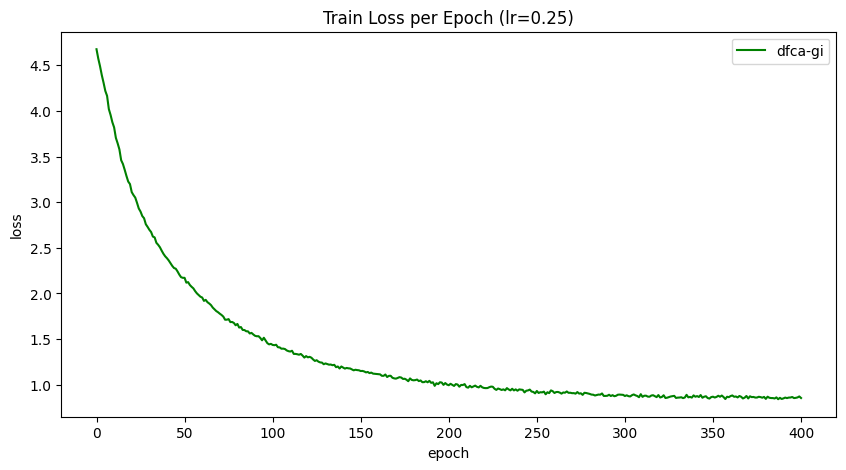

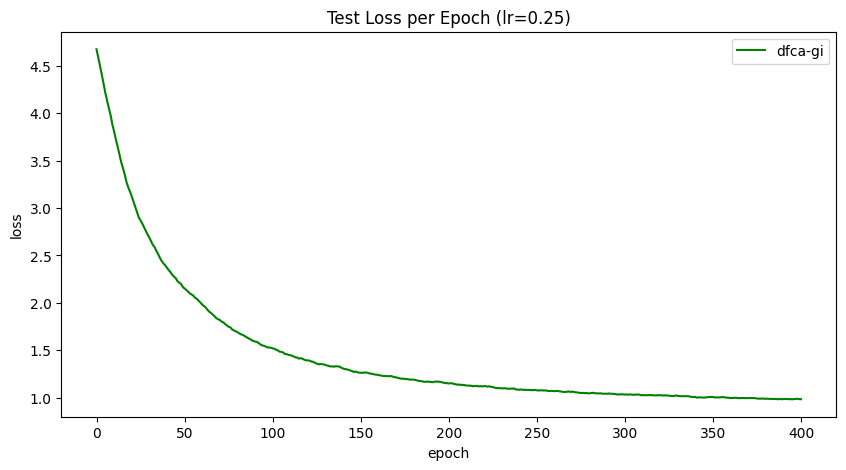

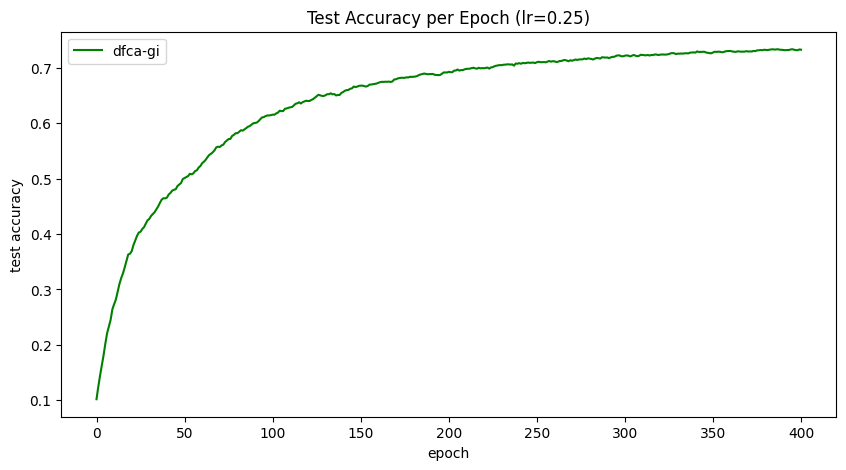

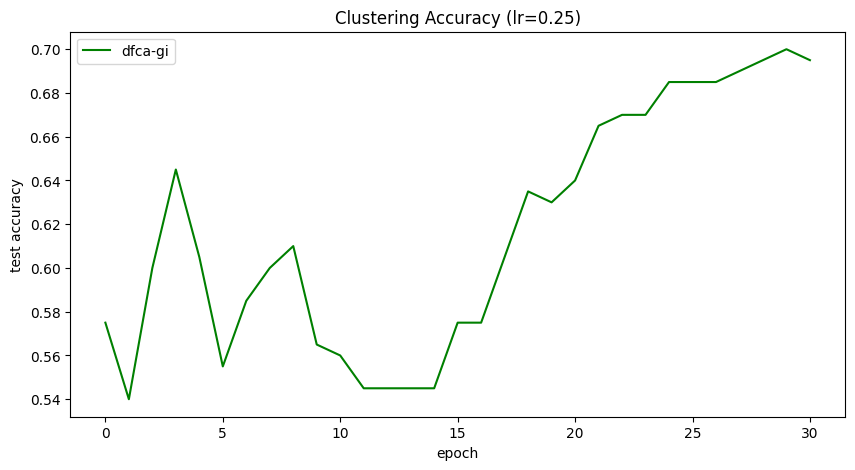

In [4]:

r_dfca_gi = {}

r_dfca_gi['test_loss'] = []
r_dfca_gi['test_acc'] = []
r_dfca_gi['cl_acc'] = []
r_dfca_gi['train_loss'] = []
for i in range(len(learning_rates)):
    r_dfca_gi['test_loss'].append(dfca_gi[i][0])
    r_dfca_gi['test_acc'].append(dfca_gi[i][1])
    r_dfca_gi['cl_acc'].append(dfca_gi[i][2])
    r_dfca_gi['train_loss'].append(dfca_gi[i][3])

with open('res_dfca.pickle', 'wb') as f:
    pickle.dump(r_dfca_gi, f)

os.makedirs('graphs', exist_ok=True)

for l in range(len(learning_rates)):

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['train_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Train Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_train_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['test_loss'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title(f'Test Loss per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_test_loss.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['test_acc'][l], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.title(f'Test Accuracy per Epoch (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_test_acc.png'))

    plt.figure(figsize=(10,5))
    plt.plot(r_dfca_gi['cl_acc'][l][:31], label='dfca-gi', color='green')
    plt.xlabel('epoch')
    plt.ylabel('test accuracy')
    plt.title(f'Clustering Accuracy (lr={learning_rates[l]})')
    plt.legend()
    plt.savefig(os.path.join('graphs', '3_cl_acc.png'))

